In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from pandas.plotting import scatter_matrix   #绘制数值属性之间的相关性
from sklearn.impute import SimpleImputer     #处理缺失值
from sklearn.preprocessing import OrdinalEncoder    #处理文本属性，将类别转成数字
from sklearn.preprocessing import OneHotEncoder     #将类别值转化为独热向量
from sklearn.base import BaseEstimator, TransformerMixin   
#自定义转换器添加组合后的属性，前者构造函数时避免*args和**kargs，后者得到fit_transform()方法
from sklearn.pipeline import Pipeline    #构造流水线使数据转换的步骤以正确的顺序进行
from sklearn.preprocessing import StandardScaler    #标准化的转换器
from sklearn.compose import ColumnTransformer       #需要对不同的列组(数值列、分类列)应用不同的transformer   
from sklearn.metrics import mean_squared_error    #mse均方误差，rmse均方根误差
from sklearn.linear_model import LinearRegression   #线性回归模型
from sklearn.tree import DecisionTreeRegressor    #决策树
from sklearn.model_selection import GridSearchCV    #网格搜索法
from sklearn.model_selection import RandomizedSearchCV    #随机搜索法
from sklearn.ensemble import RandomForestRegressor    #随机森林
from sklearn.model_selection import cross_val_score    #交叉验证
from sklearn import metrics
import joblib
import json
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit#分层抽样
# from keras.wrappers.scikit_learn import KerasRegressor
from pandas import DataFrame as df
import time
import xgboost
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [2]:
import sklearn

In [3]:
sklearn.__version__

'1.1.3'

In [4]:
filename=r"D:\li\codes\rice.xlsx"
data=pd.read_excel(filename, sheet_name="select_v2",engine='openpyxl')
data=pd.get_dummies(data)

In [5]:
data

,latitude,longitude,Norg,Nin,duration,temp,prec,density,clay,totN,...,N2O,yield,water_regime_AWD,water_regime_aerobic,water_regime_continuously flooding,water_regime_deepwater,water_regime_irrigated,water_regime_midseason drainage,water_regime_others,water_regime_rainfed
0,32.5,119.416667,0.0,200.0,127,15.26,1131.74,1.33,21.0,0.252,...,NaN,9.01,0,0,1,0,0,0,0,0
1,32.5,119.416667,0.0,200.0,127,15.26,1131.74,1.33,21.0,0.252,...,NaN,9.32,1,0,0,0,0,0,0,0
2,32.5,119.416667,36.0,200.0,127,15.26,1131.74,1.33,21.0,0.252,...,NaN,8.05,0,0,1,0,0,0,0,0
3,32.5,119.416667,36.0,200.0,127,15.26,1131.74,1.33,21.0,0.252,...,NaN,9.48,1,0,0,0,0,0,0,0
4,32.5,119.416667,0.0,200.0,127,15.84,968.97,1.33,21.0,0.252,...,NaN,9.36,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,35.1,128.116667,0.0,180.0,115,13.00,1483.05,1.40,22.0,0.065,...,NaN,5.40,0,0,1,0,0,0,0,0
2232,35.1,128.116667,0.0,0.0,124,13.00,1322.51,1.40,22.0,0.065,...,NaN,5.00,0,0,1,0,0,0,0,0
2233,35.1,128.116667,0.0,45.0,124,13.00,1322.51,1.40,22.0,0.065,...,NaN,5.40,0,0,1,0,0,0,0,0
2234,35.1,128.116667,0.0,90.0,124,13.00,1322.51,1.40,22.0,0.065,...,NaN,6.70,0,0,1,0,0,0,0,0


In [6]:
filename=r"D:\li\codes\rice.xlsx"
data=pd.read_excel(filename, sheet_name="raw",engine='openpyxl')
# data=pd.get_dummies(data)

In [7]:
data

,Unnamed: 0,title,Crop Residue(t ha-1),compost(t ha-1),biochar application rate(t ha-1),manure application rate(t ha-1),green manure,Unnamed: 7,straw,straw application rate(t ha-1),...,T,prec,density,clay,totN,TOC,C/N,pH,rotation.1,tillage
0,0,Alternate wetting and moderate drying increase...,no,NaN,0.0,0,0,NaN,na,0,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
1,1,Alternate wetting and moderate drying increase...,no,NaN,0.0,0,0,NaN,na,0,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
2,2,Alternate wetting and moderate drying increase...,straw,NaN,0.0,0,0,NaN,<30,6.5,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
3,3,Alternate wetting and moderate drying increase...,straw,NaN,0.0,0,0,NaN,<30,6.5,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
4,4,Alternate wetting and moderate drying increase...,no,NaN,0.0,0,0,NaN,<30,0,...,15.84,968.97,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2448,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1483.05,1.40,22.0,0.065,0.89,13.692308,5.6,1,1
2232,2449,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1322.51,1.40,22.0,0.065,0.89,13.692308,5.6,1,1
2233,2450,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1322.51,1.40,22.0,0.065,0.89,13.692308,5.6,1,1
2234,2451,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1322.51,1.40,22.0,0.065,0.89,13.692308,5.6,1,1


In [18]:
data['country'].value_counts()

China            1290
Vietnam           147
India             146
Indonesia         126
Philippines        94
Japan              84
South Korea        79
Thailand           63
United States      45
Spain              32
Thailand           28
Myanmar            16
Vietnam            16
Bangladesh         14
Philippines        14
Brazil             13
Italy              10
Cambodia            8
Uruguay             6
Ghana               5
Name: country, dtype: int64

In [19]:
data

,Unnamed: 0,title,Crop Residue(t ha-1),compost(t ha-1),biochar application rate(t ha-1),manure application rate(t ha-1),green manure,Unnamed: 7,straw,straw application rate(t ha-1),...,T,prec,density,clay,totN,TOC,C/N,pH,rotation.1,tillage
0,0,Alternate wetting and moderate drying increase...,no,NaN,0.0,0,0,NaN,na,0,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
1,1,Alternate wetting and moderate drying increase...,no,NaN,0.0,0,0,NaN,na,0,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
2,2,Alternate wetting and moderate drying increase...,straw,NaN,0.0,0,0,NaN,<30,6.5,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
3,3,Alternate wetting and moderate drying increase...,straw,NaN,0.0,0,0,NaN,<30,6.5,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
4,4,Alternate wetting and moderate drying increase...,no,NaN,0.0,0,0,NaN,<30,0,...,15.84,968.97,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2448,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1483.05,1.40,22.0,0.065,0.89,13.692308,5.6,1,1
2232,2449,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1322.51,1.40,22.0,0.065,0.89,13.692308,5.6,1,1
2233,2450,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1322.51,1.40,22.0,0.065,0.89,13.692308,5.6,1,1
2234,2451,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1322.51,1.40,22.0,0.065,0.89,13.692308,5.6,1,1


In [25]:
data

,Unnamed: 0,title,Crop Residue(t ha-1),compost(t ha-1),biochar application rate(t ha-1),manure application rate(t ha-1),green manure,Unnamed: 7,straw,straw application rate(t ha-1),...,T,prec,density,clay,totN,TOC,C/N,pH,rotation.1,tillage
0,0,Alternate wetting and moderate drying increase...,no,NaN,0.0,0,0,NaN,na,0,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
1,1,Alternate wetting and moderate drying increase...,no,NaN,0.0,0,0,NaN,na,0,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
2,2,Alternate wetting and moderate drying increase...,straw,NaN,0.0,0,0,NaN,<30,6.5,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
3,3,Alternate wetting and moderate drying increase...,straw,NaN,0.0,0,0,NaN,<30,6.5,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
4,4,Alternate wetting and moderate drying increase...,no,NaN,0.0,0,0,NaN,<30,0,...,15.84,968.97,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2448,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1483.05,1.40,22.0,0.065,0.89,13.692308,5.6,1,1
2232,2449,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1322.51,1.40,22.0,0.065,0.89,13.692308,5.6,1,1
2233,2450,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1322.51,1.40,22.0,0.065,0.89,13.692308,5.6,1,1
2234,2451,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1322.51,1.40,22.0,0.065,0.89,13.692308,5.6,1,1


In [27]:
yields=data.dropna(axis=0,subset=["yield"])
yields

,Unnamed: 0,title,Crop Residue(t ha-1),compost(t ha-1),biochar application rate(t ha-1),manure application rate(t ha-1),green manure,Unnamed: 7,straw,straw application rate(t ha-1),...,T,prec,density,clay,totN,TOC,C/N,pH,rotation.1,tillage
0,0,Alternate wetting and moderate drying increase...,no,NaN,0.0,0,0,NaN,na,0,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
1,1,Alternate wetting and moderate drying increase...,no,NaN,0.0,0,0,NaN,na,0,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
2,2,Alternate wetting and moderate drying increase...,straw,NaN,0.0,0,0,NaN,<30,6.5,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
3,3,Alternate wetting and moderate drying increase...,straw,NaN,0.0,0,0,NaN,<30,6.5,...,15.26,1131.74,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
4,4,Alternate wetting and moderate drying increase...,no,NaN,0.0,0,0,NaN,<30,0,...,15.84,968.97,1.33,21.0,0.252,1.41,5.595238,7.8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2448,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1483.05,1.40,22.0,0.065,0.89,13.692308,5.6,1,1
2232,2449,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1322.51,1.40,22.0,0.065,0.89,13.692308,5.6,1,1
2233,2450,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1322.51,1.40,22.0,0.065,0.89,13.692308,5.6,1,1
2234,2451,Different responses of nitrogen fertilization ...,no,NaN,0.0,0,0,NaN,na,0,...,13.00,1322.51,1.40,22.0,0.065,0.89,13.692308,5.6,1,1


In [6]:
attr=['duration', 'temp', 'prec',
       'density', 'clay', 'totN', 'TOC', 'C/N', 'pH', 'Norg', 'Nin',
      'water_regime_AWD','water_regime_continuously flooding', 'water_regime_midseason drainage',
       'water_regime_rainfed', 
       'CH4']
CH4=data[attr]
CH4=CH4.dropna(axis=0,subset=["CH4"])
CH4=CH4[CH4["CH4"]<CH4["CH4"].quantile(q=0.95)]
CH4=CH4[CH4["CH4"]>CH4["CH4"].quantile(q=0.05)]
CH4=CH4.reset_index(drop=True)

In [7]:
CH4.describe()

,duration,temp,prec,density,clay,totN,TOC,C/N,pH,Norg,Nin,water_regime_AWD,water_regime_continuously flooding,water_regime_midseason drainage,water_regime_rainfed,CH4
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,110.913854,19.397899,1431.578786,1.303416,27.469607,0.221572,1.507796,9.605704,6.293587,26.763873,141.029649,0.196474,0.366247,0.344584,0.036776,200.135405
std,22.212639,5.483271,492.915866,0.197632,14.620055,0.318355,1.029094,6.037565,1.130419,56.663606,87.554872,0.397431,0.481899,0.475352,0.188258,157.514346
min,69.000000,2.000000,192.900000,0.690000,2.000000,0.010000,0.101000,0.297872,3.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.800000
25%,94.000000,16.000000,1102.160000,1.160000,18.200000,0.120000,1.000000,6.405694,5.360000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,72.000000
50%,111.000000,17.500000,1366.000000,1.310000,21.870000,0.162000,1.320000,9.600000,6.300000,0.000000,135.000000,0.000000,0.000000,0.000000,0.000000,157.466667
75%,126.000000,25.250000,1741.000000,1.410000,37.900000,0.226000,1.840000,11.328671,7.000000,38.000000,197.700000,0.000000,1.000000,1.000000,0.000000,287.300000
max,220.000000,39.100000,2772.340000,2.480000,68.700000,4.700000,16.000000,79.000000,9.900000,1200.000000,650.000000,1.000000,1.000000,1.000000,1.000000,694.666667


In [6]:
CH4.to_csv("CH4.csv")

In [2]:
CH4=pd.read_csv('CH4.csv')
N2O=pd.read_csv('N2O.csv')
yields=pd.read_csv('yields.csv')

In [5]:
yields.describe()

,Unnamed: 0,duration,temp,prec,density,clay,totN,TOC,C/N,pH,Norg,Nin,water_regime_AWD,water_regime_continuously flooding,water_regime_midseason drainage,water_regime_rainfed,yield
count,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000
mean,915.000000,111.784817,19.648236,1424.500044,1.316856,27.519978,0.221245,1.437931,9.038712,6.242419,25.245055,138.569313,0.157837,0.387766,0.346805,0.036592,6.432228
std,528.708489,22.434205,5.640443,489.486621,0.203759,14.728783,0.287786,0.828843,5.159417,1.126704,50.426935,86.146665,0.364688,0.487374,0.476083,0.187809,2.016717
min,0.000000,71.000000,2.000000,192.900000,0.690000,2.000000,0.010000,0.101000,0.743692,3.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.470000
25%,457.500000,94.000000,16.000000,1100.000000,1.190000,18.200000,0.113000,0.995000,5.680272,5.200000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,5.125000
50%,915.000000,111.000000,17.700000,1366.000000,1.360000,21.870000,0.162000,1.260000,9.521127,6.260000,0.000000,130.000000,0.000000,0.000000,0.000000,0.000000,6.370000
75%,1372.500000,126.000000,25.960000,1758.840000,1.410000,37.700000,0.233000,1.820000,11.328671,7.000000,38.000000,195.000000,0.000000,1.000000,1.000000,0.000000,7.585000
max,1830.000000,204.000000,39.100000,2772.340000,2.480000,68.700000,2.200000,7.000000,79.000000,9.900000,903.000000,450.000000,1.000000,1.000000,1.000000,1.000000,13.100000


In [8]:
attributes=['duration', 'temp', 'prec',
       'density', 'clay', 'totN', 'TOC', 'C/N', 'pH', 'Norg', 'Nin',
       'water_regime_AWD','water_regime_continuously flooding', 'water_regime_midseason drainage',
       'water_regime_rainfed']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(CH4[attributes], CH4["CH4"], test_size=0.2,random_state=0)

In [8]:
y_train

1540    100.88000
318      63.00000
1978    290.17000
1084     20.30000
1625    272.00000
          ...    
835     238.90318
1216     26.00000
1653     35.30000
559     272.59200
684      24.70000
Name: CH4, Length: 1588, dtype: float64

In [9]:
start =time.time()
param_grid=[
    {'n_estimators':[50,100,110,120,130,140,150,200],
     #'max_features':['auto','sqrt','log2'],
     'max_features':[3,6,9,12],
     'max_depth':[5,10,15,20,25]}
]
forest_reg = RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,verbose=1,n_jobs=-1,refit=True)
#refit=True，一旦通过交叉验证找到了最佳估算器，将在整个训练集上重新训练，提供更多的数据很可能提升性能
grid_search.fit(x_train,y_train)
end = time.time()
print('Running time: %s Seconds'%(end-start))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Running time: 109.86327815055847 Seconds


In [10]:
grid_search.best_params_

{'max_depth': 25, 'max_features': 12, 'n_estimators': 150}

In [11]:
rf= grid_search.best_estimator_
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, max_features=12, n_estimators=150,
                      random_state=42)

In [12]:
#模型指标
def evaluate_model(model,x,y):
    pred=model.predict(x)
    rmse=np.sqrt(mean_squared_error(y,pred))
    r2=metrics.r2_score(y,pred)
    return rmse,r2

In [13]:
evaluate_model(rf,x_train,y_train)

(45.27305404535076, 0.9170727677871235)

In [14]:
evaluate_model(rf,x_test,y_test)

(92.51190193578257, 0.6593573868946443)

In [15]:
config = {
    "font.family":'serif', # sans-serif/serif/cursive/fantasy/monospace
    "font.size": 12, # medium/large/small
    'font.style':'normal', # normal/italic/oblique
    'font.weight':'normal', # bold
    "mathtext.fontset":'cm',# 'cm' (Computer Modern)
    "font.serif": ['Arial'], # 'Simsun'宋体
    "axes.unicode_minus": False,# 用来正常显示负号
}
plt.rcParams.update(config)
#rcParams这个参数，这个参数用于控制图像的基础属性，如图像大小、像素、线条宽度、颜色、样式、坐标轴、坐标和网络属性、文本、字体等，
#可以说是首先对图像进行一个自定义操作。rcParams的各个参数存储在字典里。

In [11]:
##把模型用全部的数据拟合
xgbr_CH4=joblib.load('xgbr_CH4.pkl')
xgbr_N2O=joblib.load('xgbr_N2O.pkl')
xgbr_yield=joblib.load('xgbr_yield.pkl')
CH4=pd.read_csv('CH4.csv')
N2O=pd.read_csv('N2O.csv')
yields=pd.read_csv('yields.csv')
xgbr_CH4.fit(CH4[attributes],CH4['CH4'])
xgbr_N2O.fit(N2O[attributes],N2O['N2O'])
xgbr_yield.fit(yields[attributes],yields['yield'])

joblib.dump(value=xgbr_CH4,filename="xgbr_CH4.pkl")
joblib.dump(value=xgbr_N2O,filename="xgbr_N2O.pkl")
joblib.dump(value=xgbr_yield,filename="xgbr_yield.pkl")

['xgbr_yield.pkl']

In [20]:
# names=[ 'Duration', 'Temperature', 'Precipitation',
#        'Density', 'Clay',  'Total N', 'TOC', 'C/N', 'pH', 'Norg', 'Nin',
#         'Alternate wetting and drying', 'Continuously flooding',
#        'Midseason drainage', 'Rainfed']

names=['Duration','Temp', 'Prec', 'Density', 'Clay', 'Nitrogen', 'TOC', 'C/N',
 'pH', 'Norg','Nin', 'AWD','CF','MSD','Rainfed']

In [8]:
permutation_importance?

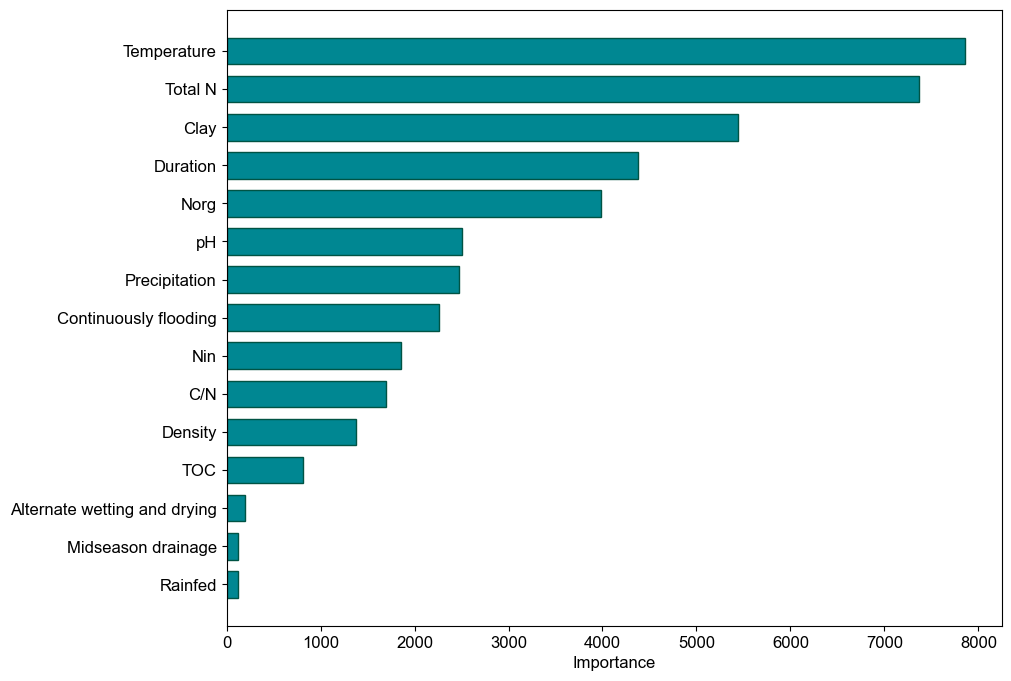

In [21]:
results = permutation_importance(rf, CH4[attributes],CH4.iloc[:,-1], scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean

features_import = df(names, columns=['feature'])
features_import['importance'] = importance
features_import.sort_values('importance', inplace=True)

fig=plt.figure(figsize=(10,8))
plt.barh(features_import['feature'], features_import['importance'], height=0.7, color='#008792', edgecolor='#005344')
plt.xlabel("Importance")

plt.savefig("CH4_Importance_rf.jpg",dpi=600,bbox_inches='tight')
plt.show()

In [54]:
def results_10folds(model,model_name):#cross_validate是sklearn模块的函数，keras模型直接调用时出错了
    cv=KFold(n_splits=10,shuffle=True,random_state=42)
    r2=cross_validate(model,CH4[attributes], CH4["CH4"],cv=cv,scoring="r2",return_train_score=True,
                        verbose=True,n_jobs=-1)
    rmse=cross_validate(model,CH4[attributes], CH4["CH4"],cv=cv,scoring="neg_root_mean_squared_error",return_train_score=True,
                        verbose=True,n_jobs=-1)
    test_rmse,test_r2=evaluate_model(model,x_test,y_test)
    CH4_R2_train[model_name]=r2["train_score"]
    CH4_RMSE_train[model_name]=-rmse["train_score"]
    CH4_R2_test[model_name]=r2["test_score"]
    CH4_RMSE_test[model_name]=-rmse["test_score"]
#     test_results[model_name]=[test_rmse,test_r2]

In [23]:
CH4_R2_train=pd.DataFrame()
CH4_R2_test=pd.DataFrame()
CH4_RMSE_train=pd.DataFrame()
CH4_RMSE_test=pd.DataFrame()
# test_results=pd.DataFrame()

In [24]:
results_10folds(rf,"rf")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    8.6s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished


In [55]:
CH4_R2_test

,rf,xgbr
0,0.610281,0.643731
1,0.619286,0.655490
2,0.661861,0.738335
3,0.726030,0.749650
4,0.614452,0.653473
5,0.718185,0.770753
6,0.662494,0.705387
7,0.656415,0.660728
8,0.661122,0.670131
9,0.664760,0.699625


In [ ]:
att

# XGB

In [26]:
start =time.time()
x=XGBRegressor(random_state=42)
xgbr_param_grid=[
    {'n_estimators':[50,100,200,300,400,500],
     'learning_rate':[0.1,0.2,0.3,0.4],
     'max_depth':[2,4,6,8,10]}]
xgbr_grid_search=GridSearchCV(x,xgbr_param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True,verbose=1,n_jobs=-1,refit=True)
#记得refit=True
xgbr_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [27]:
xgbr_grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [28]:
xgbr=xgbr_grid_search.best_estimator_
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [29]:
evaluate_model(xgbr,x_test,y_test)

(86.69314963583905, 0.7008608058234597)

In [30]:
evaluate_model(xgbr,x_train,y_train)

(47.31757515502554, 0.9094136945841675)

In [56]:
results_10folds(xgbr,"xgbr")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   10.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


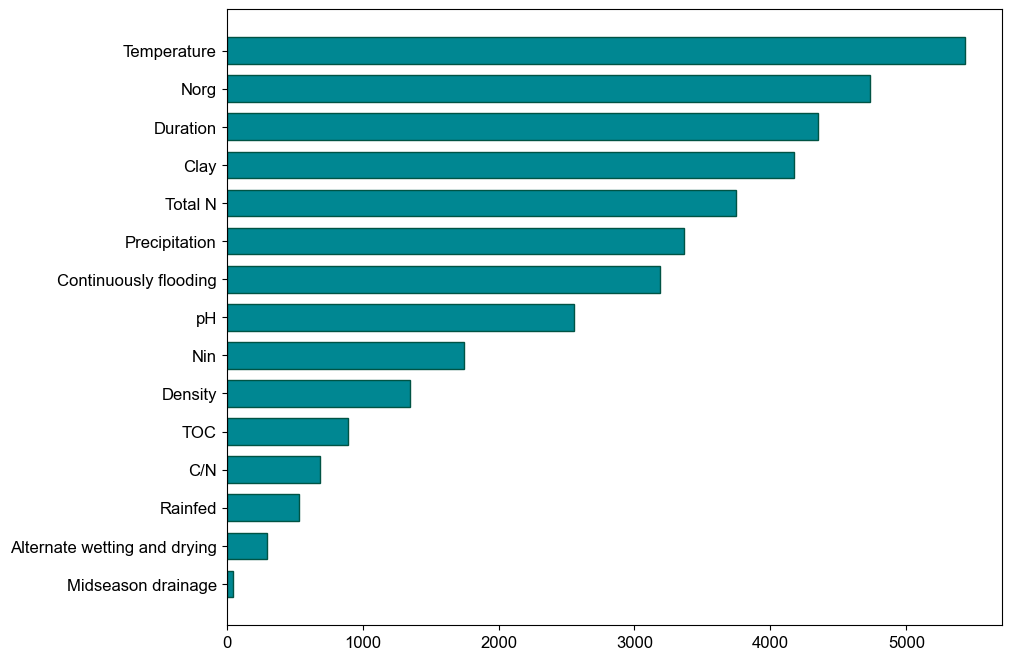

In [32]:
results = permutation_importance(xgbr, CH4[attributes],CH4.iloc[:,-1], scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
features_import = df(names, columns=['feature'])
features_import['importance'] = importance
features_import.sort_values('importance', inplace=True)

# summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,8))
plt.barh(features_import['feature'], features_import['importance'], height=0.7, color='#008792', edgecolor='#005344')
plt.savefig("CH4_Importance_xgb.jpg",dpi=600,bbox_inches='tight')
plt.show()

# SVR

In [33]:
from sklearn.svm import SVR

In [34]:
svr=SVR(C=1000, gamma=0.5)
svr.fit(x_train,y_train)

SVR(C=1000, gamma=0.5)

In [35]:
evaluate_model(svr,x_test,y_test)

(122.32914804904838, 0.40438769884381653)

In [36]:
evaluate_model(svr,x_train,y_train)

(41.721405966549526, 0.9295736052700398)

In [37]:
s=SVR(kernel="rbf") #C=10000也是网格搜索得到的
param_grid=[
    {'C':[10,100,1000,1500,2000],
     "gamma":[0.1,0.2,0.3,0.4,0.5],
     #'kernel':["rbf","sigmoid","poly"],
    # 'epsilon':[40,45,50]
    }
]
#epsilon，预测值与实际值的距离在epsilon内，损失函数值为0，默认0.1
#C，误差项的惩罚函数，一般为10的n次幂，C越大，希望松弛变量接近0，即对误分类的惩罚越大，容易过拟合；减小C正则化，默认值1
#kernel：参数选择有RBF（高斯核）, Linear（线性核函数）, Poly（多项式核函数）, Sigmoid（sigmoid核函数）, 默认的是"RBF";
grid_search=GridSearchCV(s,param_grid,cv=3,scoring='neg_mean_squared_error',
                         return_train_score=True, verbose=True,n_jobs=-1,refit=True)

In [38]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [10, 100, 1000, 1500, 2000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [48]:
svr = grid_search.best_estimator_
svr.fit(x_train,y_train)
evaluate_model(svr,x_test,y_test)

(119.19197042094763, 0.4345453821929711)

In [50]:
evaluate_model(svr,x_train,y_train)

(43.71874540944544, 0.9226691173585753)

In [57]:
results_10folds(svr,"svr")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished


In [59]:
CH4_R2_test.mean()

rf      0.659489
xgbr    0.694730
svr     0.402142
dtype: float64

# MLP

In [14]:
from sklearn.neural_network import MLPRegressor

In [94]:
param_grid=[
    {#'activation':['identity', 'logistic', 'tanh', 'relu'],
     #'learning_rate_init':[0.001,0.002,0.005,0.0001],
     'hidden_layer_sizes':[(100),(50),(80),(30)]
    }
]

grid_search=GridSearchCV(mlp,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,verbose=1,refit=True)
#refit=True，一旦通过交叉验证找到了最佳估算器，将在整个训练集上重新训练，提供更多的数据很可能提升性能
grid_search.fit(x_train,y_train)
mlp=grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Iteration 1, loss = 14723.55390363
Validation score: -0.066860
Iteration 2, loss = 14086.04323087
Validation score: -0.034908
Iteration 3, loss = 13706.43831073
Validation score: -0.024635
Iteration 4, loss = 13505.14910616
Validation score: -0.008964
Iteration 5, loss = 13337.75125095
Validation score: -0.005734
Iteration 6, loss = 13317.25252146
Validation score: -0.010568
Iteration 7, loss = 13236.25978907
Validation score: -0.023688
Iteration 8, loss = 13195.39035239
Validation score: -0.008122
Iteration 9, loss = 13172.03833989
Validation score: -0.022559
Iteration 10, loss = 13178.52596197
Validation score: -0.012018
Iteration 11, loss = 13019.61356596
Validation score: -0.018701
Iteration 12, loss = 13070.95270544
Validation score: 0.002587
Iteration 13, loss = 13064.31421144
Validation score: 0.005104
Iteration 14, loss = 12948.59023375
Validation score: 0.019580
Iteration 15, loss = 12846.16575046
Validation score: 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 32, loss = 12640.65786632
Validation score: 0.036472
Iteration 33, loss = 12620.89131163
Validation score: 0.033127
Iteration 34, loss = 12627.84304438
Validation score: 0.034909
Iteration 35, loss = 12521.80124178
Validation score: 0.041210
Iteration 36, loss = 12539.12173030
Validation score: 0.042129
Iteration 37, loss = 12497.09970072
Validation score: 0.042290
Iteration 38, loss = 12564.88817071
Validation score: 0.028897
Iteration 39, loss = 12609.55755060
Validation score: 0.039669
Iteration 40, loss = 12464.17451940
Validation score: 0.037966
Iteration 41, loss = 12469.93744014
Validation score: 0.045228
Iteration 42, loss = 12448.31049129
Validation score: 0.035397
Iteration 43, loss = 12479.66353800
Validation score: 0.045747
Iteration 44, loss = 12424.63820153
Validation score: 0.045241
Iteration 45, loss = 12442.55464211
Validation score: 0.048248
Iteration 46, loss = 12426.44063411
Validation score: 0.047419
Iteration 47, loss = 12404.81234091
Validation score: 0

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 64, loss = 12233.15283357
Validation score: 0.052845
Iteration 65, loss = 12412.48558044
Validation score: 0.059803
Iteration 66, loss = 12260.20252986
Validation score: 0.069571
Iteration 67, loss = 12228.59492103
Validation score: 0.069564
Iteration 68, loss = 12314.80416558
Validation score: 0.048624
Iteration 69, loss = 12535.22831921
Validation score: 0.041854
Iteration 70, loss = 12310.44834725
Validation score: 0.012357
Iteration 71, loss = 12351.11283487
Validation score: 0.040542
Iteration 72, loss = 12389.62330847
Validation score: 0.070211
Iteration 73, loss = 12227.42624249
Validation score: 0.070673
Iteration 74, loss = 12237.56487018
Validation score: 0.071164
Iteration 75, loss = 12289.71544365
Validation score: 0.059188
Iteration 76, loss = 12312.17934555
Validation score: 0.022143
Iteration 77, loss = 12388.01184518
Validation score: 0.044021
Iteration 78, loss = 12279.31149578
Validation score: 0.063146
Iteration 79, loss = 12145.12374864
Validation score: 0

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 95, loss = 11969.95315007
Validation score: 0.048579
Iteration 96, loss = 12050.04898703
Validation score: 0.062271
Iteration 97, loss = 12376.91835062
Validation score: 0.029690
Iteration 98, loss = 12248.19903644
Validation score: 0.077893
Iteration 99, loss = 11953.57380592
Validation score: 0.069297
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14595.01233714
Validation score: -0.125453
Iteration 2, loss = 13916.37414930
Validation score: -0.093720
Iteration 3, loss = 13518.90521318
Validation score: -0.093152
Iteration 4, loss = 13413.60232771
Validation score: -0.071291
Iteration 5, loss = 13208.11317416
Validation score: -0.065542
Iteration 6, loss = 13127.37528047
Validation score: -0.062195
Iteration 7, loss = 12992.49482780
Validation score: -0.068218
Iteration 8, loss = 12929.53400303
Validation score: -0.050421
Iteration 9, loss = 12955.61775005
Validation score: -0.072976
Iteration 10, loss = 1299

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 24, loss = 12589.63681758
Validation score: -0.041289
Iteration 25, loss = 12590.66103371
Validation score: -0.018640
Iteration 26, loss = 12523.86762519
Validation score: -0.023184
Iteration 27, loss = 12481.14165132
Validation score: -0.002160
Iteration 28, loss = 12410.93933431
Validation score: -0.001374
Iteration 29, loss = 12377.00539644
Validation score: 0.001395
Iteration 30, loss = 12368.37653997
Validation score: 0.000398
Iteration 31, loss = 12406.85030287
Validation score: 0.002515
Iteration 32, loss = 12576.25328168
Validation score: -0.013069
Iteration 33, loss = 12448.94338860
Validation score: 0.004030
Iteration 34, loss = 12341.56529634
Validation score: -0.011081
Iteration 35, loss = 12322.34438950
Validation score: 0.008651
Iteration 36, loss = 12432.29810162
Validation score: 0.001918
Iteration 37, loss = 12318.77922126
Validation score: 0.012131
Iteration 38, loss = 12286.92894331
Validation score: 0.009515
Iteration 39, loss = 12275.08013739
Validation s

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 56, loss = 12177.58052494
Validation score: 0.032196
Iteration 57, loss = 12188.48389164
Validation score: 0.030891
Iteration 58, loss = 12088.27178618
Validation score: 0.033791
Iteration 59, loss = 12072.10343864
Validation score: 0.030646
Iteration 60, loss = 12062.87642060
Validation score: 0.034253
Iteration 61, loss = 12059.58489430
Validation score: 0.036364
Iteration 62, loss = 12041.75142721
Validation score: 0.037531
Iteration 63, loss = 12056.46944454
Validation score: 0.028395
Iteration 64, loss = 12011.54520884
Validation score: 0.034799
Iteration 65, loss = 12110.74278686
Validation score: 0.031411
Iteration 66, loss = 12044.47563256
Validation score: 0.037689
Iteration 67, loss = 12067.25543932
Validation score: 0.039061
Iteration 68, loss = 12012.21248134
Validation score: 0.014093
Iteration 69, loss = 12305.22930790
Validation score: 0.011373
Iteration 70, loss = 12188.93094170
Validation score: -0.055514
Iteration 71, loss = 12203.81123769
Validation score: 

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 86, loss = 11833.03080683
Validation score: 0.028054
Iteration 87, loss = 12012.62461576
Validation score: 0.052010
Iteration 88, loss = 11919.72360240
Validation score: 0.048539
Iteration 89, loss = 12049.33018491
Validation score: 0.043896
Iteration 90, loss = 12393.26677033
Validation score: 0.041009
Iteration 91, loss = 12100.83687019
Validation score: -0.002247
Iteration 92, loss = 12192.97144733
Validation score: 0.013800
Iteration 93, loss = 12225.26796720
Validation score: -0.016289
Iteration 94, loss = 12028.36951483
Validation score: 0.034142
Iteration 95, loss = 12007.31171342
Validation score: 0.012487
Iteration 96, loss = 11841.13096687
Validation score: 0.049854
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14438.55943709
Validation score: -0.095681
Iteration 2, loss = 13901.85839800
Validation score: -0.063436
Iteration 3, loss = 13561.36306920
Validation score: -0.062879
Iteration 4, loss = 135

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 21, loss = 12712.03526764
Validation score: -0.016275
Iteration 22, loss = 12716.07543964
Validation score: -0.006541
Iteration 23, loss = 12682.11621534
Validation score: -0.009008
Iteration 24, loss = 12694.81393918
Validation score: -0.009725
Iteration 25, loss = 12694.52562646
Validation score: -0.003865
Iteration 26, loss = 12640.55600643
Validation score: -0.006965
Iteration 27, loss = 12577.65390776
Validation score: 0.000587
Iteration 28, loss = 12567.37918093
Validation score: -0.001248
Iteration 29, loss = 12577.72378002
Validation score: 0.002488
Iteration 30, loss = 12526.20162934
Validation score: -0.004050
Iteration 31, loss = 12578.41179057
Validation score: -0.001690
Iteration 32, loss = 12824.23878384
Validation score: -0.012704
Iteration 33, loss = 12640.11727313
Validation score: 0.007555
Iteration 34, loss = 12459.91277552
Validation score: 0.000700
Iteration 35, loss = 12477.88466873
Validation score: 0.009464
Iteration 36, loss = 12511.37370414
Validatio

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 55, loss = 12231.20169183
Validation score: 0.028859
Iteration 56, loss = 12268.47221079
Validation score: 0.015125
Iteration 57, loss = 12375.43251956
Validation score: 0.030165
Iteration 58, loss = 12242.57405853
Validation score: 0.029866
Iteration 59, loss = 12194.86703275
Validation score: 0.025736
Iteration 60, loss = 12203.56722617
Validation score: 0.033470
Iteration 61, loss = 12161.88923144
Validation score: 0.031466
Iteration 62, loss = 12137.60544393
Validation score: 0.037149
Iteration 63, loss = 12167.09023234
Validation score: 0.029419
Iteration 64, loss = 12083.65539332
Validation score: 0.038644
Iteration 65, loss = 12125.23512434
Validation score: 0.038395
Iteration 66, loss = 12192.85976531
Validation score: 0.017729
Iteration 67, loss = 12162.27989953
Validation score: 0.038047
Iteration 68, loss = 12074.44105196
Validation score: 0.024402
Iteration 69, loss = 12219.52373208
Validation score: 0.015361
Iteration 70, loss = 12259.60334371
Validation score: -

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 84, loss = 11966.39913601
Validation score: 0.054182
Iteration 85, loss = 12009.47569282
Validation score: 0.046051
Iteration 86, loss = 11887.52532879
Validation score: 0.057517
Iteration 87, loss = 11899.03145641
Validation score: 0.048896
Iteration 88, loss = 11853.12679455
Validation score: 0.056362
Iteration 89, loss = 11845.10167448
Validation score: 0.046475
Iteration 90, loss = 12085.30063866
Validation score: 0.039777
Iteration 91, loss = 12141.76518285
Validation score: -0.015825
Iteration 92, loss = 12138.51221313
Validation score: 0.036233
Iteration 93, loss = 11981.57056578
Validation score: 0.030388
Iteration 94, loss = 11812.27600281
Validation score: 0.058949
Iteration 95, loss = 11793.99489662
Validation score: 0.043273
Iteration 96, loss = 11791.82930128
Validation score: 0.062101
Iteration 97, loss = 12018.45566542
Validation score: 0.052139
Iteration 98, loss = 11940.40865124
Validation score: 0.059142
Iteration 99, loss = 11756.48506983
Validation score: 

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 113, loss = 11769.15764120
Validation score: 0.071618
Iteration 114, loss = 11619.51579060
Validation score: 0.063480
Iteration 115, loss = 11628.06191151
Validation score: 0.070621
Iteration 116, loss = 11555.87040757
Validation score: 0.071983
Iteration 117, loss = 11560.40472898
Validation score: 0.072330
Iteration 118, loss = 11605.21799436
Validation score: 0.053692
Iteration 119, loss = 11665.88595816
Validation score: 0.072580
Iteration 120, loss = 11574.51505716
Validation score: 0.070042
Iteration 121, loss = 11564.62983099
Validation score: 0.069712
Iteration 122, loss = 11538.47046285
Validation score: 0.074572
Iteration 123, loss = 11565.74039547
Validation score: 0.068607
Iteration 124, loss = 11497.95364381
Validation score: 0.074193
Iteration 125, loss = 11539.41363786
Validation score: 0.064246
Iteration 126, loss = 11477.52999261
Validation score: 0.077598
Iteration 127, loss = 11537.67556492
Validation score: 0.075192
Iteration 128, loss = 11475.42808810
Val

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 146, loss = 11327.30632086
Validation score: 0.081097
Iteration 147, loss = 11480.78603670
Validation score: 0.075345
Iteration 148, loss = 11372.45129980
Validation score: 0.080040
Iteration 149, loss = 11410.45137754
Validation score: 0.079482
Iteration 150, loss = 11600.21398477
Validation score: 0.012034
Iteration 151, loss = 11839.79024424
Validation score: 0.083806
Iteration 152, loss = 11416.60679378
Validation score: 0.083639
Iteration 153, loss = 11308.86989244
Validation score: 0.080176
Iteration 154, loss = 11308.13202570
Validation score: 0.085513
Iteration 155, loss = 11530.29942660
Validation score: 0.074255
Iteration 156, loss = 11382.78326754
Validation score: 0.082790
Iteration 157, loss = 11344.72427248
Validation score: 0.085073
Iteration 158, loss = 11267.25667575
Validation score: 0.068171
Iteration 159, loss = 11374.68002220
Validation score: 0.091388
Iteration 160, loss = 11256.76797835
Validation score: 0.090129
Iteration 161, loss = 11215.90721684
Val

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 180, loss = 11150.09838074
Validation score: 0.086795
Iteration 181, loss = 11135.42614061
Validation score: 0.088190
Iteration 182, loss = 11147.38716093
Validation score: 0.077450
Iteration 183, loss = 11074.51870018
Validation score: 0.089626
Iteration 184, loss = 11205.07572568
Validation score: 0.091559
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14810.10365481
Validation score: -0.175603
Iteration 2, loss = 13975.24086597
Validation score: -0.145442
Iteration 3, loss = 13747.89937452
Validation score: -0.134991
Iteration 4, loss = 13411.85569407
Validation score: -0.110910
Iteration 5, loss = 13362.55802482
Validation score: -0.134509
Iteration 6, loss = 13262.69344049
Validation score: -0.102364
Iteration 7, loss = 13259.63100408
Validation score: -0.122300
Iteration 8, loss = 13170.22307812
Validation score: -0.098065
Iteration 9, loss = 13025.15741753
Validation score: -0.104955
Iteration 10, loss =

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 24, loss = 12567.68558671
Validation score: -0.075295
Iteration 25, loss = 12479.44291620
Validation score: -0.102162
Iteration 26, loss = 12500.63137032
Validation score: -0.073094
Iteration 27, loss = 12395.93151001
Validation score: -0.096170
Iteration 28, loss = 12466.18066200
Validation score: -0.071913
Iteration 29, loss = 12335.21049206
Validation score: -0.093169
Iteration 30, loss = 12395.50236637
Validation score: -0.084218
Iteration 31, loss = 12340.19222712
Validation score: -0.077938
Iteration 32, loss = 12292.36818964
Validation score: -0.073935
Iteration 33, loss = 12294.58318324
Validation score: -0.088405
Iteration 34, loss = 12320.56070795
Validation score: -0.067520
Iteration 35, loss = 12273.98978699
Validation score: -0.086456
Iteration 36, loss = 12223.79956879
Validation score: -0.073324
Iteration 37, loss = 12216.87172624
Validation score: -0.077687
Iteration 38, loss = 12189.52444910
Validation score: -0.077031
Iteration 39, loss = 12209.51337561
Vali

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 53, loss = 11967.56845464
Validation score: -0.069934
Iteration 54, loss = 12027.21700153
Validation score: -0.083656
Iteration 55, loss = 12381.95996426
Validation score: -0.073812
Iteration 56, loss = 12320.93682789
Validation score: -0.171628
Iteration 57, loss = 12332.50877098
Validation score: -0.077238
Iteration 58, loss = 12209.63808944
Validation score: -0.121910
Iteration 59, loss = 11919.89974461
Validation score: -0.066129
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13642.47968599
Validation score: -0.142010
Iteration 2, loss = 12942.17020689
Validation score: -0.104548
Iteration 3, loss = 12807.41838783
Validation score: -0.079363
Iteration 4, loss = 12547.03793287
Validation score: -0.061779
Iteration 5, loss = 12394.14298404
Validation score: -0.056208
Iteration 6, loss = 12348.80851970
Validation score: -0.054996
Iteration 7, loss = 12311.38951957
Validation score: -0.052056
Iteration 8, loss 

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 23, loss = 12018.30591262
Validation score: -0.032521
Iteration 24, loss = 11919.40183085
Validation score: -0.031596
Iteration 25, loss = 11972.48299572
Validation score: -0.030886
Iteration 26, loss = 11940.38169997
Validation score: -0.034220
Iteration 27, loss = 11886.19899482
Validation score: -0.029607
Iteration 28, loss = 11810.80628508
Validation score: -0.029919
Iteration 29, loss = 11802.24510892
Validation score: -0.028367
Iteration 30, loss = 11798.49250627
Validation score: -0.026965
Iteration 31, loss = 11811.57286050
Validation score: -0.027718
Iteration 32, loss = 11786.99338931
Validation score: -0.026244
Iteration 33, loss = 11764.77416828
Validation score: -0.027372
Iteration 34, loss = 11749.79106674
Validation score: -0.025061
Iteration 35, loss = 11734.32886067
Validation score: -0.024523
Iteration 36, loss = 11734.24285883
Validation score: -0.023723
Iteration 37, loss = 11740.47110347
Validation score: -0.023802
Iteration 38, loss = 11807.43499608
Vali

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 56, loss = 11801.21891959
Validation score: -0.022029
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 119770.16294347
Validation score: -5.282735
Iteration 2, loss = 61907.89844401
Validation score: -2.151093
Iteration 3, loss = 28274.18276040
Validation score: -0.545146
Iteration 4, loss = 14737.82856004
Validation score: -0.103475
Iteration 5, loss = 13753.58294330
Validation score: -0.158949
Iteration 6, loss = 15561.52073092
Validation score: -0.183889
Iteration 7, loss = 15079.80405675
Validation score: -0.121022
Iteration 8, loss = 13713.83638026
Validation score: -0.097176
Iteration 9, loss = 13094.53949894
Validation score: -0.123122
Iteration 10, loss = 13166.23490375
Validation score: -0.145212
Iteration 11, loss = 13187.12436697
Validation score: -0.136070
Iteration 12, loss = 13066.96466588
Validation score: -0.107446
Iteration 13, loss = 12976.07434781
Validation score: -0.086213
Iteration 14, loss 

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 52, loss = 12373.49962858
Validation score: -0.041419
Iteration 53, loss = 12337.84215856
Validation score: -0.032174
Iteration 54, loss = 12329.26296930
Validation score: -0.039673
Iteration 55, loss = 12316.38310474
Validation score: -0.035410
Iteration 56, loss = 12306.56703262
Validation score: -0.034103
Iteration 57, loss = 12293.53473930
Validation score: -0.033891
Iteration 58, loss = 12285.24943132
Validation score: -0.032570
Iteration 59, loss = 12268.25163506
Validation score: -0.028816
Iteration 60, loss = 12265.55722692
Validation score: -0.024002
Iteration 61, loss = 12242.83436514
Validation score: -0.030509
Iteration 62, loss = 12251.89346356
Validation score: -0.025168
Iteration 63, loss = 12248.91959754
Validation score: -0.030724
Iteration 64, loss = 12222.16069973
Validation score: -0.014290
Iteration 65, loss = 12190.86196900
Validation score: -0.020646
Iteration 66, loss = 12173.53753569
Validation score: -0.022689
Iteration 67, loss = 12157.69285815
Vali

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 102, loss = 11773.37377193
Validation score: 0.024724
Iteration 103, loss = 11772.28400088
Validation score: 0.017804
Iteration 104, loss = 11754.23360071
Validation score: 0.028317
Iteration 105, loss = 11771.01603177
Validation score: 0.026351
Iteration 106, loss = 11741.86050231
Validation score: 0.021417
Iteration 107, loss = 11720.33356584
Validation score: 0.029955
Iteration 108, loss = 11732.63846224
Validation score: 0.022448
Iteration 109, loss = 11702.27811046
Validation score: 0.030165
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 120971.32539769
Validation score: -5.786876
Iteration 2, loss = 62590.36608446
Validation score: -2.284064
Iteration 3, loss = 28497.25413301
Validation score: -0.536651
Iteration 4, loss = 14866.24416768
Validation score: -0.105814
Iteration 5, loss = 13836.70028964
Validation score: -0.216634
Iteration 6, loss = 15716.45088241
Validation score: -0.253558
Iteration 7, los

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 40, loss = 12464.45434386
Validation score: -0.034620
Iteration 41, loss = 12449.11792730
Validation score: -0.032767
Iteration 42, loss = 12454.48091060
Validation score: -0.033143
Iteration 43, loss = 12415.79417145
Validation score: -0.026130
Iteration 44, loss = 12423.01366100
Validation score: -0.026962
Iteration 45, loss = 12402.60850713
Validation score: -0.029962
Iteration 46, loss = 12383.05453292
Validation score: -0.024857
Iteration 47, loss = 12378.93033225
Validation score: -0.023078
Iteration 48, loss = 12360.69706721
Validation score: -0.023419
Iteration 49, loss = 12348.24860802
Validation score: -0.020716
Iteration 50, loss = 12340.04466987
Validation score: -0.017224
Iteration 51, loss = 12335.77637150
Validation score: -0.020245
Iteration 52, loss = 12331.00852706
Validation score: -0.016204
Iteration 53, loss = 12302.70540953
Validation score: -0.015904
Iteration 54, loss = 12290.21174145
Validation score: -0.015293
Iteration 55, loss = 12281.66590566
Vali

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 90, loss = 11931.21982516
Validation score: 0.025035
Iteration 91, loss = 11909.36861766
Validation score: 0.024980
Iteration 92, loss = 11903.53192205
Validation score: 0.029542
Iteration 93, loss = 11881.68694539
Validation score: 0.030087
Iteration 94, loss = 11886.67926041
Validation score: 0.024410
Iteration 95, loss = 11876.05169604
Validation score: 0.034902
Iteration 96, loss = 11854.34289033
Validation score: 0.030858
Iteration 97, loss = 11914.10646315
Validation score: 0.028924
Iteration 98, loss = 11850.33894024
Validation score: 0.036844
Iteration 99, loss = 11843.22737718
Validation score: 0.035289
Iteration 100, loss = 11869.79136079
Validation score: 0.031981
Iteration 101, loss = 11803.50713513
Validation score: 0.040051
Iteration 102, loss = 11806.51858211
Validation score: 0.037263
Iteration 103, loss = 11792.10273768
Validation score: 0.035316
Iteration 104, loss = 11775.27719647
Validation score: 0.040900
Iteration 105, loss = 11776.91728790
Validation sc

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 144, loss = 11458.06853860
Validation score: 0.060393
Iteration 145, loss = 11453.72607324
Validation score: 0.056083
Iteration 146, loss = 11461.22011857
Validation score: 0.055576
Iteration 147, loss = 11442.84432464
Validation score: 0.065691
Iteration 148, loss = 11546.89316840
Validation score: 0.053352
Iteration 149, loss = 11444.17035104
Validation score: 0.065669
Iteration 150, loss = 11428.33228207
Validation score: 0.051433
Iteration 151, loss = 11515.95245238
Validation score: 0.050593
Iteration 152, loss = 11487.92783255
Validation score: 0.067216
Iteration 153, loss = 11408.48766884
Validation score: 0.040724
Iteration 154, loss = 11411.56888947
Validation score: 0.067070
Iteration 155, loss = 11422.64703781
Validation score: 0.063409
Iteration 156, loss = 11418.49360281
Validation score: 0.050452
Iteration 157, loss = 11475.48211157
Validation score: 0.069120
Iteration 158, loss = 11390.21855406
Validation score: 0.048680
Iteration 159, loss = 11416.50170488
Val

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 189, loss = 11169.23666821
Validation score: 0.069921
Iteration 190, loss = 11183.22905926
Validation score: 0.071008
Iteration 191, loss = 11169.67579673
Validation score: 0.071411
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 120717.72447626
Validation score: -6.083060
Iteration 2, loss = 62335.22125488
Validation score: -2.327279
Iteration 3, loss = 28550.90434114
Validation score: -0.482372
Iteration 4, loss = 15164.83141593
Validation score: -0.058923
Iteration 5, loss = 14256.52458260
Validation score: -0.191941
Iteration 6, loss = 16080.95256860
Validation score: -0.223890
Iteration 7, loss = 15520.94916090
Validation score: -0.122198
Iteration 8, loss = 14170.78565563
Validation score: -0.059756
Iteration 9, loss = 13562.04367246
Validation score: -0.068934
Iteration 10, loss = 13687.98728764
Validation score: -0.085898
Iteration 11, loss = 13717.95300221
Validation score: -0.078082
Iteration 12, loss 

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 48, loss = 12767.36592315
Validation score: -0.013737
Iteration 49, loss = 12747.21280908
Validation score: -0.011451
Iteration 50, loss = 12749.92503849
Validation score: -0.007825
Iteration 51, loss = 12728.18502643
Validation score: -0.008552
Iteration 52, loss = 12729.56715379
Validation score: -0.007915
Iteration 53, loss = 12714.52535480
Validation score: -0.008927
Iteration 54, loss = 12692.30719134
Validation score: -0.006083
Iteration 55, loss = 12682.54541930
Validation score: -0.004172
Iteration 56, loss = 12700.63073484
Validation score: -0.001679
Iteration 57, loss = 12666.07341211
Validation score: -0.005512
Iteration 58, loss = 12669.47704260
Validation score: -0.003606
Iteration 59, loss = 12637.81759149
Validation score: -0.003247
Iteration 60, loss = 12625.20020645
Validation score: -0.001231
Iteration 61, loss = 12631.50026793
Validation score: 0.000414
Iteration 62, loss = 12616.04788894
Validation score: 0.000599
Iteration 63, loss = 12610.22303561
Valida

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 100, loss = 12191.90813143
Validation score: 0.032016
Iteration 101, loss = 12158.40383815
Validation score: 0.033433
Iteration 102, loss = 12135.94803947
Validation score: 0.033689
Iteration 103, loss = 12133.03812792
Validation score: 0.032134
Iteration 104, loss = 12120.94062192
Validation score: 0.034370
Iteration 105, loss = 12135.40851806
Validation score: 0.035819
Iteration 106, loss = 12117.51368665
Validation score: 0.035082
Iteration 107, loss = 12100.25435609
Validation score: 0.036414
Iteration 108, loss = 12122.74725687
Validation score: 0.044493
Iteration 109, loss = 12090.41892350
Validation score: 0.043173
Iteration 110, loss = 12078.29839094
Validation score: 0.041451
Iteration 111, loss = 12065.72437960
Validation score: 0.040835
Iteration 112, loss = 12060.69597267
Validation score: 0.038454
Iteration 113, loss = 12047.97358381
Validation score: 0.039112
Iteration 114, loss = 12048.04847141
Validation score: 0.041965
Iteration 115, loss = 12031.91094199
Val

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 154, loss = 11740.06651049
Validation score: 0.059894
Iteration 155, loss = 11788.95437861
Validation score: 0.060434
Iteration 156, loss = 11734.19425675
Validation score: 0.054693
Iteration 157, loss = 11754.83141628
Validation score: 0.063034
Iteration 158, loss = 11707.11669385
Validation score: 0.056300
Iteration 159, loss = 11720.10242455
Validation score: 0.059490
Iteration 160, loss = 11701.71830960
Validation score: 0.062691
Iteration 161, loss = 11702.34770664
Validation score: 0.059580
Iteration 162, loss = 11682.65516903
Validation score: 0.063981
Iteration 163, loss = 11695.28803312
Validation score: 0.060310
Iteration 164, loss = 11679.62351556
Validation score: 0.061945
Iteration 165, loss = 11670.18669281
Validation score: 0.063168
Iteration 166, loss = 11676.10112985
Validation score: 0.059595
Iteration 167, loss = 11670.22813294
Validation score: 0.065397
Iteration 168, loss = 11664.94549892
Validation score: 0.067604
Iteration 169, loss = 11646.48183326
Val

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 21, loss = 13452.04064816
Validation score: -0.028660
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 120203.53081002
Validation score: -6.266520
Iteration 2, loss = 62299.68109026
Validation score: -2.231301
Iteration 3, loss = 28505.62398774
Validation score: -0.354650
Iteration 4, loss = 14567.96841891
Validation score: -0.059647
Iteration 5, loss = 13393.37375573
Validation score: -0.321615
Iteration 6, loss = 15119.86953968
Validation score: -0.377585
Iteration 7, loss = 14651.69470540
Validation score: -0.212689
Iteration 8, loss = 13363.10585875
Validation score: -0.077306
Iteration 9, loss = 12746.60123560
Validation score: -0.044977
Iteration 10, loss = 12803.28010078
Validation score: -0.045391
Iteration 11, loss = 12838.56968831
Validation score: -0.047071
Iteration 12, loss = 12688.38046391
Validation score: -0.046011
Iteration 13, loss = 12565.22851546
Validation score: -0.053980
Iteration 14, loss 

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 48, loss = 12031.38868686
Validation score: -0.030361
Iteration 49, loss = 12013.91295863
Validation score: -0.039765
Iteration 50, loss = 11999.95929164
Validation score: -0.034029
Iteration 51, loss = 12064.58374532
Validation score: -0.033280
Iteration 52, loss = 12072.15174367
Validation score: -0.049075
Iteration 53, loss = 11990.65773209
Validation score: -0.035707
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 20465.58555758
Validation score: -0.075085
Iteration 2, loss = 16004.58189543
Validation score: -0.177277
Iteration 3, loss = 14994.47092506
Validation score: -0.058893
Iteration 4, loss = 14179.67226039
Validation score: -0.125862
Iteration 5, loss = 14120.34665219
Validation score: -0.028174
Iteration 6, loss = 13628.02529796
Validation score: -0.006937
Iteration 7, loss = 13677.20691365
Validation score: 0.003099
Iteration 8, loss = 13506.50030964
Validation score: -0.005356
Iteration 9, loss = 

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 35, loss = 12469.69374533
Validation score: 0.043431
Iteration 36, loss = 12464.76607506
Validation score: 0.039829
Iteration 37, loss = 12441.15696660
Validation score: 0.046968
Iteration 38, loss = 12423.14657604
Validation score: 0.044407
Iteration 39, loss = 12407.03052625
Validation score: 0.042058
Iteration 40, loss = 12471.16366989
Validation score: 0.039269
Iteration 41, loss = 12408.01784153
Validation score: 0.050068
Iteration 42, loss = 12384.77136695
Validation score: 0.040166
Iteration 43, loss = 12418.16687283
Validation score: 0.051809
Iteration 44, loss = 12357.05136987
Validation score: 0.047219
Iteration 45, loss = 12319.75872208
Validation score: 0.049831
Iteration 46, loss = 12325.09656298
Validation score: 0.060175
Iteration 47, loss = 12357.94650642
Validation score: 0.050699
Iteration 48, loss = 12413.19308923
Validation score: 0.056224
Iteration 49, loss = 12404.98935226
Validation score: 0.059579
Iteration 50, loss = 12312.46591463
Validation score: 0

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 73, loss = 12118.13520149
Validation score: 0.084268
Iteration 74, loss = 12088.93682950
Validation score: 0.071589
Iteration 75, loss = 12021.90642997
Validation score: 0.086267
Iteration 76, loss = 12062.63137814
Validation score: 0.065635
Iteration 77, loss = 12022.28143479
Validation score: 0.084022
Iteration 78, loss = 12002.60491779
Validation score: 0.075480
Iteration 79, loss = 12064.95905135
Validation score: 0.089183
Iteration 80, loss = 12057.54064687
Validation score: 0.079434
Iteration 81, loss = 11966.60291343
Validation score: 0.080628
Iteration 82, loss = 11950.43109176
Validation score: 0.083446
Iteration 83, loss = 11984.59382945
Validation score: 0.071891
Iteration 84, loss = 12052.56075910
Validation score: 0.093346
Iteration 85, loss = 12038.35005983
Validation score: 0.084640
Iteration 86, loss = 11942.45475993
Validation score: 0.089918
Iteration 87, loss = 11932.10541777
Validation score: 0.087118
Iteration 88, loss = 11921.07365191
Validation score: 0

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 113, loss = 11700.45554524
Validation score: 0.102968
Iteration 114, loss = 11771.12370267
Validation score: 0.091317
Iteration 115, loss = 11803.79602478
Validation score: 0.112360
Iteration 116, loss = 11802.55243437
Validation score: 0.099959
Iteration 117, loss = 11673.97362601
Validation score: 0.108198
Iteration 118, loss = 11649.30850556
Validation score: 0.111934
Iteration 119, loss = 11741.22896931
Validation score: 0.083907
Iteration 120, loss = 11683.28029304
Validation score: 0.113215
Iteration 121, loss = 11734.70020499
Validation score: 0.083026
Iteration 122, loss = 11606.40047155
Validation score: 0.116961
Iteration 123, loss = 11690.95802965
Validation score: 0.083735
Iteration 124, loss = 11716.00588839
Validation score: 0.118300
Iteration 125, loss = 11598.68992641
Validation score: 0.087784
Iteration 126, loss = 11614.27821192
Validation score: 0.115840
Iteration 127, loss = 11628.30457960
Validation score: 0.088002
Iteration 128, loss = 11592.97106926
Val

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: 0.113666
Iteration 159, loss = 11361.36880739
Validation score: 0.133688
Iteration 160, loss = 11425.27665042
Validation score: 0.093553
Iteration 161, loss = 11363.55984740
Validation score: 0.134309
Iteration 162, loss = 11346.24904378
Validation score: 0.110479
Iteration 163, loss = 11314.49111032
Validation score: 0.135053
Iteration 164, loss = 11284.84959266
Validation score: 0.118619
Iteration 165, loss = 11314.54451003
Validation score: 0.135774
Iteration 166, loss = 11305.61548869
Validation score: 0.104948
Iteration 167, loss = 11393.64959127
Validation score: 0.128409
Iteration 168, loss = 11376.93694108
Validation score: 0.135681
Iteration 169, loss = 11369.85874108
Validation score: 0.119130
Iteration 170, loss = 11307.17097598
Validation score: 0.134131
Iteration 171, loss = 11259.09086384
Validation score: 0.130051
Iteration 172, loss = 11283.37663505
Validation score: 0.118731
Iteration 173, loss = 11281.13079551
Validation score: 0.136775
Iteration 174

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 199, loss = 11203.60923584
Validation score: 0.144868
Iteration 200, loss = 11252.92107377
Validation score: 0.140155
Iteration 201, loss = 11134.37917099
Validation score: 0.134307
Iteration 202, loss = 11100.44836555
Validation score: 0.134019
Iteration 203, loss = 11071.17247176
Validation score: 0.145648
Iteration 204, loss = 11063.18461239
Validation score: 0.141261
Iteration 205, loss = 11056.55873078
Validation score: 0.139035
Iteration 206, loss = 11068.56765993
Validation score: 0.140913
Iteration 207, loss = 11078.42399996
Validation score: 0.140895
Iteration 208, loss = 11103.67410516
Validation score: 0.148188
Iteration 209, loss = 11076.39746551
Validation score: 0.118905
Iteration 210, loss = 11100.22640968
Validation score: 0.144793
Iteration 211, loss = 11134.08729556
Validation score: 0.135098
Iteration 212, loss = 10989.19579183
Validation score: 0.147995
Iteration 213, loss = 11057.44033773
Validation score: 0.144812
Iteration 214, loss = 11009.13945808
Val

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 4, loss = 14327.51273434
Validation score: -0.121156
Iteration 5, loss = 14244.86634080
Validation score: -0.048714
Iteration 6, loss = 13735.55173973
Validation score: -0.058677
Iteration 7, loss = 13734.33499357
Validation score: -0.039075
Iteration 8, loss = 13523.79682490
Validation score: -0.038655
Iteration 9, loss = 13473.40878245
Validation score: -0.036958
Iteration 10, loss = 13369.02262248
Validation score: -0.034833
Iteration 11, loss = 13317.43883364
Validation score: -0.032400
Iteration 12, loss = 13258.08374259
Validation score: -0.027778
Iteration 13, loss = 13205.27906545
Validation score: -0.026692
Iteration 14, loss = 13134.73907006
Validation score: -0.021199
Iteration 15, loss = 13050.12053901
Validation score: -0.016540
Iteration 16, loss = 12957.25258592
Validation score: -0.012379
Iteration 17, loss = 12928.92991171
Validation score: -0.010031
Iteration 18, loss = 12897.72235659
Validation score: -0.009570
Iteration 19, loss = 12844.01277252
Validation

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 44, loss = 12295.21407734
Validation score: 0.024373
Iteration 45, loss = 12290.86962235
Validation score: 0.023376
Iteration 46, loss = 12295.06791107
Validation score: 0.027437
Iteration 47, loss = 12347.94628047
Validation score: 0.027247
Iteration 48, loss = 12299.35573914
Validation score: 0.028663
Iteration 49, loss = 12307.29265870
Validation score: 0.031060
Iteration 50, loss = 12253.28971092
Validation score: 0.028581
Iteration 51, loss = 12221.33095116
Validation score: 0.029512
Iteration 52, loss = 12209.79463766
Validation score: 0.031203
Iteration 53, loss = 12190.26979901
Validation score: 0.034018
Iteration 54, loss = 12177.79641227
Validation score: 0.026300
Iteration 55, loss = 12182.03350030
Validation score: 0.034377
Iteration 56, loss = 12150.85629106
Validation score: 0.033961
Iteration 57, loss = 12154.73477945
Validation score: 0.035314
Iteration 58, loss = 12149.31125036
Validation score: 0.032254
Iteration 59, loss = 12136.99717899
Validation score: 0

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 86, loss = 11921.23398940
Validation score: 0.044900
Iteration 87, loss = 11866.83417163
Validation score: 0.043723
Iteration 88, loss = 11911.04680550
Validation score: 0.048440
Iteration 89, loss = 11865.23895470
Validation score: 0.039359
Iteration 90, loss = 11898.76196265
Validation score: 0.051498
Iteration 91, loss = 11935.97620521
Validation score: 0.030696
Iteration 92, loss = 12088.67235056
Validation score: 0.041695
Iteration 93, loss = 11955.98973148
Validation score: 0.032767
Iteration 94, loss = 11928.39638068
Validation score: 0.052344
Iteration 95, loss = 11898.81362393
Validation score: 0.052108
Iteration 96, loss = 11872.55465130
Validation score: 0.048776
Iteration 97, loss = 11865.96545186
Validation score: 0.047151
Iteration 98, loss = 11813.89406942
Validation score: 0.044645
Iteration 99, loss = 11887.96770464
Validation score: 0.023684
Iteration 100, loss = 11983.81095365
Validation score: 0.036674
Iteration 101, loss = 11881.93913797
Validation score:

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 133, loss = 11621.52493524
Validation score: 0.062298
Iteration 134, loss = 11627.41580441
Validation score: 0.059621
Iteration 135, loss = 11617.57599631
Validation score: 0.061157
Iteration 136, loss = 11609.78367774
Validation score: 0.066155
Iteration 137, loss = 11573.12215848
Validation score: 0.060951
Iteration 138, loss = 11562.98975738
Validation score: 0.063871
Iteration 139, loss = 11594.41879240
Validation score: 0.061535
Iteration 140, loss = 11571.48017423
Validation score: 0.067791
Iteration 141, loss = 11562.68738593
Validation score: 0.066256
Iteration 142, loss = 11589.98079214
Validation score: 0.064494
Iteration 143, loss = 11544.23657244
Validation score: 0.063523
Iteration 144, loss = 11553.42541574
Validation score: 0.066887
Iteration 145, loss = 11534.49116975
Validation score: 0.066177
Iteration 146, loss = 11612.66733589
Validation score: 0.046691
Iteration 147, loss = 11635.44229249
Validation score: 0.065904
Iteration 148, loss = 11569.20273713
Val

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 21, loss = 12842.51676741
Validation score: -0.012811
Iteration 22, loss = 12815.10530408
Validation score: -0.014386
Iteration 23, loss = 12791.85544054
Validation score: -0.010555
Iteration 24, loss = 12761.50172677
Validation score: -0.011680
Iteration 25, loss = 12744.32939771
Validation score: -0.012333
Iteration 26, loss = 12740.35204177
Validation score: -0.006776
Iteration 27, loss = 12684.54871414
Validation score: -0.011530
Iteration 28, loss = 12727.86084415
Validation score: -0.010329
Iteration 29, loss = 12626.00364338
Validation score: -0.005740
Iteration 30, loss = 12634.13975489
Validation score: -0.008711
Iteration 31, loss = 12607.59976518
Validation score: -0.011925
Iteration 32, loss = 12586.02226684
Validation score: -0.005386
Iteration 33, loss = 12553.51492724
Validation score: -0.004805
Iteration 34, loss = 12543.51810414
Validation score: -0.005654
Iteration 35, loss = 12554.03166853
Validation score: -0.006964
Iteration 36, loss = 12499.31686849
Vali

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 63, loss = 12134.60426075
Validation score: 0.015285
Iteration 64, loss = 12128.42474146
Validation score: 0.013149
Iteration 65, loss = 12099.09035384
Validation score: 0.011419
Iteration 66, loss = 12093.61224672
Validation score: 0.009612
Iteration 67, loss = 12152.61290560
Validation score: 0.009992
Iteration 68, loss = 12087.17706055
Validation score: 0.014556
Iteration 69, loss = 12031.87930283
Validation score: 0.019469
Iteration 70, loss = 12130.28850239
Validation score: -0.008833
Iteration 71, loss = 12145.06327721
Validation score: 0.023367
Iteration 72, loss = 12186.53154827
Validation score: 0.002683
Iteration 73, loss = 12181.10047687
Validation score: 0.022770
Iteration 74, loss = 12062.69313998
Validation score: 0.018824
Iteration 75, loss = 12022.95946987
Validation score: 0.018365
Iteration 76, loss = 11988.33234518
Validation score: 0.020005
Iteration 77, loss = 11970.35145425
Validation score: 0.011440
Iteration 78, loss = 11984.49230114
Validation score: 

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 108, loss = 11777.55107234
Validation score: 0.030018
Iteration 109, loss = 11732.94950601
Validation score: 0.033282
Iteration 110, loss = 11725.64141917
Validation score: 0.036800
Iteration 111, loss = 11733.82017432
Validation score: 0.027083
Iteration 112, loss = 11798.51533099
Validation score: 0.023520
Iteration 113, loss = 11745.50826891
Validation score: 0.035611
Iteration 114, loss = 11691.55421452
Validation score: 0.028763
Iteration 115, loss = 11728.32309889
Validation score: 0.038977
Iteration 116, loss = 11735.39426227
Validation score: 0.036351
Iteration 117, loss = 11718.20942321
Validation score: 0.036746
Iteration 118, loss = 11702.11045719
Validation score: 0.023511
Iteration 119, loss = 11695.92708936
Validation score: 0.038991
Iteration 120, loss = 11714.59043860
Validation score: 0.042968
Iteration 121, loss = 11774.84077282
Validation score: 0.025016
Iteration 122, loss = 11658.59369258
Validation score: 0.038002
Iteration 123, loss = 11683.75180567
Val

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 152, loss = 11518.39394401
Validation score: 0.035688
Iteration 153, loss = 11450.08689517
Validation score: 0.047493
Iteration 154, loss = 11473.24783964
Validation score: 0.039263
Iteration 155, loss = 11453.66634930
Validation score: 0.048621
Iteration 156, loss = 11424.34769568
Validation score: 0.049170
Iteration 157, loss = 11430.08257987
Validation score: 0.039904
Iteration 158, loss = 11434.67319253
Validation score: 0.047288
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 20176.94761471
Validation score: -0.106169
Iteration 2, loss = 16256.96407142
Validation score: -0.267691
Iteration 3, loss = 15168.61456755
Validation score: -0.068856
Iteration 4, loss = 14344.16111575
Validation score: -0.111174
Iteration 5, loss = 14214.94934602
Validation score: -0.045543
Iteration 6, loss = 13745.25443879
Validation score: -0.054049
Iteration 7, loss = 13732.50460215
Validation score: -0.025692
Iteration 8, loss 

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 36, loss = 12435.30411063
Validation score: 0.023855
Iteration 37, loss = 12387.44483510
Validation score: 0.022403
Iteration 38, loss = 12378.46942298
Validation score: 0.024371
Iteration 39, loss = 12431.39307932
Validation score: 0.024693
Iteration 40, loss = 12359.42610403
Validation score: 0.026336
Iteration 41, loss = 12344.93220788
Validation score: 0.026756
Iteration 42, loss = 12293.40630972
Validation score: 0.027185
Iteration 43, loss = 12272.93290935
Validation score: 0.027599
Iteration 44, loss = 12241.03373830
Validation score: 0.027297
Iteration 45, loss = 12226.65554665
Validation score: 0.025929
Iteration 46, loss = 12266.10258331
Validation score: 0.028027
Iteration 47, loss = 12212.36127075
Validation score: 0.026649
Iteration 48, loss = 12325.99849010
Validation score: 0.029582
Iteration 49, loss = 12228.01416784
Validation score: 0.028037
Iteration 50, loss = 12333.36992905
Validation score: 0.028182
Iteration 51, loss = 12255.43949901
Validation score: 0

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 16, loss = 12219.04172693
Validation score: -0.067548
Iteration 17, loss = 12197.54472290
Validation score: -0.065205
Iteration 18, loss = 12176.62607555
Validation score: -0.067494
Iteration 19, loss = 12146.21295411
Validation score: -0.060755
Iteration 20, loss = 12136.03947235
Validation score: -0.069745
Iteration 21, loss = 12103.16823696
Validation score: -0.058249
Iteration 22, loss = 12100.58391951
Validation score: -0.065029
Iteration 23, loss = 12044.85675422
Validation score: -0.054157
Iteration 24, loss = 12069.97562673
Validation score: -0.065963
Iteration 25, loss = 12048.77020521
Validation score: -0.049275
Iteration 26, loss = 12089.07158662
Validation score: -0.074830
Iteration 27, loss = 11943.88140109
Validation score: -0.046341
Iteration 28, loss = 12009.24726116
Validation score: -0.059329
Iteration 29, loss = 11931.15075690
Validation score: -0.053102
Iteration 30, loss = 11914.80936562
Validation score: -0.053063
Iteration 31, loss = 11901.31736927
Vali

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: -0.041158
Iteration 60, loss = 11493.36714366
Validation score: -0.044961
Iteration 61, loss = 11469.33746012
Validation score: -0.035176
Iteration 62, loss = 11482.93267052
Validation score: -0.041746
Iteration 63, loss = 11424.93529938
Validation score: -0.052462
Iteration 64, loss = 11438.96160855
Validation score: -0.036817
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 23089.66511449
Validation score: -0.592029
Iteration 2, loss = 15301.10217554
Validation score: -0.162596
Iteration 3, loss = 15279.61762174
Validation score: -0.157953
Iteration 4, loss = 15561.36435300
Validation score: -0.139154
Iteration 5, loss = 14663.59289227
Validation score: -0.174857
Iteration 6, loss = 14410.01537795
Validation score: -0.234416
Iteration 7, loss = 14400.20347129
Validation score: -0.214646
Iteration 8, loss = 14187.58913632
Validation score: -0.151201
Iteration 9, loss = 13969.35850391
Validation score: -0

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 14, loss = 13187.55777103
Validation score: 0.016827
Iteration 15, loss = 13148.67667095
Validation score: 0.022982
Iteration 16, loss = 13081.09352272
Validation score: 0.024485
Iteration 17, loss = 13030.65959925
Validation score: 0.024349
Iteration 18, loss = 12985.88688330
Validation score: 0.026436
Iteration 19, loss = 12941.99236017
Validation score: 0.027609
Iteration 20, loss = 12905.80852770
Validation score: 0.028448
Iteration 21, loss = 12872.98969796
Validation score: 0.029076
Iteration 22, loss = 12860.26224597
Validation score: 0.029127
Iteration 23, loss = 12822.56079061
Validation score: 0.031928
Iteration 24, loss = 12805.96631785
Validation score: 0.033289
Iteration 25, loss = 12782.25648448
Validation score: 0.032469
Iteration 26, loss = 12748.52976612
Validation score: 0.033778
Iteration 27, loss = 12725.15662762
Validation score: 0.035464
Iteration 28, loss = 12725.30439301
Validation score: 0.036201
Iteration 29, loss = 12675.54884770
Validation score: 0

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 10, loss = 13678.38745872
Validation score: -0.035297
Iteration 11, loss = 13500.09411207
Validation score: -0.012318
Iteration 12, loss = 13413.71601828
Validation score: -0.007033
Iteration 13, loss = 13345.41538513
Validation score: -0.005755
Iteration 14, loss = 13307.90940369
Validation score: -0.003288
Iteration 15, loss = 13272.26838889
Validation score: -0.001006
Iteration 16, loss = 13231.22866209
Validation score: 0.001998
Iteration 17, loss = 13198.86679863
Validation score: 0.004162
Iteration 18, loss = 13153.23226456
Validation score: 0.008078
Iteration 19, loss = 13125.75798469
Validation score: 0.009940
Iteration 20, loss = 13096.02071080
Validation score: 0.009438
Iteration 21, loss = 13055.99938777
Validation score: 0.011512
Iteration 22, loss = 13011.22616255
Validation score: 0.012206
Iteration 23, loss = 12983.87891416
Validation score: 0.014506
Iteration 24, loss = 12946.24340081
Validation score: 0.014676
Iteration 25, loss = 12963.54457445
Validation sc

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 28, loss = 12886.51639088
Validation score: -0.028961
Iteration 29, loss = 12859.29914700
Validation score: -0.027031
Iteration 30, loss = 12841.30104906
Validation score: -0.028181
Iteration 31, loss = 12834.70455717
Validation score: -0.027649
Iteration 32, loss = 12810.30841299
Validation score: -0.026121
Iteration 33, loss = 12866.67828661
Validation score: -0.026555
Iteration 34, loss = 12751.70430210
Validation score: -0.029067
Iteration 35, loss = 12778.59386005
Validation score: -0.021660
Iteration 36, loss = 12709.65627521
Validation score: -0.021458
Iteration 37, loss = 12698.12927691
Validation score: -0.019962
Iteration 38, loss = 12663.96631844
Validation score: -0.019763
Iteration 39, loss = 12679.90213505
Validation score: -0.017112
Iteration 40, loss = 12648.95103907
Validation score: -0.017500
Iteration 41, loss = 12614.41919080
Validation score: -0.015233
Iteration 42, loss = 12612.64352840
Validation score: -0.013523
Iteration 43, loss = 12581.73831454
Vali

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 111, loss = 11960.34291906
Validation score: -0.004670
Iteration 112, loss = 11845.09830682
Validation score: -0.003512
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 23317.68375471
Validation score: -0.277175
Iteration 2, loss = 14630.23689944
Validation score: -0.064946
Iteration 3, loss = 14157.43369003
Validation score: -0.163202
Iteration 4, loss = 14585.36888035
Validation score: -0.115669
Iteration 5, loss = 13805.42225191
Validation score: -0.044426
Iteration 6, loss = 13452.65623728
Validation score: -0.039115
Iteration 7, loss = 13437.93058710
Validation score: -0.030781
Iteration 8, loss = 13219.49650132
Validation score: -0.009697
Iteration 9, loss = 12925.11897996
Validation score: 0.009513
Iteration 10, loss = 12611.63359298
Validation score: 0.033034
Iteration 11, loss = 12497.60272682
Validation score: 0.044552
Iteration 12, loss = 12444.47136843
Validation score: 0.044958
Iteration 13, loss = 1

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: -0.047344
Iteration 15, loss = 12959.89296678
Validation score: -0.058634
Iteration 16, loss = 12940.15243914
Validation score: -0.029261
Iteration 17, loss = 12880.79747310
Validation score: -0.043796
Iteration 18, loss = 12858.60858825
Validation score: -0.043207
Iteration 19, loss = 12773.67897292
Validation score: -0.019136
Iteration 20, loss = 12841.24958648
Validation score: -0.044693
Iteration 21, loss = 13007.51180036
Validation score: -0.019553
Iteration 22, loss = 12967.25775109
Validation score: -0.025819
Iteration 23, loss = 12798.32813821
Validation score: -0.030559
Iteration 24, loss = 12631.93782025
Validation score: -0.003573
Iteration 25, loss = 12611.38329240
Validation score: -0.023400
Iteration 26, loss = 12612.61690791
Validation score: 0.000507
Iteration 27, loss = 12568.72550893
Validation score: -0.033658
Iteration 28, loss = 12553.36780679
Validation score: -0.001637
Iteration 29, loss = 12503.12000312
Validation score: -0.004330
Iteration 30,

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 50, loss = 12225.83670661
Validation score: 0.007219
Iteration 51, loss = 12124.35318009
Validation score: 0.027302
Iteration 52, loss = 12156.04987995
Validation score: 0.002136
Iteration 53, loss = 12118.82006314
Validation score: 0.024950
Iteration 54, loss = 12181.26654179
Validation score: 0.029651
Iteration 55, loss = 12235.76986579
Validation score: -0.015226
Iteration 56, loss = 12093.73850967
Validation score: 0.023171
Iteration 57, loss = 12075.61425407
Validation score: 0.007925
Iteration 58, loss = 12013.64952319
Validation score: 0.025211
Iteration 59, loss = 12011.80122756
Validation score: 0.029259
Iteration 60, loss = 12031.98920391
Validation score: 0.030837
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

GridSearchCV(cv=5,
             estimator=MLPRegressor(early_stopping=True,
                                    hidden_layer_sizes=(100, 50),
                                    learning_rate_init=0.002, max_iter=500,
                                    random_state=42, verbose=True),
             param_grid=[{'hidden_layer_sizes': [100, 50, 80, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [15]:
MLPRegressor?

In [212]:
mlp=MLPRegressor(early_stopping=True, hidden_layer_sizes=(1000),
             learning_rate_init=0.002, max_iter=500, random_state=42,
             verbose=True)
mlp.fit(x_train,y_train)

Iteration 1, loss = 18156.05479230
Validation score: -0.234437
Iteration 2, loss = 14507.59758999
Validation score: -0.142514
Iteration 3, loss = 14003.11437024
Validation score: -0.128023
Iteration 4, loss = 13480.15938407
Validation score: -0.015269
Iteration 5, loss = 12988.66349172
Validation score: -0.005094
Iteration 6, loss = 13009.55933598
Validation score: -0.042877


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 7, loss = 12907.34051833
Validation score: -0.000683
Iteration 8, loss = 12600.17950840
Validation score: 0.002560
Iteration 9, loss = 12514.15276282
Validation score: -0.001932
Iteration 10, loss = 12683.92711321
Validation score: 0.004672
Iteration 11, loss = 12458.13091578
Validation score: 0.018326
Iteration 12, loss = 12768.13294472
Validation score: 0.019641


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 13, loss = 12574.05660873
Validation score: -0.055262
Iteration 14, loss = 12655.36145728
Validation score: 0.027692
Iteration 15, loss = 12290.40330688
Validation score: 0.026974
Iteration 16, loss = 12321.69662040
Validation score: 0.014238
Iteration 17, loss = 12157.51351120
Validation score: 0.005007
Iteration 18, loss = 12177.00827358
Validation score: 0.034292


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 19, loss = 12235.51426136
Validation score: 0.029324
Iteration 20, loss = 12138.54082205
Validation score: 0.041733
Iteration 21, loss = 11981.68360035
Validation score: -0.036932
Iteration 22, loss = 12338.40464809
Validation score: 0.015007
Iteration 23, loss = 12255.05690367
Validation score: 0.039154
Iteration 24, loss = 12070.38563232
Validation score: 0.053481


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 25, loss = 11970.93227128
Validation score: 0.042253
Iteration 26, loss = 11868.74118912
Validation score: 0.018076
Iteration 27, loss = 12060.62740620
Validation score: -0.018224
Iteration 28, loss = 12170.97628360
Validation score: 0.062733
Iteration 29, loss = 11879.50803962
Validation score: 0.059667
Iteration 30, loss = 11904.36541317
Validation score: 0.056165


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 31, loss = 11859.69821436
Validation score: 0.064646
Iteration 32, loss = 11915.96634513
Validation score: 0.045245
Iteration 33, loss = 11886.79865386
Validation score: 0.049824
Iteration 34, loss = 11731.94256203
Validation score: 0.005502
Iteration 35, loss = 11942.04022817
Validation score: -0.010176
Iteration 36, loss = 12232.06812675
Validation score: 0.044829


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 37, loss = 11922.40678210
Validation score: 0.074808
Iteration 38, loss = 11629.16419475
Validation score: 0.061655
Iteration 39, loss = 11568.25124042
Validation score: 0.049240
Iteration 40, loss = 11793.69733808
Validation score: 0.044772
Iteration 41, loss = 11609.41137601
Validation score: 0.077954
Iteration 42, loss = 11446.46250445
Validation score: 0.027171


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 43, loss = 11891.45469011
Validation score: 0.002292
Iteration 44, loss = 12447.88011271
Validation score: 0.072757
Iteration 45, loss = 11765.45467568
Validation score: 0.036978
Iteration 46, loss = 11523.11948846
Validation score: 0.080344
Iteration 47, loss = 11848.17258701
Validation score: 0.080211
Iteration 48, loss = 11673.01455959
Validation score: 0.074044


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 49, loss = 11689.77603012
Validation score: 0.058398
Iteration 50, loss = 11599.58174372
Validation score: 0.072051
Iteration 51, loss = 11387.04682290
Validation score: 0.066779
Iteration 52, loss = 11531.00973083
Validation score: 0.081227
Iteration 53, loss = 11443.16433690
Validation score: 0.080452
Iteration 54, loss = 11571.91666490
Validation score: 0.054304


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 55, loss = 11380.49305196
Validation score: -0.010955
Iteration 56, loss = 12147.29480161
Validation score: 0.063889
Iteration 57, loss = 11372.02113160
Validation score: 0.090584
Iteration 58, loss = 11303.85473307
Validation score: 0.061689
Iteration 59, loss = 11263.11207332
Validation score: 0.069643
Iteration 60, loss = 11308.97085184
Validation score: 0.017162


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 61, loss = 12058.22948889
Validation score: 0.065217
Iteration 62, loss = 11813.96554788
Validation score: 0.095101
Iteration 63, loss = 11806.92610963
Validation score: 0.098266
Iteration 64, loss = 11288.94205789
Validation score: 0.088085
Iteration 65, loss = 11145.86846072
Validation score: 0.062701
Iteration 66, loss = 11309.25344545
Validation score: 0.057935


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 67, loss = 11224.50579616
Validation score: 0.097170
Iteration 68, loss = 11115.85252556
Validation score: 0.098478
Iteration 69, loss = 11056.90794589
Validation score: 0.042101
Iteration 70, loss = 11642.89816639
Validation score: 0.099624
Iteration 71, loss = 11330.95839068
Validation score: 0.096926
Iteration 72, loss = 11335.06873887
Validation score: 0.105386


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 73, loss = 11029.41834120
Validation score: 0.057942
Iteration 74, loss = 11405.24869058
Validation score: 0.105705
Iteration 75, loss = 11212.26846083
Validation score: 0.102214
Iteration 76, loss = 10996.40303055
Validation score: 0.057115
Iteration 77, loss = 11308.09597504
Validation score: 0.102063


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 78, loss = 11123.61108232
Validation score: 0.103987
Iteration 79, loss = 11135.12791115
Validation score: 0.080878
Iteration 80, loss = 11106.40719018
Validation score: 0.108869
Iteration 81, loss = 10878.63704067
Validation score: 0.105049
Iteration 82, loss = 11072.47472234
Validation score: 0.113152
Iteration 83, loss = 11230.15299384
Validation score: 0.106970


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 84, loss = 10964.52706927
Validation score: 0.077158
Iteration 85, loss = 11283.55891139
Validation score: 0.084346
Iteration 86, loss = 10902.83436206
Validation score: 0.101086
Iteration 87, loss = 10855.15273902
Validation score: 0.093648
Iteration 88, loss = 10909.16473820
Validation score: 0.071367
Iteration 89, loss = 10962.62721797
Validation score: 0.115814


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 90, loss = 10808.23578908
Validation score: 0.119460
Iteration 91, loss = 11047.55315494
Validation score: 0.116314
Iteration 92, loss = 10828.71615022
Validation score: 0.121616
Iteration 93, loss = 10697.55331593
Validation score: 0.103462
Iteration 94, loss = 10827.09008326
Validation score: 0.125995
Iteration 95, loss = 10704.60590716
Validation score: 0.110984


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 96, loss = 10907.28865687
Validation score: 0.092784
Iteration 97, loss = 11175.84304053
Validation score: 0.117065
Iteration 98, loss = 10905.51190213
Validation score: 0.045366
Iteration 99, loss = 11736.62923797
Validation score: -0.008181
Iteration 100, loss = 12028.07113051
Validation score: 0.125885
Iteration 101, loss = 10944.05460526
Validation score: 0.103483


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 102, loss = 10888.26735241
Validation score: -0.008522
Iteration 103, loss = 11472.42305793
Validation score: 0.032177
Iteration 104, loss = 11118.07955496
Validation score: 0.079084
Iteration 105, loss = 10885.13275158
Validation score: 0.099238
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=1000,
             learning_rate_init=0.002, max_iter=500, random_state=42,
             verbose=True)

In [213]:
evaluate_model(mlp,x_train,y_train)

(147.3762625947292, 0.1212351773370719)

In [214]:
evaluate_model(mlp,x_test,y_test)

(153.3959305969497, 0.06344899698828799)

In [215]:
results_10folds(mlp,"mlp")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   10.4s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   12.5s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.1s finished


In [218]:
CH4_R2_train.mean()

rf      0.920136
xgbr    0.905704
svr     0.926542
mlp     0.040028
dtype: float64

In [219]:
with pd.ExcelWriter('CH4_results.xlsx') as writer:
    CH4_R2_test.to_excel(writer, sheet_name='r2_test')
    CH4_R2_train.to_excel(writer,sheet_name="r2_train")
    CH4_RMSE_test.to_excel(writer,sheet_name="rmse_test")
    CH4_RMSE_train.to_excel(writer,sheet_name="rmse_train")
   # test_results.to_excel(writer,sheet_name="test_results")
joblib.dump(value=svr,filename="svr_CH4.pkl")
joblib.dump(value=mlp,filename="mlp_CH4.pkl")
joblib.dump(value=rf,filename="rf_CH4.pkl")
joblib.dump(value=xgbr,filename="xgbr_CH4.pkl")
#CH4_results.xlsx 排除轮作方式重新建模后结果

['xgbr_CH4.pkl']

# N2O

In [4]:
attr=['duration', 'temp', 'prec',
       'density', 'clay', 'totN', 'TOC', 'C/N', 'pH', 'Norg', 'Nin',
      'water_regime_AWD','water_regime_continuously flooding', 'water_regime_midseason drainage',
       'water_regime_rainfed', 
       'N2O']
N2O=data[attr]
N2O=N2O.dropna(axis=0,subset=["N2O"])
N2O=N2O[N2O["N2O"]<N2O["N2O"].quantile(q=0.95)]
N2O=N2O[N2O["N2O"]>N2O["N2O"].quantile(q=0.05)]
N2O=N2O.reset_index(drop=True)

In [5]:
N2O

,duration,temp,prec,density,clay,totN,TOC,C/N,pH,Norg,Nin,water_regime_AWD,water_regime_continuously flooding,water_regime_midseason drainage,water_regime_rainfed,N2O
0,118,16.0,1000.0,1.26,51.0,0.19,1.75,9.210526,6.70,0.00,277.0,0,1,0,0,0.060000
1,118,16.0,1000.0,1.26,51.0,0.19,1.75,9.210526,6.70,0.00,277.0,0,0,1,0,1.550000
2,118,16.0,1000.0,1.26,51.0,0.19,1.75,9.210526,6.70,11.25,277.0,0,1,0,0,0.030000
3,118,16.0,1000.0,1.26,51.0,0.19,1.75,9.210526,6.70,11.25,277.0,0,0,1,0,1.430000
4,116,16.0,1000.0,1.26,51.0,0.11,1.31,11.909091,6.10,0.00,150.0,0,0,1,0,2.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,120,16.0,1177.0,1.62,8.0,0.13,1.26,9.692308,6.23,0.00,200.0,0,0,1,0,0.099936
1361,120,16.0,1177.0,1.62,8.0,0.13,1.26,9.692308,6.23,0.00,270.0,0,0,1,0,0.174240
1362,120,16.0,1177.0,1.62,8.0,0.13,1.26,9.692308,6.23,30.00,0.0,0,0,1,0,0.019296
1363,120,16.0,1177.0,1.62,8.0,0.13,1.26,9.692308,6.23,30.00,200.0,0,0,1,0,0.052128


In [6]:
N2O.to_csv('N2O.csv')

In [223]:
attributes=['duration', 'temp', 'prec',
       'density', 'clay', 'totN', 'TOC', 'C/N', 'pH', 'Norg', 'Nin',
      'water_regime_AWD','water_regime_continuously flooding', 'water_regime_midseason drainage',
       'water_regime_rainfed']

In [224]:
x_train, x_test, y_train, y_test = train_test_split(N2O[attributes], N2O.iloc[:,-1], test_size=0.2,random_state=42)

In [225]:
start =time.time()
param_grid=[
    {'n_estimators':[50,100,110,120,130,140,150,200,250,500],
     #'max_features':['auto','sqrt','log2'],
     'max_features':[3,6,9,12],
     'max_depth':[5,10,15,20,25]}
]
forest_reg = RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,verbose=1,n_jobs=-1,refit=True)
#refit=True，一旦通过交叉验证找到了最佳估算器，将在整个训练集上重新训练，提供更多的数据很可能提升性能
grid_search.fit(x_train,y_train)
end = time.time()
print('Running time: %s Seconds'%(end-start))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Running time: 185.7123339176178 Seconds


In [235]:
rf=grid_search.best_estimator_

#rf= RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features=6, n_estimators=500,
                      random_state=42)

In [236]:
evaluate_model(rf,x_train,y_train)

(0.20024490433500158, 0.8978702127966263)

In [237]:
evaluate_model(rf,x_test,y_test)

(0.4000007551174392, 0.5759232822608042)

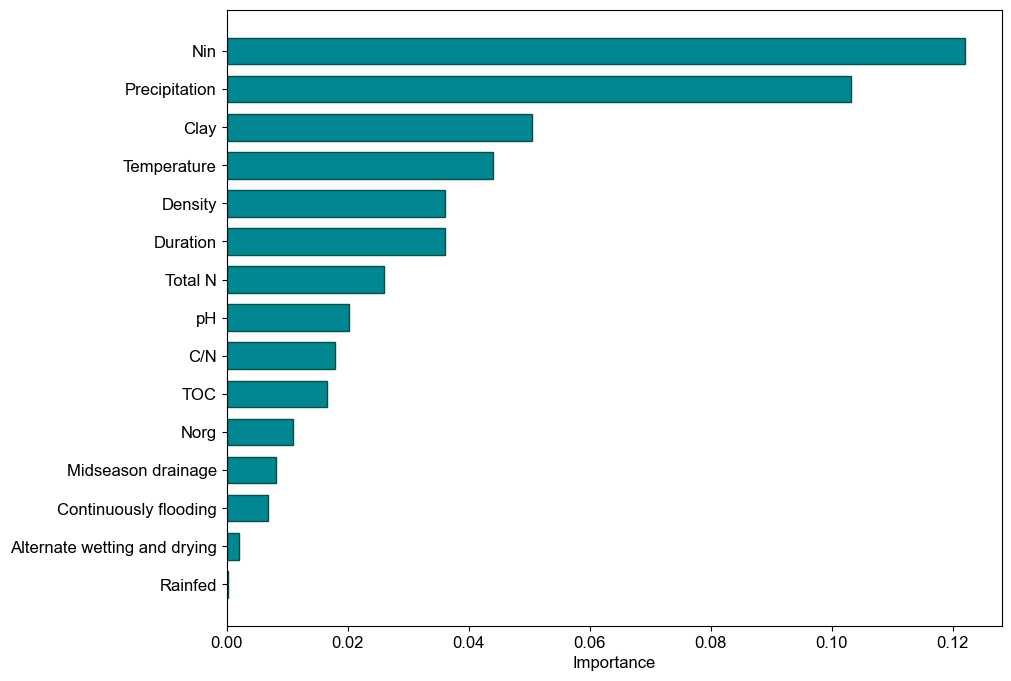

In [238]:
results = permutation_importance(rf, N2O[attributes],N2O.iloc[:,-1], scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
features_import = df(names, columns=['feature'])
features_import['importance'] = importance
features_import.sort_values('importance', inplace=True)

fig=plt.figure(figsize=(10,8))
plt.barh(features_import['feature'], features_import['importance'], height=0.7, color='#008792', edgecolor='#005344')
plt.xlabel("Importance")

plt.savefig("N2O_Importance_rf.jpg",dpi=600,bbox_inches='tight')

plt.show()

In [258]:
attributes

['duration',
 'temp',
 'prec',
 'density',
 'clay',
 'totN',
 'TOC',
 'C/N',
 'pH',
 'Norg',
 'Nin',
 'water_regime_AWD',
 'water_regime_continuously flooding',
 'water_regime_midseason drainage',
 'water_regime_rainfed']

In [259]:
N2O_R2_train=pd.DataFrame()
N2O_R2_test=pd.DataFrame()
N2O_RMSE_train=pd.DataFrame()
N2O_RMSE_test=pd.DataFrame()

def results_10folds(model,model_name):#cross_validate是sklearn模块的函数，keras模型直接调用时出错了
    cv=KFold(n_splits=10,shuffle=True,random_state=42)
    r2=cross_validate(model,N2O[attributes], N2O["N2O"],cv=cv,scoring="r2",return_train_score=True,
                        verbose=True,n_jobs=-1)
    rmse=cross_validate(model,N2O[attributes], N2O["N2O"],cv=cv,scoring="neg_root_mean_squared_error",return_train_score=True,
                        verbose=True,n_jobs=-1)
#     test_rmse,test_r2=evaluate_model(model,x_test,y_test)
    N2O_R2_train[model_name]=r2["train_score"]
    N2O_RMSE_train[model_name]=-rmse["train_score"]
    N2O_R2_test[model_name]=r2["test_score"]
    N2O_RMSE_test[model_name]=-rmse["test_score"]
 #   test_results[model_name]=[test_rmse,test_r2]

#test_results=pd.DataFrame()

In [260]:
results_10folds(rf,"rf")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   10.3s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.4s finished


In [261]:
N2O_R2_test

,rf
0,0.603697
1,0.486370
2,0.541805
3,0.602252
4,0.724809
5,0.698902
6,0.606094
7,0.688915
8,0.704871
9,0.653540


In [263]:
N2O_R2_test.mean()

rf    0.631125
dtype: float64

# XGB

In [264]:
start =time.time()
x=XGBRegressor(random_state=42)
xgbr_param_grid=[
    {'n_estimators':[50,100,200,300,400,500],
     'learning_rate':[0.1,0.2,0.3,0.4],
     'max_depth':[2,4,6,8,10]}]
xgbr_grid_search=GridSearchCV(x,xgbr_param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True,verbose=1,n_jobs=-1,refit=True)
#记得refit=True
xgbr_grid_search.fit(x_train,y_train)
end = time.time()
print('Running time: %s Seconds'%(end-start))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Running time: 53.83320498466492 Seconds


In [265]:
xgbr=xgbr_grid_search.best_estimator_
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [266]:
print(evaluate_model(xgbr,x_test,y_test))
print(evaluate_model(xgbr,x_train,y_train))

(0.38542628388705874, 0.606263693497068)
(0.21073556955669806, 0.8868889142960578)


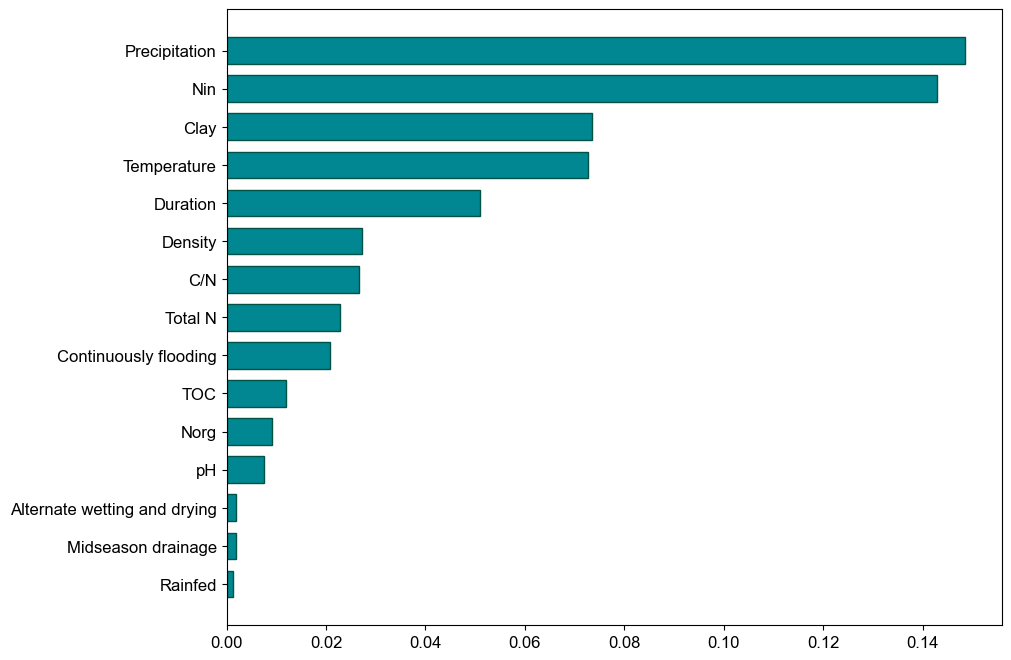

In [267]:
results = permutation_importance(xgbr, N2O[attributes],N2O.iloc[:,-1], scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
features_import = df(names, columns=['feature'])
features_import['importance'] = importance
features_import.sort_values('importance', inplace=True)

# summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig=plt.figure(figsize=(10,8))
plt.barh(features_import['feature'], features_import['importance'], height=0.7, color='#008792', edgecolor='#005344')
plt.savefig("N2O_Importance_xgb.jpg",dpi=600,bbox_inches='tight')
plt.show()

In [269]:
results_10folds(xgbr,"xgbr")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.2s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


In [271]:
N2O_R2_test.mean()

rf      0.631125
xgbr    0.640869
dtype: float64

# SVR

In [272]:
from sklearn.svm import SVR

In [275]:
s=SVR(kernel="rbf") #C=10000也是网格搜索得到的
param_grid=[
    {'C':[1,10,100,1000],
     #"gamma":[0.1,0.2,0.3,0.4,0.5],
     #'kernel':["rbf","sigmoid","poly"],
     #'epsilon':[40,45,50]
    }
]
#epsilon，预测值与实际值的距离在epsilon内，损失函数值为0，默认0.1
#C，误差项的惩罚函数，一般为10的n次幂，C越大，希望松弛变量接近0，即对误分类的惩罚越大，容易过拟合；减小C正则化，默认值1
#kernel：参数选择有RBF（高斯核）, Linear（线性核函数）, Poly（多项式核函数）, Sigmoid（sigmoid核函数）, 默认的是"RBF";
grid_search=GridSearchCV(s,param_grid,cv=10,scoring='neg_mean_squared_error',return_train_score=True, verbose=True,n_jobs=-1,refit=True)

In [276]:
grid_search.fit(x_train,y_train)
grid_search.best_estimator_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


D:\Users\LENOVO\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


SVR(C=1000)

In [284]:
svr=grid_search.best_estimator_

In [291]:
svr=SVR(C=1, gamma=0.1)
svr.fit(x_train,y_train)

SVR(C=1, gamma=0.1)

In [292]:
print(evaluate_model(svr,x_test,y_test))
print(evaluate_model(svr,x_train,y_train))

(0.4869648214857698, 0.3714816162559864)
(0.2726827997998203, 0.8106152655280381)


In [293]:
results_10folds(svr,"svr")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


In [286]:
N2O_R2_test.mean()

rf      0.631125
xgbr    0.640869
svr     0.167388
dtype: float64

# MLP

In [294]:
from sklearn.neural_network import MLPRegressor

In [295]:
mlp=MLPRegressor(activation='tanh',early_stopping=True, hidden_layer_sizes=(1000),
             max_iter=500, random_state=42,
             verbose=True)
mlp.fit(x_train,y_train)

Iteration 1, loss = 1.25234738
Validation score: -4.162283
Iteration 2, loss = 0.43682445
Validation score: -1.482550
Iteration 3, loss = 0.41651414
Validation score: -0.053722
Iteration 4, loss = 0.25922073
Validation score: -0.725924
Iteration 5, loss = 0.19947318
Validation score: -0.262722
Iteration 6, loss = 0.20189427
Validation score: 0.015809


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 7, loss = 0.16053990
Validation score: -0.095682
Iteration 8, loss = 0.15536815
Validation score: -0.016020
Iteration 9, loss = 0.15287720
Validation score: 0.028231
Iteration 10, loss = 0.14589548
Validation score: 0.034483
Iteration 11, loss = 0.14317275
Validation score: 0.055738
Iteration 12, loss = 0.14139429
Validation score: 0.061251
Iteration 13, loss = 0.13772028


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: 0.069647
Iteration 14, loss = 0.13635855
Validation score: 0.057289
Iteration 15, loss = 0.13510510
Validation score: 0.051413
Iteration 16, loss = 0.13433816
Validation score: 0.061444
Iteration 17, loss = 0.13361342
Validation score: 0.043556
Iteration 18, loss = 0.13271901
Validation score: 0.046200
Iteration 19, loss = 0.13139877
Validation score: 0.052471


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 20, loss = 0.13175028
Validation score: 0.060206
Iteration 21, loss = 0.13066784
Validation score: 0.033019
Iteration 22, loss = 0.12987759
Validation score: 0.040946
Iteration 23, loss = 0.12976310
Validation score: 0.052803
Iteration 24, loss = 0.12901097
Validation score: 0.061765
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=1000,
             max_iter=500, random_state=42, verbose=True)

In [301]:
evaluate_model(mlp,x_train,y_train)

(0.46920051920903943, 0.4392794817156934)

In [302]:
evaluate_model(mlp,x_test,y_test)

(0.528095815399969, 0.26082331517675583)

In [298]:
param_grid=[
    {'activation':['identity', 'logistic', 'tanh', 'relu'],
     #'learning_rate_init':[0.001,0.002,0.005,0.0001],
     'hidden_layer_sizes':[(1000,500),(100),(1000)]
    }
]

grid_search=GridSearchCV(mlp,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,verbose=1,refit=True)
#refit=True，一旦通过交叉验证找到了最佳估算器，将在整个训练集上重新训练，提供更多的数据很可能提升性能
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Iteration 1, loss = 446181.91338695
Validation score: -3812136.386389


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 2, loss = 394882.40013031
Validation score: -371468.213080
Iteration 3, loss = 215119.98555893
Validation score: -578994.179920


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 4, loss = 48009.91918497
Validation score: -564526.846937
Iteration 5, loss = 103542.51613280
Validation score: -77783.234176


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 6, loss = 16272.10859099
Validation score: -280439.764868
Iteration 7, loss = 43067.42042529
Validation score: -14600.064168


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 8, loss = 7697.45925109
Validation score: -132854.510544
Iteration 9, loss = 18477.79418336
Validation score: -3343.472935


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 10, loss = 4006.56973335
Validation score: -60203.412452
Iteration 11, loss = 7677.01735937
Validation score: -137.296658


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 12, loss = 2299.42312572
Validation score: -26365.612289
Iteration 13, loss = 2798.27081312
Validation score: -648.172518


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 14, loss = 1423.30164891
Validation score: -10048.105123
Iteration 15, loss = 836.92236219
Validation score: -1609.648808


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 16, loss = 831.81774687
Validation score: -3105.714046
Iteration 17, loss = 219.41962001
Validation score: -1668.613559


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 18, loss = 405.57990900
Validation score: -430.760814
Iteration 19, loss = 83.13407399
Validation score: -1300.491659


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 20, loss = 159.39920657
Validation score: -11.971747
Iteration 21, loss = 67.80287810


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Validation score: -476.304669
Iteration 22, loss = 40.38859828
Validation score: -184.406892
Iteration 23, loss = 49.14936113
Validation score: -70.733785
Iteration 24, loss = 12.18939294
Validation score: -153.734774


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 18.42374635
Validation score: -17.723675
Iteration 26, loss = 11.87002301
Validation score: -53.435462


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 27, loss = 4.45676397
Validation score: -37.505918
Iteration 28, loss = 6.48885296
Validation score: -5.436080


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 29, loss = 3.28137579
Validation score: -21.602811
Iteration 30, loss = 2.04649250
Validation score: -11.447977


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 2.53098087
Validation score: -3.992927
Iteration 32, loss = 1.59257662
Validation score: -9.783072


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 1.20171417
Validation score: -5.521467
Iteration 34, loss = 1.31339458
Validation score: -3.331161


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 0.97906888
Validation score: -4.706688
Iteration 36, loss = 0.85148177
Validation score: -3.196580


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 37, loss = 0.81763520
Validation score: -2.908529
Iteration 38, loss = 0.76214237
Validation score: -2.693299


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 39, loss = 0.67824520
Validation score: -2.276646
Iteration 40, loss = 0.65902253
Validation score: -2.442455


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 41, loss = 0.63667397
Validation score: -1.975638
Iteration 42, loss = 0.59897337
Validation score: -1.767581


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 43, loss = 0.56983338
Validation score: -1.839462
Iteration 44, loss = 0.55716364
Validation score: -1.568448


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 45, loss = 0.53556455
Validation score: -1.463884
Iteration 46, loss = 0.52082553
Validation score: -1.395904


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 47, loss = 0.50799896
Validation score: -1.279489
Iteration 48, loss = 0.49502130
Validation score: -1.195213


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 49, loss = 0.48223214
Validation score: -1.175692
Iteration 50, loss = 0.47158752
Validation score: -1.059845


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 51, loss = 0.46136400
Validation score: -0.996453
Iteration 52, loss = 0.45210669
Validation score: -0.993814


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 53, loss = 0.44540305
Validation score: -0.900050
Iteration 54, loss = 0.43696374
Validation score: -0.844703


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 55, loss = 0.43034421
Validation score: -0.840107
Iteration 56, loss = 0.42670713
Validation score: -0.762637


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 57, loss = 0.42020445
Validation score: -0.774348
Iteration 58, loss = 0.41001871
Validation score: -0.686079


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 59, loss = 0.40928936
Validation score: -0.708961
Iteration 60, loss = 0.40211985
Validation score: -0.639006


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 61, loss = 0.39839474
Validation score: -0.644346
Iteration 62, loss = 0.39281174
Validation score: -0.598784


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 63, loss = 0.38992622
Validation score: -0.603740
Iteration 64, loss = 0.38661661
Validation score: -0.575988


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 65, loss = 0.38357345
Validation score: -0.539025
Iteration 66, loss = 0.37984625
Validation score: -0.524439


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 67, loss = 0.37598579
Validation score: -0.544723
Iteration 68, loss = 0.37570577
Validation score: -0.504338


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 69, loss = 0.37099926
Validation score: -0.502544
Iteration 70, loss = 0.36888911
Validation score: -0.474927


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 71, loss = 0.36772938
Validation score: -0.471984
Iteration 72, loss = 0.36537657
Validation score: -0.474617


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 73, loss = 0.36311686
Validation score: -0.449458
Iteration 74, loss = 0.36338988
Validation score: -0.443090


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 75, loss = 0.35969226
Validation score: -0.431940
Iteration 76, loss = 0.35961356
Validation score: -0.423661


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 77, loss = 0.35557075
Validation score: -0.414338
Iteration 78, loss = 0.35433342
Validation score: -0.424436


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 79, loss = 0.35324043
Validation score: -0.396536
Iteration 80, loss = 0.35411170
Validation score: -0.414038


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 81, loss = 0.35061532
Validation score: -0.416161
Iteration 82, loss = 0.34724128
Validation score: -0.377885


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 83, loss = 0.34629024
Validation score: -0.437770
Iteration 84, loss = 0.34426644
Validation score: -0.368251


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 85, loss = 0.34792447
Validation score: -0.407288
Iteration 86, loss = 0.34224454
Validation score: -0.361110


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 87, loss = 0.34118596
Validation score: -0.371589
Iteration 88, loss = 0.33808671
Validation score: -0.385919


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 89, loss = 0.33851718
Validation score: -0.361818
Iteration 90, loss = 0.33569239
Validation score: -0.373996


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 91, loss = 0.33527187
Validation score: -0.358089
Iteration 92, loss = 0.33327023
Validation score: -0.357160


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 93, loss = 0.33225760
Validation score: -0.345112
Iteration 94, loss = 0.33083127
Validation score: -0.363469


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 95, loss = 0.33108010
Validation score: -0.329660
Iteration 96, loss = 0.33088645
Validation score: -0.354096


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 97, loss = 0.33048989
Validation score: -0.339574
Iteration 98, loss = 0.33180025
Validation score: -0.331916


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 99, loss = 0.33001434
Validation score: -0.334445
Iteration 100, loss = 0.32487437
Validation score: -0.330825


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 101, loss = 0.32604042
Validation score: -0.335211
Iteration 102, loss = 0.32267683
Validation score: -0.313455


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 103, loss = 0.32370836
Validation score: -0.358773
Iteration 104, loss = 0.32196591
Validation score: -0.306542


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 105, loss = 0.32514550
Validation score: -0.333694
Iteration 106, loss = 0.31886304
Validation score: -0.300286


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 107, loss = 0.31628337
Validation score: -0.342533
Iteration 108, loss = 0.31702699
Validation score: -0.297841


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 109, loss = 0.31746531
Validation score: -0.311249
Iteration 110, loss = 0.31352023
Validation score: -0.300842


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 111, loss = 0.31368270
Validation score: -0.314173
Iteration 112, loss = 0.31095284
Validation score: -0.296437


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 113, loss = 0.31094700
Validation score: -0.311824
Iteration 114, loss = 0.31118171
Validation score: -0.294931


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 115, loss = 0.31192563
Validation score: -0.308539
Iteration 116, loss = 0.31211150
Validation score: -0.289449


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 117, loss = 0.31035571
Validation score: -0.310021
Iteration 118, loss = 0.30731858
Validation score: -0.290126


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 119, loss = 0.30660179
Validation score: -0.301138
Iteration 120, loss = 0.30530324
Validation score: -0.277092


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 121, loss = 0.30564650
Validation score: -0.305851
Iteration 122, loss = 0.30292577
Validation score: -0.291333


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 123, loss = 0.30227553
Validation score: -0.275741
Iteration 124, loss = 0.30146105
Validation score: -0.287939


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 125, loss = 0.29974810
Validation score: -0.271791
Iteration 126, loss = 0.29974473
Validation score: -0.287315


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 127, loss = 0.29944161
Validation score: -0.271533
Iteration 128, loss = 0.29711982
Validation score: -0.268268


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 129, loss = 0.29691282
Validation score: -0.300490
Iteration 130, loss = 0.29723976
Validation score: -0.265065


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 131, loss = 0.29470183
Validation score: -0.317545
Iteration 132, loss = 0.29610989
Validation score: -0.261046


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 133, loss = 0.29768458
Validation score: -0.277628
Iteration 134, loss = 0.29898115
Validation score: -0.294836


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 135, loss = 0.30034636
Validation score: -0.256871
Iteration 136, loss = 0.29428965
Validation score: -0.263022


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 137, loss = 0.29050125
Validation score: -0.259014
Iteration 138, loss = 0.29084579
Validation score: -0.252271


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 139, loss = 0.29242076
Validation score: -0.257724
Iteration 140, loss = 0.28904484
Validation score: -0.260777


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 141, loss = 0.28775613
Validation score: -0.260119
Iteration 142, loss = 0.29296368
Validation score: -0.304764


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 143, loss = 0.28876907
Validation score: -0.245507
Iteration 144, loss = 0.28732501
Validation score: -0.292539


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 145, loss = 0.28616669
Validation score: -0.248255
Iteration 146, loss = 0.28802445
Validation score: -0.282497


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 147, loss = 0.29060688
Validation score: -0.241706
Iteration 148, loss = 0.29133556
Validation score: -0.311195


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 149, loss = 0.28833787
Validation score: -0.234943
Iteration 150, loss = 0.28552291
Validation score: -0.249827


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 151, loss = 0.28118017
Validation score: -0.235804
Iteration 152, loss = 0.28062011
Validation score: -0.251142


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 153, loss = 0.27916523
Validation score: -0.238537
Iteration 154, loss = 0.27932785
Validation score: -0.232793


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 155, loss = 0.27897775
Validation score: -0.239640
Iteration 156, loss = 0.27755886
Validation score: -0.229727


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 157, loss = 0.27988156
Validation score: -0.232217
Iteration 158, loss = 0.27845733
Validation score: -0.262260


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 159, loss = 0.27687587
Validation score: -0.232162
Iteration 160, loss = 0.27458587
Validation score: -0.222337


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 161, loss = 0.27705866
Validation score: -0.231112
Iteration 162, loss = 0.27297931
Validation score: -0.218963


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 163, loss = 0.27529078
Validation score: -0.242486
Iteration 164, loss = 0.27224497
Validation score: -0.219399


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 165, loss = 0.27240798
Validation score: -0.225806
Iteration 166, loss = 0.27099446
Validation score: -0.226973


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 167, loss = 0.27162386
Validation score: -0.214840
Iteration 168, loss = 0.27818936
Validation score: -0.297803


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 169, loss = 0.27757699
Validation score: -0.218133
Iteration 170, loss = 0.27232190
Validation score: -0.210423


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 171, loss = 0.27100110
Validation score: -0.241654
Iteration 172, loss = 0.27097229
Validation score: -0.217665


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 173, loss = 0.27334427
Validation score: -0.211664
Iteration 174, loss = 0.27586417
Validation score: -0.294508


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 175, loss = 0.27143996
Validation score: -0.203100
Iteration 176, loss = 0.26755563
Validation score: -0.221395


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 177, loss = 0.26987738
Validation score: -0.242766
Iteration 178, loss = 0.26629329
Validation score: -0.197400


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 179, loss = 0.26579611
Validation score: -0.205251
Iteration 180, loss = 0.26304712
Validation score: -0.211630


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 181, loss = 0.26627179
Validation score: -0.199716
Iteration 182, loss = 0.26812623
Validation score: -0.250285


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 183, loss = 0.26393221
Validation score: -0.195952
Iteration 184, loss = 0.26944417
Validation score: -0.193507


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 185, loss = 0.26443370
Validation score: -0.222240
Iteration 186, loss = 0.26459603
Validation score: -0.212938


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 187, loss = 0.26675554
Validation score: -0.319028
Iteration 188, loss = 0.27041361
Validation score: -0.275893


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 189, loss = 0.28143283
Validation score: -0.314660
Iteration 190, loss = 0.27758930
Validation score: -0.200994


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 191, loss = 0.26163285
Validation score: -0.174849
Iteration 192, loss = 0.26207964
Validation score: -0.262832


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 193, loss = 0.26452465
Validation score: -0.178512
Iteration 194, loss = 0.25660181
Validation score: -0.220744


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 195, loss = 0.25710384
Validation score: -0.171620
Iteration 196, loss = 0.25656458
Validation score: -0.183916


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 197, loss = 0.25384484
Validation score: -0.168584
Iteration 198, loss = 0.25316529
Validation score: -0.195723


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 199, loss = 0.25332063
Validation score: -0.167521
Iteration 200, loss = 0.25203286
Validation score: -0.190135


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 201, loss = 0.25211975
Validation score: -0.165643
Iteration 202, loss = 0.25437586
Validation score: -0.220312


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 203, loss = 0.25390117
Validation score: -0.160916
Iteration 204, loss = 0.25424147
Validation score: -0.160383


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 205, loss = 0.25094112
Validation score: -0.159677
Iteration 206, loss = 0.25442680
Validation score: -0.225569


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 207, loss = 0.25301781
Validation score: -0.155957
Iteration 208, loss = 0.24843883
Validation score: -0.160551


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 209, loss = 0.25129343
Validation score: -0.191737
Iteration 210, loss = 0.24920978
Validation score: -0.149905


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 211, loss = 0.24989372
Validation score: -0.148123
Iteration 212, loss = 0.24936641
Validation score: -0.174161


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 213, loss = 0.24809345
Validation score: -0.154502
Iteration 214, loss = 0.24903301
Validation score: -0.149019


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 215, loss = 0.24974133
Validation score: -0.267118
Iteration 216, loss = 0.25346406
Validation score: -0.139708


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 217, loss = 0.24897324
Validation score: -0.158034
Iteration 218, loss = 0.25582289
Validation score: -0.250529


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 219, loss = 0.25457464
Validation score: -0.186396
Iteration 220, loss = 0.25820198
Validation score: -0.157709


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 221, loss = 0.24623711
Validation score: -0.163302
Iteration 222, loss = 0.24751698
Validation score: -0.136375


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 223, loss = 0.24359779
Validation score: -0.149969
Iteration 224, loss = 0.24899291
Validation score: -0.232574


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 225, loss = 0.25428706
Validation score: -0.168077
Iteration 226, loss = 0.24518958
Validation score: -0.243650


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 227, loss = 0.23853536
Validation score: -0.192372
Iteration 228, loss = 0.24779841
Validation score: -0.308838


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 229, loss = 0.25249171
Validation score: -0.129012
Iteration 230, loss = 0.25481523
Validation score: -0.117162


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 231, loss = 0.24729372
Validation score: -0.204125
Iteration 232, loss = 0.24098870
Validation score: -0.122716


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 233, loss = 0.23884454
Validation score: -0.179695
Iteration 234, loss = 0.24095871
Validation score: -0.130414


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 235, loss = 0.23860671
Validation score: -0.226568
Iteration 236, loss = 0.25113733
Validation score: -0.125775


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 237, loss = 0.23853252
Validation score: -0.111420
Iteration 238, loss = 0.23904203
Validation score: -0.119740


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 239, loss = 0.23787253
Validation score: -0.148365
Iteration 240, loss = 0.24406850
Validation score: -0.095747


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 241, loss = 0.23176850
Validation score: -0.162120
Iteration 242, loss = 0.24166672
Validation score: -0.138612


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 243, loss = 0.24462279
Validation score: -0.103831
Iteration 244, loss = 0.24176029
Validation score: -0.229351


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 245, loss = 0.24404820
Validation score: -0.208472
Iteration 246, loss = 0.25433079
Validation score: -0.204827


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 247, loss = 0.24070071
Validation score: -0.084915
Iteration 248, loss = 0.23621178
Validation score: -0.087612


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 249, loss = 0.23962721
Validation score: -0.365252
Iteration 250, loss = 0.25892439
Validation score: -0.094763


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 251, loss = 0.24142137
Validation score: -0.080090
Iteration 252, loss = 0.23483241
Validation score: -0.135870


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 253, loss = 0.23334417
Validation score: -0.087541
Iteration 254, loss = 0.23130128
Validation score: -0.079023


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 255, loss = 0.23000526
Validation score: -0.087795
Iteration 256, loss = 0.22900737
Validation score: -0.093207


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 257, loss = 0.22893338
Validation score: -0.105983
Iteration 258, loss = 0.24009802
Validation score: -0.247378


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 259, loss = 0.24984898
Validation score: -0.078789
Iteration 260, loss = 0.22756963
Validation score: -0.064156


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 261, loss = 0.22868798
Validation score: -0.068549
Iteration 262, loss = 0.22602302
Validation score: -0.068012


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 263, loss = 0.22490076
Validation score: -0.054759
Iteration 264, loss = 0.22731237
Validation score: -0.087970


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 265, loss = 0.22946625
Validation score: -0.116738
Iteration 266, loss = 0.23119983
Validation score: -0.051113


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 267, loss = 0.22289887
Validation score: -0.064129
Iteration 268, loss = 0.22216491
Validation score: -0.049815


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 269, loss = 0.22314951
Validation score: -0.052051
Iteration 270, loss = 0.22352975
Validation score: -0.115463


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 271, loss = 0.22989676
Validation score: -0.039535
Iteration 272, loss = 0.22511769
Validation score: -0.038178


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 273, loss = 0.22134622
Validation score: -0.051895
Iteration 274, loss = 0.21994676
Validation score: -0.039136


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 275, loss = 0.21925751
Validation score: -0.202312
Iteration 276, loss = 0.23244329
Validation score: -0.051954


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 277, loss = 0.22752883
Validation score: -0.039030
Iteration 278, loss = 0.22667889
Validation score: -0.234034


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 279, loss = 0.23575312
Validation score: -0.049239
Iteration 280, loss = 0.22063798
Validation score: -0.040400


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 281, loss = 0.22033235
Validation score: -0.065560
Iteration 282, loss = 0.22096626
Validation score: -0.028192


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 283, loss = 0.21682713
Validation score: -0.024692
Iteration 284, loss = 0.21766653
Validation score: -0.039929


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 285, loss = 0.21960404
Validation score: -0.031143
Iteration 286, loss = 0.21740694
Validation score: -0.087860


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 287, loss = 0.22436388
Validation score: -0.053120
Iteration 288, loss = 0.22604386
Validation score: -0.153511


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 289, loss = 0.22730686
Validation score: -0.119042
Iteration 290, loss = 0.22939609
Validation score: -0.065829


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 291, loss = 0.22752271
Validation score: -0.165001
Iteration 292, loss = 0.23634463
Validation score: -0.085672


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 293, loss = 0.22720394
Validation score: -0.063020
Iteration 294, loss = 0.22225174
Validation score: -0.006160


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 295, loss = 0.21554974
Validation score: -0.003835
Iteration 296, loss = 0.21720698
Validation score: -0.124528


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 297, loss = 0.21757682
Validation score: -0.001231
Iteration 298, loss = 0.21817775
Validation score: -0.044781


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 299, loss = 0.22493064
Validation score: -0.057159
Iteration 300, loss = 0.21738533
Validation score: -0.017454


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 301, loss = 0.21708631
Validation score: -0.019612
Iteration 302, loss = 0.21852559
Validation score: 0.002346


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 303, loss = 0.21272784
Validation score: -0.002815
Iteration 304, loss = 0.21184462
Validation score: -0.053153


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 305, loss = 0.21542331
Validation score: -0.011120
Iteration 306, loss = 0.21659976
Validation score: 0.012502


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 307, loss = 0.21477014
Validation score: 0.014317
Iteration 308, loss = 0.21035625
Validation score: -0.108770


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 309, loss = 0.21756523
Validation score: 0.014470
Iteration 310, loss = 0.21048913
Validation score: 0.008874


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 311, loss = 0.22082974
Validation score: 0.009664
Iteration 312, loss = 0.20747806
Validation score: 0.008670


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 313, loss = 0.20967958
Validation score: 0.027400
Iteration 314, loss = 0.20731663
Validation score: 0.016627


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 315, loss = 0.20738664
Validation score: 0.027645
Iteration 316, loss = 0.21076801
Validation score: -0.133385


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 317, loss = 0.21215889
Validation score: 0.017900
Iteration 318, loss = 0.21981905
Validation score: -0.125295


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 319, loss = 0.22668966
Validation score: -0.078514
Iteration 320, loss = 0.22085861
Validation score: -0.075899


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 321, loss = 0.21082198
Validation score: 0.035231
Iteration 322, loss = 0.20522282
Validation score: 0.031895


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 323, loss = 0.20517153
Validation score: 0.000219
Iteration 324, loss = 0.20443826
Validation score: -0.039952


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 325, loss = 0.21780930
Validation score: 0.033180
Iteration 326, loss = 0.20710162
Validation score: -0.004742


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 327, loss = 0.20671025
Validation score: 0.024569
Iteration 328, loss = 0.20434418
Validation score: 0.031001


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 329, loss = 0.20354493
Validation score: -0.016456
Iteration 330, loss = 0.21191641
Validation score: -0.071906


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 331, loss = 0.23077346
Validation score: -0.069886
Iteration 332, loss = 0.22697958
Validation score: -0.009264
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 442302.01516561
Validation score: -4070733.515085
Iteration 2, loss = 394994.68387117
Validation score: -432158.402414


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 217371.23634224
Validation score: -572320.110128
Iteration 4, loss = 47908.52421484
Validation score: -619056.687105


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 103883.55443733
Validation score: -64275.707914
Iteration 6, loss = 16900.65517964
Validation score: -291123.851829


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 39882.36656645
Validation score: -8899.233175
Iteration 8, loss = 7989.96672201
Validation score: -134028.266727


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 16621.49831952
Validation score: -1556.531258
Iteration 10, loss = 4169.46773807
Validation score: -59642.582799


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 6853.39160335
Validation score: -38.122465
Iteration 12, loss = 2506.59508350
Validation score: -25893.600358


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 2429.49927034
Validation score: -1487.848895
Iteration 14, loss = 1516.91622852
Validation score: -9175.571955


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 692.36000044
Validation score: -2386.043632
Iteration 16, loss = 851.57734675
Validation score: -2561.811131


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 181.50573988
Validation score: -2005.267367
Iteration 18, loss = 389.94653814
Validation score: -203.959242


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 90.33345559
Validation score: -1391.004802
Iteration 20, loss = 136.01074304
Validation score: -54.235434


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 79.36013069
Validation score: -372.526047
Iteration 22, loss = 31.47555724
Validation score: -283.040747
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 430353.48513764
Validation score: -4436013.534161
Iteration 2, loss = 391163.65198635
Validation score: -494517.909165


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 228230.45690227
Validation score: -643235.677756
Iteration 4, loss = 49381.00383434
Validation score: -730707.609705


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 110466.82198809
Validation score: -76200.035039
Iteration 6, loss = 19381.82304032
Validation score: -375033.973572


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 46728.70890115
Validation score: -14689.128128
Iteration 8, loss = 8634.28687825
Validation score: -160518.344134


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 18671.46011038
Validation score: -3002.777478
Iteration 10, loss = 3966.65898977
Validation score: -69707.114327


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 7642.23237378
Validation score: -656.725376
Iteration 12, loss = 1998.21178801
Validation score: -33250.854596


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 3373.72184428
Validation score: -37.576287
Iteration 14, loss = 1201.22842451
Validation score: -14140.817818


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 1202.59425455
Validation score: -746.931983
Iteration 16, loss = 757.22797089
Validation score: -5483.699293


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 353.37749413
Validation score: -1277.746562
Iteration 18, loss = 454.86022235
Validation score: -1403.700583


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 106.41183408
Validation score: -1548.165165
Iteration 20, loss = 232.76524077
Validation score: -103.119631


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 56.88484049
Validation score: -876.201138
Iteration 22, loss = 78.62130826
Validation score: -68.934461


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 23, loss = 52.64916925
Validation score: -268.882793
Iteration 24, loss = 19.37659368
Validation score: -208.305484
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 434435.87085397
Validation score: -4047001.005872
Iteration 2, loss = 379862.63573474
Validation score: -518668.754086


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 221666.61726847
Validation score: -501394.005457
Iteration 4, loss = 46050.33513763
Validation score: -673556.753069


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 100104.72714029
Validation score: -36275.480269
Iteration 6, loss = 19474.45370559
Validation score: -327927.245823


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 39633.66081829
Validation score: -2971.355024
Iteration 8, loss = 9921.34395909
Validation score: -142535.905098


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 15625.42615301
Validation score: -72.861654
Iteration 10, loss = 5186.04069865
Validation score: -60544.936654


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 5866.29476547
Validation score: -926.253264
Iteration 12, loss = 2806.65251752
Validation score: -25795.010277


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 2189.41388289
Validation score: -2212.991124
Iteration 14, loss = 1672.67659446
Validation score: -9085.974474


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 642.83032065
Validation score: -3214.142603
Iteration 16, loss = 939.82126950
Validation score: -2155.610577


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 173.88820715
Validation score: -2608.700123
Iteration 18, loss = 414.91029198
Validation score: -108.247143


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 111.41816636
Validation score: -1538.181074
Iteration 20, loss = 142.00686442
Validation score: -153.977927
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 430661.27938797
Validation score: -3081524.185704
Iteration 2, loss = 368321.33888636
Validation score: -414460.619070


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 212551.46197427
Validation score: -341430.940284
Iteration 4, loss = 44409.52969654
Validation score: -520685.937678


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 97082.81571038
Validation score: -20084.823552
Iteration 6, loss = 20484.54827343
Validation score: -255673.598169


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 38244.44947404
Validation score: -555.576018
Iteration 8, loss = 10979.85747013
Validation score: -109722.049186


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 14528.29488560
Validation score: -683.066367
Iteration 10, loss = 5939.05360902
Validation score: -45987.527594


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 5363.84485370
Validation score: -1938.295743
Iteration 12, loss = 3279.99636632
Validation score: -19029.884232


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 1917.09142581
Validation score: -3020.813593
Iteration 14, loss = 1900.95475355
Validation score: -5944.961413


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 546.18744080
Validation score: -3532.634858
Iteration 16, loss = 1003.87894603
Validation score: -1054.480461


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 187.26057256
Validation score: -2471.472183
Iteration 18, loss = 407.11809702
Validation score: -3.141068


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 150.46912838
Validation score: -1145.490783
Iteration 20, loss = 118.76849141
Validation score: -278.351820


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 123.65072808
Validation score: -197.465230
Iteration 22, loss = 29.21938568
Validation score: -359.424912


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 23, loss = 56.28187720
Validation score: -5.211098
Iteration 24, loss = 26.61125222
Validation score: -130.301902


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 13.11001028
Validation score: -81.756933
Iteration 26, loss = 19.11609615
Validation score: -2.425467


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 27, loss = 6.86465686
Validation score: -49.347021
Iteration 28, loss = 5.33161520
Validation score: -19.436038


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 29, loss = 5.72789069
Validation score: -1.921379
Iteration 30, loss = 2.12059583
Validation score: -13.478100


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 1.78724007
Validation score: -6.052265
Iteration 32, loss = 2.00416899
Validation score: -1.080903


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 1.10892653
Validation score: -4.789422
Iteration 34, loss = 0.92047920
Validation score: -3.084268


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 1.04975708
Validation score: -0.798488
Iteration 36, loss = 0.84590587
Validation score: -1.750799


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 37, loss = 0.67088178
Validation score: -1.885537
Iteration 38, loss = 0.68410822
Validation score: -0.909464


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 39, loss = 0.63032291
Validation score: -0.751717
Iteration 40, loss = 0.54620747
Validation score: -0.938029


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 41, loss = 0.54756415
Validation score: -0.763076
Iteration 42, loss = 0.54778441
Validation score: -0.626310


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 43, loss = 0.53661054
Validation score: -0.667844
Iteration 44, loss = 0.52086489
Validation score: -0.677484


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 45, loss = 0.51048083
Validation score: -0.606992
Iteration 46, loss = 0.51153064
Validation score: -0.562433


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 47, loss = 0.50249441
Validation score: -0.565634
Iteration 48, loss = 0.49988284
Validation score: -0.550672


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 49, loss = 0.49008851
Validation score: -0.540415
Iteration 50, loss = 0.48845805
Validation score: -0.515548


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 51, loss = 0.48464711
Validation score: -0.505905
Iteration 52, loss = 0.48511265
Validation score: -0.498844


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 53, loss = 0.47666318
Validation score: -0.494732
Iteration 54, loss = 0.47650009
Validation score: -0.477070


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 55, loss = 0.47364758
Validation score: -0.468325
Iteration 56, loss = 0.47271911
Validation score: -0.460671


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 57, loss = 0.47195478
Validation score: -0.456501
Iteration 58, loss = 0.46548076
Validation score: -0.462671


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 59, loss = 0.46472582
Validation score: -0.452590
Iteration 60, loss = 0.46363912
Validation score: -0.430903


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 61, loss = 0.46042577
Validation score: -0.424658
Iteration 62, loss = 0.45556707
Validation score: -0.418886


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 63, loss = 0.45545370
Validation score: -0.407643
Iteration 64, loss = 0.45205469
Validation score: -0.403641


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 65, loss = 0.45075805
Validation score: -0.396433
Iteration 66, loss = 0.45001303
Validation score: -0.395986


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 67, loss = 0.44742129
Validation score: -0.382854
Iteration 68, loss = 0.44667464
Validation score: -0.376483


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 69, loss = 0.44214155
Validation score: -0.373195
Iteration 70, loss = 0.44160904
Validation score: -0.364572


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 71, loss = 0.43879495
Validation score: -0.363007
Iteration 72, loss = 0.43685698
Validation score: -0.356244


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 73, loss = 0.43591545
Validation score: -0.348698
Iteration 74, loss = 0.43332975
Validation score: -0.343510


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 75, loss = 0.43286282
Validation score: -0.342048
Iteration 76, loss = 0.43197449
Validation score: -0.333651


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 77, loss = 0.42661492
Validation score: -0.340026
Iteration 78, loss = 0.43167137
Validation score: -0.334571


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 79, loss = 0.42920652
Validation score: -0.319447
Iteration 80, loss = 0.42588589
Validation score: -0.315899


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 81, loss = 0.42401365
Validation score: -0.307486
Iteration 82, loss = 0.41995474
Validation score: -0.304996


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 83, loss = 0.42039552
Validation score: -0.297143
Iteration 84, loss = 0.41808112
Validation score: -0.291177


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 85, loss = 0.41489192
Validation score: -0.286587
Iteration 86, loss = 0.41799201
Validation score: -0.281608


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 87, loss = 0.41263707
Validation score: -0.280656
Iteration 88, loss = 0.40901802
Validation score: -0.282236


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 89, loss = 0.40778463
Validation score: -0.275529
Iteration 90, loss = 0.40662753
Validation score: -0.265745


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 91, loss = 0.40396940
Validation score: -0.259671
Iteration 92, loss = 0.40408560
Validation score: -0.255175


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 93, loss = 0.40331137
Validation score: -0.250810
Iteration 94, loss = 0.39940323
Validation score: -0.245433


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 95, loss = 0.39723530
Validation score: -0.243829
Iteration 96, loss = 0.39608332
Validation score: -0.236885


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 97, loss = 0.39432607
Validation score: -0.233665
Iteration 98, loss = 0.39366981
Validation score: -0.228853


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 99, loss = 0.39057242
Validation score: -0.230024
Iteration 100, loss = 0.39054030
Validation score: -0.218903


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 101, loss = 0.38874158
Validation score: -0.215605
Iteration 102, loss = 0.38640804
Validation score: -0.210992


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 103, loss = 0.38524364
Validation score: -0.208063
Iteration 104, loss = 0.38548967
Validation score: -0.204549


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 105, loss = 0.38366974
Validation score: -0.198537
Iteration 106, loss = 0.38208589
Validation score: -0.195379


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 107, loss = 0.37968390
Validation score: -0.192593
Iteration 108, loss = 0.37927887
Validation score: -0.190751


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 109, loss = 0.37758517
Validation score: -0.185785
Iteration 110, loss = 0.37441062
Validation score: -0.182448


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 111, loss = 0.37299449
Validation score: -0.179105
Iteration 112, loss = 0.37105731
Validation score: -0.173391


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 113, loss = 0.37039405
Validation score: -0.185834
Iteration 114, loss = 0.37064482
Validation score: -0.167575


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 115, loss = 0.37005108
Validation score: -0.162938
Iteration 116, loss = 0.36509291
Validation score: -0.157325


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 117, loss = 0.36506196
Validation score: -0.156296
Iteration 118, loss = 0.36362788
Validation score: -0.151973


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 119, loss = 0.36306847
Validation score: -0.148334
Iteration 120, loss = 0.36007713
Validation score: -0.145351


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 121, loss = 0.35912179
Validation score: -0.146448
Iteration 122, loss = 0.35940582
Validation score: -0.141645


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 123, loss = 0.35823022
Validation score: -0.137131
Iteration 124, loss = 0.35732733
Validation score: -0.132493


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 125, loss = 0.35442114
Validation score: -0.132588
Iteration 126, loss = 0.35369353
Validation score: -0.124022


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 127, loss = 0.34982577
Validation score: -0.128116
Iteration 128, loss = 0.35355598
Validation score: -0.125717


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 129, loss = 0.35274440
Validation score: -0.121531
Iteration 130, loss = 0.35029317
Validation score: -0.119710


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 131, loss = 0.34757375
Validation score: -0.121873
Iteration 132, loss = 0.34572568
Validation score: -0.130271


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 133, loss = 0.34647393
Validation score: -0.118290
Iteration 134, loss = 0.34285973
Validation score: -0.116222


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 135, loss = 0.33939004
Validation score: -0.097091
Iteration 136, loss = 0.33809648
Validation score: -0.103838


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 137, loss = 0.33908227
Validation score: -0.107153
Iteration 138, loss = 0.34405699
Validation score: -0.137398


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 139, loss = 0.34533966
Validation score: -0.147157
Iteration 140, loss = 0.35316851
Validation score: -0.087604


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 141, loss = 0.33493661
Validation score: -0.083115
Iteration 142, loss = 0.33463782
Validation score: -0.084308


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 143, loss = 0.33301056
Validation score: -0.097077
Iteration 144, loss = 0.32856651
Validation score: -0.077157


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 145, loss = 0.32940185
Validation score: -0.099007
Iteration 146, loss = 0.32900835
Validation score: -0.072682


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 147, loss = 0.32702915
Validation score: -0.097686
Iteration 148, loss = 0.32764284
Validation score: -0.061191


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 149, loss = 0.32145915
Validation score: -0.090330
Iteration 150, loss = 0.32503975
Validation score: -0.106663


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 151, loss = 0.32658828
Validation score: -0.083680
Iteration 152, loss = 0.32293162
Validation score: -0.053651


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 153, loss = 0.31630285
Validation score: -0.052528
Iteration 154, loss = 0.31646672
Validation score: -0.062875


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 155, loss = 0.31613327
Validation score: -0.046079
Iteration 156, loss = 0.31327429
Validation score: -0.044573


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 157, loss = 0.31306912
Validation score: -0.047028
Iteration 158, loss = 0.31115249
Validation score: -0.044307


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 159, loss = 0.31452882
Validation score: -0.050677
Iteration 160, loss = 0.30740484
Validation score: -0.050929


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 161, loss = 0.31449218
Validation score: -0.050671
Iteration 162, loss = 0.30721017
Validation score: -0.029713


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 163, loss = 0.31195264
Validation score: -0.027099
Iteration 164, loss = 0.31092324
Validation score: -0.046308


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 165, loss = 0.30923543
Validation score: -0.033743
Iteration 166, loss = 0.30650788
Validation score: -0.048035


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 167, loss = 0.30211523
Validation score: -0.022502
Iteration 168, loss = 0.30338964
Validation score: -0.025646


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 169, loss = 0.30071892
Validation score: -0.057474
Iteration 170, loss = 0.30244506
Validation score: -0.036478


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 171, loss = 0.30225411
Validation score: -0.014085
Iteration 172, loss = 0.30493835
Validation score: -0.058856


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 173, loss = 0.30692062
Validation score: -0.022158
Iteration 174, loss = 0.29625372
Validation score: -0.076918


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 175, loss = 0.29869384
Validation score: -0.020052
Iteration 176, loss = 0.29691912
Validation score: -0.001538


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 177, loss = 0.29181414
Validation score: -0.008784
Iteration 178, loss = 0.29360198
Validation score: -0.007488


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 179, loss = 0.29139742
Validation score: -0.022278
Iteration 180, loss = 0.29708303
Validation score: -0.165918


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 181, loss = 0.31521623
Validation score: -0.018103
Iteration 182, loss = 0.29130075
Validation score: -0.002577


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 183, loss = 0.28671012
Validation score: 0.008774
Iteration 184, loss = 0.28461069
Validation score: 0.001388


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 185, loss = 0.28409014
Validation score: 0.006120
Iteration 186, loss = 0.27983362
Validation score: 0.011512


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 187, loss = 0.28053247
Validation score: -0.016218
Iteration 188, loss = 0.28216417
Validation score: 0.020929


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 189, loss = 0.28481751
Validation score: 0.012201
Iteration 190, loss = 0.28092020
Validation score: -0.013835


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 191, loss = 0.28315775
Validation score: 0.015896
Iteration 192, loss = 0.27770709
Validation score: 0.026220


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 193, loss = 0.27620356
Validation score: 0.019522
Iteration 194, loss = 0.27687313
Validation score: 0.013075


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 195, loss = 0.27667019
Validation score: 0.029365
Iteration 196, loss = 0.27018505
Validation score: 0.033849


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 197, loss = 0.27072657
Validation score: 0.025929
Iteration 198, loss = 0.27500890
Validation score: 0.031710


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 199, loss = 0.26919549
Validation score: 0.038950
Iteration 200, loss = 0.27289688
Validation score: 0.022461


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 201, loss = 0.27171249
Validation score: 0.000236
Iteration 202, loss = 0.27122773
Validation score: 0.043113


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 203, loss = 0.26544078
Validation score: 0.044782
Iteration 204, loss = 0.26394255
Validation score: 0.043798


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 205, loss = 0.26260768
Validation score: 0.038787
Iteration 206, loss = 0.26833929
Validation score: 0.003883


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 207, loss = 0.26494316
Validation score: 0.020782
Iteration 208, loss = 0.26386081
Validation score: 0.047629


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 209, loss = 0.25932187
Validation score: 0.047109
Iteration 210, loss = 0.26014001
Validation score: 0.038540


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 211, loss = 0.26938142
Validation score: 0.024891
Iteration 212, loss = 0.26278337
Validation score: 0.044442


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 213, loss = 0.25800805
Validation score: 0.052150
Iteration 214, loss = 0.26533353
Validation score: -0.026507


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 215, loss = 0.26680020
Validation score: -0.068522
Iteration 216, loss = 0.27066386
Validation score: 0.062953


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 217, loss = 0.25455327
Validation score: 0.063723
Iteration 218, loss = 0.25162142
Validation score: 0.061205


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 219, loss = 0.25236616
Validation score: 0.045654
Iteration 220, loss = 0.25467818
Validation score: 0.067825


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 221, loss = 0.24863055
Validation score: 0.065708
Iteration 222, loss = 0.25096814
Validation score: 0.049853


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 223, loss = 0.25641826
Validation score: 0.071270
Iteration 224, loss = 0.24907525
Validation score: 0.073742


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 225, loss = 0.24609119
Validation score: 0.068019
Iteration 226, loss = 0.24670667
Validation score: 0.075409


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 227, loss = 0.25383025
Validation score: 0.003361
Iteration 228, loss = 0.24728135
Validation score: 0.009870


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 229, loss = 0.25641668
Validation score: 0.073711
Iteration 230, loss = 0.24555060
Validation score: 0.066582


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 231, loss = 0.24316815
Validation score: 0.080405
Iteration 232, loss = 0.24183690
Validation score: 0.084828


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 233, loss = 0.24059513
Validation score: 0.082374
Iteration 234, loss = 0.24044796
Validation score: 0.081526


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 235, loss = 0.24147449
Validation score: 0.056987
Iteration 236, loss = 0.24917480
Validation score: 0.079312


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 237, loss = 0.23901714
Validation score: 0.087708
Iteration 238, loss = 0.23671916
Validation score: 0.077290


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 239, loss = 0.23675924
Validation score: 0.090139
Iteration 240, loss = 0.23758553
Validation score: 0.037002


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 241, loss = 0.23772091
Validation score: 0.051109
Iteration 242, loss = 0.24721245
Validation score: 0.077412


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 243, loss = 0.24615178
Validation score: -0.155460
Iteration 244, loss = 0.26496788
Validation score: 0.036148


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 245, loss = 0.24380332
Validation score: 0.093591
Iteration 246, loss = 0.24540126
Validation score: 0.049018


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 247, loss = 0.23312329
Validation score: 0.090963
Iteration 248, loss = 0.22935401
Validation score: 0.084361


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 249, loss = 0.22849262
Validation score: 0.094152
Iteration 250, loss = 0.22889449
Validation score: 0.095815


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 251, loss = 0.22847146
Validation score: 0.098077
Iteration 252, loss = 0.22884542
Validation score: 0.067116


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 253, loss = 0.23266834
Validation score: -0.013634
Iteration 254, loss = 0.23656507
Validation score: 0.091599


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 255, loss = 0.23085047
Validation score: 0.095447
Iteration 256, loss = 0.23428868
Validation score: 0.025538


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 257, loss = 0.24276395
Validation score: 0.081628
Iteration 258, loss = 0.22443302
Validation score: 0.077601


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 259, loss = 0.22722135
Validation score: 0.082155
Iteration 260, loss = 0.22700867
Validation score: 0.104873


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 261, loss = 0.22217350
Validation score: 0.111161
Iteration 262, loss = 0.22142518
Validation score: 0.111792


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 263, loss = 0.22474076
Validation score: 0.095050
Iteration 264, loss = 0.23024803
Validation score: 0.091756


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 265, loss = 0.22835272
Validation score: 0.012535
Iteration 266, loss = 0.23495544
Validation score: 0.113191


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 267, loss = 0.22827895
Validation score: 0.075577
Iteration 268, loss = 0.23103372
Validation score: 0.101209


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 269, loss = 0.22471789
Validation score: 0.095569
Iteration 270, loss = 0.22870644
Validation score: 0.121867


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 271, loss = 0.22141678
Validation score: 0.093500
Iteration 272, loss = 0.23098530
Validation score: 0.035710


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 273, loss = 0.22564296
Validation score: 0.117370
Iteration 274, loss = 0.21929181
Validation score: 0.077244


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 275, loss = 0.22222035
Validation score: 0.124409
Iteration 276, loss = 0.21412965
Validation score: 0.092258


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 277, loss = 0.21820978
Validation score: 0.083330
Iteration 278, loss = 0.22874127
Validation score: 0.120287


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 279, loss = 0.21918924
Validation score: 0.025928
Iteration 280, loss = 0.22013847
Validation score: 0.089149


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 281, loss = 0.21232032
Validation score: 0.109575
Iteration 282, loss = 0.21426690
Validation score: 0.090663


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 283, loss = 0.21885460
Validation score: 0.117652
Iteration 284, loss = 0.21230005
Validation score: 0.126235


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 285, loss = 0.21513366
Validation score: 0.112769
Iteration 286, loss = 0.21282090
Validation score: 0.084749


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 287, loss = 0.21875760
Validation score: 0.096684
Iteration 288, loss = 0.21179317
Validation score: 0.128557


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 289, loss = 0.20920275
Validation score: 0.123883
Iteration 290, loss = 0.20897451
Validation score: 0.095505


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 291, loss = 0.20971157
Validation score: 0.107647
Iteration 292, loss = 0.21823045
Validation score: 0.062063


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 293, loss = 0.23115292
Validation score: 0.026652
Iteration 294, loss = 0.22553698
Validation score: 0.063665


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 295, loss = 0.23396582
Validation score: 0.055558
Iteration 296, loss = 0.22191403
Validation score: 0.108379


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 297, loss = 0.21655552
Validation score: 0.086755
Iteration 298, loss = 0.20485134
Validation score: 0.132141


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 299, loss = 0.20552893
Validation score: 0.122294
Iteration 300, loss = 0.20484232
Validation score: 0.122960


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 301, loss = 0.20300240
Validation score: 0.138611
Iteration 302, loss = 0.20263422
Validation score: 0.119994


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 303, loss = 0.20508296
Validation score: 0.096008
Iteration 304, loss = 0.20624052
Validation score: 0.138583


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 305, loss = 0.21112898
Validation score: 0.069979
Iteration 306, loss = 0.20965325
Validation score: 0.147671


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 307, loss = 0.19974140
Validation score: 0.148513
Iteration 308, loss = 0.19985653
Validation score: 0.139523


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 309, loss = 0.20113732
Validation score: 0.114327
Iteration 310, loss = 0.20731826
Validation score: 0.122816


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 311, loss = 0.20339804
Validation score: 0.105402
Iteration 312, loss = 0.20760117
Validation score: 0.144402


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 313, loss = 0.21245002
Validation score: 0.118716
Iteration 314, loss = 0.20090364
Validation score: 0.143397


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 315, loss = 0.19837729
Validation score: 0.118937
Iteration 316, loss = 0.20111791
Validation score: 0.137951


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 317, loss = 0.19727418
Validation score: 0.145008
Iteration 318, loss = 0.19636630
Validation score: 0.147400
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 54282.48894636
Validation score: -109789.646839
Iteration 2, loss = 15558.20780976
Validation score: -16492.789793
Iteration 3, loss = 2067.27294822
Validation score: -6063.991436
Iteration 4, loss = 2996.04473132
Validation score: -24149.342878
Iteration 5, loss = 6234.35865175
Validation score: -26847.404034
Iteration 6, loss = 5285.36750123
Validation score: -14294.788659
Iteration 7, loss = 2325.26384499
Validation score: -4009.170751
Iteration 8, loss = 751.75276379
Validation score: -2915.530892
Iteration 9, loss = 978.06023553
Validation score: -5215.194942


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 10, loss = 1350.01880429
Validation score: -4915.388881
Iteration 11, loss = 1058.12902231
Validation score: -2820.987146
Iteration 12, loss = 595.75388803
Validation score: -1766.697617
Iteration 13, loss = 465.19843208
Validation score: -2039.934068
Iteration 14, loss = 520.80001446
Validation score: -2147.802273
Iteration 15, loss = 480.42672330
Validation score: -1660.452090
Iteration 16, loss = 364.15583562
Validation score: -1241.167600
Iteration 17, loss = 302.56305775
Validation score: -1160.335382
Iteration 18, loss = 293.79674848
Validation score: -1105.327176
Iteration 19, loss = 267.51598087
Validation score: -944.969176
Iteration 20, loss = 225.05835406
Validation score: -820.468353
Iteration 21, loss = 199.46377379
Validation score: -769.434978
Iteration 22, loss = 182.72944110
Validation score: -700.322786
Iteration 23, loss = 162.02688432
Validation score: -608.721528
Iteration 24, loss = 142.29811872
Validation score: -539.141732
Iteration 25, loss = 127.8309

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 66, loss = 10.17191114
Validation score: -48.337158
Iteration 67, loss = 9.76597571
Validation score: -46.600955
Iteration 68, loss = 9.40765887
Validation score: -44.991971
Iteration 69, loss = 9.05340484
Validation score: -43.453014
Iteration 70, loss = 8.71642990
Validation score: -41.874059
Iteration 71, loss = 8.38873931
Validation score: -40.436338
Iteration 72, loss = 8.08377037
Validation score: -39.077334
Iteration 73, loss = 7.78490666
Validation score: -37.746954
Iteration 74, loss = 7.49552354
Validation score: -36.420224
Iteration 75, loss = 7.21172024
Validation score: -35.081669
Iteration 76, loss = 6.94314437
Validation score: -33.905978
Iteration 77, loss = 6.69537386
Validation score: -32.835735
Iteration 78, loss = 6.44915381
Validation score: -31.785935
Iteration 79, loss = 6.21978990
Validation score: -30.690808
Iteration 80, loss = 5.99611613
Validation score: -29.650881
Iteration 81, loss = 5.77898420
Validation score: -28.682298
Iteration 82, loss = 5.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: -11.716757
Iteration 119, loss = 2.02779545
Validation score: -11.357438
Iteration 120, loss = 1.98974737
Validation score: -11.083619
Iteration 121, loss = 1.95986825
Validation score: -10.985803
Iteration 122, loss = 1.92445041
Validation score: -10.863235
Iteration 123, loss = 1.89260960
Validation score: -10.677173
Iteration 124, loss = 1.86558277
Validation score: -10.462112
Iteration 125, loss = 1.83695865
Validation score: -10.402141
Iteration 126, loss = 1.81325631
Validation score: -10.267528
Iteration 127, loss = 1.78093927
Validation score: -10.019021
Iteration 128, loss = 1.75860636
Validation score: -9.915987
Iteration 129, loss = 1.73214501
Validation score: -9.787904
Iteration 130, loss = 1.71235519
Validation score: -9.770144
Iteration 131, loss = 1.68933139
Validation score: -9.529657
Iteration 132, loss = 1.66495082
Validation score: -9.418280
Iteration 133, loss = 1.64365196
Validation score: -9.367614
Iteration 134, loss = 1.62522745
Validation sco

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 167, loss = 1.19871602
Validation score: -6.617136
Iteration 168, loss = 1.19002161
Validation score: -6.533999
Iteration 169, loss = 1.18130085
Validation score: -6.472250
Iteration 170, loss = 1.17235709
Validation score: -6.380458
Iteration 171, loss = 1.16386560
Validation score: -6.348853
Iteration 172, loss = 1.15508573
Validation score: -6.289432
Iteration 173, loss = 1.14804608
Validation score: -6.225657
Iteration 174, loss = 1.13978020
Validation score: -6.204488
Iteration 175, loss = 1.13381301
Validation score: -6.158923
Iteration 176, loss = 1.12562720
Validation score: -6.021162
Iteration 177, loss = 1.11836600
Validation score: -5.985390
Iteration 178, loss = 1.11035801
Validation score: -6.066775
Iteration 179, loss = 1.10240807
Validation score: -5.916303
Iteration 180, loss = 1.09488633
Validation score: -5.808499
Iteration 181, loss = 1.08880316
Validation score: -5.843981
Iteration 182, loss = 1.07933601
Validation score: -5.817472
Iteration 183, loss = 1.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: -4.245613
Iteration 219, loss = 0.85795927
Validation score: -4.281460
Iteration 220, loss = 0.85619703
Validation score: -4.256581
Iteration 221, loss = 0.85028065
Validation score: -4.125116
Iteration 222, loss = 0.84843846
Validation score: -4.109093
Iteration 223, loss = 0.84209769
Validation score: -4.231323
Iteration 224, loss = 0.83852634
Validation score: -4.060544
Iteration 225, loss = 0.83049630
Validation score: -4.008618
Iteration 226, loss = 0.82544841
Validation score: -4.031418
Iteration 227, loss = 0.82519748
Validation score: -4.037078
Iteration 228, loss = 0.81939083
Validation score: -3.898083
Iteration 229, loss = 0.81363914
Validation score: -3.917782
Iteration 230, loss = 0.80786096
Validation score: -3.965047
Iteration 231, loss = 0.80458207
Validation score: -3.856061
Iteration 232, loss = 0.80389621
Validation score: -3.783825
Iteration 233, loss = 0.79293212
Validation score: -3.848442
Iteration 234, loss = 0.79337372
Validation score: -3.797

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 274, loss = 0.63969927
Validation score: -2.768602
Iteration 275, loss = 0.63736063
Validation score: -2.806596
Iteration 276, loss = 0.63289984
Validation score: -2.723622
Iteration 277, loss = 0.63040064
Validation score: -2.699457
Iteration 278, loss = 0.62920297
Validation score: -2.726825
Iteration 279, loss = 0.62524100
Validation score: -2.654883
Iteration 280, loss = 0.62016146
Validation score: -2.677055
Iteration 281, loss = 0.61761905
Validation score: -2.642492
Iteration 282, loss = 0.61423081
Validation score: -2.617232
Iteration 283, loss = 0.61046833
Validation score: -2.621063
Iteration 284, loss = 0.60852195
Validation score: -2.569129
Iteration 285, loss = 0.60493871
Validation score: -2.560147
Iteration 286, loss = 0.60157282
Validation score: -2.547443
Iteration 287, loss = 0.59887604
Validation score: -2.519423
Iteration 288, loss = 0.59555241
Validation score: -2.490716
Iteration 289, loss = 0.59394659
Validation score: -2.479720
Iteration 290, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 328, loss = 0.49220491
Validation score: -1.855082
Iteration 329, loss = 0.48893345
Validation score: -1.848472
Iteration 330, loss = 0.48750986
Validation score: -1.828691
Iteration 331, loss = 0.48631553
Validation score: -1.790037
Iteration 332, loss = 0.48199780
Validation score: -1.806853
Iteration 333, loss = 0.48135269
Validation score: -1.789949
Iteration 334, loss = 0.47874746
Validation score: -1.738568
Iteration 335, loss = 0.47636098
Validation score: -1.761055
Iteration 336, loss = 0.47623855
Validation score: -1.762792
Iteration 337, loss = 0.47310585
Validation score: -1.697383
Iteration 338, loss = 0.46949542
Validation score: -1.727308
Iteration 339, loss = 0.46776078
Validation score: -1.720387
Iteration 340, loss = 0.46535202
Validation score: -1.671508
Iteration 341, loss = 0.46318299
Validation score: -1.664741
Iteration 342, loss = 0.46020627
Validation score: -1.671318
Iteration 343, loss = 0.45931927
Validation score: -1.661054
Iteration 344, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 381, loss = 0.38816129
Validation score: -1.200956
Iteration 382, loss = 0.38733184
Validation score: -1.199721
Iteration 383, loss = 0.38539756
Validation score: -1.219135
Iteration 384, loss = 0.38551514
Validation score: -1.165754
Iteration 385, loss = 0.38773320
Validation score: -1.162515
Iteration 386, loss = 0.38154821
Validation score: -1.213353
Iteration 387, loss = 0.37947704
Validation score: -1.136618
Iteration 388, loss = 0.37923912
Validation score: -1.137121
Iteration 389, loss = 0.37634891
Validation score: -1.159094
Iteration 390, loss = 0.37486547
Validation score: -1.111647
Iteration 391, loss = 0.37383554
Validation score: -1.112399
Iteration 392, loss = 0.37208052
Validation score: -1.126714
Iteration 393, loss = 0.36964729
Validation score: -1.083600
Iteration 394, loss = 0.36950317
Validation score: -1.092807
Iteration 395, loss = 0.36682360
Validation score: -1.067774
Iteration 396, loss = 0.36652320
Validation score: -1.067719
Iteration 397, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 437, loss = 0.31272549
Validation score: -0.755224
Iteration 438, loss = 0.31159971
Validation score: -0.732996
Iteration 439, loss = 0.31020434
Validation score: -0.728119
Iteration 440, loss = 0.31000346
Validation score: -0.721927
Iteration 441, loss = 0.30898542
Validation score: -0.713539
Iteration 442, loss = 0.30724386
Validation score: -0.713330
Iteration 443, loss = 0.30603406
Validation score: -0.712710
Iteration 444, loss = 0.30436663
Validation score: -0.684786
Iteration 445, loss = 0.30406705
Validation score: -0.688972
Iteration 446, loss = 0.30272553
Validation score: -0.687082
Iteration 447, loss = 0.30158493
Validation score: -0.668179
Iteration 448, loss = 0.30159014
Validation score: -0.666230
Iteration 449, loss = 0.29976351
Validation score: -0.678390
Iteration 450, loss = 0.29898956
Validation score: -0.642864
Iteration 451, loss = 0.29841164
Validation score: -0.663761
Iteration 452, loss = 0.29702346
Validation score: -0.637523
Iteration 453, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 490, loss = 0.26346793
Validation score: -0.430432
Iteration 491, loss = 0.26170075
Validation score: -0.449836
Iteration 492, loss = 0.26135385
Validation score: -0.418939
Iteration 493, loss = 0.26115548
Validation score: -0.423127
Iteration 494, loss = 0.26013344
Validation score: -0.423911
Iteration 495, loss = 0.25875319
Validation score: -0.411118
Iteration 496, loss = 0.25805859
Validation score: -0.404831
Iteration 497, loss = 0.25780733
Validation score: -0.402783
Iteration 498, loss = 0.25737763
Validation score: -0.399403
Iteration 499, loss = 0.25727778
Validation score: -0.393747
Iteration 500, loss = 0.25650768
Validation score: -0.382304
Iteration 1, loss = 54091.82218688
Validation score: -149183.133820
Iteration 2, loss = 15591.99141462
Validation score: -22200.614720
Iteration 3, loss = 1947.10653059
Validation score: -6339.771769
Iteration 4, loss = 3038.16564984
Validation score: -28829.777483
Iteration 5, loss = 6279.02267397
Validation score: -32026.5586

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 40, loss = 34.63204754
Validation score: -166.643319
Iteration 41, loss = 32.31844236
Validation score: -157.938039
Iteration 42, loss = 30.35933221
Validation score: -150.086808
Iteration 43, loss = 28.53218429
Validation score: -143.144996
Iteration 44, loss = 26.98734530
Validation score: -136.574892
Iteration 45, loss = 25.62377453
Validation score: -130.856669
Iteration 46, loss = 24.28358958
Validation score: -125.139303
Iteration 47, loss = 23.04719105
Validation score: -120.020817
Iteration 48, loss = 21.92517726
Validation score: -115.307508
Iteration 49, loss = 20.97170620
Validation score: -110.862852
Iteration 50, loss = 20.01061811
Validation score: -106.710582
Iteration 51, loss = 19.16093813
Validation score: -102.807685
Iteration 52, loss = 18.34278278
Validation score: -99.190476
Iteration 53, loss = 17.61485869
Validation score: -95.784675
Iteration 54, loss = 16.87733921
Validation score: -92.155880
Iteration 55, loss = 16.20726088
Validation score: -88.817

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 94, loss = 3.87875304
Validation score: -24.592645
Iteration 95, loss = 3.76599057
Validation score: -23.975230
Iteration 96, loss = 3.65462223
Validation score: -23.297192
Iteration 97, loss = 3.54667061
Validation score: -22.678597
Iteration 98, loss = 3.44901517
Validation score: -22.074168
Iteration 99, loss = 3.35334102
Validation score: -21.510487
Iteration 100, loss = 3.26378897
Validation score: -21.140890
Iteration 101, loss = 3.17424541
Validation score: -20.553778
Iteration 102, loss = 3.08379576
Validation score: -19.947370
Iteration 103, loss = 3.01537825
Validation score: -19.431794
Iteration 104, loss = 2.93068541
Validation score: -19.149881
Iteration 105, loss = 2.86255285
Validation score: -18.827337
Iteration 106, loss = 2.78639629
Validation score: -18.201261
Iteration 107, loss = 2.72668065
Validation score: -17.721139
Iteration 108, loss = 2.65982228
Validation score: -17.438256
Iteration 109, loss = 2.59928732
Validation score: -17.185475
Iteration 110,

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 148, loss = 1.45421363
Validation score: -9.291926
Iteration 149, loss = 1.44025506
Validation score: -9.198865
Iteration 150, loss = 1.42420162
Validation score: -9.132465
Iteration 151, loss = 1.41138824
Validation score: -9.052113
Iteration 152, loss = 1.39893232
Validation score: -8.903697
Iteration 153, loss = 1.38517196
Validation score: -8.843741
Iteration 154, loss = 1.37127380
Validation score: -8.717725
Iteration 155, loss = 1.35976014
Validation score: -8.605866
Iteration 156, loss = 1.34927953
Validation score: -8.485227
Iteration 157, loss = 1.33594557
Validation score: -8.441416
Iteration 158, loss = 1.32420412
Validation score: -8.360100
Iteration 159, loss = 1.31379354
Validation score: -8.241370
Iteration 160, loss = 1.30368612
Validation score: -8.179117
Iteration 161, loss = 1.29120223
Validation score: -8.010478
Iteration 162, loss = 1.28113306
Validation score: -7.980483
Iteration 163, loss = 1.26924153
Validation score: -7.950519
Iteration 164, loss = 1.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 202, loss = 0.94305127
Validation score: -5.326247
Iteration 203, loss = 0.93677328
Validation score: -5.278823
Iteration 204, loss = 0.93085744
Validation score: -5.232967
Iteration 205, loss = 0.92411056
Validation score: -5.186300
Iteration 206, loss = 0.92068520
Validation score: -5.130070
Iteration 207, loss = 0.91214493
Validation score: -5.045898
Iteration 208, loss = 0.90541295
Validation score: -5.044997
Iteration 209, loss = 0.89895809
Validation score: -5.008789
Iteration 210, loss = 0.89689330
Validation score: -4.911149
Iteration 211, loss = 0.88663107
Validation score: -4.918971
Iteration 212, loss = 0.88517783
Validation score: -4.896521
Iteration 213, loss = 0.87634458
Validation score: -4.755798
Iteration 214, loss = 0.87210578
Validation score: -4.738926
Iteration 215, loss = 0.86157639
Validation score: -4.768548
Iteration 216, loss = 0.86138332
Validation score: -4.695530
Iteration 217, loss = 0.85104843
Validation score: -4.592628
Iteration 218, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 255, loss = 0.67255476
Validation score: -3.294031
Iteration 256, loss = 0.66976295
Validation score: -3.232721
Iteration 257, loss = 0.66388088
Validation score: -3.221858
Iteration 258, loss = 0.66248496
Validation score: -3.220535
Iteration 259, loss = 0.65764843
Validation score: -3.138626
Iteration 260, loss = 0.65363782
Validation score: -3.136132
Iteration 261, loss = 0.64937271
Validation score: -3.119745
Iteration 262, loss = 0.64569998
Validation score: -3.076786
Iteration 263, loss = 0.64179487
Validation score: -3.046944
Iteration 264, loss = 0.63850104
Validation score: -3.020850
Iteration 265, loss = 0.63516392
Validation score: -2.995723
Iteration 266, loss = 0.63323097
Validation score: -2.994375
Iteration 267, loss = 0.62720709
Validation score: -2.931765
Iteration 268, loss = 0.62392345
Validation score: -2.915670
Iteration 269, loss = 0.62031221
Validation score: -2.895758
Iteration 270, loss = 0.61682932
Validation score: -2.872993
Iteration 271, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 312, loss = 0.49396110
Validation score: -1.992419
Iteration 313, loss = 0.49590004
Validation score: -1.993637
Iteration 314, loss = 0.48883432
Validation score: -1.932148
Iteration 315, loss = 0.48884345
Validation score: -1.941913
Iteration 316, loss = 0.48529550
Validation score: -1.941411
Iteration 317, loss = 0.48557958
Validation score: -1.882046
Iteration 318, loss = 0.47950169
Validation score: -1.914541
Iteration 319, loss = 0.48034988
Validation score: -1.882415
Iteration 320, loss = 0.47552516
Validation score: -1.830433
Iteration 321, loss = 0.47522792
Validation score: -1.856414
Iteration 322, loss = 0.47374092
Validation score: -1.854929
Iteration 323, loss = 0.46705645
Validation score: -1.783565
Iteration 324, loss = 0.46855361
Validation score: -1.771640
Iteration 325, loss = 0.46278040
Validation score: -1.830055
Iteration 326, loss = 0.46380972
Validation score: -1.751748
Iteration 327, loss = 0.45962526
Validation score: -1.727282
Iteration 328, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 369, loss = 0.37930611
Validation score: -1.171736
Iteration 370, loss = 0.37983748
Validation score: -1.161134
Iteration 371, loss = 0.37887029
Validation score: -1.192241
Iteration 372, loss = 0.37683659
Validation score: -1.132253
Iteration 373, loss = 0.37414756
Validation score: -1.150673
Iteration 374, loss = 0.37241814
Validation score: -1.133152
Iteration 375, loss = 0.37015493
Validation score: -1.107613
Iteration 376, loss = 0.36864338
Validation score: -1.102668
Iteration 377, loss = 0.36714850
Validation score: -1.090535
Iteration 378, loss = 0.36611913
Validation score: -1.075822
Iteration 379, loss = 0.36457362
Validation score: -1.083417
Iteration 380, loss = 0.36336090
Validation score: -1.051930
Iteration 381, loss = 0.36097179
Validation score: -1.063392
Iteration 382, loss = 0.35997753
Validation score: -1.038502
Iteration 383, loss = 0.35829087
Validation score: -1.037973
Iteration 384, loss = 0.35841764
Validation score: -1.007114
Iteration 385, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 419, loss = 0.31189064
Validation score: -0.695095
Iteration 420, loss = 0.31153652
Validation score: -0.713182
Iteration 421, loss = 0.31075349
Validation score: -0.697757
Iteration 422, loss = 0.30887555
Validation score: -0.671500
Iteration 423, loss = 0.31026048
Validation score: -0.708559
Iteration 424, loss = 0.30707871
Validation score: -0.656999
Iteration 425, loss = 0.30536860
Validation score: -0.674471
Iteration 426, loss = 0.30347401
Validation score: -0.653031
Iteration 427, loss = 0.30285183
Validation score: -0.645185
Iteration 428, loss = 0.30161381
Validation score: -0.644187
Iteration 429, loss = 0.30044908
Validation score: -0.630138
Iteration 430, loss = 0.29908544
Validation score: -0.633028
Iteration 431, loss = 0.29801451
Validation score: -0.611524
Iteration 432, loss = 0.29712386
Validation score: -0.607841
Iteration 433, loss = 0.29598732
Validation score: -0.611426
Iteration 434, loss = 0.29521700
Validation score: -0.591281
Iteration 435, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: -0.414227
Iteration 470, loss = 0.26416777
Validation score: -0.370241
Iteration 471, loss = 0.26143220
Validation score: -0.392182
Iteration 472, loss = 0.26162099
Validation score: -0.371178
Iteration 473, loss = 0.26015586
Validation score: -0.357660
Iteration 474, loss = 0.25963270
Validation score: -0.369050
Iteration 475, loss = 0.25852420
Validation score: -0.348067
Iteration 476, loss = 0.25790879
Validation score: -0.363896
Iteration 477, loss = 0.25694567
Validation score: -0.340204
Iteration 478, loss = 0.25605813
Validation score: -0.337084
Iteration 479, loss = 0.25589155
Validation score: -0.340210
Iteration 480, loss = 0.25467825
Validation score: -0.330694
Iteration 481, loss = 0.25391442
Validation score: -0.328258
Iteration 482, loss = 0.25443649
Validation score: -0.322016
Iteration 483, loss = 0.25438990
Validation score: -0.322711
Iteration 484, loss = 0.25206673
Validation score: -0.300391
Iteration 485, loss = 0.25318703
Validation score: -0.329

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 24, loss = 153.33544987
Validation score: -629.585386
Iteration 25, loss = 138.41564098
Validation score: -570.988146
Iteration 26, loss = 125.67978510
Validation score: -513.765563
Iteration 27, loss = 112.93479534
Validation score: -461.425385
Iteration 28, loss = 101.87065558
Validation score: -416.888479
Iteration 29, loss = 92.52379238
Validation score: -376.942113
Iteration 30, loss = 84.00537161
Validation score: -339.746039
Iteration 31, loss = 75.99116352
Validation score: -307.140292
Iteration 32, loss = 69.36030132
Validation score: -278.556949
Iteration 33, loss = 63.23708164
Validation score: -253.390624
Iteration 34, loss = 57.75524095
Validation score: -231.231211
Iteration 35, loss = 53.15728877
Validation score: -211.364584
Iteration 36, loss = 48.80022337
Validation score: -193.662535
Iteration 37, loss = 45.04210119
Validation score: -177.889822
Iteration 38, loss = 41.80118029
Validation score: -164.184636
Iteration 39, loss = 38.72051889
Validation score:

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 82, loss = 6.01555609
Validation score: -25.048351
Iteration 83, loss = 5.80527022
Validation score: -24.147474
Iteration 84, loss = 5.59718302
Validation score: -23.503856
Iteration 85, loss = 5.40127057
Validation score: -22.806113
Iteration 86, loss = 5.21128767
Validation score: -22.145111
Iteration 87, loss = 5.04648275
Validation score: -21.556758
Iteration 88, loss = 4.86713438
Validation score: -20.736540
Iteration 89, loss = 4.70095049
Validation score: -20.167498
Iteration 90, loss = 4.54800707
Validation score: -19.708017
Iteration 91, loss = 4.39277413
Validation score: -19.193646
Iteration 92, loss = 4.25276861
Validation score: -18.702992
Iteration 93, loss = 4.11820380
Validation score: -18.043161
Iteration 94, loss = 3.98853458
Validation score: -17.560650
Iteration 95, loss = 3.86218965
Validation score: -17.258808
Iteration 96, loss = 3.74631125
Validation score: -16.933108
Iteration 97, loss = 3.63226460
Validation score: -16.371603
Iteration 98, loss = 3.5

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 135, loss = 1.64441488
Validation score: -8.444114
Iteration 136, loss = 1.61969141
Validation score: -8.229396
Iteration 137, loss = 1.59891265
Validation score: -8.027140
Iteration 138, loss = 1.57933878
Validation score: -7.996040
Iteration 139, loss = 1.56200346
Validation score: -8.003698
Iteration 140, loss = 1.54275680
Validation score: -7.862821
Iteration 141, loss = 1.52356919
Validation score: -7.698891
Iteration 142, loss = 1.50787806
Validation score: -7.626921
Iteration 143, loss = 1.49331704
Validation score: -7.541665
Iteration 144, loss = 1.47337254
Validation score: -7.561805
Iteration 145, loss = 1.46371132
Validation score: -7.487693
Iteration 146, loss = 1.44310714
Validation score: -7.253260
Iteration 147, loss = 1.42869788
Validation score: -7.233856
Iteration 148, loss = 1.41432289
Validation score: -7.140390
Iteration 149, loss = 1.39848819
Validation score: -7.127646
Iteration 150, loss = 1.38818795
Validation score: -7.034943
Iteration 151, loss = 1.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 195, loss = 0.96598860
Validation score: -4.473601
Iteration 196, loss = 0.95544212
Validation score: -4.476065
Iteration 197, loss = 0.95086021
Validation score: -4.551141
Iteration 198, loss = 0.94278125
Validation score: -4.342825
Iteration 199, loss = 0.93557859
Validation score: -4.298615
Iteration 200, loss = 0.93090848
Validation score: -4.314360
Iteration 201, loss = 0.92186741
Validation score: -4.242561
Iteration 202, loss = 0.91579174
Validation score: -4.217140
Iteration 203, loss = 0.90968632
Validation score: -4.188087
Iteration 204, loss = 0.90269177
Validation score: -4.168650
Iteration 205, loss = 0.89700451
Validation score: -4.135074
Iteration 206, loss = 0.89164805
Validation score: -4.083945
Iteration 207, loss = 0.88678003
Validation score: -4.001176
Iteration 208, loss = 0.88097506
Validation score: -3.988662
Iteration 209, loss = 0.87444253
Validation score: -4.076633
Iteration 210, loss = 0.86804458
Validation score: -3.908364
Iteration 211, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: -2.715568
Iteration 254, loss = 0.66133985
Validation score: -2.652047
Iteration 255, loss = 0.65567390
Validation score: -2.563666
Iteration 256, loss = 0.65259136
Validation score: -2.591099
Iteration 257, loss = 0.64831439
Validation score: -2.593960
Iteration 258, loss = 0.64521982
Validation score: -2.536889
Iteration 259, loss = 0.64142224
Validation score: -2.518500
Iteration 260, loss = 0.63795982
Validation score: -2.509814
Iteration 261, loss = 0.63343546
Validation score: -2.459425
Iteration 262, loss = 0.63113895
Validation score: -2.433268
Iteration 263, loss = 0.62669736
Validation score: -2.415129
Iteration 264, loss = 0.62292562
Validation score: -2.449506
Iteration 265, loss = 0.62126382
Validation score: -2.376043
Iteration 266, loss = 0.61885067
Validation score: -2.422882
Iteration 267, loss = 0.61322539
Validation score: -2.306155
Iteration 268, loss = 0.61082273
Validation score: -2.306082
Iteration 269, loss = 0.60775468
Validation score: -2.372

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 307, loss = 0.49862071
Validation score: -1.657663
Iteration 308, loss = 0.49445240
Validation score: -1.614134
Iteration 309, loss = 0.49133408
Validation score: -1.580032
Iteration 310, loss = 0.49037995
Validation score: -1.582590
Iteration 311, loss = 0.48973100
Validation score: -1.622981
Iteration 312, loss = 0.49235914
Validation score: -1.514703
Iteration 313, loss = 0.48258946
Validation score: -1.611485
Iteration 314, loss = 0.48115814
Validation score: -1.531591
Iteration 315, loss = 0.47746690
Validation score: -1.475873
Iteration 316, loss = 0.47566424
Validation score: -1.511628
Iteration 317, loss = 0.47279608
Validation score: -1.506298
Iteration 318, loss = 0.47117425
Validation score: -1.451239
Iteration 319, loss = 0.46923382
Validation score: -1.479242
Iteration 320, loss = 0.46757459
Validation score: -1.415510
Iteration 321, loss = 0.46488380
Validation score: -1.464310
Iteration 322, loss = 0.46173395
Validation score: -1.396098
Iteration 323, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 359, loss = 0.39056644
Validation score: -0.967864
Iteration 360, loss = 0.38956211
Validation score: -0.955571
Iteration 361, loss = 0.39087661
Validation score: -0.948836
Iteration 362, loss = 0.38705926
Validation score: -1.033290
Iteration 363, loss = 0.38687833
Validation score: -0.906251
Iteration 364, loss = 0.38438879
Validation score: -0.940359
Iteration 365, loss = 0.38114013
Validation score: -0.937736
Iteration 366, loss = 0.37887915
Validation score: -0.900855
Iteration 367, loss = 0.37812257
Validation score: -0.904375
Iteration 368, loss = 0.37707807
Validation score: -0.925311
Iteration 369, loss = 0.37630051
Validation score: -0.852318
Iteration 370, loss = 0.37384531
Validation score: -0.899856
Iteration 371, loss = 0.37199573
Validation score: -0.859587
Iteration 372, loss = 0.36976352
Validation score: -0.842437
Iteration 373, loss = 0.36836004
Validation score: -0.853646
Iteration 374, loss = 0.36788926
Validation score: -0.853027
Iteration 375, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 413, loss = 0.31595969
Validation score: -0.559965
Iteration 414, loss = 0.31425007
Validation score: -0.522380
Iteration 415, loss = 0.31379709
Validation score: -0.507009
Iteration 416, loss = 0.31161862
Validation score: -0.542468
Iteration 417, loss = 0.31123115
Validation score: -0.494403
Iteration 418, loss = 0.30977328
Validation score: -0.481741
Iteration 419, loss = 0.30831307
Validation score: -0.509901
Iteration 420, loss = 0.30734571
Validation score: -0.487054
Iteration 421, loss = 0.30654201
Validation score: -0.488949
Iteration 422, loss = 0.30481482
Validation score: -0.465035
Iteration 423, loss = 0.30516397
Validation score: -0.472878
Iteration 424, loss = 0.30449147
Validation score: -0.444200
Iteration 425, loss = 0.30228117
Validation score: -0.450852
Iteration 426, loss = 0.30051119
Validation score: -0.473720
Iteration 427, loss = 0.30181735
Validation score: -0.439762
Iteration 428, loss = 0.29869850
Validation score: -0.458285
Iteration 429, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 472, loss = 0.25864077
Validation score: -0.200826
Iteration 473, loss = 0.25851245
Validation score: -0.205736
Iteration 474, loss = 0.25780867
Validation score: -0.218577
Iteration 475, loss = 0.25774904
Validation score: -0.194407
Iteration 476, loss = 0.25570241
Validation score: -0.207010
Iteration 477, loss = 0.25656936
Validation score: -0.187866
Iteration 478, loss = 0.25426776
Validation score: -0.175727
Iteration 479, loss = 0.25460590
Validation score: -0.192513
Iteration 480, loss = 0.25435568
Validation score: -0.164405
Iteration 481, loss = 0.25271745
Validation score: -0.204936
Iteration 482, loss = 0.25284373
Validation score: -0.158812
Iteration 483, loss = 0.25159925
Validation score: -0.185186
Iteration 484, loss = 0.25012096
Validation score: -0.148276
Iteration 485, loss = 0.25204294
Validation score: -0.163388
Iteration 486, loss = 0.25028049
Validation score: -0.161691
Iteration 487, loss = 0.24862503
Validation score: -0.141447
Iteration 488, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 22, loss = 183.56187475
Validation score: -961.635734
Iteration 23, loss = 164.60513994
Validation score: -858.763945
Iteration 24, loss = 145.07238506
Validation score: -781.613253
Iteration 25, loss = 129.85015944
Validation score: -718.121055
Iteration 26, loss = 117.27259108
Validation score: -645.492302
Iteration 27, loss = 104.66727452
Validation score: -574.892463
Iteration 28, loss = 93.96492552
Validation score: -515.247178
Iteration 29, loss = 84.78951360
Validation score: -466.728810
Iteration 30, loss = 76.54513288
Validation score: -424.724237
Iteration 31, loss = 68.97863187
Validation score: -388.812143
Iteration 32, loss = 62.91278660
Validation score: -357.127003
Iteration 33, loss = 57.18128082
Validation score: -328.129767
Iteration 34, loss = 52.29600657
Validation score: -299.999002
Iteration 35, loss = 47.98406698
Validation score: -277.143957
Iteration 36, loss = 44.26859410
Validation score: -257.159616
Iteration 37, loss = 40.93485612
Validation score

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 79, loss = 7.06855674
Validation score: -45.483581
Iteration 80, loss = 6.83178285
Validation score: -43.995380
Iteration 81, loss = 6.59768863
Validation score: -42.553613
Iteration 82, loss = 6.37292043
Validation score: -41.165178
Iteration 83, loss = 6.16465547
Validation score: -39.771855
Iteration 84, loss = 5.94825272
Validation score: -38.530939
Iteration 85, loss = 5.75084468
Validation score: -37.341083
Iteration 86, loss = 5.56059634
Validation score: -36.126163
Iteration 87, loss = 5.38273038
Validation score: -34.990371
Iteration 88, loss = 5.20839569
Validation score: -33.818568
Iteration 89, loss = 5.03627115
Validation score: -32.766430
Iteration 90, loss = 4.88358903
Validation score: -31.796622
Iteration 91, loss = 4.72222641
Validation score: -30.788238
Iteration 92, loss = 4.57548376
Validation score: -29.897948
Iteration 93, loss = 4.43434675
Validation score: -28.971515
Iteration 94, loss = 4.30303579
Validation score: -28.067167
Iteration 95, loss = 4.1

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 137, loss = 1.71617505
Validation score: -10.815905
Iteration 138, loss = 1.69383918
Validation score: -10.653795
Iteration 139, loss = 1.67516676
Validation score: -10.555552
Iteration 140, loss = 1.65202778
Validation score: -10.364700
Iteration 141, loss = 1.63224388
Validation score: -10.219848
Iteration 142, loss = 1.61333003
Validation score: -10.109988
Iteration 143, loss = 1.59366438
Validation score: -9.923144
Iteration 144, loss = 1.57438596
Validation score: -9.806864
Iteration 145, loss = 1.55905956
Validation score: -9.696286
Iteration 146, loss = 1.53980629
Validation score: -9.513172
Iteration 147, loss = 1.52155036
Validation score: -9.449079
Iteration 148, loss = 1.50506629
Validation score: -9.309567
Iteration 149, loss = 1.49089876
Validation score: -9.139865
Iteration 150, loss = 1.47359701
Validation score: -9.048972
Iteration 151, loss = 1.46155218
Validation score: -9.032984
Iteration 152, loss = 1.44634372
Validation score: -8.802195
Iteration 153, los

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 191, loss = 1.03056029
Validation score: -5.781750
Iteration 192, loss = 1.02216411
Validation score: -5.749980
Iteration 193, loss = 1.01428655
Validation score: -5.675018
Iteration 194, loss = 1.00680741
Validation score: -5.620162
Iteration 195, loss = 1.00139261
Validation score: -5.573010
Iteration 196, loss = 0.99140535
Validation score: -5.555225
Iteration 197, loss = 0.98550833
Validation score: -5.491282
Iteration 198, loss = 0.97784405
Validation score: -5.407018
Iteration 199, loss = 0.97113513
Validation score: -5.345718
Iteration 200, loss = 0.96375757
Validation score: -5.290370
Iteration 201, loss = 0.95693862
Validation score: -5.293688
Iteration 202, loss = 0.95033935
Validation score: -5.230752
Iteration 203, loss = 0.94507849
Validation score: -5.122174
Iteration 204, loss = 0.93579711
Validation score: -5.124266
Iteration 205, loss = 0.92846372
Validation score: -5.143119
Iteration 206, loss = 0.92424358
Validation score: -5.031365
Iteration 207, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 246, loss = 0.71003287
Validation score: -3.505158
Iteration 247, loss = 0.70319455
Validation score: -3.450332
Iteration 248, loss = 0.69823985
Validation score: -3.461128
Iteration 249, loss = 0.69584356
Validation score: -3.441686
Iteration 250, loss = 0.68916035
Validation score: -3.348557
Iteration 251, loss = 0.68611818
Validation score: -3.328353
Iteration 252, loss = 0.68153116
Validation score: -3.348374
Iteration 253, loss = 0.67758273
Validation score: -3.323736
Iteration 254, loss = 0.67325730
Validation score: -3.272159
Iteration 255, loss = 0.66911132
Validation score: -3.211322
Iteration 256, loss = 0.66511016
Validation score: -3.217722
Iteration 257, loss = 0.66143673
Validation score: -3.205417
Iteration 258, loss = 0.65722985
Validation score: -3.169504
Iteration 259, loss = 0.65318446
Validation score: -3.120698
Iteration 260, loss = 0.64940101
Validation score: -3.099824
Iteration 261, loss = 0.64555517
Validation score: -3.074171
Iteration 262, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 295, loss = 0.53207687
Validation score: -2.330212
Iteration 296, loss = 0.52933344
Validation score: -2.326767
Iteration 297, loss = 0.52660620
Validation score: -2.258929
Iteration 298, loss = 0.52373664
Validation score: -2.229969
Iteration 299, loss = 0.52236597
Validation score: -2.266494
Iteration 300, loss = 0.51806413
Validation score: -2.193601
Iteration 301, loss = 0.51527646
Validation score: -2.181808
Iteration 302, loss = 0.51428120
Validation score: -2.203072
Iteration 303, loss = 0.51069260
Validation score: -2.132126
Iteration 304, loss = 0.50807945
Validation score: -2.140551
Iteration 305, loss = 0.50622886
Validation score: -2.162305
Iteration 306, loss = 0.50260506
Validation score: -2.073253
Iteration 307, loss = 0.49964022
Validation score: -2.087050
Iteration 308, loss = 0.49760280
Validation score: -2.091152
Iteration 309, loss = 0.49326394
Validation score: -2.033153
Iteration 310, loss = 0.49240067
Validation score: -2.016000
Iteration 311, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 346, loss = 0.41160326
Validation score: -1.493788
Iteration 347, loss = 0.40949107
Validation score: -1.473831
Iteration 348, loss = 0.40798803
Validation score: -1.493289
Iteration 349, loss = 0.40563647
Validation score: -1.452734
Iteration 350, loss = 0.40470638
Validation score: -1.442215
Iteration 351, loss = 0.40251118
Validation score: -1.424179
Iteration 352, loss = 0.40005209
Validation score: -1.444378
Iteration 353, loss = 0.39836289
Validation score: -1.409811
Iteration 354, loss = 0.39647653
Validation score: -1.396369
Iteration 355, loss = 0.39530640
Validation score: -1.403517
Iteration 356, loss = 0.39268447
Validation score: -1.366299
Iteration 357, loss = 0.39224836
Validation score: -1.362928
Iteration 358, loss = 0.39109613
Validation score: -1.368401
Iteration 359, loss = 0.38854558
Validation score: -1.334146
Iteration 360, loss = 0.38559500
Validation score: -1.303792
Iteration 361, loss = 0.38642876
Validation score: -1.321663
Iteration 362, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 403, loss = 0.32497542
Validation score: -0.914367
Iteration 404, loss = 0.32427600
Validation score: -0.916401
Iteration 405, loss = 0.32495069
Validation score: -0.874419
Iteration 406, loss = 0.32255397
Validation score: -0.946667
Iteration 407, loss = 0.31850921
Validation score: -0.861982
Iteration 408, loss = 0.31808466
Validation score: -0.876925
Iteration 409, loss = 0.31552028
Validation score: -0.859478
Iteration 410, loss = 0.31399923
Validation score: -0.876828
Iteration 411, loss = 0.31379997
Validation score: -0.850812
Iteration 412, loss = 0.31173191
Validation score: -0.824971
Iteration 413, loss = 0.31189014
Validation score: -0.855802
Iteration 414, loss = 0.30932331
Validation score: -0.817463
Iteration 415, loss = 0.30861929
Validation score: -0.811909
Iteration 416, loss = 0.30710018
Validation score: -0.824789
Iteration 417, loss = 0.30741098
Validation score: -0.805698
Iteration 418, loss = 0.30630088
Validation score: -0.780797
Iteration 419, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 455, loss = 0.26982199
Validation score: -0.554048
Iteration 456, loss = 0.26805049
Validation score: -0.570418
Iteration 457, loss = 0.26774346
Validation score: -0.556505
Iteration 458, loss = 0.26735131
Validation score: -0.541794
Iteration 459, loss = 0.26597204
Validation score: -0.558086
Iteration 460, loss = 0.26563744
Validation score: -0.524779
Iteration 461, loss = 0.26616725
Validation score: -0.545504
Iteration 462, loss = 0.26443684
Validation score: -0.520962
Iteration 463, loss = 0.26348533
Validation score: -0.533061
Iteration 464, loss = 0.26233182
Validation score: -0.533626
Iteration 465, loss = 0.26106253
Validation score: -0.500605
Iteration 466, loss = 0.26140951
Validation score: -0.506327
Iteration 467, loss = 0.26011874
Validation score: -0.522182
Iteration 468, loss = 0.25895610
Validation score: -0.483700
Iteration 469, loss = 0.25839334
Validation score: -0.502851
Iteration 470, loss = 0.25747126
Validation score: -0.478887
Iteration 471, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 8, loss = 765.41217318
Validation score: -4680.235732
Iteration 9, loss = 954.41534820
Validation score: -8308.488775
Iteration 10, loss = 1308.58492581
Validation score: -7811.512431
Iteration 11, loss = 1021.79411768
Validation score: -4554.612661
Iteration 12, loss = 579.92064080
Validation score: -2648.105301
Iteration 13, loss = 459.46997138
Validation score: -2710.485044
Iteration 14, loss = 515.23306350
Validation score: -2765.010350
Iteration 15, loss = 478.06250945
Validation score: -2220.569759
Iteration 16, loss = 363.20511365
Validation score: -1833.832517
Iteration 17, loss = 307.06732983
Validation score: -1846.874164
Iteration 18, loss = 296.74913543
Validation score: -1794.441799
Iteration 19, loss = 272.55338577
Validation score: -1517.780889
Iteration 20, loss = 231.34936147
Validation score: -1264.792727
Iteration 21, loss = 203.76432321
Validation score: -1130.952332
Iteration 22, loss = 188.23418646
Validation score: -1028.738833
Iteration 23, loss = 169.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 63, loss = 11.50542185
Validation score: -75.732543
Iteration 64, loss = 11.08256471
Validation score: -72.923772
Iteration 65, loss = 10.64388712
Validation score: -70.151868
Iteration 66, loss = 10.24723651
Validation score: -67.543283
Iteration 67, loss = 9.83803050
Validation score: -65.016118
Iteration 68, loss = 9.47547624
Validation score: -62.559509
Iteration 69, loss = 9.10752295
Validation score: -60.252584
Iteration 70, loss = 8.76327539
Validation score: -58.020724
Iteration 71, loss = 8.43630271
Validation score: -55.877192
Iteration 72, loss = 8.11361303
Validation score: -53.812520
Iteration 73, loss = 7.81825350
Validation score: -51.816822
Iteration 74, loss = 7.52083485
Validation score: -49.906347
Iteration 75, loss = 7.23535442
Validation score: -48.090190
Iteration 76, loss = 6.97489303
Validation score: -46.318485
Iteration 77, loss = 6.71609542
Validation score: -44.637506
Iteration 78, loss = 6.46612074
Validation score: -43.035280
Iteration 79, loss =

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 108, loss = 2.56172236
Validation score: -16.233121
Iteration 109, loss = 2.50307604
Validation score: -15.816846
Iteration 110, loss = 2.45661702
Validation score: -15.429310
Iteration 111, loss = 2.39252371
Validation score: -14.996505
Iteration 112, loss = 2.34904804
Validation score: -14.624681
Iteration 113, loss = 2.29814661
Validation score: -14.256269
Iteration 114, loss = 2.24630349
Validation score: -13.963595
Iteration 115, loss = 2.21079193
Validation score: -13.625795
Iteration 116, loss = 2.17204724
Validation score: -13.262781
Iteration 117, loss = 2.12488857
Validation score: -12.950947
Iteration 118, loss = 2.08610956
Validation score: -12.667265
Iteration 119, loss = 2.04761369
Validation score: -12.377612
Iteration 120, loss = 2.01158945
Validation score: -12.097456
Iteration 121, loss = 1.98396251
Validation score: -11.838846
Iteration 122, loss = 1.95164093
Validation score: -11.580836
Iteration 123, loss = 1.91905559
Validation score: -11.357227
Iteratio

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 163, loss = 1.22349694
Validation score: -5.922290
Iteration 164, loss = 1.20765375
Validation score: -5.816894
Iteration 165, loss = 1.20280894
Validation score: -5.739993
Iteration 166, loss = 1.18856013
Validation score: -5.720126
Iteration 167, loss = 1.18407761
Validation score: -5.648649
Iteration 168, loss = 1.16919405
Validation score: -5.524005
Iteration 169, loss = 1.16274231
Validation score: -5.455572
Iteration 170, loss = 1.15039943
Validation score: -5.398753
Iteration 171, loss = 1.14184307
Validation score: -5.349693
Iteration 172, loss = 1.13176828
Validation score: -5.259038
Iteration 173, loss = 1.12610349
Validation score: -5.190582
Iteration 174, loss = 1.11484110
Validation score: -5.167789
Iteration 175, loss = 1.10841853
Validation score: -5.091216
Iteration 176, loss = 1.09581026
Validation score: -5.005502
Iteration 177, loss = 1.08844964
Validation score: -4.946952
Iteration 178, loss = 1.07997345
Validation score: -4.917750
Iteration 179, loss = 1.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: -3.363533
Iteration 214, loss = 0.83517535
Validation score: -3.282349
Iteration 215, loss = 0.83275450
Validation score: -3.258462
Iteration 216, loss = 0.82377245
Validation score: -3.234379
Iteration 217, loss = 0.81831844
Validation score: -3.207031
Iteration 218, loss = 0.81328839
Validation score: -3.165334
Iteration 219, loss = 0.81170432
Validation score: -3.124754
Iteration 220, loss = 0.80409710
Validation score: -3.135514
Iteration 221, loss = 0.79874541
Validation score: -3.064897
Iteration 222, loss = 0.79197289
Validation score: -3.037183
Iteration 223, loss = 0.78767217
Validation score: -3.006906
Iteration 224, loss = 0.78301272
Validation score: -2.995047
Iteration 225, loss = 0.77839933
Validation score: -2.946475
Iteration 226, loss = 0.77272101
Validation score: -2.922430
Iteration 227, loss = 0.76746786
Validation score: -2.897564
Iteration 228, loss = 0.76458769
Validation score: -2.859633
Iteration 229, loss = 0.76016505
Validation score: -2.870

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 270, loss = 0.59792656
Validation score: -1.937804
Iteration 271, loss = 0.59742022
Validation score: -1.907340
Iteration 272, loss = 0.59284474
Validation score: -1.940061
Iteration 273, loss = 0.58949130
Validation score: -1.889099
Iteration 274, loss = 0.58581297
Validation score: -1.858296
Iteration 275, loss = 0.58713870
Validation score: -1.884370
Iteration 276, loss = 0.57915933
Validation score: -1.824112
Iteration 277, loss = 0.57908116
Validation score: -1.811267
Iteration 278, loss = 0.57165998
Validation score: -1.868499
Iteration 279, loss = 0.57269104
Validation score: -1.792014
Iteration 280, loss = 0.56578702
Validation score: -1.764671
Iteration 281, loss = 0.56558538
Validation score: -1.767958
Iteration 282, loss = 0.56143371
Validation score: -1.781890
Iteration 283, loss = 0.55873166
Validation score: -1.717746
Iteration 284, loss = 0.55571782
Validation score: -1.710856
Iteration 285, loss = 0.55226299
Validation score: -1.707567
Iteration 286, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 323, loss = 0.45830657
Validation score: -1.213301
Iteration 324, loss = 0.45667823
Validation score: -1.230075
Iteration 325, loss = 0.45309549
Validation score: -1.192656
Iteration 326, loss = 0.45220710
Validation score: -1.182070
Iteration 327, loss = 0.44777216
Validation score: -1.213026
Iteration 328, loss = 0.44840058
Validation score: -1.172857
Iteration 329, loss = 0.44421607
Validation score: -1.149162
Iteration 330, loss = 0.44363712
Validation score: -1.157659
Iteration 331, loss = 0.44092682
Validation score: -1.136095
Iteration 332, loss = 0.43935691
Validation score: -1.127414
Iteration 333, loss = 0.43649786
Validation score: -1.140462
Iteration 334, loss = 0.43470511
Validation score: -1.102827
Iteration 335, loss = 0.43339465
Validation score: -1.102122
Iteration 336, loss = 0.43123770
Validation score: -1.087159
Iteration 337, loss = 0.42846904
Validation score: -1.081749
Iteration 338, loss = 0.42666427
Validation score: -1.074265
Iteration 339, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 375, loss = 0.36398693
Validation score: -0.780052
Iteration 376, loss = 0.36677826
Validation score: -0.776801
Iteration 377, loss = 0.36250367
Validation score: -0.747865
Iteration 378, loss = 0.36010710
Validation score: -0.768757
Iteration 379, loss = 0.36038200
Validation score: -0.741505
Iteration 380, loss = 0.35785935
Validation score: -0.742295
Iteration 381, loss = 0.35595061
Validation score: -0.724239
Iteration 382, loss = 0.35388104
Validation score: -0.732379
Iteration 383, loss = 0.35234833
Validation score: -0.733407
Iteration 384, loss = 0.35101492
Validation score: -0.705933
Iteration 385, loss = 0.35180801
Validation score: -0.697122
Iteration 386, loss = 0.34731447
Validation score: -0.736056
Iteration 387, loss = 0.34818217
Validation score: -0.684552
Iteration 388, loss = 0.34786429
Validation score: -0.673541
Iteration 389, loss = 0.34535574
Validation score: -0.713879
Iteration 390, loss = 0.34445330
Validation score: -0.660905
Iteration 391, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 435, loss = 0.29277086
Validation score: -0.433956
Iteration 436, loss = 0.28970393
Validation score: -0.408545
Iteration 437, loss = 0.28914862
Validation score: -0.415121
Iteration 438, loss = 0.28922294
Validation score: -0.413335
Iteration 439, loss = 0.28638965
Validation score: -0.397057
Iteration 440, loss = 0.28657724
Validation score: -0.398492
Iteration 441, loss = 0.28550629
Validation score: -0.395219
Iteration 442, loss = 0.28425667
Validation score: -0.397241
Iteration 443, loss = 0.28324956
Validation score: -0.378897
Iteration 444, loss = 0.28236291
Validation score: -0.377390
Iteration 445, loss = 0.28128948
Validation score: -0.380382
Iteration 446, loss = 0.28014198
Validation score: -0.369225
Iteration 447, loss = 0.28047561
Validation score: -0.365793
Iteration 448, loss = 0.27828884
Validation score: -0.379298
Iteration 449, loss = 0.27813081
Validation score: -0.359623
Iteration 450, loss = 0.27690300
Validation score: -0.353051
Iteration 451, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: -0.190872
Iteration 496, loss = 0.24334447
Validation score: -0.183024
Iteration 497, loss = 0.24110830
Validation score: -0.187588
Iteration 498, loss = 0.24071322
Validation score: -0.178710
Iteration 499, loss = 0.24062576
Validation score: -0.172405
Iteration 500, loss = 0.24020985
Validation score: -0.182372
Iteration 1, loss = 1541.14272451
Validation score: -1814.470899
Iteration 2, loss = 629.96454996
Validation score: -1032.157330
Iteration 3, loss = 427.81761792
Validation score: -104.620075
Iteration 4, loss = 256.34179675
Validation score: -42.788122
Iteration 5, loss = 138.92614326
Validation score: -297.188776
Iteration 6, loss = 82.29384027
Validation score: -418.459039
Iteration 7, loss = 56.93910781
Validation score: -385.563248
Iteration 8, loss = 45.49042255
Validation score: -265.286448
Iteration 9, loss = 32.17691615
Validation score: -160.695943
Iteration 10, loss = 21.66949319
Validation score: -86.243266
Iteration 11, loss = 14.37530565
Validat

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: Converg

Iteration 13, loss = 7.27265894
Validation score: -24.812947
Iteration 14, loss = 4.96199644
Validation score: -17.810199
Iteration 15, loss = 3.22052603
Validation score: -14.006228
Iteration 16, loss = 2.19405697
Validation score: -11.205299
Iteration 17, loss = 1.64071085
Validation score: -7.592978
Iteration 18, loss = 1.09200470
Validation score: -4.860706
Iteration 19, loss = 0.86043846
Validation score: -2.039066
Iteration 20, loss = 0.62544935
Validation score: -0.446755
Iteration 21, loss = 0.52963759
Validation score: 0.123626
Iteration 22, loss = 0.39003950
Validation score: -0.274246
Iteration 23, loss = 0.30776340
Validation score: -0.664084
Iteration 24, loss = 0.29491408
Validation score: -0.164023
Iteration 25, loss = 0.21174088
Validation score: -0.012940
Iteration 26, loss = 0.20350846
Validation score: 0.142167
Iteration 27, loss = 0.18373897


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: 0.141572
Iteration 28, loss = 0.17767532
Validation score: 0.110960
Iteration 29, loss = 0.18366800
Validation score: 0.148157
Iteration 30, loss = 0.17896429
Validation score: 0.128816
Iteration 31, loss = 0.18103474
Validation score: 0.078814
Iteration 32, loss = 0.18787167
Validation score: 0.151109
Iteration 33, loss = 0.18503757
Validation score: 0.121629
Iteration 34, loss = 0.18047748
Validation score: 0.131061
Iteration 35, loss = 0.17375341
Validation score: 0.156717
Iteration 36, loss = 0.17045884
Validation score: 0.154171
Iteration 37, loss = 0.17648973
Validation score: 0.085362
Iteration 38, loss = 0.18309972
Validation score: 0.053188
Iteration 39, loss = 0.18276404
Validation score: 0.151575
Iteration 40, loss = 0.17611936
Validation score: 0.130567


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 41, loss = 0.17034053
Validation score: 0.143050
Iteration 42, loss = 0.17473365
Validation score: 0.156665
Iteration 43, loss = 0.16874892
Validation score: 0.159439
Iteration 44, loss = 0.16750555
Validation score: 0.159141
Iteration 45, loss = 0.16826525
Validation score: 0.168696
Iteration 46, loss = 0.16766615
Validation score: 0.136107
Iteration 47, loss = 0.17034306
Validation score: 0.168116
Iteration 48, loss = 0.16717316
Validation score: 0.150751
Iteration 49, loss = 0.16799013
Validation score: 0.167808
Iteration 50, loss = 0.16579191
Validation score: 0.137218
Iteration 51, loss = 0.17201612
Validation score: 0.170139
Iteration 52, loss = 0.16766129
Validation score: 0.116579
Iteration 53, loss = 0.17256506
Validation score: 0.174409
Iteration 54, loss = 0.16389896
Validation score: 0.173330
Iteration 55, loss = 0.16386872


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: 0.144099
Iteration 56, loss = 0.16900583
Validation score: 0.145809
Iteration 57, loss = 0.16872800
Validation score: 0.173672
Iteration 58, loss = 0.16685251
Validation score: 0.166407
Iteration 59, loss = 0.16354529
Validation score: 0.166182
Iteration 60, loss = 0.16773481
Validation score: 0.105424
Iteration 61, loss = 0.17736060
Validation score: 0.173429
Iteration 62, loss = 0.18009696
Validation score: 0.017714
Iteration 63, loss = 0.19472313
Validation score: 0.046988
Iteration 64, loss = 0.18445984
Validation score: 0.179007
Iteration 65, loss = 0.16894331
Validation score: 0.173434
Iteration 66, loss = 0.16311560
Validation score: 0.129539
Iteration 67, loss = 0.16912799
Validation score: 0.160980
Iteration 68, loss = 0.16534203
Validation score: 0.117777


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 69, loss = 0.17953104
Validation score: 0.165625
Iteration 70, loss = 0.18049849
Validation score: 0.084439
Iteration 71, loss = 0.18849367
Validation score: 0.040075
Iteration 72, loss = 0.17769311
Validation score: 0.125925
Iteration 73, loss = 0.17278737
Validation score: -0.013094
Iteration 74, loss = 0.18743420
Validation score: 0.039138
Iteration 75, loss = 0.17759923
Validation score: 0.169157
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1541.33127574
Validation score: -1904.910063
Iteration 2, loss = 628.47166217
Validation score: -1075.220117
Iteration 3, loss = 416.40675311
Validation score: -132.982761
Iteration 4, loss = 252.68092800
Validation score: -15.884364
Iteration 5, loss = 141.29127903
Validation score: -222.417707
Iteration 6, loss = 85.72638078
Validation score: -362.158048
Iteration 7, loss = 62.02226786
Validation score: -360.281370


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 8, loss = 45.91796361
Validation score: -278.002402
Iteration 9, loss = 33.06104316
Validation score: -173.554450
Iteration 10, loss = 22.58612291
Validation score: -108.247691
Iteration 11, loss = 15.05324437
Validation score: -67.321853
Iteration 12, loss = 10.76314298
Validation score: -47.802931
Iteration 13, loss = 7.43567812
Validation score: -32.090790
Iteration 14, loss = 5.11303521
Validation score: -22.927873
Iteration 15, loss = 3.51585812
Validation score: -16.457273
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1529.63961916
Validation score: -2625.293916
Iteration 2, loss = 587.58651351
Validation score: -968.514884
Iteration 3, loss = 387.81225151
Validation score: -117.103874
Iteration 4, loss = 245.18247368
Validation score: -53.576063
Iteration 5, loss = 137.98355780
Validation score: -357.377862


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 6, loss = 87.16204105
Validation score: -550.404498
Iteration 7, loss = 62.17388779
Validation score: -528.083914
Iteration 8, loss = 45.89184157
Validation score: -397.497683
Iteration 9, loss = 33.08618685
Validation score: -256.723277
Iteration 10, loss = 23.03930164
Validation score: -174.875412
Iteration 11, loss = 16.64720538
Validation score: -105.369105
Iteration 12, loss = 11.58534468
Validation score: -77.099080
Iteration 13, loss = 7.75786497
Validation score: -45.647601
Iteration 14, loss = 5.25055448
Validation score: -36.013889
Iteration 15, loss = 3.32784909
Validation score: -20.618358
Iteration 16, loss = 2.37985379
Validation score: -20.257466
Iteration 17, loss = 1.78842178
Validation score: -9.898677
Iteration 18, loss = 1.37287721
Validation score: -6.550347
Iteration 19, loss = 0.83214597
Validation score: -0.715172


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 20, loss = 0.53703982
Validation score: -0.070682
Iteration 21, loss = 0.43251186
Validation score: -0.079186
Iteration 22, loss = 0.35085571
Validation score: -0.187095
Iteration 23, loss = 0.29554682
Validation score: -1.183441
Iteration 24, loss = 0.25544277
Validation score: 0.016881
Iteration 25, loss = 0.20629266
Validation score: -0.201289
Iteration 26, loss = 0.17986027
Validation score: 0.246852
Iteration 27, loss = 0.18373708
Validation score: 0.224387
Iteration 28, loss = 0.17762622
Validation score: -0.036569
Iteration 29, loss = 0.17589336
Validation score: 0.261257
Iteration 30, loss = 0.17647351
Validation score: 0.211156
Iteration 31, loss = 0.16890625
Validation score: 0.091081
Iteration 32, loss = 0.17289332
Validation score: 0.243556
Iteration 33, loss = 0.17776981
Validation score: 0.190377
Iteration 34, loss = 0.16928864
Validation score: 0.069646


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 35, loss = 0.17282878
Validation score: 0.249135
Iteration 36, loss = 0.17129492
Validation score: 0.204709
Iteration 37, loss = 0.16680115
Validation score: 0.175279
Iteration 38, loss = 0.16380944
Validation score: 0.203772
Iteration 39, loss = 0.16346408
Validation score: 0.241688
Iteration 40, loss = 0.16299938
Validation score: 0.156146
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1541.90336925
Validation score: -2981.994506
Iteration 2, loss = 601.46175501
Validation score: -1221.933720
Iteration 3, loss = 397.23078423
Validation score: -159.805200
Iteration 4, loss = 254.68817427
Validation score: -46.000316
Iteration 5, loss = 146.26286999
Validation score: -411.858389
Iteration 6, loss = 92.57015393
Validation score: -630.821518
Iteration 7, loss = 65.03041508
Validation score: -608.547406


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 8, loss = 48.61787435
Validation score: -456.966334
Iteration 9, loss = 34.55585704
Validation score: -279.567028
Iteration 10, loss = 22.99251326
Validation score: -187.972409
Iteration 11, loss = 17.33278050
Validation score: -114.301046
Iteration 12, loss = 11.65910892
Validation score: -82.241628
Iteration 13, loss = 7.86433532
Validation score: -45.899362
Iteration 14, loss = 5.02082312
Validation score: -35.904577
Iteration 15, loss = 3.40549022
Validation score: -22.364678
Iteration 16, loss = 2.34155243
Validation score: -20.916441
Iteration 17, loss = 1.87153932
Validation score: -13.542430
Iteration 18, loss = 1.45060027
Validation score: -8.502182
Iteration 19, loss = 0.94295222
Validation score: -2.366750
Iteration 20, loss = 0.62699864
Validation score: -0.473174
Iteration 21, loss = 0.47805552
Validation score: 0.121838
Iteration 22, loss = 0.36510202
Validation score: -0.257096


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 23, loss = 0.31442660
Validation score: -1.178429
Iteration 24, loss = 0.25986531
Validation score: -0.361070
Iteration 25, loss = 0.23828348
Validation score: -0.352666
Iteration 26, loss = 0.20297591
Validation score: 0.207945
Iteration 27, loss = 0.19596402
Validation score: 0.231105
Iteration 28, loss = 0.18763844
Validation score: -0.070035
Iteration 29, loss = 0.19007704
Validation score: 0.195200
Iteration 30, loss = 0.18270460
Validation score: 0.166366
Iteration 31, loss = 0.18364130
Validation score: 0.087688
Iteration 32, loss = 0.18515744
Validation score: 0.207593
Iteration 33, loss = 0.18245653
Validation score: 0.193760
Iteration 34, loss = 0.17357348
Validation score: 0.195265
Iteration 35, loss = 0.17336649
Validation score: 0.245179
Iteration 36, loss = 0.17193174
Validation score: 0.239735


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 37, loss = 0.17131259
Validation score: 0.224192
Iteration 38, loss = 0.17097588
Validation score: 0.197592
Iteration 39, loss = 0.16972456
Validation score: 0.242847
Iteration 40, loss = 0.16889481
Validation score: 0.221966
Iteration 41, loss = 0.16935221
Validation score: 0.243302
Iteration 42, loss = 0.17070989
Validation score: 0.169588
Iteration 43, loss = 0.16846670
Validation score: 0.250053
Iteration 44, loss = 0.17334903
Validation score: 0.241566
Iteration 45, loss = 0.17038022
Validation score: 0.139036
Iteration 46, loss = 0.17602990
Validation score: 0.154998
Iteration 47, loss = 0.17494564
Validation score: 0.256366
Iteration 48, loss = 0.16831429
Validation score: 0.251063
Iteration 49, loss = 0.16776615
Validation score: 0.230430
Iteration 50, loss = 0.16702631
Validation score: 0.256577
Iteration 51, loss = 0.16923239


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: 0.248379
Iteration 52, loss = 0.16685188
Validation score: 0.252542
Iteration 53, loss = 0.16903812
Validation score: 0.221230
Iteration 54, loss = 0.16768555
Validation score: 0.213126
Iteration 55, loss = 0.16805811
Validation score: 0.211759
Iteration 56, loss = 0.16977109
Validation score: 0.252501
Iteration 57, loss = 0.17550315
Validation score: 0.191341
Iteration 58, loss = 0.18585040
Validation score: 0.258818
Iteration 59, loss = 0.17217774
Validation score: 0.205335
Iteration 60, loss = 0.16565355
Validation score: 0.260135
Iteration 61, loss = 0.16622664
Validation score: 0.258472
Iteration 62, loss = 0.16610737
Validation score: 0.260363
Iteration 63, loss = 0.16559875
Validation score: 0.152813
Iteration 64, loss = 0.17266971
Validation score: 0.121451


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 65, loss = 0.17926900
Validation score: 0.241445
Iteration 66, loss = 0.16831803
Validation score: 0.260966
Iteration 67, loss = 0.16948201
Validation score: 0.255778
Iteration 68, loss = 0.16744555
Validation score: 0.254901
Iteration 69, loss = 0.16513292
Validation score: 0.262193
Iteration 70, loss = 0.16512693
Validation score: 0.258403
Iteration 71, loss = 0.16542539
Validation score: 0.265749
Iteration 72, loss = 0.16624440
Validation score: 0.264578
Iteration 73, loss = 0.16692876
Validation score: 0.263155
Iteration 74, loss = 0.16872757
Validation score: 0.225121
Iteration 75, loss = 0.17113017
Validation score: 0.263451
Iteration 76, loss = 0.16722762
Validation score: 0.155839
Iteration 77, loss = 0.16866138
Validation score: 0.245641
Iteration 78, loss = 0.16418856
Validation score: 0.230122
Iteration 79, loss = 0.16907886
Validation score: 0.243355


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 80, loss = 0.16907194
Validation score: 0.250814
Iteration 81, loss = 0.16428346
Validation score: 0.265219
Iteration 82, loss = 0.16678097
Validation score: 0.262545
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1558.19922689
Validation score: -2845.886255
Iteration 2, loss = 639.88842391
Validation score: -1153.571544
Iteration 3, loss = 419.34353426
Validation score: -134.978002
Iteration 4, loss = 259.04851210
Validation score: -65.425115
Iteration 5, loss = 142.96179333
Validation score: -464.378423
Iteration 6, loss = 89.91289113
Validation score: -669.818426
Iteration 7, loss = 65.68970398
Validation score: -641.111571
Iteration 8, loss = 52.26703022
Validation score: -435.459147
Iteration 9, loss = 36.66223556
Validation score: -230.181698
Iteration 10, loss = 24.23151801
Validation score: -131.427375


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 11, loss = 17.35009713
Validation score: -68.362519
Iteration 12, loss = 10.63851721
Validation score: -38.960727
Iteration 13, loss = 6.45386997
Validation score: -18.482032
Iteration 14, loss = 4.21835525
Validation score: -15.802618
Iteration 15, loss = 3.07757950
Validation score: -9.783832
Iteration 16, loss = 2.12600088
Validation score: -11.907388
Iteration 17, loss = 1.55511328
Validation score: -9.031216
Iteration 18, loss = 1.19954431
Validation score: -8.209428
Iteration 19, loss = 0.88146355
Validation score: -4.125009
Iteration 20, loss = 0.67948266
Validation score: -2.612287
Iteration 21, loss = 0.49938676
Validation score: -0.115284
Iteration 22, loss = 0.33892810
Validation score: 0.162412
Iteration 23, loss = 0.28934720
Validation score: -0.267412
Iteration 24, loss = 0.25229188
Validation score: -0.275345
Iteration 25, loss = 0.25516324
Validation score: -0.859133


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 26, loss = 0.23236099
Validation score: -0.040763
Iteration 27, loss = 0.22185796
Validation score: 0.054946
Iteration 28, loss = 0.19996098
Validation score: 0.149960
Iteration 29, loss = 0.19137559
Validation score: 0.180626
Iteration 30, loss = 0.19051685
Validation score: -0.011409
Iteration 31, loss = 0.19225935
Validation score: 0.173550
Iteration 32, loss = 0.18129100
Validation score: 0.208371
Iteration 33, loss = 0.18163296
Validation score: 0.124838
Iteration 34, loss = 0.17405651
Validation score: 0.194458
Iteration 35, loss = 0.17450460
Validation score: 0.229381
Iteration 36, loss = 0.17173129
Validation score: 0.200396
Iteration 37, loss = 0.16961976
Validation score: 0.212554
Iteration 38, loss = 0.16882798
Validation score: 0.201853
Iteration 39, loss = 0.16924301
Validation score: 0.206941


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 40, loss = 0.16912624
Validation score: 0.135532
Iteration 41, loss = 0.17215064
Validation score: 0.206447
Iteration 42, loss = 0.17787847
Validation score: 0.203367
Iteration 43, loss = 0.17061634
Validation score: 0.191931
Iteration 44, loss = 0.16926304
Validation score: 0.233455
Iteration 45, loss = 0.17110973
Validation score: 0.209705
Iteration 46, loss = 0.17368850
Validation score: 0.154971
Iteration 47, loss = 0.16987023
Validation score: 0.200645
Iteration 48, loss = 0.16744134
Validation score: 0.238349
Iteration 49, loss = 0.16999067
Validation score: 0.240242
Iteration 50, loss = 0.16976965
Validation score: 0.231714
Iteration 51, loss = 0.17246508
Validation score: 0.126532
Iteration 52, loss = 0.17447923
Validation score: 0.119192
Iteration 53, loss = 0.17314418
Validation score: 0.234596


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 54, loss = 0.16968570
Validation score: 0.238276
Iteration 55, loss = 0.16848474
Validation score: 0.196844
Iteration 56, loss = 0.16728897
Validation score: 0.235206
Iteration 57, loss = 0.16720774
Validation score: 0.239497
Iteration 58, loss = 0.16857272
Validation score: 0.232472
Iteration 59, loss = 0.16600481
Validation score: 0.237221
Iteration 60, loss = 0.16631325
Validation score: 0.240282
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 1, loss = 0.59834057
Validation score: -2.984145
Iteration 2, loss = 0.47163757
Validation score: -1.025739


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 0.35342858
Validation score: -0.005022
Iteration 4, loss = 0.26225398
Validation score: -0.067841


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 0.20886043
Validation score: -0.178917
Iteration 6, loss = 0.19840822
Validation score: -0.026818


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 0.19461508
Validation score: 0.207643
Iteration 8, loss = 0.17847412
Validation score: 0.207456


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 0.16711010
Validation score: 0.145643
Iteration 10, loss = 0.16740501
Validation score: 0.204650


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 0.16843588
Validation score: 0.211764
Iteration 12, loss = 0.16334936
Validation score: 0.226383


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 0.16333693
Validation score: 0.243230
Iteration 14, loss = 0.16172008
Validation score: 0.231052


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 0.16208751
Validation score: 0.246002
Iteration 16, loss = 0.15929856
Validation score: 0.251915


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 0.15882885
Validation score: 0.260816
Iteration 18, loss = 0.15780198
Validation score: 0.259342


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 0.15682945
Validation score: 0.264024
Iteration 20, loss = 0.15862217
Validation score: 0.256718


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 0.16011760
Validation score: 0.272449
Iteration 22, loss = 0.16281662
Validation score: 0.242473


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 23, loss = 0.16274876
Validation score: 0.273881
Iteration 24, loss = 0.16011018
Validation score: 0.263923


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 0.15695382
Validation score: 0.287042
Iteration 26, loss = 0.15291366
Validation score: 0.290551


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 27, loss = 0.15187314
Validation score: 0.299120
Iteration 28, loss = 0.15191006
Validation score: 0.291077


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 29, loss = 0.15307314
Validation score: 0.310431
Iteration 30, loss = 0.15062334
Validation score: 0.311686


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 0.15055305
Validation score: 0.302063
Iteration 32, loss = 0.14956406
Validation score: 0.321059


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 0.14858522
Validation score: 0.332216
Iteration 34, loss = 0.14839707
Validation score: 0.321447


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 0.14793412
Validation score: 0.321739
Iteration 36, loss = 0.14719501
Validation score: 0.346901


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 37, loss = 0.14657931
Validation score: 0.345525
Iteration 38, loss = 0.14468610
Validation score: 0.344878


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 39, loss = 0.14463214
Validation score: 0.350188
Iteration 40, loss = 0.14690104
Validation score: 0.350756


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 41, loss = 0.14612441
Validation score: 0.351648
Iteration 42, loss = 0.14330564
Validation score: 0.343062


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 43, loss = 0.14685877
Validation score: 0.343090
Iteration 44, loss = 0.14276778
Validation score: 0.368864


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 45, loss = 0.14109055
Validation score: 0.382462
Iteration 46, loss = 0.13929966
Validation score: 0.369362


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 47, loss = 0.14133397
Validation score: 0.357887
Iteration 48, loss = 0.13934813
Validation score: 0.401798


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 49, loss = 0.14273261
Validation score: 0.350610
Iteration 50, loss = 0.14071418
Validation score: 0.396557


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 51, loss = 0.13773495
Validation score: 0.411147
Iteration 52, loss = 0.13602460
Validation score: 0.410409


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 53, loss = 0.13463405
Validation score: 0.404038
Iteration 54, loss = 0.13481098
Validation score: 0.344359


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 55, loss = 0.13697843
Validation score: 0.376810
Iteration 56, loss = 0.13201165
Validation score: 0.332348


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 57, loss = 0.13723696
Validation score: 0.423588
Iteration 58, loss = 0.13691282
Validation score: 0.388475


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 59, loss = 0.13951803
Validation score: 0.391200
Iteration 60, loss = 0.14561539
Validation score: 0.236086


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 61, loss = 0.15519376
Validation score: 0.392724
Iteration 62, loss = 0.14032257
Validation score: 0.296812


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 63, loss = 0.15053767
Validation score: 0.354842
Iteration 64, loss = 0.14697080
Validation score: 0.320970


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 65, loss = 0.14418651
Validation score: 0.373254
Iteration 66, loss = 0.13599117
Validation score: 0.438434


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 67, loss = 0.13121192
Validation score: 0.373225
Iteration 68, loss = 0.13665754
Validation score: 0.413656


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 69, loss = 0.12675559
Validation score: 0.434647
Iteration 70, loss = 0.12762336
Validation score: 0.456261


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 71, loss = 0.12553429
Validation score: 0.418267
Iteration 72, loss = 0.12487179
Validation score: 0.426919


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 73, loss = 0.12549516
Validation score: 0.455022
Iteration 74, loss = 0.12405643
Validation score: 0.448242


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 75, loss = 0.12200346
Validation score: 0.454441
Iteration 76, loss = 0.13070679
Validation score: 0.451448


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 77, loss = 0.12675060
Validation score: 0.374655
Iteration 78, loss = 0.13398572
Validation score: 0.466144


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 79, loss = 0.12612077
Validation score: 0.399003
Iteration 80, loss = 0.12830924
Validation score: 0.428393


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 81, loss = 0.12483794
Validation score: 0.463995
Iteration 82, loss = 0.12206714
Validation score: 0.457844


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 83, loss = 0.12024141
Validation score: 0.458266
Iteration 84, loss = 0.11987467
Validation score: 0.448658


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 85, loss = 0.12097223
Validation score: 0.454573
Iteration 86, loss = 0.11796831
Validation score: 0.433373


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 87, loss = 0.12169177
Validation score: 0.456218
Iteration 88, loss = 0.11836380
Validation score: 0.465825


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 89, loss = 0.11610768
Validation score: 0.427100
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.59675112
Validation score: -3.323442


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 2, loss = 0.45724378
Validation score: -0.878633
Iteration 3, loss = 0.34533131
Validation score: -0.106164


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 4, loss = 0.25839480
Validation score: -0.058549
Iteration 5, loss = 0.20502915
Validation score: -0.019176


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 6, loss = 0.18917121
Validation score: -0.132837
Iteration 7, loss = 0.18975727
Validation score: 0.219526


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 8, loss = 0.17411987
Validation score: 0.222772
Iteration 9, loss = 0.16249412
Validation score: 0.093546


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 10, loss = 0.16336873
Validation score: 0.228740
Iteration 11, loss = 0.16605100
Validation score: 0.208981


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 12, loss = 0.16018429
Validation score: 0.227803
Iteration 13, loss = 0.16054371
Validation score: 0.250677


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 14, loss = 0.15735297
Validation score: 0.208108
Iteration 15, loss = 0.15801220
Validation score: 0.253125


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 16, loss = 0.15618473
Validation score: 0.229568
Iteration 17, loss = 0.15482885
Validation score: 0.264544


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 18, loss = 0.15425118
Validation score: 0.265390
Iteration 19, loss = 0.15296245
Validation score: 0.263529


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 20, loss = 0.15575142
Validation score: 0.229918
Iteration 21, loss = 0.15857832
Validation score: 0.293539


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 22, loss = 0.15769916
Validation score: 0.244912
Iteration 23, loss = 0.15476717
Validation score: 0.296975


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 24, loss = 0.15594303
Validation score: 0.264555
Iteration 25, loss = 0.15165678
Validation score: 0.291891


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 26, loss = 0.15037754
Validation score: 0.286961
Iteration 27, loss = 0.14834966
Validation score: 0.300661


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 28, loss = 0.14809050
Validation score: 0.277956
Iteration 29, loss = 0.14822326
Validation score: 0.301802


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 30, loss = 0.14874041
Validation score: 0.308432
Iteration 31, loss = 0.14852613
Validation score: 0.261224


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 32, loss = 0.14970976
Validation score: 0.316488
Iteration 33, loss = 0.14645463
Validation score: 0.298370


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 34, loss = 0.14517817
Validation score: 0.309077
Iteration 35, loss = 0.14429933
Validation score: 0.296374


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 36, loss = 0.14464176
Validation score: 0.286890
Iteration 37, loss = 0.14344447
Validation score: 0.328263


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 38, loss = 0.14320438
Validation score: 0.240694
Iteration 39, loss = 0.14497893
Validation score: 0.323427


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 40, loss = 0.14698503
Validation score: 0.328260
Iteration 41, loss = 0.14352876
Validation score: 0.288575


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 42, loss = 0.14387081
Validation score: 0.329120
Iteration 43, loss = 0.14405506
Validation score: 0.298092


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 44, loss = 0.14052932
Validation score: 0.343196
Iteration 45, loss = 0.14098900
Validation score: 0.337936


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 46, loss = 0.14020720
Validation score: 0.265830
Iteration 47, loss = 0.13903144
Validation score: 0.354094


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 48, loss = 0.13865251
Validation score: 0.257499
Iteration 49, loss = 0.14629093
Validation score: 0.303503


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 50, loss = 0.14712299
Validation score: 0.283018
Iteration 51, loss = 0.15010401
Validation score: 0.245932


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 52, loss = 0.14395102
Validation score: 0.356678
Iteration 53, loss = 0.14077892
Validation score: 0.341279


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 54, loss = 0.13972567
Validation score: 0.207688
Iteration 55, loss = 0.14012805
Validation score: 0.357363


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 56, loss = 0.13426428
Validation score: 0.247287
Iteration 57, loss = 0.13774189
Validation score: 0.355844


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 58, loss = 0.13904091
Validation score: 0.375213
Iteration 59, loss = 0.13805203
Validation score: 0.320727


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 60, loss = 0.13867093
Validation score: 0.252936
Iteration 61, loss = 0.14380937
Validation score: 0.345652


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 62, loss = 0.14650656
Validation score: 0.353647
Iteration 63, loss = 0.14381450
Validation score: 0.124989


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 64, loss = 0.15094394
Validation score: 0.365742
Iteration 65, loss = 0.13939135
Validation score: 0.355092


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 66, loss = 0.13289681
Validation score: 0.223528
Iteration 67, loss = 0.13639563
Validation score: 0.367679


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 68, loss = 0.13029027
Validation score: 0.353493
Iteration 69, loss = 0.13093882
Validation score: 0.362959
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 0.61225711
Validation score: -2.929775
Iteration 2, loss = 0.41374342
Validation score: -1.029183


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 0.33693916
Validation score: -0.099171
Iteration 4, loss = 0.26230420
Validation score: 0.041069


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 0.20718794
Validation score: -0.048565
Iteration 6, loss = 0.18008568
Validation score: -0.092511


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 0.18796998
Validation score: 0.195340
Iteration 8, loss = 0.18796740
Validation score: 0.221953


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 0.17132089
Validation score: 0.098780
Iteration 10, loss = 0.15801181
Validation score: 0.166607


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 0.16649184
Validation score: 0.174430
Iteration 12, loss = 0.16209115
Validation score: 0.223438


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 0.15690400
Validation score: 0.233013
Iteration 14, loss = 0.15503826
Validation score: 0.214397


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 0.15531754
Validation score: 0.250428
Iteration 16, loss = 0.15343065
Validation score: 0.229782


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 0.15036532
Validation score: 0.245150
Iteration 18, loss = 0.15123241
Validation score: 0.238498


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 0.15025115
Validation score: 0.254943
Iteration 20, loss = 0.14851804
Validation score: 0.248786


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 0.14875657
Validation score: 0.251735
Iteration 22, loss = 0.14817713
Validation score: 0.252720


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 23, loss = 0.14826897
Validation score: 0.252345
Iteration 24, loss = 0.14851738
Validation score: 0.252154


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 0.15163458
Validation score: 0.268094
Iteration 26, loss = 0.16161393
Validation score: 0.204732


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 27, loss = 0.15759344
Validation score: 0.250958
Iteration 28, loss = 0.15243223
Validation score: 0.193962


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 29, loss = 0.15582959
Validation score: 0.252213
Iteration 30, loss = 0.15031699
Validation score: 0.230580


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 0.14814049
Validation score: 0.260539
Iteration 32, loss = 0.14557706
Validation score: 0.228811


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 0.14681410
Validation score: 0.263304
Iteration 34, loss = 0.14613833
Validation score: 0.230149


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 0.14479582
Validation score: 0.260404
Iteration 36, loss = 0.14431166
Validation score: 0.242037
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 0.58773929
Validation score: -2.830852
Iteration 2, loss = 0.43825300
Validation score: -1.388048


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 0.37994143
Validation score: -0.014838
Iteration 4, loss = 0.29328683
Validation score: -0.030963


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 0.21760890
Validation score: -0.366222
Iteration 6, loss = 0.20853822
Validation score: 0.002472


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 0.21457005
Validation score: 0.169023
Iteration 8, loss = 0.20670114
Validation score: 0.061002


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 0.18946514
Validation score: 0.052272
Iteration 10, loss = 0.17995141
Validation score: 0.095739


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 0.18105120
Validation score: 0.207178
Iteration 12, loss = 0.17182515
Validation score: 0.211550


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 0.16856576
Validation score: 0.200196
Iteration 14, loss = 0.16755390
Validation score: 0.220192


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 0.16650481
Validation score: 0.225306
Iteration 16, loss = 0.16491861
Validation score: 0.233172


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 0.16552536
Validation score: 0.229633
Iteration 18, loss = 0.16547195
Validation score: 0.232663


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 0.16310052
Validation score: 0.226692
Iteration 20, loss = 0.16255472
Validation score: 0.234071


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 0.16181491
Validation score: 0.240493
Iteration 22, loss = 0.16148262
Validation score: 0.248145


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 23, loss = 0.16206953
Validation score: 0.241916
Iteration 24, loss = 0.16202829
Validation score: 0.245732


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 0.16307166
Validation score: 0.255136
Iteration 26, loss = 0.16644696
Validation score: 0.251954


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 27, loss = 0.16539029
Validation score: 0.251057
Iteration 28, loss = 0.16455307
Validation score: 0.256141


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 29, loss = 0.16106645
Validation score: 0.253013
Iteration 30, loss = 0.15909909
Validation score: 0.250895


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 0.15755957
Validation score: 0.259563
Iteration 32, loss = 0.15644756
Validation score: 0.259875


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 0.15637885
Validation score: 0.248427
Iteration 34, loss = 0.15789719
Validation score: 0.247273


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 0.15509124
Validation score: 0.261289
Iteration 36, loss = 0.15703222
Validation score: 0.238942


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 37, loss = 0.15461565
Validation score: 0.234639
Iteration 38, loss = 0.15622436
Validation score: 0.208019


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 39, loss = 0.15694139
Validation score: 0.184230
Iteration 40, loss = 0.15500143
Validation score: 0.165310


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 41, loss = 0.16306188
Validation score: 0.170118
Iteration 42, loss = 0.16011396
Validation score: 0.214235


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 43, loss = 0.16143913
Validation score: 0.275739
Iteration 44, loss = 0.15411512
Validation score: 0.276697


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 45, loss = 0.15475689
Validation score: 0.228595
Iteration 46, loss = 0.15582863
Validation score: 0.169869


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 47, loss = 0.15683333
Validation score: 0.210285
Iteration 48, loss = 0.15638114
Validation score: 0.258842


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 49, loss = 0.15278103
Validation score: 0.277260
Iteration 50, loss = 0.14774612
Validation score: 0.281793


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 51, loss = 0.15036392
Validation score: 0.251311
Iteration 52, loss = 0.15030497
Validation score: 0.198699


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 53, loss = 0.15113090
Validation score: 0.215158
Iteration 54, loss = 0.14936630
Validation score: 0.114755


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 55, loss = 0.16710015
Validation score: 0.239705
Iteration 56, loss = 0.15561395
Validation score: 0.270731


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 57, loss = 0.15523960
Validation score: 0.275502
Iteration 58, loss = 0.15531909
Validation score: 0.211226


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 59, loss = 0.15108439
Validation score: 0.205856
Iteration 60, loss = 0.14850900
Validation score: 0.175180


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 61, loss = 0.15084363
Validation score: 0.221984
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58833285


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Validation score: -2.735978
Iteration 2, loss = 0.44829951
Validation score: -0.858377


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 0.36304216
Validation score: -0.056604
Iteration 4, loss = 0.27526663
Validation score: -0.127789


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 0.20550083
Validation score: -0.167319
Iteration 6, loss = 0.20150527
Validation score: -0.050467


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 0.19728996
Validation score: 0.171631
Iteration 8, loss = 0.18609463
Validation score: 0.152361


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 0.17810104
Validation score: 0.046016
Iteration 10, loss = 0.17039989
Validation score: 0.157156


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 0.16813599
Validation score: 0.162852
Iteration 12, loss = 0.16418869
Validation score: 0.193314


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 0.15818549
Validation score: 0.209673
Iteration 14, loss = 0.15819735
Validation score: 0.207523


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 0.15757528
Validation score: 0.236353
Iteration 16, loss = 0.15626403
Validation score: 0.221472


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 0.15522670
Validation score: 0.223448
Iteration 18, loss = 0.15407427
Validation score: 0.236878


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 0.15480691
Validation score: 0.246907
Iteration 20, loss = 0.15234889
Validation score: 0.235538


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 0.15211791
Validation score: 0.246804
Iteration 22, loss = 0.15080629
Validation score: 0.246856


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 23, loss = 0.15022634
Validation score: 0.249633
Iteration 24, loss = 0.15018398
Validation score: 0.251033


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 0.14959725
Validation score: 0.256744
Iteration 26, loss = 0.15131972
Validation score: 0.248580


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 27, loss = 0.15048966
Validation score: 0.247460
Iteration 28, loss = 0.14926275
Validation score: 0.232643


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 29, loss = 0.14739472
Validation score: 0.261958
Iteration 30, loss = 0.14668146
Validation score: 0.253517


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 0.14599027
Validation score: 0.255342
Iteration 32, loss = 0.14583342
Validation score: 0.264198


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 0.14451243
Validation score: 0.276935
Iteration 34, loss = 0.14563840
Validation score: 0.269340


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 0.14377941
Validation score: 0.243517
Iteration 36, loss = 0.14602070
Validation score: 0.159047


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 37, loss = 0.14879988
Validation score: 0.260997
Iteration 38, loss = 0.14661161
Validation score: 0.191965


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 39, loss = 0.14102044
Validation score: 0.241880
Iteration 40, loss = 0.14505216
Validation score: 0.128335


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 41, loss = 0.14929103
Validation score: 0.235999
Iteration 42, loss = 0.14879237
Validation score: 0.198097


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 43, loss = 0.15133090
Validation score: 0.239528
Iteration 44, loss = 0.14433457
Validation score: 0.281436


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 45, loss = 0.14311564
Validation score: 0.197717
Iteration 46, loss = 0.14511583
Validation score: 0.226701


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 47, loss = 0.15211089
Validation score: 0.174068
Iteration 48, loss = 0.14305830
Validation score: 0.292795


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 49, loss = 0.14544354
Validation score: 0.290014
Iteration 50, loss = 0.13944177
Validation score: 0.248645


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 51, loss = 0.13866000
Validation score: 0.268430
Iteration 52, loss = 0.14142529
Validation score: 0.173107


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 53, loss = 0.14615031
Validation score: 0.282805
Iteration 54, loss = 0.13636712
Validation score: 0.236046


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 55, loss = 0.14051981
Validation score: 0.280691
Iteration 56, loss = 0.13830080
Validation score: 0.298274


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 57, loss = 0.13889334
Validation score: 0.181728
Iteration 58, loss = 0.14071475
Validation score: 0.271584


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 59, loss = 0.13809662
Validation score: 0.232434
Iteration 60, loss = 0.13255477
Validation score: 0.295776


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 61, loss = 0.13622443
Validation score: 0.291790
Iteration 62, loss = 0.13348534
Validation score: 0.229308


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 63, loss = 0.13833081
Validation score: 0.300094
Iteration 64, loss = 0.13446361
Validation score: 0.279302


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 65, loss = 0.13044740
Validation score: 0.300080
Iteration 66, loss = 0.13074162
Validation score: 0.328951


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 67, loss = 0.12967932
Validation score: 0.324515
Iteration 68, loss = 0.12863839
Validation score: 0.250715


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 69, loss = 0.13213840
Validation score: 0.276051
Iteration 70, loss = 0.13118959
Validation score: 0.319203


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 71, loss = 0.13005105
Validation score: 0.309326
Iteration 72, loss = 0.12669325
Validation score: 0.321010


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 73, loss = 0.12539509
Validation score: 0.320089
Iteration 74, loss = 0.12609229
Validation score: 0.339630


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 75, loss = 0.12582694
Validation score: 0.307096
Iteration 76, loss = 0.12545256
Validation score: 0.281216


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 77, loss = 0.12642855
Validation score: 0.305770
Iteration 78, loss = 0.12496309
Validation score: 0.334190


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 79, loss = 0.12342449
Validation score: 0.312280
Iteration 80, loss = 0.12162657
Validation score: 0.340685


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 81, loss = 0.12429762
Validation score: 0.341416
Iteration 82, loss = 0.12402491
Validation score: 0.320331


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 83, loss = 0.12355824
Validation score: 0.238078
Iteration 84, loss = 0.12665893
Validation score: 0.329279


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 85, loss = 0.12178879
Validation score: 0.358198
Iteration 86, loss = 0.12348999
Validation score: 0.339592


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 87, loss = 0.12355818
Validation score: 0.290789
Iteration 88, loss = 0.12031805
Validation score: 0.320332


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 89, loss = 0.12055708
Validation score: 0.341292
Iteration 90, loss = 0.12410556
Validation score: 0.360734


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 91, loss = 0.12285792
Validation score: 0.324782
Iteration 92, loss = 0.12502827
Validation score: 0.298127


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 93, loss = 0.11747622
Validation score: 0.327933
Iteration 94, loss = 0.11645117
Validation score: 0.350080


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 95, loss = 0.11692398
Validation score: 0.368642
Iteration 96, loss = 0.11878790
Validation score: 0.340610


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 97, loss = 0.12063315
Validation score: 0.353512
Iteration 98, loss = 0.11756239
Validation score: 0.267795


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 99, loss = 0.11864537
Validation score: 0.351381
Iteration 100, loss = 0.11944773
Validation score: 0.366788


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 101, loss = 0.11692706
Validation score: 0.345032
Iteration 102, loss = 0.12303095
Validation score: 0.355287


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 103, loss = 0.11746935
Validation score: 0.248384
Iteration 104, loss = 0.11618999
Validation score: 0.359232


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 105, loss = 0.11371417
Validation score: 0.383052
Iteration 106, loss = 0.11473628
Validation score: 0.347127


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 107, loss = 0.11322469
Validation score: 0.371848
Iteration 108, loss = 0.11106264
Validation score: 0.372489


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 109, loss = 0.10967812
Validation score: 0.306743
Iteration 110, loss = 0.11412468
Validation score: 0.327576


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 111, loss = 0.11978725
Validation score: 0.357745
Iteration 112, loss = 0.11996651
Validation score: 0.300067


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 113, loss = 0.12625994
Validation score: 0.398669
Iteration 114, loss = 0.11902810
Validation score: 0.123872


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 115, loss = 0.12364564
Validation score: 0.334236
Iteration 116, loss = 0.11261552
Validation score: 0.383816


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 117, loss = 0.10930739
Validation score: 0.394220
Iteration 118, loss = 0.11025851
Validation score: 0.356950


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 119, loss = 0.10874835
Validation score: 0.263148
Iteration 120, loss = 0.11405710
Validation score: 0.389899


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 121, loss = 0.11202171
Validation score: 0.365997
Iteration 122, loss = 0.11368004
Validation score: 0.357697


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 123, loss = 0.11571284
Validation score: 0.366656
Iteration 124, loss = 0.11527818
Validation score: 0.282058
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.18600894
Validation score: -0.024935


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 2, loss = 0.17391724
Validation score: 0.021178
Iteration 3, loss = 0.16605315
Validation score: 0.027855
Iteration 4, loss = 0.16325085
Validation score: 0.027725
Iteration 5, loss = 0.16116846
Validation score: 0.032953
Iteration 6, loss = 0.16003799
Validation score: 0.032535
Iteration 7, loss = 0.15913239
Validation score: 0.039666
Iteration 8, loss = 0.15771441
Validation score: 0.040546
Iteration 9, loss = 0.15603910
Validation score: 0.030447
Iteration 10, loss = 0.15588092
Validation score: 0.031297
Iteration 11, loss = 0.15538516
Validation score: 0.033291
Iteration 12, loss = 0.15480452
Validation score: 0.033328
Iteration 13, loss = 0.15358666
Validation score: 0.037253
Iteration 14, loss = 0.15298261
Validation score: 0.040561
Iteration 15, loss = 0.15314793
Validation score: 0.046578
Iteration 16, loss = 0.15214320
Validation score: 0.046709
Iteration 17, loss = 0.15176689
Validation score: 0.045851
Iteration 18, loss = 0.15147802
Validation score: 0.048933
Itera

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 35, loss = 0.14338287
Validation score: 0.112909
Iteration 36, loss = 0.14292784
Validation score: 0.119371
Iteration 37, loss = 0.14234641
Validation score: 0.127218
Iteration 38, loss = 0.14303159
Validation score: 0.132198
Iteration 39, loss = 0.14276247
Validation score: 0.135306
Iteration 40, loss = 0.14141118
Validation score: 0.128849
Iteration 41, loss = 0.14252788
Validation score: 0.122444
Iteration 42, loss = 0.14034479
Validation score: 0.130477
Iteration 43, loss = 0.14145216
Validation score: 0.137695
Iteration 44, loss = 0.13996725
Validation score: 0.132314
Iteration 45, loss = 0.14074846
Validation score: 0.141937
Iteration 46, loss = 0.14049598
Validation score: 0.140362
Iteration 47, loss = 0.14024820
Validation score: 0.136842
Iteration 48, loss = 0.13983037
Validation score: 0.152249
Iteration 49, loss = 0.13877231
Validation score: 0.141997
Iteration 50, loss = 0.13870856
Validation score: 0.138501
Iteration 51, loss = 0.13858615
Validation score: 0.1493

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 77, loss = 0.13161281
Validation score: 0.176785
Iteration 78, loss = 0.13152472
Validation score: 0.188671
Iteration 79, loss = 0.13113075
Validation score: 0.186482
Iteration 80, loss = 0.13128668
Validation score: 0.188015
Iteration 81, loss = 0.13196081
Validation score: 0.187566
Iteration 82, loss = 0.13238110
Validation score: 0.185233
Iteration 83, loss = 0.13012542
Validation score: 0.200260
Iteration 84, loss = 0.13134199
Validation score: 0.191525
Iteration 85, loss = 0.13091445
Validation score: 0.186103
Iteration 86, loss = 0.13152906
Validation score: 0.196351
Iteration 87, loss = 0.13100501
Validation score: 0.198251
Iteration 88, loss = 0.13003305
Validation score: 0.205785
Iteration 89, loss = 0.13074231
Validation score: 0.196420
Iteration 90, loss = 0.12948298
Validation score: 0.182551
Iteration 91, loss = 0.13053067
Validation score: 0.197434
Iteration 92, loss = 0.13224570
Validation score: 0.204440
Iteration 93, loss = 0.12966039
Validation score: 0.1781

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 121, loss = 0.12404041
Validation score: 0.230078
Iteration 122, loss = 0.12407593
Validation score: 0.232771
Iteration 123, loss = 0.12383550
Validation score: 0.232805
Iteration 124, loss = 0.12381004
Validation score: 0.228182
Iteration 125, loss = 0.12423519
Validation score: 0.228924
Iteration 126, loss = 0.12369838
Validation score: 0.233735
Iteration 127, loss = 0.12341290
Validation score: 0.229823
Iteration 128, loss = 0.12358648
Validation score: 0.239506
Iteration 129, loss = 0.12441907
Validation score: 0.233836
Iteration 130, loss = 0.12305767
Validation score: 0.225987
Iteration 131, loss = 0.12393347
Validation score: 0.240982
Iteration 132, loss = 0.12364775
Validation score: 0.234614
Iteration 133, loss = 0.12256280
Validation score: 0.239459
Iteration 134, loss = 0.12580185
Validation score: 0.238677
Iteration 135, loss = 0.12288263
Validation score: 0.236898
Iteration 136, loss = 0.12282499
Validation score: 0.246009
Iteration 137, loss = 0.12368874
Validat

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 162, loss = 0.11890374
Validation score: 0.254241
Iteration 163, loss = 0.11874164
Validation score: 0.267031
Iteration 164, loss = 0.11841364
Validation score: 0.261291
Iteration 165, loss = 0.11818256
Validation score: 0.259364
Iteration 166, loss = 0.11799036
Validation score: 0.261707
Iteration 167, loss = 0.11799297
Validation score: 0.264917
Iteration 168, loss = 0.11811947
Validation score: 0.264365
Iteration 169, loss = 0.11795242
Validation score: 0.261959
Iteration 170, loss = 0.11722078
Validation score: 0.263399
Iteration 171, loss = 0.11870266
Validation score: 0.265401
Iteration 172, loss = 0.11800409
Validation score: 0.263280
Iteration 173, loss = 0.11733314
Validation score: 0.272402
Iteration 174, loss = 0.11793945
Validation score: 0.270069
Iteration 175, loss = 0.11691936
Validation score: 0.264464
Iteration 176, loss = 0.11816751
Validation score: 0.269371
Iteration 177, loss = 0.11683379
Validation score: 0.273610
Iteration 178, loss = 0.11726217
Validat

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 202, loss = 0.11299497
Validation score: 0.282878
Iteration 203, loss = 0.11375669
Validation score: 0.285041
Iteration 204, loss = 0.11315352
Validation score: 0.274913
Iteration 205, loss = 0.11338992
Validation score: 0.284280
Iteration 206, loss = 0.11289535
Validation score: 0.286600
Iteration 207, loss = 0.11288502
Validation score: 0.281720
Iteration 208, loss = 0.11204422
Validation score: 0.284505
Iteration 209, loss = 0.11227577
Validation score: 0.285944
Iteration 210, loss = 0.11195749
Validation score: 0.283533
Iteration 211, loss = 0.11202015
Validation score: 0.292373
Iteration 212, loss = 0.11225871
Validation score: 0.287817
Iteration 213, loss = 0.11161171
Validation score: 0.281385
Iteration 214, loss = 0.11183219
Validation score: 0.296568
Iteration 215, loss = 0.11202103
Validation score: 0.291562
Iteration 216, loss = 0.11219193
Validation score: 0.286435
Iteration 217, loss = 0.11244881
Validation score: 0.292490
Iteration 218, loss = 0.11128567
Validat

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 240, loss = 0.10845480
Validation score: 0.309072
Iteration 241, loss = 0.10803758
Validation score: 0.312871
Iteration 242, loss = 0.10861435
Validation score: 0.314391
Iteration 243, loss = 0.10865766
Validation score: 0.319902
Iteration 244, loss = 0.10734828
Validation score: 0.318280
Iteration 245, loss = 0.10763852
Validation score: 0.301645
Iteration 246, loss = 0.10960144
Validation score: 0.315689
Iteration 247, loss = 0.10746321
Validation score: 0.325389
Iteration 248, loss = 0.10748909
Validation score: 0.321185
Iteration 249, loss = 0.10714212
Validation score: 0.312025
Iteration 250, loss = 0.10755236
Validation score: 0.328269
Iteration 251, loss = 0.10783909
Validation score: 0.329923
Iteration 252, loss = 0.10768174
Validation score: 0.326765
Iteration 253, loss = 0.10639875
Validation score: 0.322961
Iteration 254, loss = 0.10741547
Validation score: 0.325676
Iteration 255, loss = 0.10684380
Validation score: 0.331042
Iteration 256, loss = 0.10781079
Validat

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 3, loss = 0.16360141
Validation score: 0.030454
Iteration 4, loss = 0.16128151
Validation score: 0.041466
Iteration 5, loss = 0.15888445
Validation score: 0.058268
Iteration 6, loss = 0.15758576
Validation score: 0.063465
Iteration 7, loss = 0.15683273
Validation score: 0.062707
Iteration 8, loss = 0.15568631
Validation score: 0.062120
Iteration 9, loss = 0.15446020
Validation score: 0.050135
Iteration 10, loss = 0.15428044
Validation score: 0.045814
Iteration 11, loss = 0.15441543
Validation score: 0.043122
Iteration 12, loss = 0.15324904
Validation score: 0.048070
Iteration 13, loss = 0.15227583
Validation score: 0.047266
Iteration 14, loss = 0.15173799
Validation score: 0.049147
Iteration 15, loss = 0.15283701
Validation score: 0.053089
Iteration 16, loss = 0.15117213
Validation score: 0.054400
Iteration 17, loss = 0.15115749
Validation score: 0.054414
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.1819580

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 16, loss = 0.14916401
Validation score: 0.121817
Iteration 17, loss = 0.14877257
Validation score: 0.124128
Iteration 18, loss = 0.14901353
Validation score: 0.123877
Iteration 19, loss = 0.14772535
Validation score: 0.124431
Iteration 20, loss = 0.14760533
Validation score: 0.124375
Iteration 21, loss = 0.14748234
Validation score: 0.128205
Iteration 22, loss = 0.14718348
Validation score: 0.123081
Iteration 23, loss = 0.14655921
Validation score: 0.125239
Iteration 24, loss = 0.14679052
Validation score: 0.131422
Iteration 25, loss = 0.14673595
Validation score: 0.135582
Iteration 26, loss = 0.14627451
Validation score: 0.138107
Iteration 27, loss = 0.14593496
Validation score: 0.127498
Iteration 28, loss = 0.14506109
Validation score: 0.132896
Iteration 29, loss = 0.14490098
Validation score: 0.136523
Iteration 30, loss = 0.14428588
Validation score: 0.130390
Iteration 31, loss = 0.14425626
Validation score: 0.133175
Iteration 32, loss = 0.14374683
Validation score: 0.1354

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 56, loss = 0.13874979
Validation score: 0.181303
Iteration 57, loss = 0.13784988
Validation score: 0.157571
Iteration 58, loss = 0.13744736
Validation score: 0.175398
Iteration 59, loss = 0.13692378
Validation score: 0.181114
Iteration 60, loss = 0.13734373
Validation score: 0.162695
Iteration 61, loss = 0.13628942
Validation score: 0.174437
Iteration 62, loss = 0.13650079
Validation score: 0.173294
Iteration 63, loss = 0.13600345
Validation score: 0.186472
Iteration 64, loss = 0.13509514
Validation score: 0.195960
Iteration 65, loss = 0.13514252
Validation score: 0.185736
Iteration 66, loss = 0.13562027
Validation score: 0.183183
Iteration 67, loss = 0.13432448
Validation score: 0.190716
Iteration 68, loss = 0.13438767
Validation score: 0.187791
Iteration 69, loss = 0.13380334
Validation score: 0.202696
Iteration 70, loss = 0.13413623
Validation score: 0.186138
Iteration 71, loss = 0.13401084
Validation score: 0.188118
Iteration 72, loss = 0.13319487
Validation score: 0.2021

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 97, loss = 0.12801981
Validation score: 0.262080
Iteration 98, loss = 0.12728678
Validation score: 0.254716
Iteration 99, loss = 0.12717647
Validation score: 0.245768
Iteration 100, loss = 0.12661046
Validation score: 0.256202
Iteration 101, loss = 0.12636990
Validation score: 0.281442
Iteration 102, loss = 0.12674061
Validation score: 0.265907
Iteration 103, loss = 0.12572002
Validation score: 0.260750
Iteration 104, loss = 0.12621719
Validation score: 0.257130
Iteration 105, loss = 0.12669809
Validation score: 0.256566
Iteration 106, loss = 0.12668559
Validation score: 0.259101
Iteration 107, loss = 0.12669286
Validation score: 0.266946
Iteration 108, loss = 0.12602349
Validation score: 0.271898
Iteration 109, loss = 0.12632329
Validation score: 0.252011
Iteration 110, loss = 0.12668561
Validation score: 0.265328
Iteration 111, loss = 0.12582826
Validation score: 0.241561
Iteration 112, loss = 0.12500466
Validation score: 0.289792
Iteration 113, loss = 0.12458570
Validation

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 135, loss = 0.12178579
Validation score: 0.277642
Iteration 136, loss = 0.12071399
Validation score: 0.280167
Iteration 137, loss = 0.11985023
Validation score: 0.294775
Iteration 138, loss = 0.12031934
Validation score: 0.300132
Iteration 139, loss = 0.11979811
Validation score: 0.291993
Iteration 140, loss = 0.11940832
Validation score: 0.279907
Iteration 141, loss = 0.11970140
Validation score: 0.305558
Iteration 142, loss = 0.11967397
Validation score: 0.296613
Iteration 143, loss = 0.11935837
Validation score: 0.280144
Iteration 144, loss = 0.11920265
Validation score: 0.294780
Iteration 145, loss = 0.11946189
Validation score: 0.301139
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.19494517
Validation score: 0.089071
Iteration 2, loss = 0.18371046
Validation score: 0.138897
Iteration 3, loss = 0.17604860
Validation score: 0.153262
Iteration 4, loss = 0.17481584
Validation score: 0.155834
Iteration 5, lo

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 29, loss = 0.16070555
Validation score: 0.206788
Iteration 30, loss = 0.15887431
Validation score: 0.199856
Iteration 31, loss = 0.16031873
Validation score: 0.206363
Iteration 32, loss = 0.15806484
Validation score: 0.206145
Iteration 33, loss = 0.15823466
Validation score: 0.209203
Iteration 34, loss = 0.15808070
Validation score: 0.217756
Iteration 35, loss = 0.15740012
Validation score: 0.217099
Iteration 36, loss = 0.15706112
Validation score: 0.222399
Iteration 37, loss = 0.15728452
Validation score: 0.217257
Iteration 38, loss = 0.15584192
Validation score: 0.218476
Iteration 39, loss = 0.15640001
Validation score: 0.224535
Iteration 40, loss = 0.15566784
Validation score: 0.232018
Iteration 41, loss = 0.15511136
Validation score: 0.226876
Iteration 42, loss = 0.15547460
Validation score: 0.221105
Iteration 43, loss = 0.15583064
Validation score: 0.227518
Iteration 44, loss = 0.15645772
Validation score: 0.226481
Iteration 45, loss = 0.15433882
Validation score: 0.2229

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 68, loss = 0.14560068
Validation score: 0.284849
Iteration 69, loss = 0.14471030
Validation score: 0.299383
Iteration 70, loss = 0.14504943
Validation score: 0.302006
Iteration 71, loss = 0.14392225
Validation score: 0.295922
Iteration 72, loss = 0.14411234
Validation score: 0.292169
Iteration 73, loss = 0.14412486
Validation score: 0.308912
Iteration 74, loss = 0.14287372
Validation score: 0.308328
Iteration 75, loss = 0.14304726
Validation score: 0.303199
Iteration 76, loss = 0.14398940
Validation score: 0.300845
Iteration 77, loss = 0.14235471
Validation score: 0.311467
Iteration 78, loss = 0.14256237
Validation score: 0.315479
Iteration 79, loss = 0.14181802
Validation score: 0.311681
Iteration 80, loss = 0.14201254
Validation score: 0.311095
Iteration 81, loss = 0.14191703
Validation score: 0.315493
Iteration 82, loss = 0.14155498
Validation score: 0.314739
Iteration 83, loss = 0.14075145
Validation score: 0.301967
Iteration 84, loss = 0.14110289
Validation score: 0.3233

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 107, loss = 0.13698960
Validation score: 0.345557
Iteration 108, loss = 0.13947772
Validation score: 0.351005
Iteration 109, loss = 0.13839973
Validation score: 0.346604
Iteration 110, loss = 0.13833825
Validation score: 0.351603
Iteration 111, loss = 0.13704307
Validation score: 0.349040
Iteration 112, loss = 0.13694287
Validation score: 0.346814
Iteration 113, loss = 0.13470950
Validation score: 0.328018
Iteration 114, loss = 0.13526972
Validation score: 0.348193
Iteration 115, loss = 0.13437710
Validation score: 0.355303
Iteration 116, loss = 0.13417455
Validation score: 0.352970
Iteration 117, loss = 0.13288322
Validation score: 0.350908
Iteration 118, loss = 0.13285052
Validation score: 0.349092
Iteration 119, loss = 0.13370687
Validation score: 0.346229
Iteration 120, loss = 0.13288064
Validation score: 0.357266
Iteration 121, loss = 0.13230466
Validation score: 0.367634
Iteration 122, loss = 0.13219914
Validation score: 0.365716
Iteration 123, loss = 0.13146811
Validat

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 150, loss = 0.12826732
Validation score: 0.372662
Iteration 151, loss = 0.12906926
Validation score: 0.377529
Iteration 152, loss = 0.12736758
Validation score: 0.384849
Iteration 153, loss = 0.12761825
Validation score: 0.386641
Iteration 154, loss = 0.12738129
Validation score: 0.380275
Iteration 155, loss = 0.12899867
Validation score: 0.381923
Iteration 156, loss = 0.12793003
Validation score: 0.376513
Iteration 157, loss = 0.12830932
Validation score: 0.380198
Iteration 158, loss = 0.12837064
Validation score: 0.393226
Iteration 159, loss = 0.12741908
Validation score: 0.390966
Iteration 160, loss = 0.12667481
Validation score: 0.380704
Iteration 161, loss = 0.12691331
Validation score: 0.389021
Iteration 162, loss = 0.12605402
Validation score: 0.392754
Iteration 163, loss = 0.12612319
Validation score: 0.385011
Iteration 164, loss = 0.12577232
Validation score: 0.387987
Iteration 165, loss = 0.12592960
Validation score: 0.395354
Iteration 166, loss = 0.12604500
Validat

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 6, loss = 0.16567057
Validation score: 0.187918
Iteration 7, loss = 0.16462422
Validation score: 0.200066
Iteration 8, loss = 0.16397055
Validation score: 0.209374
Iteration 9, loss = 0.16239565
Validation score: 0.205812
Iteration 10, loss = 0.16266209
Validation score: 0.201260
Iteration 11, loss = 0.16181645
Validation score: 0.215085
Iteration 12, loss = 0.16064445
Validation score: 0.218740
Iteration 13, loss = 0.16029752
Validation score: 0.218248
Iteration 14, loss = 0.16010462
Validation score: 0.219640
Iteration 15, loss = 0.15968966
Validation score: 0.224187
Iteration 16, loss = 0.15926835
Validation score: 0.220894
Iteration 17, loss = 0.15916600
Validation score: 0.221477
Iteration 18, loss = 0.15897253
Validation score: 0.224080
Iteration 19, loss = 0.15826055
Validation score: 0.222015
Iteration 20, loss = 0.15814091
Validation score: 0.216724
Iteration 21, loss = 0.15765125
Validation score: 0.221829
Iteration 22, loss = 0.15760185
Validation score: 0.216254
I

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 2, loss = 0.18773513
Validation score: 0.140831
Iteration 3, loss = 0.16960959
Validation score: 0.170249
Iteration 4, loss = 0.17185043
Validation score: 0.198099
Iteration 5, loss = 0.16619549
Validation score: 0.217520
Iteration 6, loss = 0.16115394
Validation score: 0.218045
Iteration 7, loss = 0.15627841
Validation score: 0.217806
Iteration 8, loss = 0.15475373
Validation score: 0.234171
Iteration 9, loss = 0.15429747
Validation score: 0.245511
Iteration 10, loss = 0.15323504
Validation score: 0.254021


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 11, loss = 0.15379668
Validation score: 0.245812
Iteration 12, loss = 0.15583956
Validation score: 0.245646
Iteration 13, loss = 0.15221907
Validation score: 0.250679
Iteration 14, loss = 0.14857918
Validation score: 0.247910
Iteration 15, loss = 0.14620748
Validation score: 0.255727
Iteration 16, loss = 0.14818664
Validation score: 0.258852
Iteration 17, loss = 0.14865964
Validation score: 0.263697
Iteration 18, loss = 0.14900247
Validation score: 0.259229
Iteration 19, loss = 0.14636391
Validation score: 0.254806


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 20, loss = 0.14713935
Validation score: 0.264502
Iteration 21, loss = 0.14192113
Validation score: 0.265651
Iteration 22, loss = 0.14481341
Validation score: 0.266833
Iteration 23, loss = 0.14232952
Validation score: 0.268130
Iteration 24, loss = 0.14288244
Validation score: 0.267715
Iteration 25, loss = 0.14005405
Validation score: 0.265698
Iteration 26, loss = 0.13970380
Validation score: 0.269438
Iteration 27, loss = 0.13844365
Validation score: 0.273003


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 28, loss = 0.13992738
Validation score: 0.279511
Iteration 29, loss = 0.13734525
Validation score: 0.271320
Iteration 30, loss = 0.13778327
Validation score: 0.270564
Iteration 31, loss = 0.13749938
Validation score: 0.263017
Iteration 32, loss = 0.13920140
Validation score: 0.257768
Iteration 33, loss = 0.13693642
Validation score: 0.269721
Iteration 34, loss = 0.13576832
Validation score: 0.276952
Iteration 35, loss = 0.13731951
Validation score: 0.281835
Iteration 36, loss = 0.13803322
Validation score: 0.280107


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 37, loss = 0.13716404
Validation score: 0.285618
Iteration 38, loss = 0.13317873
Validation score: 0.277568
Iteration 39, loss = 0.13245187
Validation score: 0.282138
Iteration 40, loss = 0.13176164
Validation score: 0.278939
Iteration 41, loss = 0.13108780
Validation score: 0.285523
Iteration 42, loss = 0.13137220
Validation score: 0.277682
Iteration 43, loss = 0.13149465
Validation score: 0.287117
Iteration 44, loss = 0.13127590
Validation score: 0.268435
Iteration 45, loss = 0.13174422
Validation score: 0.261333


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 46, loss = 0.13544659
Validation score: 0.259511
Iteration 47, loss = 0.13187848
Validation score: 0.279372
Iteration 48, loss = 0.12840345
Validation score: 0.285696
Iteration 49, loss = 0.12998956
Validation score: 0.286254
Iteration 50, loss = 0.12745046
Validation score: 0.283124
Iteration 51, loss = 0.12874260
Validation score: 0.280989
Iteration 52, loss = 0.12724744
Validation score: 0.299177
Iteration 53, loss = 0.12773810
Validation score: 0.297854


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 54, loss = 0.12954232
Validation score: 0.261398
Iteration 55, loss = 0.12806940
Validation score: 0.239879
Iteration 56, loss = 0.13399610
Validation score: 0.285735
Iteration 57, loss = 0.12561284
Validation score: 0.287931
Iteration 58, loss = 0.12536750
Validation score: 0.288075
Iteration 59, loss = 0.12413021
Validation score: 0.296411
Iteration 60, loss = 0.12681249
Validation score: 0.294100
Iteration 61, loss = 0.12400116
Validation score: 0.284616


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 62, loss = 0.12371454
Validation score: 0.291866
Iteration 63, loss = 0.12169008
Validation score: 0.278546
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.27910156
Validation score: 0.148032
Iteration 2, loss = 0.18236361
Validation score: 0.176401
Iteration 3, loss = 0.16826590
Validation score: 0.243569
Iteration 4, loss = 0.16413402
Validation score: 0.154337
Iteration 5, loss = 0.16131860
Validation score: 0.219210


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 6, loss = 0.15685356
Validation score: 0.224595
Iteration 7, loss = 0.15132937
Validation score: 0.200601
Iteration 8, loss = 0.15122114
Validation score: 0.261547
Iteration 9, loss = 0.14950864
Validation score: 0.253523
Iteration 10, loss = 0.14795292
Validation score: 0.273780
Iteration 11, loss = 0.14729902
Validation score: 0.260866
Iteration 12, loss = 0.14691936
Validation score: 0.262205
Iteration 13, loss = 0.14657902
Validation score: 0.268295


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 14, loss = 0.14396981
Validation score: 0.267017
Iteration 15, loss = 0.14389089
Validation score: 0.283824
Iteration 16, loss = 0.14353885
Validation score: 0.255810
Iteration 17, loss = 0.14252680
Validation score: 0.276751
Iteration 18, loss = 0.14210579
Validation score: 0.269114
Iteration 19, loss = 0.14249258
Validation score: 0.286768
Iteration 20, loss = 0.14194472
Validation score: 0.272130
Iteration 21, loss = 0.14121565
Validation score: 0.282053
Iteration 22, loss = 0.13954598
Validation score: 0.274792


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 23, loss = 0.13893006
Validation score: 0.295429
Iteration 24, loss = 0.13778584
Validation score: 0.275737
Iteration 25, loss = 0.13768819
Validation score: 0.280623
Iteration 26, loss = 0.13677242
Validation score: 0.283522
Iteration 27, loss = 0.13619171
Validation score: 0.279735
Iteration 28, loss = 0.13646997
Validation score: 0.289050
Iteration 29, loss = 0.13436342
Validation score: 0.262772
Iteration 30, loss = 0.13803816
Validation score: 0.284924


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 31, loss = 0.13443344
Validation score: 0.269879
Iteration 32, loss = 0.13371237
Validation score: 0.295982
Iteration 33, loss = 0.13464082
Validation score: 0.302515
Iteration 34, loss = 0.13285230
Validation score: 0.292984
Iteration 35, loss = 0.13418928
Validation score: 0.283565
Iteration 36, loss = 0.13360931
Validation score: 0.263136
Iteration 37, loss = 0.13762186
Validation score: 0.305125
Iteration 38, loss = 0.13218065
Validation score: 0.286844


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 39, loss = 0.13422685
Validation score: 0.225630
Iteration 40, loss = 0.13805989
Validation score: 0.267000
Iteration 41, loss = 0.13377815
Validation score: 0.256046
Iteration 42, loss = 0.12880058
Validation score: 0.298113
Iteration 43, loss = 0.13153984
Validation score: 0.279408
Iteration 44, loss = 0.13107720
Validation score: 0.282368
Iteration 45, loss = 0.12936110
Validation score: 0.317664
Iteration 46, loss = 0.12665951
Validation score: 0.298734


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 47, loss = 0.12641908
Validation score: 0.307336
Iteration 48, loss = 0.12768284
Validation score: 0.271233
Iteration 49, loss = 0.12763011
Validation score: 0.305537
Iteration 50, loss = 0.12519956
Validation score: 0.281074
Iteration 51, loss = 0.12806278
Validation score: 0.280833
Iteration 52, loss = 0.12658483
Validation score: 0.278118
Iteration 53, loss = 0.12971986
Validation score: 0.225828
Iteration 54, loss = 0.13182779
Validation score: 0.316817


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 55, loss = 0.13043701
Validation score: 0.290316
Iteration 56, loss = 0.12770894
Validation score: 0.263283
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.26439717
Validation score: 0.064871
Iteration 2, loss = 0.18785583
Validation score: 0.048452
Iteration 3, loss = 0.17583958
Validation score: 0.181722
Iteration 4, loss = 0.15444165
Validation score: 0.060049
Iteration 5, loss = 0.15652272
Validation score: 0.153026


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 6, loss = 0.15421412
Validation score: 0.133777
Iteration 7, loss = 0.15010353
Validation score: 0.118750
Iteration 8, loss = 0.14843880
Validation score: 0.165196
Iteration 9, loss = 0.14733888
Validation score: 0.150664
Iteration 10, loss = 0.14719918
Validation score: 0.163188
Iteration 11, loss = 0.14507170
Validation score: 0.172354
Iteration 12, loss = 0.14468005
Validation score: 0.169966
Iteration 13, loss = 0.14352124
Validation score: 0.185962


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 14, loss = 0.14311932
Validation score: 0.178304
Iteration 15, loss = 0.14244103
Validation score: 0.180075
Iteration 16, loss = 0.14237593
Validation score: 0.183490
Iteration 17, loss = 0.14124958
Validation score: 0.196601
Iteration 18, loss = 0.14190665
Validation score: 0.201383
Iteration 19, loss = 0.14082922
Validation score: 0.182668
Iteration 20, loss = 0.14030149
Validation score: 0.191600
Iteration 21, loss = 0.13996955
Validation score: 0.200741


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 22, loss = 0.13998013
Validation score: 0.198740
Iteration 23, loss = 0.13809746
Validation score: 0.200901
Iteration 24, loss = 0.13865003
Validation score: 0.198296
Iteration 25, loss = 0.13992850
Validation score: 0.205817
Iteration 26, loss = 0.14518597
Validation score: 0.211803
Iteration 27, loss = 0.14394731
Validation score: 0.138017
Iteration 28, loss = 0.14421851
Validation score: 0.239436
Iteration 29, loss = 0.13962161
Validation score: 0.171203


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 30, loss = 0.13980856
Validation score: 0.224534
Iteration 31, loss = 0.13902953
Validation score: 0.148603
Iteration 32, loss = 0.14090016
Validation score: 0.254394
Iteration 33, loss = 0.14082302
Validation score: 0.162855
Iteration 34, loss = 0.13816385
Validation score: 0.215670
Iteration 35, loss = 0.13517338
Validation score: 0.184505
Iteration 36, loss = 0.13573331
Validation score: 0.253011
Iteration 37, loss = 0.13608891
Validation score: 0.201714


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 38, loss = 0.13340562
Validation score: 0.226520
Iteration 39, loss = 0.13239584
Validation score: 0.222973
Iteration 40, loss = 0.13297136
Validation score: 0.220202
Iteration 41, loss = 0.13309045
Validation score: 0.237371
Iteration 42, loss = 0.13517747
Validation score: 0.146278
Iteration 43, loss = 0.13566560
Validation score: 0.241430
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.27916106
Validation score: 0.033240


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 2, loss = 0.19251597
Validation score: 0.040233
Iteration 3, loss = 0.18157935
Validation score: 0.065516
Iteration 4, loss = 0.16866965
Validation score: 0.067317
Iteration 5, loss = 0.16814796
Validation score: 0.088329
Iteration 6, loss = 0.16629744
Validation score: 0.093360
Iteration 7, loss = 0.16328892
Validation score: 0.082749
Iteration 8, loss = 0.16172829
Validation score: 0.088462
Iteration 9, loss = 0.16002502
Validation score: 0.080778


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 10, loss = 0.16111202
Validation score: 0.095022
Iteration 11, loss = 0.15846131
Validation score: 0.091911
Iteration 12, loss = 0.15819981
Validation score: 0.092382
Iteration 13, loss = 0.15628841
Validation score: 0.109098
Iteration 14, loss = 0.15587727
Validation score: 0.104876
Iteration 15, loss = 0.15507059
Validation score: 0.104697
Iteration 16, loss = 0.15456434
Validation score: 0.117343
Iteration 17, loss = 0.15401384
Validation score: 0.124207


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 18, loss = 0.15661886
Validation score: 0.115702
Iteration 19, loss = 0.15506670
Validation score: 0.104677
Iteration 20, loss = 0.15382711
Validation score: 0.119232
Iteration 21, loss = 0.15372367
Validation score: 0.132420
Iteration 22, loss = 0.15261683
Validation score: 0.131635
Iteration 23, loss = 0.15234953
Validation score: 0.130390
Iteration 24, loss = 0.15053362
Validation score: 0.126484
Iteration 25, loss = 0.15001509
Validation score: 0.138428


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 26, loss = 0.15181626
Validation score: 0.116061
Iteration 27, loss = 0.15245237
Validation score: 0.113875
Iteration 28, loss = 0.15271278
Validation score: 0.135476
Iteration 29, loss = 0.14921010
Validation score: 0.138044
Iteration 30, loss = 0.14904857
Validation score: 0.146049
Iteration 31, loss = 0.14466323
Validation score: 0.145979
Iteration 32, loss = 0.14796106
Validation score: 0.154057
Iteration 33, loss = 0.14575946
Validation score: 0.160592
Iteration 34, loss = 0.14498811
Validation score: 0.176889


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 35, loss = 0.14377473
Validation score: 0.186367
Iteration 36, loss = 0.14375308
Validation score: 0.180221
Iteration 37, loss = 0.14489214
Validation score: 0.189319
Iteration 38, loss = 0.14367975
Validation score: 0.174658
Iteration 39, loss = 0.14191949
Validation score: 0.184399
Iteration 40, loss = 0.14086204
Validation score: 0.196765
Iteration 41, loss = 0.14172842
Validation score: 0.153077
Iteration 42, loss = 0.14125821
Validation score: 0.183644
Iteration 43, loss = 0.14030272
Validation score: 0.186314


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 44, loss = 0.14316625
Validation score: 0.209816
Iteration 45, loss = 0.14096386
Validation score: 0.196277
Iteration 46, loss = 0.14457821
Validation score: 0.199448
Iteration 47, loss = 0.13990543
Validation score: 0.204642
Iteration 48, loss = 0.13867059
Validation score: 0.206102
Iteration 49, loss = 0.14024959
Validation score: 0.196403
Iteration 50, loss = 0.14077196
Validation score: 0.215133
Iteration 51, loss = 0.13915415
Validation score: 0.207129


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 52, loss = 0.13848731
Validation score: 0.192624
Iteration 53, loss = 0.14147138
Validation score: 0.214987
Iteration 54, loss = 0.13866667
Validation score: 0.215022
Iteration 55, loss = 0.13711169
Validation score: 0.218952
Iteration 56, loss = 0.13651217
Validation score: 0.241976
Iteration 57, loss = 0.13227982
Validation score: 0.240618
Iteration 58, loss = 0.13472523
Validation score: 0.260339
Iteration 59, loss = 0.13137427
Validation score: 0.236556


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 60, loss = 0.13324169
Validation score: 0.218343
Iteration 61, loss = 0.13485496
Validation score: 0.224118
Iteration 62, loss = 0.13361328
Validation score: 0.219879
Iteration 63, loss = 0.13225258
Validation score: 0.261166
Iteration 64, loss = 0.13164567
Validation score: 0.256442
Iteration 65, loss = 0.13391406
Validation score: 0.190027
Iteration 66, loss = 0.13515433
Validation score: 0.166633
Iteration 67, loss = 0.13629600
Validation score: 0.217918


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 68, loss = 0.13719127
Validation score: 0.269723
Iteration 69, loss = 0.13258304
Validation score: 0.255269
Iteration 70, loss = 0.13029330
Validation score: 0.259765
Iteration 71, loss = 0.12881781
Validation score: 0.263211
Iteration 72, loss = 0.13010059
Validation score: 0.290883
Iteration 73, loss = 0.12865875
Validation score: 0.275307
Iteration 74, loss = 0.12799577
Validation score: 0.275559
Iteration 75, loss = 0.12853070
Validation score: 0.250416


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 76, loss = 0.13190828
Validation score: 0.242795
Iteration 77, loss = 0.13086049
Validation score: 0.285467
Iteration 78, loss = 0.12532158
Validation score: 0.283858
Iteration 79, loss = 0.12461250
Validation score: 0.287736
Iteration 80, loss = 0.12605711
Validation score: 0.303381
Iteration 81, loss = 0.12442241
Validation score: 0.299557
Iteration 82, loss = 0.12488674
Validation score: 0.299673
Iteration 83, loss = 0.12356467
Validation score: 0.311217


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 84, loss = 0.12166393
Validation score: 0.299783
Iteration 85, loss = 0.12227911
Validation score: 0.293480
Iteration 86, loss = 0.12142348
Validation score: 0.288934
Iteration 87, loss = 0.12707887
Validation score: 0.321685
Iteration 88, loss = 0.12574535
Validation score: 0.282930
Iteration 89, loss = 0.12481866
Validation score: 0.319881
Iteration 90, loss = 0.12038850
Validation score: 0.312204
Iteration 91, loss = 0.11949609
Validation score: 0.327419


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 92, loss = 0.12029537
Validation score: 0.332915
Iteration 93, loss = 0.12064099
Validation score: 0.323054
Iteration 94, loss = 0.11784421
Validation score: 0.252264
Iteration 95, loss = 0.12506377
Validation score: 0.316492
Iteration 96, loss = 0.11978087
Validation score: 0.323997
Iteration 97, loss = 0.11779747
Validation score: 0.346328
Iteration 98, loss = 0.12060245
Validation score: 0.235192
Iteration 99, loss = 0.12462803
Validation score: 0.311235
Iteration 100, loss = 0.12693771
Validation score: 0.291127


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 101, loss = 0.12299820
Validation score: 0.272222
Iteration 102, loss = 0.12055031
Validation score: 0.326983
Iteration 103, loss = 0.11720138
Validation score: 0.330791
Iteration 104, loss = 0.11589517
Validation score: 0.330934
Iteration 105, loss = 0.11781714
Validation score: 0.329002
Iteration 106, loss = 0.11512709
Validation score: 0.350973
Iteration 107, loss = 0.11524122
Validation score: 0.345074
Iteration 108, loss = 0.11669692
Validation score: 0.338706


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 109, loss = 0.11285190
Validation score: 0.359519
Iteration 110, loss = 0.11402678
Validation score: 0.349673
Iteration 111, loss = 0.11572393
Validation score: 0.311805
Iteration 112, loss = 0.11879755
Validation score: 0.343980
Iteration 113, loss = 0.11401744
Validation score: 0.351319
Iteration 114, loss = 0.11271674
Validation score: 0.338904
Iteration 115, loss = 0.11821367
Validation score: 0.337615
Iteration 116, loss = 0.11504673
Validation score: 0.354295


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 117, loss = 0.11544505
Validation score: 0.328722
Iteration 118, loss = 0.11486244
Validation score: 0.346668
Iteration 119, loss = 0.11144282
Validation score: 0.360843
Iteration 120, loss = 0.10964264
Validation score: 0.349508
Iteration 121, loss = 0.10959968
Validation score: 0.365017
Iteration 122, loss = 0.11604404
Validation score: 0.357621
Iteration 123, loss = 0.10970483
Validation score: 0.364721
Iteration 124, loss = 0.10842270
Validation score: 0.366409
Iteration 125, loss = 0.11002004
Validation score: 0.370539


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 126, loss = 0.10811310
Validation score: 0.361703
Iteration 127, loss = 0.10853406
Validation score: 0.350044
Iteration 128, loss = 0.11096237
Validation score: 0.364156
Iteration 129, loss = 0.11167362
Validation score: 0.378966
Iteration 130, loss = 0.10829194
Validation score: 0.367747
Iteration 131, loss = 0.10959310
Validation score: 0.351694
Iteration 132, loss = 0.10773855
Validation score: 0.379952
Iteration 133, loss = 0.10864217
Validation score: 0.371894


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 134, loss = 0.10594792
Validation score: 0.377984
Iteration 135, loss = 0.10720120
Validation score: 0.372718
Iteration 136, loss = 0.10631275
Validation score: 0.368074
Iteration 137, loss = 0.10731602
Validation score: 0.365802
Iteration 138, loss = 0.10723373
Validation score: 0.367240
Iteration 139, loss = 0.10759067
Validation score: 0.367006
Iteration 140, loss = 0.10540505
Validation score: 0.388267
Iteration 141, loss = 0.10377668
Validation score: 0.367737


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 142, loss = 0.10482538
Validation score: 0.389540
Iteration 143, loss = 0.10256258
Validation score: 0.382471
Iteration 144, loss = 0.10272519
Validation score: 0.379564
Iteration 145, loss = 0.10652322
Validation score: 0.379085
Iteration 146, loss = 0.10559628
Validation score: 0.382745
Iteration 147, loss = 0.10697207
Validation score: 0.330333
Iteration 148, loss = 0.10845501
Validation score: 0.356795
Iteration 149, loss = 0.10730773
Validation score: 0.360470


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 150, loss = 0.10554912
Validation score: 0.385636
Iteration 151, loss = 0.10685859
Validation score: 0.404122
Iteration 152, loss = 0.10219204
Validation score: 0.398378
Iteration 153, loss = 0.10227281
Validation score: 0.367766
Iteration 154, loss = 0.10453452
Validation score: 0.402514
Iteration 155, loss = 0.10019695
Validation score: 0.386061
Iteration 156, loss = 0.09922573
Validation score: 0.408283
Iteration 157, loss = 0.10077174
Validation score: 0.353305


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 158, loss = 0.10404889
Validation score: 0.418362
Iteration 159, loss = 0.09983176
Validation score: 0.398442
Iteration 160, loss = 0.10009963
Validation score: 0.385118
Iteration 161, loss = 0.09885755
Validation score: 0.356771
Iteration 162, loss = 0.10720322
Validation score: 0.396958
Iteration 163, loss = 0.10680022
Validation score: 0.314845
Iteration 164, loss = 0.10786796
Validation score: 0.359122
Iteration 165, loss = 0.10231440
Validation score: 0.414419


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 166, loss = 0.09979538
Validation score: 0.333116
Iteration 167, loss = 0.11088186
Validation score: 0.297184
Iteration 168, loss = 0.11193434
Validation score: 0.378298
Iteration 169, loss = 0.10887786
Validation score: 0.309364
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.26832242
Validation score: 0.016394
Iteration 2, loss = 0.18599649
Validation score: 0.014542
Iteration 3, loss = 0.17354444
Validation score: 0.057546
Iteration 4, loss = 0.16458020
Validation score: 0.043346


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 5, loss = 0.16250956
Validation score: 0.056909
Iteration 6, loss = 0.16100785
Validation score: 0.071872
Iteration 7, loss = 0.15668004
Validation score: 0.084623
Iteration 8, loss = 0.15740585
Validation score: 0.102855
Iteration 9, loss = 0.15549236
Validation score: 0.085930
Iteration 10, loss = 0.15441800
Validation score: 0.091077
Iteration 11, loss = 0.15299647
Validation score: 0.078807
Iteration 12, loss = 0.15262920
Validation score: 0.099673


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 13, loss = 0.15021246
Validation score: 0.107279
Iteration 14, loss = 0.15161864
Validation score: 0.095904
Iteration 15, loss = 0.14977972
Validation score: 0.085392
Iteration 16, loss = 0.14930254
Validation score: 0.095914
Iteration 17, loss = 0.14841000
Validation score: 0.122512
Iteration 18, loss = 0.14848034
Validation score: 0.107611
Iteration 19, loss = 0.14700133
Validation score: 0.102275
Iteration 20, loss = 0.14628805
Validation score: 0.124880


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 21, loss = 0.14626771
Validation score: 0.125148
Iteration 22, loss = 0.14602165
Validation score: 0.116900
Iteration 23, loss = 0.14597943
Validation score: 0.121553
Iteration 24, loss = 0.14436624
Validation score: 0.112917
Iteration 25, loss = 0.14462125
Validation score: 0.096230
Iteration 26, loss = 0.14540827
Validation score: 0.099003
Iteration 27, loss = 0.14548612
Validation score: 0.104554
Iteration 28, loss = 0.14778181
Validation score: 0.116089


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 29, loss = 0.14485743
Validation score: 0.115133
Iteration 30, loss = 0.14332155
Validation score: 0.126767
Iteration 31, loss = 0.14003188
Validation score: 0.121848
Iteration 32, loss = 0.14229489
Validation score: 0.137755
Iteration 33, loss = 0.14144087
Validation score: 0.137004
Iteration 34, loss = 0.14036681
Validation score: 0.127445
Iteration 35, loss = 0.14024683
Validation score: 0.153200
Iteration 36, loss = 0.13840979
Validation score: 0.164103
Iteration 37, loss = 0.14008634


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: 0.149830
Iteration 38, loss = 0.13920537
Validation score: 0.144849
Iteration 39, loss = 0.13939280
Validation score: 0.154243
Iteration 40, loss = 0.13699079
Validation score: 0.158595
Iteration 41, loss = 0.13836190
Validation score: 0.140887
Iteration 42, loss = 0.13913358
Validation score: 0.152085
Iteration 43, loss = 0.13556910
Validation score: 0.155603
Iteration 44, loss = 0.13848428
Validation score: 0.170209


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 45, loss = 0.13736852
Validation score: 0.159816
Iteration 46, loss = 0.13833971
Validation score: 0.153285
Iteration 47, loss = 0.13494415
Validation score: 0.182595
Iteration 48, loss = 0.13494269
Validation score: 0.182072
Iteration 49, loss = 0.13472653
Validation score: 0.183105
Iteration 50, loss = 0.13633619
Validation score: 0.188150
Iteration 51, loss = 0.13929044
Validation score: 0.134368
Iteration 52, loss = 0.14274638
Validation score: 0.188865
Iteration 53, loss = 0.13606240
Validation score: 0.175876


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 54, loss = 0.13296023
Validation score: 0.184336
Iteration 55, loss = 0.13413845
Validation score: 0.199139
Iteration 56, loss = 0.13800065
Validation score: 0.199081
Iteration 57, loss = 0.13465759
Validation score: 0.167785
Iteration 58, loss = 0.13236799
Validation score: 0.188379
Iteration 59, loss = 0.13685297
Validation score: 0.203681
Iteration 60, loss = 0.13358533
Validation score: 0.177153
Iteration 61, loss = 0.13431661
Validation score: 0.225721


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 62, loss = 0.13445918
Validation score: 0.209134
Iteration 63, loss = 0.12950867
Validation score: 0.215283
Iteration 64, loss = 0.13659094
Validation score: 0.227754
Iteration 65, loss = 0.13451292
Validation score: 0.215943
Iteration 66, loss = 0.13384635
Validation score: 0.174982
Iteration 67, loss = 0.13561496
Validation score: 0.210207
Iteration 68, loss = 0.13522283
Validation score: 0.222320
Iteration 69, loss = 0.13001706
Validation score: 0.205693


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 70, loss = 0.12830781
Validation score: 0.221842
Iteration 71, loss = 0.12902587
Validation score: 0.231322
Iteration 72, loss = 0.12719676
Validation score: 0.232445
Iteration 73, loss = 0.12604985
Validation score: 0.241785
Iteration 74, loss = 0.12466052
Validation score: 0.245891
Iteration 75, loss = 0.12658482
Validation score: 0.224432
Iteration 76, loss = 0.12948520
Validation score: 0.211022


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 77, loss = 0.12813619
Validation score: 0.253546
Iteration 78, loss = 0.12462140
Validation score: 0.267669
Iteration 79, loss = 0.12336063
Validation score: 0.267650
Iteration 80, loss = 0.12326949
Validation score: 0.260339
Iteration 81, loss = 0.12354422
Validation score: 0.277757
Iteration 82, loss = 0.12374069
Validation score: 0.276194
Iteration 83, loss = 0.12184221
Validation score: 0.263167
Iteration 84, loss = 0.12531581
Validation score: 0.282297


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 85, loss = 0.12651775
Validation score: 0.241151
Iteration 86, loss = 0.12640784
Validation score: 0.219496
Iteration 87, loss = 0.13520006
Validation score: 0.287477
Iteration 88, loss = 0.12649683
Validation score: 0.260790
Iteration 89, loss = 0.12610954
Validation score: 0.295924
Iteration 90, loss = 0.12000846
Validation score: 0.299459
Iteration 91, loss = 0.12073986
Validation score: 0.299101


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 92, loss = 0.12325889
Validation score: 0.283755
Iteration 93, loss = 0.12507517
Validation score: 0.315745
Iteration 94, loss = 0.12188999
Validation score: 0.252814
Iteration 95, loss = 0.12873035
Validation score: 0.253676
Iteration 96, loss = 0.12844658
Validation score: 0.313002
Iteration 97, loss = 0.12229671
Validation score: 0.311685
Iteration 98, loss = 0.12222466
Validation score: 0.303767


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 99, loss = 0.11989339
Validation score: 0.344433
Iteration 100, loss = 0.12161070
Validation score: 0.350841
Iteration 101, loss = 0.11929923
Validation score: 0.328270
Iteration 102, loss = 0.11970776
Validation score: 0.344345
Iteration 103, loss = 0.11881159
Validation score: 0.324246
Iteration 104, loss = 0.11978349
Validation score: 0.355562
Iteration 105, loss = 0.11755223
Validation score: 0.331167


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 106, loss = 0.11840325
Validation score: 0.359122
Iteration 107, loss = 0.11700455
Validation score: 0.377042
Iteration 108, loss = 0.11655834
Validation score: 0.357611
Iteration 109, loss = 0.11471571
Validation score: 0.357771
Iteration 110, loss = 0.11526565
Validation score: 0.372818
Iteration 111, loss = 0.11473891
Validation score: 0.370236
Iteration 112, loss = 0.11531301
Validation score: 0.362533
Iteration 113, loss = 0.11703665
Validation score: 0.373247


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 114, loss = 0.11432922
Validation score: 0.372213
Iteration 115, loss = 0.11631001
Validation score: 0.378867
Iteration 116, loss = 0.11540761
Validation score: 0.385235
Iteration 117, loss = 0.11336111
Validation score: 0.394093
Iteration 118, loss = 0.11495171
Validation score: 0.366311
Iteration 119, loss = 0.11641964
Validation score: 0.362321
Iteration 120, loss = 0.11636415
Validation score: 0.381991
Iteration 121, loss = 0.11656055
Validation score: 0.359670


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 122, loss = 0.11912093
Validation score: 0.381508
Iteration 123, loss = 0.11234285
Validation score: 0.391523
Iteration 124, loss = 0.11203464
Validation score: 0.379716
Iteration 125, loss = 0.11537289
Validation score: 0.391858
Iteration 126, loss = 0.11393106
Validation score: 0.341306
Iteration 127, loss = 0.11444625
Validation score: 0.376077
Iteration 128, loss = 0.11134026
Validation score: 0.393244
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 1, loss = 29.14414168
Validation score: -103.057302
Iteration 2, loss = 7.22793096
Validation score: -1.746911


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 1.13153962
Validation score: -5.506974
Iteration 4, loss = 0.83969689
Validation score: -0.371791


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 0.21677712
Validation score: -0.233684
Iteration 6, loss = 0.28807798
Validation score: -0.804674


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 0.32787676
Validation score: -0.490088
Iteration 8, loss = 0.24774215
Validation score: -0.009895


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 0.19434484
Validation score: 0.069342
Iteration 10, loss = 0.19734451
Validation score: 0.004280


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 0.20574821
Validation score: 0.048094
Iteration 12, loss = 0.19182181
Validation score: 0.118378


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 0.17893392
Validation score: 0.124502
Iteration 14, loss = 0.17831895
Validation score: 0.104612


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 0.17893365
Validation score: 0.114361
Iteration 16, loss = 0.17618112
Validation score: 0.143112


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 0.17254681
Validation score: 0.158813
Iteration 18, loss = 0.17137673
Validation score: 0.164770


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 0.17053445
Validation score: 0.177531
Iteration 20, loss = 0.16848310
Validation score: 0.179065


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 0.16797104
Validation score: 0.179745
Iteration 22, loss = 0.16726039
Validation score: 0.190110


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 23, loss = 0.16614656
Validation score: 0.196040
Iteration 24, loss = 0.16548580
Validation score: 0.197453


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 0.16470186
Validation score: 0.206637
Iteration 26, loss = 0.16391720
Validation score: 0.210055


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 27, loss = 0.16300793
Validation score: 0.209208
Iteration 28, loss = 0.16227299
Validation score: 0.213927


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 29, loss = 0.16168693
Validation score: 0.220560
Iteration 30, loss = 0.16084775
Validation score: 0.226579


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 0.16030189
Validation score: 0.231515
Iteration 32, loss = 0.15957285
Validation score: 0.234728


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 0.15883572
Validation score: 0.244733
Iteration 34, loss = 0.15872353
Validation score: 0.249077


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 0.15786051
Validation score: 0.251769
Iteration 36, loss = 0.15722103
Validation score: 0.254867


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 37, loss = 0.15654376
Validation score: 0.258640
Iteration 38, loss = 0.15573319
Validation score: 0.270377


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 39, loss = 0.15505845
Validation score: 0.274881
Iteration 40, loss = 0.15483320
Validation score: 0.275136


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 41, loss = 0.15398540
Validation score: 0.278720
Iteration 42, loss = 0.15293596
Validation score: 0.285282


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 43, loss = 0.15275645
Validation score: 0.284425
Iteration 44, loss = 0.15223767
Validation score: 0.290657


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 45, loss = 0.15115336
Validation score: 0.294934
Iteration 46, loss = 0.15071458
Validation score: 0.292079


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 47, loss = 0.15100867
Validation score: 0.298001
Iteration 48, loss = 0.15022876
Validation score: 0.301261


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 49, loss = 0.14970450
Validation score: 0.293509
Iteration 50, loss = 0.14940226
Validation score: 0.299210


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 51, loss = 0.14910471
Validation score: 0.309975
Iteration 52, loss = 0.14849294
Validation score: 0.310577


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 53, loss = 0.14800420
Validation score: 0.313293
Iteration 54, loss = 0.14787988
Validation score: 0.316449


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 55, loss = 0.14685850
Validation score: 0.320009
Iteration 56, loss = 0.14780879
Validation score: 0.328418


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 57, loss = 0.14611256
Validation score: 0.317876
Iteration 58, loss = 0.14490561
Validation score: 0.329449


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 59, loss = 0.14548273
Validation score: 0.331763
Iteration 60, loss = 0.14543477
Validation score: 0.333110


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 61, loss = 0.14389160
Validation score: 0.322696
Iteration 62, loss = 0.14393548
Validation score: 0.330942


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 63, loss = 0.14272453
Validation score: 0.334450
Iteration 64, loss = 0.14254168
Validation score: 0.334911


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 65, loss = 0.14223999
Validation score: 0.349462
Iteration 66, loss = 0.14172438
Validation score: 0.346564


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 67, loss = 0.14079910
Validation score: 0.343500
Iteration 68, loss = 0.14115309


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Validation score: 0.348450
Iteration 69, loss = 0.13978382
Validation score: 0.350526


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 70, loss = 0.13933404
Validation score: 0.357181
Iteration 71, loss = 0.13871892


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Validation score: 0.360015
Iteration 72, loss = 0.13832541
Validation score: 0.361017
Iteration 73, loss = 0.13793657
Validation score: 0.351461
Iteration 74, loss = 0.13703301
Validation score: 0.367644


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 75, loss = 0.13673937
Validation score: 0.368654
Iteration 76, loss = 0.13782478
Validation score: 0.369397


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 77, loss = 0.13706576
Validation score: 0.362597
Iteration 78, loss = 0.13615478
Validation score: 0.370699


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 79, loss = 0.13585114
Validation score: 0.361444
Iteration 80, loss = 0.13525378
Validation score: 0.382572


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 81, loss = 0.13418947
Validation score: 0.379539
Iteration 82, loss = 0.13366893
Validation score: 0.374296


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 83, loss = 0.13286331
Validation score: 0.380113
Iteration 84, loss = 0.13318217
Validation score: 0.384122


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 85, loss = 0.13268230
Validation score: 0.385635
Iteration 86, loss = 0.13262646
Validation score: 0.377343


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 87, loss = 0.13160350
Validation score: 0.391410
Iteration 88, loss = 0.13141026
Validation score: 0.388475


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 89, loss = 0.13088038
Validation score: 0.373425
Iteration 90, loss = 0.13046356
Validation score: 0.392612


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 91, loss = 0.13109316
Validation score: 0.393064
Iteration 92, loss = 0.13171337
Validation score: 0.398070


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 93, loss = 0.13235586
Validation score: 0.400868
Iteration 94, loss = 0.13114171
Validation score: 0.409326


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 95, loss = 0.12941732
Validation score: 0.402022


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 96, loss = 0.12990848
Validation score: 0.384241
Iteration 97, loss = 0.13006322
Validation score: 0.404445


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 98, loss = 0.13093808
Validation score: 0.406217
Iteration 99, loss = 0.12955891
Validation score: 0.407702


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 100, loss = 0.12745115
Validation score: 0.409643
Iteration 101, loss = 0.12705569
Validation score: 0.431386


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 102, loss = 0.12605041
Validation score: 0.422240
Iteration 103, loss = 0.12561504
Validation score: 0.419451


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 104, loss = 0.12498278
Validation score: 0.418711
Iteration 105, loss = 0.12707775
Validation score: 0.434272


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 106, loss = 0.12574946
Validation score: 0.421337
Iteration 107, loss = 0.12320149
Validation score: 0.414878


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 108, loss = 0.12552995
Validation score: 0.446446
Iteration 109, loss = 0.12414969
Validation score: 0.432867


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 110, loss = 0.12308154
Validation score: 0.427005
Iteration 111, loss = 0.12208298
Validation score: 0.443118


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 112, loss = 0.12164638
Validation score: 0.436251
Iteration 113, loss = 0.12136282
Validation score: 0.434139


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 114, loss = 0.12129649
Validation score: 0.453655
Iteration 115, loss = 0.12101639
Validation score: 0.446255


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 116, loss = 0.12141230
Validation score: 0.449873


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 117, loss = 0.12263979
Validation score: 0.440897
Iteration 118, loss = 0.12069471
Validation score: 0.453912


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 119, loss = 0.12037851
Validation score: 0.439071
Iteration 120, loss = 0.11908733
Validation score: 0.457025


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 121, loss = 0.11860645
Validation score: 0.465986
Iteration 122, loss = 0.11833867
Validation score: 0.448045


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 123, loss = 0.12239234
Validation score: 0.457316
Iteration 124, loss = 0.11881003
Validation score: 0.449917


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 125, loss = 0.11987851
Validation score: 0.473410
Iteration 126, loss = 0.11726418
Validation score: 0.462405


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 127, loss = 0.11695638
Validation score: 0.467957
Iteration 128, loss = 0.11524619
Validation score: 0.466127


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 129, loss = 0.11460432
Validation score: 0.481771
Iteration 130, loss = 0.11489472
Validation score: 0.475398


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 131, loss = 0.11385385
Validation score: 0.471601
Iteration 132, loss = 0.11350312
Validation score: 0.473314


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 133, loss = 0.11271791
Validation score: 0.487685
Iteration 134, loss = 0.11402109
Validation score: 0.476329


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 135, loss = 0.11234129
Validation score: 0.480781
Iteration 136, loss = 0.11304961
Validation score: 0.471046


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 137, loss = 0.11168315
Validation score: 0.464338
Iteration 138, loss = 0.11301079
Validation score: 0.484644


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 139, loss = 0.11318400
Validation score: 0.475351
Iteration 140, loss = 0.11133810
Validation score: 0.484991


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 141, loss = 0.11227215
Validation score: 0.501880
Iteration 142, loss = 0.11045113
Validation score: 0.471033


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 143, loss = 0.11096072
Validation score: 0.487728
Iteration 144, loss = 0.10892245
Validation score: 0.487499


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 145, loss = 0.10804917
Validation score: 0.498666
Iteration 146, loss = 0.10812319
Validation score: 0.483061


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 147, loss = 0.10841456
Validation score: 0.494753
Iteration 148, loss = 0.10866265
Validation score: 0.485558


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 149, loss = 0.10678950
Validation score: 0.500449
Iteration 150, loss = 0.10697845
Validation score: 0.499264


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 151, loss = 0.10617070
Validation score: 0.488226
Iteration 152, loss = 0.10730723
Validation score: 0.509803


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 153, loss = 0.10461765
Validation score: 0.470534
Iteration 154, loss = 0.10951449
Validation score: 0.507707


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 155, loss = 0.10396353
Validation score: 0.517799
Iteration 156, loss = 0.10482326
Validation score: 0.489316


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 157, loss = 0.10443243
Validation score: 0.448047
Iteration 158, loss = 0.10776899
Validation score: 0.452545


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 159, loss = 0.11121887
Validation score: 0.506856
Iteration 160, loss = 0.10468643
Validation score: 0.506972


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 161, loss = 0.10347200
Validation score: 0.487560
Iteration 162, loss = 0.10146290
Validation score: 0.513351


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 163, loss = 0.10116325
Validation score: 0.511414
Iteration 164, loss = 0.10011740
Validation score: 0.502641


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 165, loss = 0.09937971
Validation score: 0.510797
Iteration 166, loss = 0.10124711
Validation score: 0.512889
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 29.48339301
Validation score: -105.445476
Iteration 2, loss = 7.22790882
Validation score: -1.808476


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 1.23166904
Validation score: -5.489110
Iteration 4, loss = 0.85227642
Validation score: -0.164768


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 0.20492429
Validation score: -0.537366
Iteration 6, loss = 0.31945819
Validation score: -1.102821


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 0.32751443
Validation score: -0.488339
Iteration 8, loss = 0.22127753
Validation score: 0.022506


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 0.18413639
Validation score: 0.074851
Iteration 10, loss = 0.19548500
Validation score: 0.032809


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 0.20146841
Validation score: 0.070011
Iteration 12, loss = 0.18682123
Validation score: 0.110463


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 0.17480874
Validation score: 0.090527
Iteration 14, loss = 0.17406482
Validation score: 0.068617


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 0.17440495
Validation score: 0.099426
Iteration 16, loss = 0.17030958
Validation score: 0.145093


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 0.16778203
Validation score: 0.169698
Iteration 18, loss = 0.16670081
Validation score: 0.174171


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 0.16552591
Validation score: 0.177130
Iteration 20, loss = 0.16417982
Validation score: 0.181546


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 0.16311794
Validation score: 0.180928
Iteration 22, loss = 0.16233156
Validation score: 0.194076


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 23, loss = 0.16153589
Validation score: 0.210845
Iteration 24, loss = 0.16100984
Validation score: 0.207826


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 0.16010972
Validation score: 0.223386


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 26, loss = 0.15951827
Validation score: 0.227045


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 27, loss = 0.15890530
Validation score: 0.221404
Iteration 28, loss = 0.15837011
Validation score: 0.226182


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 29, loss = 0.15748941
Validation score: 0.231323
Iteration 30, loss = 0.15709059
Validation score: 0.230964


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 0.15634860
Validation score: 0.237104
Iteration 32, loss = 0.15589440
Validation score: 0.243726


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 0.15486089
Validation score: 0.239659
Iteration 34, loss = 0.15463314
Validation score: 0.241608


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 0.15394504
Validation score: 0.250989
Iteration 36, loss = 0.15346020
Validation score: 0.251896


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 37, loss = 0.15322046
Validation score: 0.244054
Iteration 38, loss = 0.15272549
Validation score: 0.259635


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 39, loss = 0.15201847
Validation score: 0.255850
Iteration 40, loss = 0.15159262
Validation score: 0.250432


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 41, loss = 0.15101916
Validation score: 0.258331
Iteration 42, loss = 0.15064965
Validation score: 0.256382


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 43, loss = 0.15022534
Validation score: 0.255473
Iteration 44, loss = 0.14974553
Validation score: 0.253191


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 45, loss = 0.14937127
Validation score: 0.263451
Iteration 46, loss = 0.14889998
Validation score: 0.270075


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 47, loss = 0.14874180
Validation score: 0.257748
Iteration 48, loss = 0.14852351
Validation score: 0.265565


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 49, loss = 0.14756017
Validation score: 0.266649
Iteration 50, loss = 0.14900209
Validation score: 0.263287


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 51, loss = 0.14705797
Validation score: 0.284233
Iteration 52, loss = 0.14686726
Validation score: 0.277116


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 53, loss = 0.14580251
Validation score: 0.266324
Iteration 54, loss = 0.14578303
Validation score: 0.286560


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 55, loss = 0.14529326
Validation score: 0.287630
Iteration 56, loss = 0.14511446
Validation score: 0.289083


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 57, loss = 0.14476374
Validation score: 0.266833
Iteration 58, loss = 0.14440892
Validation score: 0.294119


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 59, loss = 0.14418447
Validation score: 0.285893
Iteration 60, loss = 0.14383655
Validation score: 0.287729


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 61, loss = 0.14331747
Validation score: 0.288643
Iteration 62, loss = 0.14318745
Validation score: 0.292218


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 63, loss = 0.14251148
Validation score: 0.308624
Iteration 64, loss = 0.14263094
Validation score: 0.283537


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 65, loss = 0.14361405
Validation score: 0.289322
Iteration 66, loss = 0.14243362
Validation score: 0.313613


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 67, loss = 0.14132574
Validation score: 0.281818
Iteration 68, loss = 0.14173389
Validation score: 0.303826


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 69, loss = 0.14079377
Validation score: 0.297978
Iteration 70, loss = 0.14032645
Validation score: 0.306190


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 71, loss = 0.14009715
Validation score: 0.308418
Iteration 72, loss = 0.13945233
Validation score: 0.304416


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 73, loss = 0.13962373
Validation score: 0.301132
Iteration 74, loss = 0.13884446
Validation score: 0.315029


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 75, loss = 0.13805418
Validation score: 0.314543
Iteration 76, loss = 0.13886551
Validation score: 0.315986


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 77, loss = 0.13814447
Validation score: 0.303669
Iteration 78, loss = 0.13756360
Validation score: 0.322582


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 79, loss = 0.13748105
Validation score: 0.322060
Iteration 80, loss = 0.13763317
Validation score: 0.321680


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 81, loss = 0.13688877
Validation score: 0.309871
Iteration 82, loss = 0.13624180
Validation score: 0.322661


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 83, loss = 0.13665494
Validation score: 0.319549
Iteration 84, loss = 0.13611287
Validation score: 0.317566


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 85, loss = 0.13568904
Validation score: 0.316651
Iteration 86, loss = 0.13495442
Validation score: 0.314172


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 87, loss = 0.13441909
Validation score: 0.324636
Iteration 88, loss = 0.13439179
Validation score: 0.316863


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 89, loss = 0.13386694
Validation score: 0.311519
Iteration 90, loss = 0.13317077
Validation score: 0.332228


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 91, loss = 0.13378396
Validation score: 0.311800
Iteration 92, loss = 0.13387008
Validation score: 0.324319


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 93, loss = 0.13383890
Validation score: 0.331354
Iteration 94, loss = 0.13273890
Validation score: 0.322096


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 95, loss = 0.13206635
Validation score: 0.339618
Iteration 96, loss = 0.13230596
Validation score: 0.308526


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 97, loss = 0.13080738
Validation score: 0.329479
Iteration 98, loss = 0.13173617
Validation score: 0.344659


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 99, loss = 0.13023584
Validation score: 0.334873
Iteration 100, loss = 0.12996202
Validation score: 0.343740


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 101, loss = 0.12901416
Validation score: 0.330554
Iteration 102, loss = 0.12933341
Validation score: 0.350242


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 103, loss = 0.12968801
Validation score: 0.331927
Iteration 104, loss = 0.12856961
Validation score: 0.353063


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 105, loss = 0.12958659
Validation score: 0.345824
Iteration 106, loss = 0.12816119
Validation score: 0.343495


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 107, loss = 0.12808722
Validation score: 0.347285
Iteration 108, loss = 0.12800241
Validation score: 0.357688


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 109, loss = 0.12669527
Validation score: 0.349394
Iteration 110, loss = 0.12642631
Validation score: 0.334610


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 111, loss = 0.12659913
Validation score: 0.374888
Iteration 112, loss = 0.12619819
Validation score: 0.337198


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 113, loss = 0.12521123
Validation score: 0.362755
Iteration 114, loss = 0.12473193
Validation score: 0.354084


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 115, loss = 0.12417945
Validation score: 0.359712
Iteration 116, loss = 0.12592230
Validation score: 0.365361


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 117, loss = 0.12486908
Validation score: 0.360218
Iteration 118, loss = 0.12385117
Validation score: 0.324640


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 119, loss = 0.12450573
Validation score: 0.351682
Iteration 120, loss = 0.12282112
Validation score: 0.363776


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 121, loss = 0.12180385
Validation score: 0.362833
Iteration 122, loss = 0.12144486
Validation score: 0.354313
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 29.19046753
Validation score: -108.532844
Iteration 2, loss = 7.09135175
Validation score: -2.599502


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 1.31752201
Validation score: -6.277726
Iteration 4, loss = 0.85605371
Validation score: -0.186817


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 0.20602828
Validation score: -0.677429
Iteration 6, loss = 0.35112408
Validation score: -1.296645


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 0.36111838
Validation score: -0.571917
Iteration 8, loss = 0.23014699
Validation score: 0.065123


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 0.17645406
Validation score: 0.006785
Iteration 10, loss = 0.20251018
Validation score: -0.044849


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 0.19832097
Validation score: 0.073641
Iteration 12, loss = 0.17490276
Validation score: 0.115338


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 0.17016905
Validation score: 0.075381
Iteration 14, loss = 0.17320436
Validation score: 0.077335


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 0.17000263
Validation score: 0.130376
Iteration 16, loss = 0.16402793
Validation score: 0.158702


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 0.16339898
Validation score: 0.167404
Iteration 18, loss = 0.16324631
Validation score: 0.174646


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 0.16134502
Validation score: 0.174193
Iteration 20, loss = 0.16001960
Validation score: 0.174925


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 0.15951619
Validation score: 0.188035
Iteration 22, loss = 0.15872230
Validation score: 0.195508


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 23, loss = 0.15773734
Validation score: 0.195533
Iteration 24, loss = 0.15711976
Validation score: 0.204135


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 0.15631135
Validation score: 0.207734
Iteration 26, loss = 0.15667145
Validation score: 0.206964


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 27, loss = 0.15521242
Validation score: 0.207178
Iteration 28, loss = 0.15439298
Validation score: 0.206741


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 29, loss = 0.15403246
Validation score: 0.210973
Iteration 30, loss = 0.15350895
Validation score: 0.217687


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 0.15268039
Validation score: 0.224673
Iteration 32, loss = 0.15226179
Validation score: 0.229354


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 0.15170025
Validation score: 0.237988
Iteration 34, loss = 0.15119238
Validation score: 0.244333


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 0.15089117
Validation score: 0.245904
Iteration 36, loss = 0.15038415
Validation score: 0.244906


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 37, loss = 0.14984993
Validation score: 0.244095
Iteration 38, loss = 0.14978405
Validation score: 0.250779


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 39, loss = 0.14882771
Validation score: 0.248579
Iteration 40, loss = 0.14862131
Validation score: 0.259699


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 41, loss = 0.14809290
Validation score: 0.268811
Iteration 42, loss = 0.14754333
Validation score: 0.260879


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 43, loss = 0.14789050
Validation score: 0.260367
Iteration 44, loss = 0.14685138
Validation score: 0.269808


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 45, loss = 0.14643674
Validation score: 0.263271
Iteration 46, loss = 0.14629981
Validation score: 0.271143


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 47, loss = 0.14565926
Validation score: 0.269807
Iteration 48, loss = 0.14552658
Validation score: 0.274004


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 49, loss = 0.14555584
Validation score: 0.271733
Iteration 50, loss = 0.14498929
Validation score: 0.271238


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 51, loss = 0.14518958
Validation score: 0.273744
Iteration 52, loss = 0.14433078
Validation score: 0.286502


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 53, loss = 0.14370157
Validation score: 0.283976
Iteration 54, loss = 0.14414846
Validation score: 0.283861


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 55, loss = 0.14279679
Validation score: 0.276369
Iteration 56, loss = 0.14262825
Validation score: 0.288028


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 57, loss = 0.14204453
Validation score: 0.293971
Iteration 58, loss = 0.14196086
Validation score: 0.294264


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 59, loss = 0.14142310
Validation score: 0.299146
Iteration 60, loss = 0.14158331
Validation score: 0.297707


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 61, loss = 0.14082290
Validation score: 0.291341
Iteration 62, loss = 0.14061092
Validation score: 0.298475


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 63, loss = 0.14012408
Validation score: 0.300090
Iteration 64, loss = 0.13966838
Validation score: 0.295618


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 65, loss = 0.13972812
Validation score: 0.308986
Iteration 66, loss = 0.13912431
Validation score: 0.310268


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 67, loss = 0.13881293
Validation score: 0.310060
Iteration 68, loss = 0.13819146
Validation score: 0.308705


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 69, loss = 0.13773111
Validation score: 0.317691
Iteration 70, loss = 0.13742679
Validation score: 0.315497


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 71, loss = 0.13654811
Validation score: 0.321822
Iteration 72, loss = 0.13639609
Validation score: 0.322901


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 73, loss = 0.13636134
Validation score: 0.321961
Iteration 74, loss = 0.13589898
Validation score: 0.326758


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 75, loss = 0.13548496
Validation score: 0.330710
Iteration 76, loss = 0.13564343
Validation score: 0.333706


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 77, loss = 0.13486836
Validation score: 0.327274
Iteration 78, loss = 0.13399384
Validation score: 0.338860


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 79, loss = 0.13390801
Validation score: 0.339747
Iteration 80, loss = 0.13362145
Validation score: 0.338415


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 81, loss = 0.13372155
Validation score: 0.344339
Iteration 82, loss = 0.13321190
Validation score: 0.342789


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 83, loss = 0.13340704
Validation score: 0.332661
Iteration 84, loss = 0.13194590
Validation score: 0.343469


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 85, loss = 0.13125228
Validation score: 0.351088
Iteration 86, loss = 0.13129983
Validation score: 0.348520


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 87, loss = 0.13085248
Validation score: 0.352515
Iteration 88, loss = 0.13023145
Validation score: 0.356736


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 89, loss = 0.13007574
Validation score: 0.341628
Iteration 90, loss = 0.13057177
Validation score: 0.355744


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 91, loss = 0.12980305
Validation score: 0.341402
Iteration 92, loss = 0.12826587
Validation score: 0.360461


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 93, loss = 0.12867805
Validation score: 0.368902
Iteration 94, loss = 0.12839280
Validation score: 0.346184


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 95, loss = 0.12815895
Validation score: 0.372796
Iteration 96, loss = 0.12791291
Validation score: 0.347716


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 97, loss = 0.12794881
Validation score: 0.378842
Iteration 98, loss = 0.12696722
Validation score: 0.357025


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 99, loss = 0.12644970
Validation score: 0.364051
Iteration 100, loss = 0.12671062
Validation score: 0.380973


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 101, loss = 0.12702525
Validation score: 0.354807
Iteration 102, loss = 0.12493964
Validation score: 0.390033


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 103, loss = 0.12552408
Validation score: 0.367661
Iteration 104, loss = 0.12564078
Validation score: 0.370488


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 105, loss = 0.12420345
Validation score: 0.388930
Iteration 106, loss = 0.12366975
Validation score: 0.375840


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 107, loss = 0.12344076
Validation score: 0.374211
Iteration 108, loss = 0.12234474
Validation score: 0.387722


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 109, loss = 0.12219042
Validation score: 0.380472
Iteration 110, loss = 0.12156495
Validation score: 0.381617


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 111, loss = 0.12096219
Validation score: 0.388611
Iteration 112, loss = 0.12002262
Validation score: 0.392292


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 113, loss = 0.11981643
Validation score: 0.386545
Iteration 114, loss = 0.11938694
Validation score: 0.399386


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 115, loss = 0.11959767
Validation score: 0.393348
Iteration 116, loss = 0.12039235
Validation score: 0.392551


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 117, loss = 0.12038665
Validation score: 0.396082
Iteration 118, loss = 0.11816868
Validation score: 0.391776


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 119, loss = 0.11867306
Validation score: 0.396892
Iteration 120, loss = 0.11939119
Validation score: 0.404148


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 121, loss = 0.11702872
Validation score: 0.395113
Iteration 122, loss = 0.11943206
Validation score: 0.374295


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 123, loss = 0.11874734
Validation score: 0.416850
Iteration 124, loss = 0.11742305
Validation score: 0.376863


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 125, loss = 0.11628022
Validation score: 0.417310
Iteration 126, loss = 0.11627725
Validation score: 0.385374


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 127, loss = 0.11674862
Validation score: 0.413941
Iteration 128, loss = 0.11692461
Validation score: 0.373747


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 129, loss = 0.11534067
Validation score: 0.422334
Iteration 130, loss = 0.11508547
Validation score: 0.397005


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 131, loss = 0.11400574
Validation score: 0.431939
Iteration 132, loss = 0.11297056
Validation score: 0.404355


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 133, loss = 0.11207100
Validation score: 0.413480
Iteration 134, loss = 0.11223608
Validation score: 0.424557


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 135, loss = 0.11177259
Validation score: 0.419959
Iteration 136, loss = 0.11136138
Validation score: 0.418305


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 137, loss = 0.11131001
Validation score: 0.423516
Iteration 138, loss = 0.11226533
Validation score: 0.405642


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 139, loss = 0.11134444
Validation score: 0.424637
Iteration 140, loss = 0.11211772
Validation score: 0.412292


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 141, loss = 0.11079138
Validation score: 0.433089
Iteration 142, loss = 0.11012228
Validation score: 0.414640


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 143, loss = 0.10909253
Validation score: 0.430902
Iteration 144, loss = 0.10860824
Validation score: 0.434382


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 145, loss = 0.10835559
Validation score: 0.413879
Iteration 146, loss = 0.10947868
Validation score: 0.437270


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 147, loss = 0.10999822
Validation score: 0.433594
Iteration 148, loss = 0.11026413
Validation score: 0.370607


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 149, loss = 0.11090829
Validation score: 0.437675
Iteration 150, loss = 0.10891526
Validation score: 0.427168


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 151, loss = 0.10624461
Validation score: 0.428918
Iteration 152, loss = 0.10640943
Validation score: 0.430328


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 153, loss = 0.10649530
Validation score: 0.403674
Iteration 154, loss = 0.10612553
Validation score: 0.443936


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 155, loss = 0.10601742
Validation score: 0.411105
Iteration 156, loss = 0.10621412
Validation score: 0.440996


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 157, loss = 0.10464311
Validation score: 0.368934
Iteration 158, loss = 0.10847001
Validation score: 0.403166


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 159, loss = 0.11013234
Validation score: 0.374635
Iteration 160, loss = 0.10509062
Validation score: 0.415818


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 161, loss = 0.11058665
Validation score: 0.402673
Iteration 162, loss = 0.10429749
Validation score: 0.443680


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 163, loss = 0.10451660
Validation score: 0.436194
Iteration 164, loss = 0.10408382
Validation score: 0.433112


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 165, loss = 0.10344434
Validation score: 0.440376
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 29.11136011
Validation score: -107.781384


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 2, loss = 7.13549592
Validation score: -2.782371
Iteration 3, loss = 1.33666083
Validation score: -6.911551


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 4, loss = 0.91200037
Validation score: -0.524503
Iteration 5, loss = 0.22677110
Validation score: -0.360124


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 6, loss = 0.33537005
Validation score: -0.982347
Iteration 7, loss = 0.36568366
Validation score: -0.407299


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 8, loss = 0.24033281
Validation score: 0.087603
Iteration 9, loss = 0.18659370
Validation score: -0.043490


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 10, loss = 0.21356005
Validation score: -0.146575
Iteration 11, loss = 0.21557338
Validation score: -0.028233


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 12, loss = 0.19371907
Validation score: 0.086350
Iteration 13, loss = 0.18378503
Validation score: 0.103919


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 14, loss = 0.18668083
Validation score: 0.094380
Iteration 15, loss = 0.18591275
Validation score: 0.116547


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 16, loss = 0.18038010
Validation score: 0.137314
Iteration 17, loss = 0.17672741
Validation score: 0.135459


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 18, loss = 0.17667927
Validation score: 0.141267
Iteration 19, loss = 0.17513640
Validation score: 0.161211


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 20, loss = 0.17264240
Validation score: 0.168274
Iteration 21, loss = 0.17209357
Validation score: 0.178124


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 22, loss = 0.17092991
Validation score: 0.185863
Iteration 23, loss = 0.16977630
Validation score: 0.187986


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 24, loss = 0.16905466
Validation score: 0.193305
Iteration 25, loss = 0.16839716
Validation score: 0.196132


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 26, loss = 0.16799616
Validation score: 0.198273
Iteration 27, loss = 0.16726823
Validation score: 0.201747


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 28, loss = 0.16662801
Validation score: 0.208539
Iteration 29, loss = 0.16606857
Validation score: 0.211670


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 30, loss = 0.16540192
Validation score: 0.210245
Iteration 31, loss = 0.16511236
Validation score: 0.212859


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 32, loss = 0.16445174
Validation score: 0.216803
Iteration 33, loss = 0.16462134
Validation score: 0.221835


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 34, loss = 0.16402278
Validation score: 0.222422
Iteration 35, loss = 0.16332664
Validation score: 0.223142


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 36, loss = 0.16313405
Validation score: 0.230149
Iteration 37, loss = 0.16269789
Validation score: 0.239307


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 38, loss = 0.16251244
Validation score: 0.239023
Iteration 39, loss = 0.16197548
Validation score: 0.232869


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 40, loss = 0.16237961
Validation score: 0.232173
Iteration 41, loss = 0.16143537
Validation score: 0.243705


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 42, loss = 0.16077477
Validation score: 0.240204
Iteration 43, loss = 0.16108940
Validation score: 0.239899


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 44, loss = 0.16013165
Validation score: 0.249807
Iteration 45, loss = 0.15962093
Validation score: 0.256137


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 46, loss = 0.15979463
Validation score: 0.260471
Iteration 47, loss = 0.15876819
Validation score: 0.258334


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 48, loss = 0.15900260
Validation score: 0.253745
Iteration 49, loss = 0.15847335
Validation score: 0.257057


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 50, loss = 0.15795457
Validation score: 0.267225
Iteration 51, loss = 0.15787147
Validation score: 0.270219


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 52, loss = 0.15711067
Validation score: 0.268129
Iteration 53, loss = 0.15679695
Validation score: 0.260845


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 54, loss = 0.15764301
Validation score: 0.265598
Iteration 55, loss = 0.15639145
Validation score: 0.267312


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 56, loss = 0.15585211
Validation score: 0.270570
Iteration 57, loss = 0.15571087
Validation score: 0.276260


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 58, loss = 0.15546336
Validation score: 0.281296
Iteration 59, loss = 0.15521982
Validation score: 0.287887


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 60, loss = 0.15475827
Validation score: 0.278550
Iteration 61, loss = 0.15401201
Validation score: 0.279302


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 62, loss = 0.15403424
Validation score: 0.280193
Iteration 63, loss = 0.15341736
Validation score: 0.282471


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 64, loss = 0.15299520
Validation score: 0.285246
Iteration 65, loss = 0.15253986
Validation score: 0.288383


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 66, loss = 0.15258582
Validation score: 0.288273
Iteration 67, loss = 0.15219884
Validation score: 0.289090


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 68, loss = 0.15171439
Validation score: 0.283211
Iteration 69, loss = 0.15135003
Validation score: 0.288631


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 70, loss = 0.15153048
Validation score: 0.285343
Iteration 71, loss = 0.15097964
Validation score: 0.285692


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 72, loss = 0.15055555
Validation score: 0.296889
Iteration 73, loss = 0.15061331
Validation score: 0.294320


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 74, loss = 0.15013233
Validation score: 0.289170
Iteration 75, loss = 0.15012050
Validation score: 0.284412


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 76, loss = 0.14944399
Validation score: 0.295990
Iteration 77, loss = 0.14952481
Validation score: 0.299265


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 78, loss = 0.14889560
Validation score: 0.301903
Iteration 79, loss = 0.14867249
Validation score: 0.302188


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 80, loss = 0.14851575
Validation score: 0.301892
Iteration 81, loss = 0.14797905
Validation score: 0.303327


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 82, loss = 0.14750869
Validation score: 0.309990
Iteration 83, loss = 0.14694709
Validation score: 0.318133


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 84, loss = 0.14669681
Validation score: 0.315328
Iteration 85, loss = 0.14605268
Validation score: 0.316068


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 86, loss = 0.14550683
Validation score: 0.319021
Iteration 87, loss = 0.14527785
Validation score: 0.322979


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 88, loss = 0.14466139
Validation score: 0.317716
Iteration 89, loss = 0.14388699
Validation score: 0.319683


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 90, loss = 0.14333681
Validation score: 0.322413
Iteration 91, loss = 0.14262585
Validation score: 0.322454


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 92, loss = 0.14290349
Validation score: 0.330379
Iteration 93, loss = 0.14182848
Validation score: 0.331652


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 94, loss = 0.14138780
Validation score: 0.328266
Iteration 95, loss = 0.14103050
Validation score: 0.336543


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 96, loss = 0.14121718
Validation score: 0.343485
Iteration 97, loss = 0.14057170
Validation score: 0.350270


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 98, loss = 0.14043623
Validation score: 0.355805
Iteration 99, loss = 0.13939049
Validation score: 0.357301


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 100, loss = 0.13905321
Validation score: 0.335935
Iteration 101, loss = 0.13973359
Validation score: 0.351688


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 102, loss = 0.13799451
Validation score: 0.355488
Iteration 103, loss = 0.13750020
Validation score: 0.350982


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 104, loss = 0.13908076
Validation score: 0.351052
Iteration 105, loss = 0.13754795
Validation score: 0.362973


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 106, loss = 0.13598462
Validation score: 0.334476
Iteration 107, loss = 0.13722747
Validation score: 0.342825


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 108, loss = 0.13649939
Validation score: 0.370654
Iteration 109, loss = 0.13681273
Validation score: 0.359259


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 110, loss = 0.13506830
Validation score: 0.359804
Iteration 111, loss = 0.13408612
Validation score: 0.348855


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 112, loss = 0.13274667
Validation score: 0.362489
Iteration 113, loss = 0.13301268
Validation score: 0.366751


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 114, loss = 0.13255225
Validation score: 0.373749
Iteration 115, loss = 0.13063736
Validation score: 0.359303


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 116, loss = 0.13129325
Validation score: 0.366999
Iteration 117, loss = 0.13020014
Validation score: 0.370921


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 118, loss = 0.13144988
Validation score: 0.374397
Iteration 119, loss = 0.13099980
Validation score: 0.376336


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 120, loss = 0.13094605
Validation score: 0.390462
Iteration 121, loss = 0.12883314
Validation score: 0.376090


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 122, loss = 0.13009286
Validation score: 0.384312
Iteration 123, loss = 0.12929945
Validation score: 0.380607


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 124, loss = 0.12789658
Validation score: 0.360490
Iteration 125, loss = 0.12719773
Validation score: 0.386001


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 126, loss = 0.12628999
Validation score: 0.361821
Iteration 127, loss = 0.12846677
Validation score: 0.353440


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 128, loss = 0.12840653
Validation score: 0.347654
Iteration 129, loss = 0.12934877
Validation score: 0.371387


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 130, loss = 0.12654727
Validation score: 0.374629
Iteration 131, loss = 0.12715558
Validation score: 0.387989
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 29.11058644
Validation score: -88.652846
Iteration 2, loss = 7.16734864
Validation score: -1.780890


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 1.26170039
Validation score: -4.954092
Iteration 4, loss = 0.86410179
Validation score: -0.257486


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 0.21065422
Validation score: -0.364870
Iteration 6, loss = 0.30523165
Validation score: -0.890317


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 0.33715258
Validation score: -0.484399
Iteration 8, loss = 0.23797889
Validation score: -0.001255


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 0.17599940
Validation score: 0.082858
Iteration 10, loss = 0.18942906
Validation score: 0.020164


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 0.19902894
Validation score: 0.065449
Iteration 12, loss = 0.18231661
Validation score: 0.125936


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 0.17108357
Validation score: 0.113108
Iteration 14, loss = 0.17168342
Validation score: 0.092820


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 0.17161477
Validation score: 0.117551
Iteration 16, loss = 0.16799565
Validation score: 0.153360


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 0.16540471
Validation score: 0.167290
Iteration 18, loss = 0.16512212
Validation score: 0.170106


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 0.16430762
Validation score: 0.173777


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 20, loss = 0.16316633
Validation score: 0.171718
Iteration 21, loss = 0.16264581


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Validation score: 0.169333
Iteration 22, loss = 0.16201395
Validation score: 0.180100
Iteration 23, loss = 0.16112407
Validation score: 0.188342
Iteration 24, loss = 0.16079082
Validation score: 0.192625


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 0.16008060
Validation score: 0.196564


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 26, loss = 0.15974426
Validation score: 0.201759
Iteration 27, loss = 0.15893844
Validation score: 0.192993


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 28, loss = 0.15886037
Validation score: 0.198321
Iteration 29, loss = 0.15824477
Validation score: 0.207145


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 30, loss = 0.15751823
Validation score: 0.215226
Iteration 31, loss = 0.15701724
Validation score: 0.217824


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 32, loss = 0.15657254
Validation score: 0.211941
Iteration 33, loss = 0.15615419
Validation score: 0.223086


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 34, loss = 0.15607858
Validation score: 0.232324
Iteration 35, loss = 0.15519614
Validation score: 0.234046


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 36, loss = 0.15518116
Validation score: 0.237190
Iteration 37, loss = 0.15426101
Validation score: 0.229344


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 38, loss = 0.15415925
Validation score: 0.236640
Iteration 39, loss = 0.15455747
Validation score: 0.226367


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 40, loss = 0.15398511
Validation score: 0.234529
Iteration 41, loss = 0.15343016
Validation score: 0.236528


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 42, loss = 0.15282021
Validation score: 0.242388
Iteration 43, loss = 0.15270416
Validation score: 0.239861


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 44, loss = 0.15197362
Validation score: 0.243593
Iteration 45, loss = 0.15169277
Validation score: 0.246914


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 46, loss = 0.15177372
Validation score: 0.245260
Iteration 47, loss = 0.15118443
Validation score: 0.250269


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 48, loss = 0.15046654
Validation score: 0.251382
Iteration 49, loss = 0.14985296
Validation score: 0.251526


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 50, loss = 0.14952835
Validation score: 0.251876
Iteration 51, loss = 0.14892997
Validation score: 0.262673


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 52, loss = 0.14919218
Validation score: 0.258162
Iteration 53, loss = 0.14801011
Validation score: 0.247203


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 54, loss = 0.14846745
Validation score: 0.258082
Iteration 55, loss = 0.14749048
Validation score: 0.257496


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 56, loss = 0.14699344
Validation score: 0.257580
Iteration 57, loss = 0.14680067
Validation score: 0.269109


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 58, loss = 0.14636485
Validation score: 0.262892
Iteration 59, loss = 0.14567976
Validation score: 0.266457


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 60, loss = 0.14648442
Validation score: 0.265089
Iteration 61, loss = 0.14480616
Validation score: 0.275944


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 62, loss = 0.14473567
Validation score: 0.273809
Iteration 63, loss = 0.14424436
Validation score: 0.259958


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 64, loss = 0.14415514
Validation score: 0.267995
Iteration 65, loss = 0.14352488
Validation score: 0.270386


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 66, loss = 0.14300776
Validation score: 0.273271
Iteration 67, loss = 0.14340790
Validation score: 0.276411


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 68, loss = 0.14294269
Validation score: 0.282480
Iteration 69, loss = 0.14190950
Validation score: 0.269022


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 70, loss = 0.14193780
Validation score: 0.284357
Iteration 71, loss = 0.14167558
Validation score: 0.281521


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 72, loss = 0.14170334
Validation score: 0.284168
Iteration 73, loss = 0.14074471
Validation score: 0.284887


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 74, loss = 0.14042473
Validation score: 0.279693
Iteration 75, loss = 0.14011243
Validation score: 0.282659


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 76, loss = 0.13928963
Validation score: 0.289979
Iteration 77, loss = 0.13862492
Validation score: 0.283653


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 78, loss = 0.13886965
Validation score: 0.299385
Iteration 79, loss = 0.13920488
Validation score: 0.295042


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 80, loss = 0.13925653
Validation score: 0.286232
Iteration 81, loss = 0.13727423
Validation score: 0.312327


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 82, loss = 0.13672919
Validation score: 0.296890
Iteration 83, loss = 0.13667089
Validation score: 0.300565


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 84, loss = 0.13580750
Validation score: 0.297786
Iteration 85, loss = 0.13554661
Validation score: 0.307146


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 86, loss = 0.13512699
Validation score: 0.295923
Iteration 87, loss = 0.13441631
Validation score: 0.315187


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 88, loss = 0.13386358
Validation score: 0.309573
Iteration 89, loss = 0.13355721
Validation score: 0.309685


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 90, loss = 0.13305308
Validation score: 0.319737
Iteration 91, loss = 0.13293553
Validation score: 0.306358


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 92, loss = 0.13275380
Validation score: 0.310805
Iteration 93, loss = 0.13167276
Validation score: 0.317816


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 94, loss = 0.13157745
Validation score: 0.312291
Iteration 95, loss = 0.13144493
Validation score: 0.323020


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 96, loss = 0.13082330
Validation score: 0.316393
Iteration 97, loss = 0.13045036
Validation score: 0.320929


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 98, loss = 0.13059566
Validation score: 0.326177
Iteration 99, loss = 0.12993584
Validation score: 0.323279


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 100, loss = 0.12950624
Validation score: 0.329930
Iteration 101, loss = 0.13035031
Validation score: 0.333558


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 102, loss = 0.12928430
Validation score: 0.331028
Iteration 103, loss = 0.12880543
Validation score: 0.322618


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 104, loss = 0.12874130
Validation score: 0.325115
Iteration 105, loss = 0.12878479
Validation score: 0.344364


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 106, loss = 0.12847157
Validation score: 0.337891
Iteration 107, loss = 0.12759104
Validation score: 0.328042


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 108, loss = 0.12638481
Validation score: 0.333178
Iteration 109, loss = 0.12662787
Validation score: 0.345194


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 110, loss = 0.12639042
Validation score: 0.345275
Iteration 111, loss = 0.12667931
Validation score: 0.336835


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 112, loss = 0.12509195
Validation score: 0.341793
Iteration 113, loss = 0.12693451
Validation score: 0.330884


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 114, loss = 0.12698420
Validation score: 0.352544
Iteration 115, loss = 0.12466554
Validation score: 0.340675


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 116, loss = 0.12425423
Validation score: 0.333211
Iteration 117, loss = 0.12362998
Validation score: 0.355888


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 118, loss = 0.12309596
Validation score: 0.348883
Iteration 119, loss = 0.12332957
Validation score: 0.351716


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 120, loss = 0.12339221
Validation score: 0.328574
Iteration 121, loss = 0.12139928
Validation score: 0.358510


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 122, loss = 0.12282390
Validation score: 0.357173
Iteration 123, loss = 0.12093193
Validation score: 0.351190


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 124, loss = 0.12097457
Validation score: 0.340087
Iteration 125, loss = 0.12000884
Validation score: 0.365669


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 126, loss = 0.11965562
Validation score: 0.346016
Iteration 127, loss = 0.11994092
Validation score: 0.352912


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 128, loss = 0.11916299
Validation score: 0.338171
Iteration 129, loss = 0.11921824
Validation score: 0.348463


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 130, loss = 0.11935627
Validation score: 0.342950
Iteration 131, loss = 0.11836163
Validation score: 0.371722


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 132, loss = 0.11729016
Validation score: 0.357316
Iteration 133, loss = 0.11667949
Validation score: 0.355153


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 134, loss = 0.11682241
Validation score: 0.358852
Iteration 135, loss = 0.11708381
Validation score: 0.355263


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 136, loss = 0.11595217
Validation score: 0.381246
Iteration 137, loss = 0.11591540
Validation score: 0.356113


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 138, loss = 0.11651300
Validation score: 0.363326
Iteration 139, loss = 0.11480140
Validation score: 0.357578


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 140, loss = 0.11357631
Validation score: 0.374241
Iteration 141, loss = 0.11506507
Validation score: 0.331366


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 142, loss = 0.11491090
Validation score: 0.380706
Iteration 143, loss = 0.11461714
Validation score: 0.333397


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 144, loss = 0.11377789
Validation score: 0.383523
Iteration 145, loss = 0.11239918
Validation score: 0.357501


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 146, loss = 0.11185657
Validation score: 0.379262
Iteration 147, loss = 0.11093002
Validation score: 0.356715


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 148, loss = 0.11270671
Validation score: 0.366994
Iteration 149, loss = 0.11057464
Validation score: 0.374408


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 150, loss = 0.11095256
Validation score: 0.378494
Iteration 151, loss = 0.11087977
Validation score: 0.372766


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 152, loss = 0.11226563
Validation score: 0.365443
Iteration 153, loss = 0.10991208
Validation score: 0.358348


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 154, loss = 0.10876306
Validation score: 0.374813
Iteration 155, loss = 0.10913839
Validation score: 0.371138
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 0.55702243
Validation score: -0.447500
Iteration 2, loss = 0.21902652
Validation score: -0.255223
Iteration 3, loss = 0.22410468
Validation score: -0.424229
Iteration 4, loss = 0.25264205
Validation score: -0.284251
Iteration 5, loss = 0.20795258
Validation score: -0.114919
Iteration 6, loss = 0.17912214
Validation score: -0.116824
Iteration 7, loss = 0.17615153
Validation score: -0.148061
Iteration 8, loss = 0.17682577
Validation score: -0.092175
Iteration 9, loss = 0.16726628
Validation score: -0.039446
Iteration 10, loss = 0.16433475
Validation score: -0.018624
Iteration 11, loss = 0.16178085
Validation score: -0.029139
Iteration 12, loss = 0.16039073
Validation score: -0.016598
Iteration 13, loss = 0.15788493
Validation score: -0.026232
Iteration 14, loss = 0.15721318
Validation score: -0.032477
Iteration 15, loss = 0.15753761
Validation score: -0.026055
Iteration 16, loss = 0.15651331
Validation score: -0.002106
Iteration 17, loss = 0.15512017
Validation score:

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 38, loss = 0.14836136
Validation score: 0.046469
Iteration 39, loss = 0.14748562
Validation score: 0.039770
Iteration 40, loss = 0.14703927
Validation score: 0.039355
Iteration 41, loss = 0.14792673
Validation score: 0.048885
Iteration 42, loss = 0.14631191
Validation score: 0.045948
Iteration 43, loss = 0.14710785
Validation score: 0.080556
Iteration 44, loss = 0.14602455
Validation score: 0.053030
Iteration 45, loss = 0.14616390
Validation score: 0.057533
Iteration 46, loss = 0.14621429
Validation score: 0.054739
Iteration 47, loss = 0.14553266
Validation score: 0.065589
Iteration 48, loss = 0.14504832
Validation score: 0.065012
Iteration 49, loss = 0.14428995
Validation score: 0.050102
Iteration 50, loss = 0.14462628
Validation score: 0.061707
Iteration 51, loss = 0.14389889
Validation score: 0.072501
Iteration 52, loss = 0.14370424
Validation score: 0.074744
Iteration 53, loss = 0.14397605
Validation score: 0.060716
Iteration 54, loss = 0.14325440
Validation score: 0.0729

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 18, loss = 0.15261857
Validation score: 0.092078
Iteration 19, loss = 0.15210133
Validation score: 0.084650
Iteration 20, loss = 0.15140417
Validation score: 0.095731
Iteration 21, loss = 0.15054724
Validation score: 0.109844
Iteration 22, loss = 0.15030393
Validation score: 0.114348
Iteration 23, loss = 0.14938536
Validation score: 0.121414
Iteration 24, loss = 0.14885244
Validation score: 0.117805
Iteration 25, loss = 0.14818937
Validation score: 0.119514
Iteration 26, loss = 0.14809556
Validation score: 0.106200
Iteration 27, loss = 0.14744802
Validation score: 0.112492
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56300687
Validation score: -0.542011
Iteration 2, loss = 0.22547481
Validation score: -0.089644
Iteration 3, loss = 0.21701064
Validation score: -0.319932
Iteration 4, loss = 0.23641753
Validation score: -0.200133
Iteration 5, loss = 0.20592679
Validation score: -0.023288
Iteration 6, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 27, loss = 0.14896312
Validation score: 0.090923
Iteration 28, loss = 0.14874387
Validation score: 0.095057
Iteration 29, loss = 0.14875991
Validation score: 0.096125
Iteration 30, loss = 0.14778654
Validation score: 0.099661
Iteration 31, loss = 0.14778725
Validation score: 0.100286
Iteration 32, loss = 0.14746355
Validation score: 0.094230
Iteration 33, loss = 0.14714630
Validation score: 0.092644
Iteration 34, loss = 0.14698524
Validation score: 0.096052
Iteration 35, loss = 0.14670237
Validation score: 0.103184
Iteration 36, loss = 0.14655965
Validation score: 0.106522
Iteration 37, loss = 0.14623695
Validation score: 0.109629
Iteration 38, loss = 0.14580025
Validation score: 0.097443
Iteration 39, loss = 0.14571119
Validation score: 0.104994
Iteration 40, loss = 0.14551791
Validation score: 0.108065
Iteration 41, loss = 0.14508729
Validation score: 0.107029
Iteration 42, loss = 0.14502181
Validation score: 0.102029
Iteration 43, loss = 0.14490417
Validation score: 0.1067

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 1, loss = 0.56875588
Validation score: -0.606010
Iteration 2, loss = 0.23542731
Validation score: -0.019640
Iteration 3, loss = 0.23093522
Validation score: -0.286582
Iteration 4, loss = 0.25047681
Validation score: -0.170284
Iteration 5, loss = 0.21720298
Validation score: 0.062675
Iteration 6, loss = 0.18947998
Validation score: 0.106174
Iteration 7, loss = 0.18499057
Validation score: 0.044436
Iteration 8, loss = 0.18616680
Validation score: 0.036806
Iteration 9, loss = 0.17809803
Validation score: 0.109023
Iteration 10, loss = 0.17141129
Validation score: 0.120340
Iteration 11, loss = 0.17489127
Validation score: 0.130913
Iteration 12, loss = 0.16963504
Validation score: 0.124561
Iteration 13, loss = 0.16666170
Validation score: 0.102504
Iteration 14, loss = 0.16687883
Validation score: 0.109849
Iteration 15, loss = 0.16549858
Validation score: 0.152265
Iteration 16, loss = 0.16366149
Validation score: 0.140698
Iteration 17, loss = 0.16285469
Validation score: 0.134367
It

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 15, loss = 0.16232487
Validation score: 0.136123
Iteration 16, loss = 0.16150724
Validation score: 0.127742
Iteration 17, loss = 0.15983476
Validation score: 0.141265
Iteration 18, loss = 0.15924297
Validation score: 0.154384
Iteration 19, loss = 0.15868534
Validation score: 0.154165
Iteration 20, loss = 0.15816171
Validation score: 0.159388
Iteration 21, loss = 0.15704913
Validation score: 0.152796
Iteration 22, loss = 0.15696047
Validation score: 0.145691
Iteration 23, loss = 0.15613521
Validation score: 0.149580
Iteration 24, loss = 0.15524004
Validation score: 0.144161
Iteration 25, loss = 0.15523046
Validation score: 0.150315
Iteration 26, loss = 0.15458315
Validation score: 0.140425
Iteration 27, loss = 0.15342212
Validation score: 0.148266
Iteration 28, loss = 0.15327271
Validation score: 0.138334
Iteration 29, loss = 0.15296698
Validation score: 0.172047
Iteration 30, loss = 0.15222069
Validation score: 0.165777
Iteration 31, loss = 0.15195344
Validation score: 0.1685

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 2, loss = 0.68863053
Validation score: -0.050493
Iteration 3, loss = 0.36646679
Validation score: -1.122134
Iteration 4, loss = 0.30276467
Validation score: 0.151237
Iteration 5, loss = 0.23796415
Validation score: -0.222340
Iteration 6, loss = 0.20844896
Validation score: 0.225918
Iteration 7, loss = 0.18632166
Validation score: 0.033243
Iteration 8, loss = 0.16664299
Validation score: 0.207519
Iteration 9, loss = 0.16978041
Validation score: 0.158222


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 10, loss = 0.14836766
Validation score: 0.194928
Iteration 11, loss = 0.15063362
Validation score: 0.230426
Iteration 12, loss = 0.14057621
Validation score: 0.211778
Iteration 13, loss = 0.14157844
Validation score: 0.246000
Iteration 14, loss = 0.13868423
Validation score: 0.242550
Iteration 15, loss = 0.13401671
Validation score: 0.252066
Iteration 16, loss = 0.13611622
Validation score: 0.265013
Iteration 17, loss = 0.13334359
Validation score: 0.249760


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 18, loss = 0.13408636
Validation score: 0.255851
Iteration 19, loss = 0.13108655
Validation score: 0.246492
Iteration 20, loss = 0.12987564
Validation score: 0.236989
Iteration 21, loss = 0.13010134
Validation score: 0.246373
Iteration 22, loss = 0.12892952
Validation score: 0.252676
Iteration 23, loss = 0.12815708
Validation score: 0.250652
Iteration 24, loss = 0.12702358
Validation score: 0.243558
Iteration 25, loss = 0.12585851
Validation score: 0.243820


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 26, loss = 0.12596284
Validation score: 0.242673
Iteration 27, loss = 0.12530412
Validation score: 0.254377
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.32023133
Validation score: -3.129091
Iteration 2, loss = 0.67060848
Validation score: -0.077501
Iteration 3, loss = 0.34015864
Validation score: -1.158221
Iteration 4, loss = 0.28884150
Validation score: 0.164506
Iteration 5, loss = 0.23225901
Validation score: -0.137202


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 6, loss = 0.20031299
Validation score: 0.212285
Iteration 7, loss = 0.17556003
Validation score: 0.018432
Iteration 8, loss = 0.16015733
Validation score: 0.264114
Iteration 9, loss = 0.15952560
Validation score: 0.249540
Iteration 10, loss = 0.14118254
Validation score: 0.167155
Iteration 11, loss = 0.14619163
Validation score: 0.212472
Iteration 12, loss = 0.13536234
Validation score: 0.253262


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 13, loss = 0.13832040
Validation score: 0.263392
Iteration 14, loss = 0.13380200
Validation score: 0.236442
Iteration 15, loss = 0.13337043
Validation score: 0.277367
Iteration 16, loss = 0.13301752
Validation score: 0.271039
Iteration 17, loss = 0.13080158
Validation score: 0.248190
Iteration 18, loss = 0.13094338
Validation score: 0.275380
Iteration 19, loss = 0.12941382
Validation score: 0.260506
Iteration 20, loss = 0.12871219
Validation score: 0.258815


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 21, loss = 0.12851969
Validation score: 0.269489
Iteration 22, loss = 0.12770988
Validation score: 0.266971
Iteration 23, loss = 0.12710506
Validation score: 0.267898
Iteration 24, loss = 0.12682166
Validation score: 0.270247
Iteration 25, loss = 0.12613933
Validation score: 0.266416
Iteration 26, loss = 0.12561033
Validation score: 0.278166
Iteration 27, loss = 0.12597900
Validation score: 0.283988
Iteration 28, loss = 0.12476111
Validation score: 0.283077


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 29, loss = 0.12547078
Validation score: 0.268953
Iteration 30, loss = 0.12526178
Validation score: 0.291808
Iteration 31, loss = 0.12559823
Validation score: 0.278206
Iteration 32, loss = 0.12539975
Validation score: 0.288936
Iteration 33, loss = 0.12546827
Validation score: 0.283975
Iteration 34, loss = 0.12366706
Validation score: 0.292210
Iteration 35, loss = 0.12301570
Validation score: 0.299757
Iteration 36, loss = 0.12303577
Validation score: 0.281897


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 37, loss = 0.12280502
Validation score: 0.287636
Iteration 38, loss = 0.12197561
Validation score: 0.295937
Iteration 39, loss = 0.12141389
Validation score: 0.293680
Iteration 40, loss = 0.12162445
Validation score: 0.270812
Iteration 41, loss = 0.11997587
Validation score: 0.292209
Iteration 42, loss = 0.12111910
Validation score: 0.302416
Iteration 43, loss = 0.11984489
Validation score: 0.306458
Iteration 44, loss = 0.11943450
Validation score: 0.291227


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 45, loss = 0.11975565
Validation score: 0.296831
Iteration 46, loss = 0.11901862
Validation score: 0.296159
Iteration 47, loss = 0.11813392
Validation score: 0.302879
Iteration 48, loss = 0.11827231
Validation score: 0.291728
Iteration 49, loss = 0.11833180
Validation score: 0.311590
Iteration 50, loss = 0.11839952
Validation score: 0.303092
Iteration 51, loss = 0.11969111
Validation score: 0.294320
Iteration 52, loss = 0.11705552
Validation score: 0.317055


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 53, loss = 0.11690719
Validation score: 0.326615
Iteration 54, loss = 0.11694072
Validation score: 0.300120
Iteration 55, loss = 0.11592342
Validation score: 0.307086
Iteration 56, loss = 0.11477196
Validation score: 0.299648
Iteration 57, loss = 0.11525924
Validation score: 0.308460
Iteration 58, loss = 0.11467652
Validation score: 0.287306
Iteration 59, loss = 0.11501958
Validation score: 0.313212
Iteration 60, loss = 0.11534048
Validation score: 0.320819


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 61, loss = 0.11581258
Validation score: 0.299083
Iteration 62, loss = 0.11402715
Validation score: 0.314877
Iteration 63, loss = 0.11423021
Validation score: 0.331644
Iteration 64, loss = 0.11368313
Validation score: 0.311124
Iteration 65, loss = 0.11258122
Validation score: 0.307911
Iteration 66, loss = 0.11284279
Validation score: 0.310564
Iteration 67, loss = 0.11488352
Validation score: 0.322217
Iteration 68, loss = 0.11668389
Validation score: 0.291396


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 69, loss = 0.11401786
Validation score: 0.319388
Iteration 70, loss = 0.11295267
Validation score: 0.291220
Iteration 71, loss = 0.11257124
Validation score: 0.309103
Iteration 72, loss = 0.11226753
Validation score: 0.284344
Iteration 73, loss = 0.11471684
Validation score: 0.316059
Iteration 74, loss = 0.11845599
Validation score: 0.272074
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.28892818
Validation score: -3.807124


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 2, loss = 0.68837201
Validation score: -0.103913
Iteration 3, loss = 0.33565957
Validation score: -1.497433
Iteration 4, loss = 0.29473767
Validation score: 0.120336
Iteration 5, loss = 0.23432621
Validation score: -0.100557
Iteration 6, loss = 0.19483327
Validation score: 0.081255
Iteration 7, loss = 0.17906081
Validation score: -0.101108
Iteration 8, loss = 0.15691419
Validation score: 0.222639
Iteration 9, loss = 0.16309822
Validation score: 0.240871


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 10, loss = 0.13774577
Validation score: 0.106009
Iteration 11, loss = 0.14959060
Validation score: 0.197688
Iteration 12, loss = 0.13598961
Validation score: 0.252254
Iteration 13, loss = 0.13872261
Validation score: 0.232481
Iteration 14, loss = 0.13498314
Validation score: 0.178452
Iteration 15, loss = 0.13196967
Validation score: 0.252569
Iteration 16, loss = 0.13190274
Validation score: 0.235377
Iteration 17, loss = 0.12934868
Validation score: 0.222166


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 18, loss = 0.12828617
Validation score: 0.252570
Iteration 19, loss = 0.12848002
Validation score: 0.247978
Iteration 20, loss = 0.12722632
Validation score: 0.215982
Iteration 21, loss = 0.12780986
Validation score: 0.243497
Iteration 22, loss = 0.12653403
Validation score: 0.233089
Iteration 23, loss = 0.12639034
Validation score: 0.226957
Iteration 24, loss = 0.12629101
Validation score: 0.251368
Iteration 25, loss = 0.12518102
Validation score: 0.243907
Iteration 26, loss = 0.12700580


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: 0.231133
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.31236051
Validation score: -4.987043
Iteration 2, loss = 0.72165719
Validation score: -0.059740
Iteration 3, loss = 0.35124660
Validation score: -1.472507
Iteration 4, loss = 0.32561043
Validation score: 0.025029
Iteration 5, loss = 0.24940048
Validation score: -0.476778
Iteration 6, loss = 0.21817206
Validation score: 0.074897


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 7, loss = 0.19729030
Validation score: -0.148794
Iteration 8, loss = 0.17736638
Validation score: 0.098067
Iteration 9, loss = 0.18071675
Validation score: 0.074666
Iteration 10, loss = 0.15436830
Validation score: 0.095507
Iteration 11, loss = 0.16790988
Validation score: 0.123663
Iteration 12, loss = 0.15361882
Validation score: 0.130914
Iteration 13, loss = 0.15525742
Validation score: 0.165445
Iteration 14, loss = 0.15017596
Validation score: 0.124351


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 15, loss = 0.14966487
Validation score: 0.140213
Iteration 16, loss = 0.14715843
Validation score: 0.160567
Iteration 17, loss = 0.14475506
Validation score: 0.161212
Iteration 18, loss = 0.14385618
Validation score: 0.163540
Iteration 19, loss = 0.14293698
Validation score: 0.146844
Iteration 20, loss = 0.14197490
Validation score: 0.145273
Iteration 21, loss = 0.14150684
Validation score: 0.148899
Iteration 22, loss = 0.14038778
Validation score: 0.159242


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 23, loss = 0.13994434
Validation score: 0.165064
Iteration 24, loss = 0.13923848
Validation score: 0.150370
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.27699861
Validation score: -4.871788
Iteration 2, loss = 0.71343611
Validation score: -0.056586
Iteration 3, loss = 0.35537254
Validation score: -1.528756
Iteration 4, loss = 0.31397200
Validation score: -0.011334
Iteration 5, loss = 0.24679898
Validation score: -0.506026


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 6, loss = 0.21658990
Validation score: 0.058812
Iteration 7, loss = 0.19136578
Validation score: -0.124020
Iteration 8, loss = 0.17272033
Validation score: 0.083144
Iteration 9, loss = 0.16987887
Validation score: 0.105540
Iteration 10, loss = 0.14995626
Validation score: 0.115435
Iteration 11, loss = 0.15576415
Validation score: 0.159366
Iteration 12, loss = 0.14724016
Validation score: 0.145832
Iteration 13, loss = 0.14687984
Validation score: 0.168233


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 14, loss = 0.14342371
Validation score: 0.150847
Iteration 15, loss = 0.14176029
Validation score: 0.170485
Iteration 16, loss = 0.14102401
Validation score: 0.177198
Iteration 17, loss = 0.13944002
Validation score: 0.183055
Iteration 18, loss = 0.13850800
Validation score: 0.187260
Iteration 19, loss = 0.13766975
Validation score: 0.182865
Iteration 20, loss = 0.13737098
Validation score: 0.181088
Iteration 21, loss = 0.13689067
Validation score: 0.182300


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 22, loss = 0.13573241
Validation score: 0.186918
Iteration 23, loss = 0.13567923
Validation score: 0.181035
Iteration 24, loss = 0.13486119
Validation score: 0.182546
Iteration 25, loss = 0.13618287
Validation score: 0.169328
Iteration 26, loss = 0.13918954
Validation score: 0.191279
Iteration 27, loss = 0.13721387
Validation score: 0.176213
Iteration 28, loss = 0.13513246
Validation score: 0.157732
Iteration 29, loss = 0.13432941
Validation score: 0.166376


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 30, loss = 0.13362746
Validation score: 0.175318
Iteration 31, loss = 0.13374309
Validation score: 0.190731
Iteration 32, loss = 0.13280703
Validation score: 0.194930
Iteration 33, loss = 0.13160302
Validation score: 0.186728
Iteration 34, loss = 0.13117059
Validation score: 0.205720
Iteration 35, loss = 0.13100597
Validation score: 0.200808
Iteration 36, loss = 0.12997544
Validation score: 0.189736
Iteration 37, loss = 0.13019459
Validation score: 0.212317


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 38, loss = 0.12932450
Validation score: 0.223834
Iteration 39, loss = 0.12935218
Validation score: 0.210229
Iteration 40, loss = 0.12955559
Validation score: 0.215849
Iteration 41, loss = 0.12922545
Validation score: 0.211006
Iteration 42, loss = 0.12830599
Validation score: 0.218048
Iteration 43, loss = 0.12913992
Validation score: 0.223169
Iteration 44, loss = 0.12654338
Validation score: 0.213144
Iteration 45, loss = 0.12783466


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: 0.220684
Iteration 46, loss = 0.12678069
Validation score: 0.224785
Iteration 47, loss = 0.12542193
Validation score: 0.242648
Iteration 48, loss = 0.12519482
Validation score: 0.231701
Iteration 49, loss = 0.12597840
Validation score: 0.229866
Iteration 50, loss = 0.12692920
Validation score: 0.232853
Iteration 51, loss = 0.12447714
Validation score: 0.249729
Iteration 52, loss = 0.12517132
Validation score: 0.244443


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 53, loss = 0.12468870
Validation score: 0.237780
Iteration 54, loss = 0.12345894
Validation score: 0.248677
Iteration 55, loss = 0.12305015
Validation score: 0.261181
Iteration 56, loss = 0.12355894
Validation score: 0.261702
Iteration 57, loss = 0.12217867
Validation score: 0.256330
Iteration 58, loss = 0.12209283
Validation score: 0.258942
Iteration 59, loss = 0.12256110
Validation score: 0.280127
Iteration 60, loss = 0.12204867
Validation score: 0.277863


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 61, loss = 0.12111172
Validation score: 0.279044
Iteration 62, loss = 0.12015589
Validation score: 0.274731
Iteration 63, loss = 0.12061526
Validation score: 0.278873
Iteration 64, loss = 0.12201983
Validation score: 0.285082
Iteration 65, loss = 0.11945218
Validation score: 0.297703
Iteration 66, loss = 0.11928421
Validation score: 0.281446
Iteration 67, loss = 0.11938806
Validation score: 0.296364
Iteration 68, loss = 0.11870908
Validation score: 0.298877


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 69, loss = 0.11785794
Validation score: 0.296432
Iteration 70, loss = 0.11768209
Validation score: 0.306136
Iteration 71, loss = 0.11881481
Validation score: 0.291451
Iteration 72, loss = 0.11797833
Validation score: 0.308820
Iteration 73, loss = 0.11697486
Validation score: 0.312814
Iteration 74, loss = 0.11600255
Validation score: 0.311482
Iteration 75, loss = 0.11882966
Validation score: 0.315856
Iteration 76, loss = 0.11937395
Validation score: 0.313347


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 77, loss = 0.11809398
Validation score: 0.302736
Iteration 78, loss = 0.11814061
Validation score: 0.312521
Iteration 79, loss = 0.11779134
Validation score: 0.320491
Iteration 80, loss = 0.11698067
Validation score: 0.321090
Iteration 81, loss = 0.11653801
Validation score: 0.313641
Iteration 82, loss = 0.11509694
Validation score: 0.332523
Iteration 83, loss = 0.11435227
Validation score: 0.337417
Iteration 84, loss = 0.11289635
Validation score: 0.345805


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 85, loss = 0.11269321
Validation score: 0.330471
Iteration 86, loss = 0.11287868
Validation score: 0.327160
Iteration 87, loss = 0.11474643
Validation score: 0.346432
Iteration 88, loss = 0.11160677
Validation score: 0.348012
Iteration 89, loss = 0.11164930
Validation score: 0.338321
Iteration 90, loss = 0.11327311
Validation score: 0.350972
Iteration 91, loss = 0.11248437
Validation score: 0.365424
Iteration 92, loss = 0.11250262


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: 0.348926
Iteration 93, loss = 0.11092978
Validation score: 0.345283
Iteration 94, loss = 0.11056776
Validation score: 0.331805
Iteration 95, loss = 0.11358567
Validation score: 0.347582
Iteration 96, loss = 0.11331344
Validation score: 0.338165
Iteration 97, loss = 0.11074478
Validation score: 0.339756
Iteration 98, loss = 0.11397438
Validation score: 0.282575
Iteration 99, loss = 0.11481878
Validation score: 0.328906


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 100, loss = 0.11525515
Validation score: 0.340196
Iteration 101, loss = 0.11210513
Validation score: 0.364341
Iteration 102, loss = 0.11106676
Validation score: 0.377404
Iteration 103, loss = 0.11442083
Validation score: 0.338776
Iteration 104, loss = 0.11384100
Validation score: 0.354883
Iteration 105, loss = 0.11234559
Validation score: 0.299380
Iteration 106, loss = 0.11387266
Validation score: 0.359154
Iteration 107, loss = 0.10988228
Validation score: 0.368563


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 108, loss = 0.10952328
Validation score: 0.371743
Iteration 109, loss = 0.10768641
Validation score: 0.380852
Iteration 110, loss = 0.10762228
Validation score: 0.346767
Iteration 111, loss = 0.10880649
Validation score: 0.356329
Iteration 112, loss = 0.10987182
Validation score: 0.374116
Iteration 113, loss = 0.10554970
Validation score: 0.395562
Iteration 114, loss = 0.10615360
Validation score: 0.393737
Iteration 115, loss = 0.10536574
Validation score: 0.386287


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 116, loss = 0.10558504
Validation score: 0.400852
Iteration 117, loss = 0.10434428
Validation score: 0.399052
Iteration 118, loss = 0.10403940
Validation score: 0.386173
Iteration 119, loss = 0.10412968
Validation score: 0.386913
Iteration 120, loss = 0.10352229
Validation score: 0.387164
Iteration 121, loss = 0.10440831
Validation score: 0.381993
Iteration 122, loss = 0.10582866
Validation score: 0.385263
Iteration 123, loss = 0.10174948
Validation score: 0.412692


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 124, loss = 0.10308573
Validation score: 0.395422
Iteration 125, loss = 0.10475659
Validation score: 0.341066
Iteration 126, loss = 0.10616096
Validation score: 0.403012
Iteration 127, loss = 0.10077841
Validation score: 0.390156
Iteration 128, loss = 0.10336304
Validation score: 0.391066
Iteration 129, loss = 0.10183448
Validation score: 0.393870
Iteration 130, loss = 0.10067445
Validation score: 0.402155
Iteration 131, loss = 0.10081621
Validation score: 0.417715


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 132, loss = 0.10070286
Validation score: 0.401307
Iteration 133, loss = 0.10038604
Validation score: 0.386097
Iteration 134, loss = 0.09950817
Validation score: 0.422763
Iteration 135, loss = 0.10039504
Validation score: 0.386298
Iteration 136, loss = 0.09984822
Validation score: 0.423519
Iteration 137, loss = 0.10177555
Validation score: 0.403377
Iteration 138, loss = 0.09993321
Validation score: 0.408216
Iteration 139, loss = 0.10140423
Validation score: 0.408720


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 140, loss = 0.10111479
Validation score: 0.387548
Iteration 141, loss = 0.09942378
Validation score: 0.418221
Iteration 142, loss = 0.10245886
Validation score: 0.404829
Iteration 143, loss = 0.10135856
Validation score: 0.333710
Iteration 144, loss = 0.10768042
Validation score: 0.432857
Iteration 145, loss = 0.10871437
Validation score: 0.437063
Iteration 146, loss = 0.10263214
Validation score: 0.367105
Iteration 147, loss = 0.10020108
Validation score: 0.433221


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 148, loss = 0.09703767
Validation score: 0.431208
Iteration 149, loss = 0.09721854
Validation score: 0.415898
Iteration 150, loss = 0.09742562
Validation score: 0.441457
Iteration 151, loss = 0.09825620
Validation score: 0.436603
Iteration 152, loss = 0.09658693
Validation score: 0.414650
Iteration 153, loss = 0.09604960
Validation score: 0.442244
Iteration 154, loss = 0.09636674
Validation score: 0.442323
Iteration 155, loss = 0.09521296
Validation score: 0.442153


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 156, loss = 0.09440310
Validation score: 0.447946
Iteration 157, loss = 0.09612696
Validation score: 0.391873
Iteration 158, loss = 0.09923879
Validation score: 0.446578
Iteration 159, loss = 0.09508646
Validation score: 0.464915
Iteration 160, loss = 0.09610888
Validation score: 0.447590
Iteration 161, loss = 0.09400079
Validation score: 0.442204
Iteration 162, loss = 0.09719858
Validation score: 0.460618
Iteration 163, loss = 0.09723444
Validation score: 0.448203


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 164, loss = 0.09354554
Validation score: 0.454823
Iteration 165, loss = 0.09559671
Validation score: 0.452672
Iteration 166, loss = 0.10113577
Validation score: 0.448650
Iteration 167, loss = 0.10122488
Validation score: 0.366162
Iteration 168, loss = 0.10436154
Validation score: 0.472817
Iteration 169, loss = 0.10024884
Validation score: 0.427103
Iteration 170, loss = 0.10696953
Validation score: 0.420627
Iteration 171, loss = 0.10068810
Validation score: 0.378718


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 172, loss = 0.09885958
Validation score: 0.441339
Iteration 173, loss = 0.09383682
Validation score: 0.427049
Iteration 174, loss = 0.09264261
Validation score: 0.451313
Iteration 175, loss = 0.09324948
Validation score: 0.457953
Iteration 176, loss = 0.09418124
Validation score: 0.372496
Iteration 177, loss = 0.09868275
Validation score: 0.451739
Iteration 178, loss = 0.09524140
Validation score: 0.415566
Iteration 179, loss = 0.09212871
Validation score: 0.457521
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 24672.27984113
Validation score: -138845.065765
Iteration 2, loss = 17318.78694909
Validation score: -82.977713


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 4363.59729661
Validation score: -40672.611643
Iteration 4, loss = 3782.63465513
Validation score: -2154.048231


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 2228.81696366
Validation score: -13480.199527
Iteration 6, loss = 1092.78295798
Validation score: -1944.252911


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 1057.00402662
Validation score: -4592.761740
Iteration 8, loss = 369.57760973
Validation score: -1382.604813


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 507.48271612
Validation score: -1652.721745
Iteration 10, loss = 122.55977258
Validation score: -971.073063


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 244.70383256
Validation score: -381.732858
Iteration 12, loss = 38.80313872
Validation score: -608.695447


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 100.19532040
Validation score: -39.808980
Iteration 14, loss = 21.08466775
Validation score: -302.443642


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 35.64125301
Validation score: -4.744714
Iteration 16, loss = 16.55369217
Validation score: -126.725975


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 10.18221421
Validation score: -27.686120
Iteration 18, loss = 11.08766310
Validation score: -23.240602


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 2.71308508
Validation score: -35.635894
Iteration 20, loss = 5.10665485
Validation score: -0.740817


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 2.14528811
Validation score: -11.761321
Iteration 22, loss = 1.21044526
Validation score: -6.252801


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 23, loss = 1.51953200
Validation score: -1.304874
Iteration 24, loss = 0.65937849
Validation score: -4.224307


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 0.61217730
Validation score: -1.575502
Iteration 26, loss = 0.60015912
Validation score: -0.991042


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 27, loss = 0.31126468
Validation score: -1.288348
Iteration 28, loss = 0.35858638
Validation score: -0.944986


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 29, loss = 0.35291423
Validation score: -0.587879
Iteration 30, loss = 0.30862581
Validation score: -0.486279


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 0.29707611
Validation score: -0.443044
Iteration 32, loss = 0.27631581
Validation score: -0.417511


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 0.26128137
Validation score: -0.432739
Iteration 34, loss = 0.24993562
Validation score: -0.298654


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 0.23252461
Validation score: -0.212101
Iteration 36, loss = 0.22072408
Validation score: -0.121778


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 37, loss = 0.20750467
Validation score: -0.049123
Iteration 38, loss = 0.19840397
Validation score: 0.017820


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 39, loss = 0.22306990
Validation score: -0.025088
Iteration 40, loss = 0.21020039
Validation score: -0.015874


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 41, loss = 0.20614312
Validation score: -0.024295
Iteration 42, loss = 0.19129944
Validation score: 0.060083


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 43, loss = 0.18712277
Validation score: 0.028134
Iteration 44, loss = 0.18552190
Validation score: 0.097639


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 45, loss = 0.18433846
Validation score: -0.002678
Iteration 46, loss = 0.27542683
Validation score: -2.295388


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 47, loss = 0.47946804
Validation score: -1.636380
Iteration 48, loss = 0.35951695
Validation score: -0.604106


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 49, loss = 0.24929011
Validation score: -0.207876
Iteration 50, loss = 0.23192747
Validation score: -0.065752


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 51, loss = 0.21145962
Validation score: -0.072999
Iteration 52, loss = 0.19847816
Validation score: -0.048030


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 53, loss = 0.18919065
Validation score: 0.026912
Iteration 54, loss = 0.18662372
Validation score: 0.017005


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 55, loss = 0.18570261
Validation score: 0.058073
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 24448.99982591
Validation score: -150744.902811


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 2, loss = 17353.29377925
Validation score: -15.440825
Iteration 3, loss = 4501.22348824
Validation score: -40185.346575


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 4, loss = 3499.24290236
Validation score: -2418.809164
Iteration 5, loss = 2103.75600327
Validation score: -13684.112853


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 6, loss = 1097.22281926
Validation score: -972.156317
Iteration 7, loss = 840.67097120
Validation score: -5421.881743


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 8, loss = 460.70521929
Validation score: -675.059795
Iteration 9, loss = 405.90184577
Validation score: -2158.676209


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 10, loss = 157.50539076
Validation score: -503.397478
Iteration 11, loss = 207.98508540
Validation score: -754.207199


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 12, loss = 51.83898269
Validation score: -371.954989
Iteration 13, loss = 94.23379202
Validation score: -215.309482
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 24037.85941936
Validation score: -160860.067520
Iteration 2, loss = 17372.58280748
Validation score: -201.978228


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 4296.99136207
Validation score: -50188.348182
Iteration 4, loss = 4322.36498503
Validation score: -1016.229624


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 2059.87720305
Validation score: -19096.845811
Iteration 6, loss = 1605.59429820
Validation score: -367.161308


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 762.61002728
Validation score: -7922.921774
Iteration 8, loss = 720.52320365
Validation score: -33.305389


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 286.02426139
Validation score: -3595.818266
Iteration 10, loss = 349.35700235
Validation score: -4.082444


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 131.87218049
Validation score: -1591.319647
Iteration 12, loss = 147.38860414


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Validation score: -18.665013
Iteration 13, loss = 65.25486415
Validation score: -672.681155
Iteration 14, loss = 56.23123941
Validation score: -36.939738
Iteration 15, loss = 36.74326380
Validation score: -274.027214


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 16, loss = 19.34959733
Validation score: -52.339165
Iteration 17, loss = 21.76685682
Validation score: -77.805828


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 18, loss = 5.40538063
Validation score: -59.677376
Iteration 19, loss = 10.73673032
Validation score: -12.361508


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 20, loss = 2.27467808
Validation score: -37.822090
Iteration 21, loss = 4.45390576
Validation score: -0.618771


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 22, loss = 1.44605005
Validation score: -6.231054
Iteration 23, loss = 0.88502405
Validation score: -4.999768


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 24, loss = 0.63765947
Validation score: -5.665216
Iteration 25, loss = 0.67551522
Validation score: -1.768422


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 26, loss = 0.52392163
Validation score: -0.470845
Iteration 27, loss = 0.39174397
Validation score: -0.649351


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 28, loss = 0.30328228
Validation score: -0.677461
Iteration 29, loss = 0.28026430
Validation score: -0.890174


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 30, loss = 0.27628455
Validation score: -0.315960


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 0.54871068
Validation score: -1.444822


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 32, loss = 0.32056964
Validation score: -0.655441


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 0.29664606
Validation score: -0.456768


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 34, loss = 0.27167973
Validation score: -0.225491


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 0.32058813
Validation score: -0.388331
Iteration 36, loss = 0.23958165
Validation score: -0.177462


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 37, loss = 0.23735164
Validation score: -0.157214
Iteration 38, loss = 0.23853506
Validation score: -0.153468


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 39, loss = 0.22692088
Validation score: -0.123406
Iteration 40, loss = 0.22850685
Validation score: -0.196047


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 41, loss = 0.22093373
Validation score: -0.088833
Iteration 42, loss = 0.21265225
Validation score: -0.127223


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 43, loss = 0.21668470
Validation score: -0.048805
Iteration 44, loss = 0.21518535
Validation score: -0.049153


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 45, loss = 0.21319334
Validation score: -0.058744
Iteration 46, loss = 0.20926910
Validation score: -0.022806


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 47, loss = 0.20940712
Validation score: -0.030852
Iteration 48, loss = 0.20400009
Validation score: 0.009806


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 49, loss = 0.26165201
Validation score: -0.557038


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 50, loss = 0.23855621
Validation score: -0.117086


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 51, loss = 0.21450530
Validation score: 0.015392
Iteration 52, loss = 0.21022077
Validation score: -0.019294


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 53, loss = 0.20701987
Validation score: -0.097351
Iteration 54, loss = 0.20584295
Validation score: -0.349426


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 55, loss = 0.39585042
Validation score: -1.076146
Iteration 56, loss = 0.30330807
Validation score: -0.827794


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 57, loss = 0.26493005
Validation score: -0.288445
Iteration 58, loss = 0.23771456
Validation score: -0.232243


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 59, loss = 0.22831903
Validation score: 0.008822
Iteration 60, loss = 0.20688409
Validation score: 0.060864


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 61, loss = 0.20112303
Validation score: 0.044450
Iteration 62, loss = 0.20160129
Validation score: 0.073400


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 63, loss = 0.19593754
Validation score: 0.041998
Iteration 64, loss = 0.19919417
Validation score: -0.864013


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 65, loss = 0.24058697
Validation score: 0.077313
Iteration 66, loss = 0.19340946
Validation score: -0.075117


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 67, loss = 0.20724066
Validation score: 0.065368
Iteration 68, loss = 0.19296853
Validation score: 0.086388


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 69, loss = 0.19122889
Validation score: 0.082819
Iteration 70, loss = 0.19110593
Validation score: 0.026384
Iteration 71, loss = 0.20321345
Validation score: -0.036052
Iteration 72, loss = 0.20069331
Validation score: 0.025787


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 73, loss = 0.20521851
Validation score: 0.067888
Iteration 74, loss = 0.18672830
Validation score: 0.100837


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 75, loss = 0.18671491
Validation score: 0.096154
Iteration 76, loss = 0.19650812
Validation score: -0.450972


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 77, loss = 0.24212459
Validation score: 0.007295
Iteration 78, loss = 0.21288755
Validation score: 0.063392


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 79, loss = 0.19792830
Validation score: 0.087042
Iteration 80, loss = 0.19482902
Validation score: 0.049870


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 81, loss = 0.18829621
Validation score: 0.110456
Iteration 82, loss = 0.18300363
Validation score: 0.121784


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 83, loss = 0.18363971
Validation score: 0.122950
Iteration 84, loss = 0.18268791
Validation score: 0.139931


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 85, loss = 0.18148573
Validation score: 0.113203
Iteration 86, loss = 0.18496148
Validation score: 0.092973


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 87, loss = 0.19260758
Validation score: 0.030339
Iteration 88, loss = 0.19546170
Validation score: 0.137225


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 89, loss = 0.19189468
Validation score: 0.017900
Iteration 90, loss = 0.22409242
Validation score: -0.677051


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 91, loss = 0.25751529
Validation score: -0.092764
Iteration 92, loss = 0.21286117
Validation score: 0.056938


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 93, loss = 0.19120600
Validation score: 0.088102
Iteration 94, loss = 0.18618491
Validation score: 0.056497


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 95, loss = 0.21650831
Validation score: -0.275075
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 23687.89599808
Validation score: -152702.031644


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 2, loss = 16236.86738532
Validation score: -1266.347558
Iteration 3, loss = 5374.34170806
Validation score: -37392.781316


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 4, loss = 2720.51078852
Validation score: -8718.456125
Iteration 5, loss = 3028.03680388
Validation score: -9547.379753


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 6, loss = 670.02797696
Validation score: -5832.731727
Iteration 7, loss = 1384.77976132
Validation score: -2879.286790


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 8, loss = 223.35445694
Validation score: -3313.369665
Iteration 9, loss = 620.56009856
Validation score: -745.484994


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 10, loss = 98.40051406
Validation score: -1829.504426
Iteration 11, loss = 273.56959003
Validation score: -95.949005


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 12, loss = 61.65960547
Validation score: -1023.379736
Iteration 13, loss = 111.39747292
Validation score: -10.784877


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 14, loss = 49.65663301
Validation score: -412.550387
Iteration 15, loss = 31.36482715
Validation score: -97.311875


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 16, loss = 34.88627731
Validation score: -84.146173
Iteration 17, loss = 7.76185448
Validation score: -111.057234


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 18, loss = 15.40011784
Validation score: -1.392291
Iteration 19, loss = 5.99849281
Validation score: -52.446196


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 20, loss = 4.75148193
Validation score: -26.507784
Iteration 21, loss = 6.33095562
Validation score: -6.231564


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 22, loss = 1.80020536
Validation score: -22.157040
Iteration 23, loss = 2.28331111
Validation score: -4.518094


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 24, loss = 1.82595872
Validation score: -3.370437
Iteration 25, loss = 0.75119100
Validation score: -6.069206


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 26, loss = 0.82348258
Validation score: -2.981664
Iteration 27, loss = 0.55747893
Validation score: -0.371233


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 28, loss = 0.35921931
Validation score: -0.506513
Iteration 29, loss = 0.30062008
Validation score: -0.728947


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 30, loss = 0.30054331
Validation score: -0.255151
Iteration 31, loss = 0.26088115
Validation score: -0.111690


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 32, loss = 0.25038546
Validation score: -0.025554
Iteration 33, loss = 0.24340090
Validation score: -0.158588


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 34, loss = 0.24155073
Validation score: -0.308751
Iteration 35, loss = 0.23583301
Validation score: -0.268337


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 36, loss = 0.23771945
Validation score: -0.124752
Iteration 37, loss = 0.23881034
Validation score: -0.150619


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 38, loss = 0.28966603
Validation score: -0.114075
Iteration 39, loss = 0.22429434
Validation score: -0.215367


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 40, loss = 0.21692100
Validation score: -0.066518
Iteration 41, loss = 0.20840113
Validation score: -0.009219


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 42, loss = 0.20535929
Validation score: 0.012676
Iteration 43, loss = 0.20379911
Validation score: -0.013405


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 44, loss = 0.20172144
Validation score: -0.043720
Iteration 45, loss = 0.20502423
Validation score: 0.013238


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 46, loss = 0.20107480
Validation score: -0.022638
Iteration 47, loss = 0.20159053
Validation score: 0.028268


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 48, loss = 0.20144854
Validation score: 0.049005
Iteration 49, loss = 0.19892528
Validation score: 0.015078


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 50, loss = 0.23477092
Validation score: -0.505967
Iteration 51, loss = 0.30374202
Validation score: -2.392974


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 52, loss = 0.41195972
Validation score: -0.758078
Iteration 53, loss = 0.30640596
Validation score: 0.076503


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 54, loss = 0.26467746
Validation score: 0.018899
Iteration 55, loss = 0.19955277
Validation score: -0.926437


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 56, loss = 0.29702430
Validation score: -0.049770
Iteration 57, loss = 0.22092034
Validation score: 0.051560


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 58, loss = 0.19894121
Validation score: 0.079687
Iteration 59, loss = 0.19216151
Validation score: 0.088820


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 60, loss = 0.18982903
Validation score: 0.123455
Iteration 61, loss = 0.18718565
Validation score: 0.116954


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 62, loss = 0.18641963
Validation score: 0.134630
Iteration 63, loss = 0.18551931
Validation score: 0.136020


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 64, loss = 0.18471291
Validation score: 0.127380
Iteration 65, loss = 0.18364353
Validation score: 0.157142


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 66, loss = 0.18652826
Validation score: 0.145954
Iteration 67, loss = 0.18562264
Validation score: 0.000813


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 68, loss = 0.19542280
Validation score: 0.161552
Iteration 69, loss = 0.18287491
Validation score: 0.146004


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 70, loss = 0.18083643
Validation score: 0.138810
Iteration 71, loss = 0.19803103
Validation score: 0.155791


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 72, loss = 0.19253700
Validation score: 0.148967
Iteration 73, loss = 0.18171629
Validation score: 0.068927


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 74, loss = 0.18462561
Validation score: 0.135940
Iteration 75, loss = 0.18643064
Validation score: 0.170913


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 76, loss = 0.18051534
Validation score: -0.261514
Iteration 77, loss = 0.24485810
Validation score: 0.003515


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 78, loss = 0.20772073
Validation score: -0.062111
Iteration 79, loss = 0.19994711
Validation score: 0.151535


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 80, loss = 0.18305859
Validation score: 0.039156
Iteration 81, loss = 0.18740024
Validation score: 0.026774


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 82, loss = 0.19067498
Validation score: 0.062470
Iteration 83, loss = 0.18565061
Validation score: 0.181372


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 84, loss = 0.17631949
Validation score: 0.157468
Iteration 85, loss = 0.19570858
Validation score: -0.759475


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 86, loss = 0.25715495
Validation score: -0.233654
Iteration 87, loss = 0.19542145
Validation score: -0.033169


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 88, loss = 0.19524046
Validation score: 0.173266
Iteration 89, loss = 0.18156068
Validation score: 0.105457


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 90, loss = 0.17932032
Validation score: 0.080550
Iteration 91, loss = 0.18918130
Validation score: 0.153871


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 92, loss = 0.17421775
Validation score: 0.004286
Iteration 93, loss = 0.17993427
Validation score: 0.167732


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 94, loss = 0.17480218
Validation score: 0.175539
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 23988.52291800
Validation score: -110109.158717


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 2, loss = 16508.98712089
Validation score: -196.826729
Iteration 3, loss = 3857.65161677
Validation score: -32290.122103


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 4, loss = 3908.20329730
Validation score: -601.353710
Iteration 5, loss = 1833.44404655
Validation score: -12434.282989


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 6, loss = 1455.65311471
Validation score: -424.965041
Iteration 7, loss = 817.50356592
Validation score: -4767.202836


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 8, loss = 525.59856021
Validation score: -206.125051
Iteration 9, loss = 303.49456223
Validation score: -1942.052387


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 10, loss = 220.80022599
Validation score: -90.896589


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 136.63458735
Validation score: -561.661793
Iteration 12, loss = 54.52246289
Validation score: -276.849576


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 79.22410621
Validation score: -67.869915
Iteration 14, loss = 17.23214751
Validation score: -214.202359


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 31.23977489
Validation score: -4.683906
Iteration 16, loss = 15.16700087
Validation score: -80.924565


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 7.39578779
Validation score: -34.880326
Iteration 18, loss = 10.45662773
Validation score: -1.032355


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 3.66476522
Validation score: -2.428500
Iteration 20, loss = 0.49078096
Validation score: -2.573125


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 0.63254596
Validation score: -0.783851
Iteration 22, loss = 0.42970098
Validation score: -1.098210


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 23, loss = 0.33475360
Validation score: -0.662644
Iteration 24, loss = 0.28807564
Validation score: -0.596272


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 0.26276699
Validation score: -0.308801
Iteration 26, loss = 0.24634204
Validation score: -0.346175


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 27, loss = 0.23241899
Validation score: -0.166585
Iteration 28, loss = 0.23003052
Validation score: -0.104674


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 29, loss = 0.22524968
Validation score: -0.109423
Iteration 30, loss = 0.21868652
Validation score: -0.097864


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 0.53450181
Validation score: -0.167127
Iteration 32, loss = 0.35476749
Validation score: -0.454082


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 0.27925001
Validation score: -0.512215
Iteration 34, loss = 0.25790133
Validation score: -0.531569


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 0.23930092
Validation score: -0.250196
Iteration 36, loss = 0.23348344
Validation score: -0.188020


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 37, loss = 0.24055519
Validation score: -0.034426
Iteration 38, loss = 0.22844941
Validation score: -0.010596


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 39, loss = 0.22686347
Validation score: -0.104244
Iteration 40, loss = 0.21734245
Validation score: -0.097773


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 41, loss = 0.21181821
Validation score: -0.150072
Iteration 42, loss = 0.20913483
Validation score: -0.129114


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 43, loss = 0.20186458
Validation score: -0.186904
Iteration 44, loss = 0.20313104
Validation score: -0.064520


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 45, loss = 0.19844609
Validation score: -0.029270
Iteration 46, loss = 0.18611729
Validation score: -0.007874


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 47, loss = 0.18687639
Validation score: -0.012498
Iteration 48, loss = 0.18571644
Validation score: 0.006903


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 49, loss = 0.18733239
Validation score: -0.000450
Iteration 50, loss = 0.18336143
Validation score: 0.002564


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 51, loss = 0.22746805
Validation score: -0.386327


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 52, loss = 0.25027451
Validation score: -0.963039
Iteration 53, loss = 0.33223931
Validation score: -0.493940


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 54, loss = 0.24257442
Validation score: -0.321424
Iteration 55, loss = 0.21372155
Validation score: -0.103189


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 56, loss = 0.20780402
Validation score: -0.065368
Iteration 57, loss = 0.19182833
Validation score: 0.010567


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 58, loss = 0.18964648
Validation score: -0.012679
Iteration 59, loss = 0.18422765
Validation score: 0.007728


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 60, loss = 0.18755825
Validation score: 0.009649
Iteration 61, loss = 0.17981102
Validation score: 0.040818


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 62, loss = 0.17702009
Validation score: 0.035324
Iteration 63, loss = 0.17735831
Validation score: 0.050652


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 64, loss = 0.17706600
Validation score: 0.047808
Iteration 65, loss = 0.17400716
Validation score: 0.058864


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 66, loss = 0.17361535
Validation score: 0.055646
Iteration 67, loss = 0.17447360
Validation score: 0.077528


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 68, loss = 0.17489809
Validation score: 0.055258
Iteration 69, loss = 0.18658406
Validation score: 0.031436


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 70, loss = 0.17665167
Validation score: -0.151301


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 71, loss = 0.18868724
Validation score: 0.062240
Iteration 72, loss = 0.17581760
Validation score: 0.072320


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 73, loss = 0.17080917
Validation score: 0.091451
Iteration 74, loss = 0.17230894
Validation score: 0.090761


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 75, loss = 0.17086520
Validation score: 0.090039
Iteration 76, loss = 0.17810727
Validation score: 0.017943


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 77, loss = 0.18821612
Validation score: -0.085291
Iteration 78, loss = 0.18584952
Validation score: 0.089002


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 79, loss = 0.18399791
Validation score: -0.079746
Iteration 80, loss = 0.18187101
Validation score: 0.108231


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 81, loss = 0.17323745
Validation score: 0.065381
Iteration 82, loss = 0.17155648
Validation score: 0.118546


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 83, loss = 0.17032959
Validation score: 0.119856
Iteration 84, loss = 0.17426627
Validation score: 0.134726


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 85, loss = 0.17096436
Validation score: 0.128227
Iteration 86, loss = 0.17453044
Validation score: 0.107992


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 87, loss = 0.16673571
Validation score: 0.126499
Iteration 88, loss = 0.16934985
Validation score: 0.110813


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 89, loss = 0.16690689
Validation score: 0.130633
Iteration 90, loss = 0.17728976
Validation score: 0.110830


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 91, loss = 0.16748977
Validation score: 0.093320
Iteration 92, loss = 0.16469218
Validation score: 0.128689


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 93, loss = 0.18041216
Validation score: 0.002125
Iteration 94, loss = 0.18786845
Validation score: 0.083011


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 95, loss = 0.17126149
Validation score: 0.092375
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 19898.67912633
Validation score: -44699.299436
Iteration 2, loss = 6751.73932987
Validation score: -9635.917336
Iteration 3, loss = 1165.90909379
Validation score: -729.910076
Iteration 4, loss = 462.09124298
Validation score: -5014.931708
Iteration 5, loss = 1542.62484298
Validation score: -8182.424298
Iteration 6, loss = 1806.46932256
Validation score: -6039.158157
Iteration 7, loss = 1084.82136878
Validation score: -2316.316661
Iteration 8, loss = 350.91275064
Validation score: -602.526692
Iteration 9, loss = 153.98128122
Validation score: -899.818854
Iteration 10, loss = 270.15021097
Validation score: -1378.932618
Iteration 11, loss = 325.23827544
Validation score: -1132.229058
Iteration 12, loss = 224.75460997
Validation score: -580.316460
Iteration 13, loss = 112.76124426
Validation score: -321.150037
Iteration

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 33, loss = 5.72604481
Validation score: -20.550190
Iteration 34, loss = 5.46128792
Validation score: -19.619625
Iteration 35, loss = 5.23352361
Validation score: -18.845118
Iteration 36, loss = 5.04414634
Validation score: -18.035687
Iteration 37, loss = 4.84852451
Validation score: -17.276737
Iteration 38, loss = 4.67748561
Validation score: -16.636072
Iteration 39, loss = 4.52595760
Validation score: -16.065541
Iteration 40, loss = 4.37787778
Validation score: -15.522853
Iteration 41, loss = 4.23625582
Validation score: -15.090805
Iteration 42, loss = 4.11337977
Validation score: -14.561809
Iteration 43, loss = 3.98002677
Validation score: -14.107693
Iteration 44, loss = 3.86029391
Validation score: -13.678403
Iteration 45, loss = 3.75063025
Validation score: -13.292862
Iteration 46, loss = 3.64252440
Validation score: -12.930356
Iteration 47, loss = 3.55043614
Validation score: -12.573027
Iteration 48, loss = 3.44967280
Validation score: -12.269792
Iteration 49, loss = 3.3

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 75, loss = 1.62123108
Validation score: -6.374309
Iteration 76, loss = 1.61744076
Validation score: -6.297226
Iteration 77, loss = 1.60106362
Validation score: -6.218797
Iteration 78, loss = 1.54057631
Validation score: -6.186821
Iteration 79, loss = 1.52421240
Validation score: -6.091916
Iteration 80, loss = 1.48124583
Validation score: -6.030233
Iteration 81, loss = 1.46417232
Validation score: -5.951306
Iteration 82, loss = 1.44196626
Validation score: -5.902184
Iteration 83, loss = 1.42954329
Validation score: -5.864631
Iteration 84, loss = 1.40237452
Validation score: -5.767561
Iteration 85, loss = 1.38511640
Validation score: -5.713035
Iteration 86, loss = 1.36538992
Validation score: -5.658766
Iteration 87, loss = 1.33941564
Validation score: -5.586411
Iteration 88, loss = 1.32405231
Validation score: -5.557888
Iteration 89, loss = 1.30820792
Validation score: -5.458429
Iteration 90, loss = 1.28580973
Validation score: -5.452824
Iteration 91, loss = 1.26775808
Validati

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 120, loss = 0.86520425
Validation score: -3.467548
Iteration 121, loss = 0.87120321
Validation score: -3.353398
Iteration 122, loss = 0.84280807
Validation score: -3.340727
Iteration 123, loss = 0.82235977
Validation score: -3.223286
Iteration 124, loss = 0.81353503
Validation score: -3.209500
Iteration 125, loss = 0.80295603
Validation score: -3.110808
Iteration 126, loss = 0.80940276
Validation score: -3.096808
Iteration 127, loss = 0.78884215
Validation score: -3.088989
Iteration 128, loss = 0.77698375
Validation score: -2.990315
Iteration 129, loss = 0.78663059
Validation score: -2.912689
Iteration 130, loss = 0.76634980
Validation score: -2.918533
Iteration 131, loss = 0.74948638
Validation score: -2.813414
Iteration 132, loss = 0.73837619
Validation score: -2.753022
Iteration 133, loss = 0.73021651
Validation score: -2.702675
Iteration 134, loss = 0.73009345
Validation score: -2.856162
Iteration 135, loss = 0.73181074
Validation score: -2.608715
Iteration 136, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 167, loss = 0.55332740
Validation score: -1.715732
Iteration 168, loss = 0.54308870
Validation score: -1.707227
Iteration 169, loss = 0.53449454
Validation score: -1.636704
Iteration 170, loss = 0.53171939
Validation score: -1.619448
Iteration 171, loss = 0.52758750
Validation score: -1.625551
Iteration 172, loss = 0.52815587
Validation score: -1.597857
Iteration 173, loss = 0.52756241
Validation score: -1.625945
Iteration 174, loss = 0.52377417
Validation score: -1.564516
Iteration 175, loss = 0.52574319
Validation score: -1.531835
Iteration 176, loss = 0.51309233
Validation score: -1.547838
Iteration 177, loss = 0.51430814
Validation score: -1.523316
Iteration 178, loss = 0.52131105
Validation score: -1.480430
Iteration 179, loss = 0.50761966
Validation score: -1.536131
Iteration 180, loss = 0.50413870
Validation score: -1.444817
Iteration 181, loss = 0.49925517
Validation score: -1.427959
Iteration 182, loss = 0.50585052
Validation score: -1.475622
Iteration 183, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 211, loss = 0.43635081
Validation score: -1.038900
Iteration 212, loss = 0.43463700
Validation score: -1.040813
Iteration 213, loss = 0.43311926
Validation score: -1.123814
Iteration 214, loss = 0.43901287
Validation score: -1.049221
Iteration 215, loss = 0.43587261
Validation score: -1.057633
Iteration 216, loss = 0.42882849
Validation score: -1.012882
Iteration 217, loss = 0.42997571
Validation score: -1.034121
Iteration 218, loss = 0.43843125
Validation score: -1.153349
Iteration 219, loss = 0.43693960
Validation score: -0.980182
Iteration 220, loss = 0.42461722
Validation score: -0.971721
Iteration 221, loss = 0.41880445
Validation score: -0.997268
Iteration 222, loss = 0.41742430
Validation score: -0.962648
Iteration 223, loss = 0.41830778
Validation score: -0.958233
Iteration 224, loss = 0.41788923
Validation score: -1.039075
Iteration 225, loss = 0.42257620
Validation score: -0.956984
Iteration 226, loss = 0.41042611
Validation score: -0.967104
Iteration 227, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 255, loss = 0.37999962
Validation score: -0.794091
Iteration 256, loss = 0.37763177
Validation score: -0.926588
Iteration 257, loss = 0.37750829
Validation score: -0.822672
Iteration 258, loss = 0.39509074
Validation score: -0.738177
Iteration 259, loss = 0.38322357
Validation score: -0.861117
Iteration 260, loss = 0.37645115
Validation score: -0.771270
Iteration 261, loss = 0.37931801
Validation score: -0.729364
Iteration 262, loss = 0.37798931
Validation score: -0.783228
Iteration 263, loss = 0.36652874
Validation score: -0.716556
Iteration 264, loss = 0.36404634
Validation score: -0.792429
Iteration 265, loss = 0.36529549
Validation score: -0.697139
Iteration 266, loss = 0.36481753
Validation score: -0.693125
Iteration 267, loss = 0.36883711
Validation score: -0.712064
Iteration 268, loss = 0.36382115
Validation score: -0.717164
Iteration 269, loss = 0.37109887
Validation score: -0.748264
Iteration 270, loss = 0.37237490
Validation score: -0.681332
Iteration 271, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 296, loss = 0.33598366
Validation score: -0.568287
Iteration 297, loss = 0.33804645
Validation score: -0.575922
Iteration 298, loss = 0.33019674
Validation score: -0.549283
Iteration 299, loss = 0.33619422
Validation score: -0.546236
Iteration 300, loss = 0.35032218
Validation score: -0.653259
Iteration 301, loss = 0.34461454
Validation score: -0.597846
Iteration 302, loss = 0.33597929
Validation score: -0.541785
Iteration 303, loss = 0.32876054
Validation score: -0.542623
Iteration 304, loss = 0.32853814
Validation score: -0.602138
Iteration 305, loss = 0.33078676
Validation score: -0.608714
Iteration 306, loss = 0.34534154
Validation score: -0.562637
Iteration 307, loss = 0.33829850
Validation score: -0.642461
Iteration 308, loss = 0.33189062
Validation score: -0.556936
Iteration 309, loss = 0.33806255
Validation score: -0.513001
Iteration 310, loss = 0.32682076
Validation score: -0.624870
Iteration 311, loss = 0.33442980
Validation score: -0.512303
Iteration 312, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 341, loss = 0.30237066
Validation score: -0.417560
Iteration 342, loss = 0.29976106
Validation score: -0.410553
Iteration 343, loss = 0.29872974
Validation score: -0.457554
Iteration 344, loss = 0.30650717
Validation score: -0.470865
Iteration 345, loss = 0.30500357
Validation score: -0.392576
Iteration 346, loss = 0.29631555
Validation score: -0.405318
Iteration 347, loss = 0.29649989
Validation score: -0.408087
Iteration 348, loss = 0.29500912
Validation score: -0.424581
Iteration 349, loss = 0.29501358
Validation score: -0.386165
Iteration 350, loss = 0.29303850
Validation score: -0.388407
Iteration 351, loss = 0.29526596
Validation score: -0.459924
Iteration 352, loss = 0.29688107
Validation score: -0.381457
Iteration 353, loss = 0.29641552
Validation score: -0.389388
Iteration 354, loss = 0.29697056
Validation score: -0.371193
Iteration 355, loss = 0.29376622
Validation score: -0.395664
Iteration 356, loss = 0.29402138
Validation score: -0.411390
Iteration 357, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 384, loss = 0.28999990
Validation score: -0.333262
Iteration 385, loss = 0.28562070
Validation score: -0.282493
Iteration 386, loss = 0.28841888
Validation score: -0.454860
Iteration 387, loss = 0.28400973
Validation score: -0.280473
Iteration 388, loss = 0.27325583
Validation score: -0.278845
Iteration 389, loss = 0.27312971
Validation score: -0.276990
Iteration 390, loss = 0.27483926
Validation score: -0.280896
Iteration 391, loss = 0.27619935
Validation score: -0.302394
Iteration 392, loss = 0.27193927
Validation score: -0.295103
Iteration 393, loss = 0.27053044
Validation score: -0.273788
Iteration 394, loss = 0.27023294
Validation score: -0.269975
Iteration 395, loss = 0.27001833
Validation score: -0.299617
Iteration 396, loss = 0.27077862
Validation score: -0.261629
Iteration 397, loss = 0.26976249
Validation score: -0.257247
Iteration 398, loss = 0.26969255
Validation score: -0.308039
Iteration 399, loss = 0.27092546
Validation score: -0.268661
Iteration 400, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 429, loss = 0.25642691
Validation score: -0.221594
Iteration 430, loss = 0.25543932
Validation score: -0.205117
Iteration 431, loss = 0.25946472
Validation score: -0.201273
Iteration 432, loss = 0.26099362
Validation score: -0.240395
Iteration 433, loss = 0.25628031
Validation score: -0.190694
Iteration 434, loss = 0.25625869
Validation score: -0.192516
Iteration 435, loss = 0.25489704
Validation score: -0.195095
Iteration 436, loss = 0.25462502
Validation score: -0.195093
Iteration 437, loss = 0.25392032
Validation score: -0.250834
Iteration 438, loss = 0.25760092
Validation score: -0.216808
Iteration 439, loss = 0.25470655
Validation score: -0.186616
Iteration 440, loss = 0.25654433
Validation score: -0.186229
Iteration 441, loss = 0.25310892
Validation score: -0.183305
Iteration 442, loss = 0.25574524
Validation score: -0.275723
Iteration 443, loss = 0.25761576
Validation score: -0.198417
Iteration 444, loss = 0.25473707
Validation score: -0.241197
Iteration 445, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 3, loss = 1116.44296189
Validation score: -729.493202
Iteration 4, loss = 469.33240631
Validation score: -6059.195393
Iteration 5, loss = 1564.88055904
Validation score: -10080.991499
Iteration 6, loss = 1811.88814997
Validation score: -7265.194001
Iteration 7, loss = 1074.61597520
Validation score: -2546.111029
Iteration 8, loss = 340.57655745
Validation score: -575.333008
Iteration 9, loss = 152.81839967
Validation score: -1193.250560
Iteration 10, loss = 275.43894926
Validation score: -1893.648911
Iteration 11, loss = 328.11598380
Validation score: -1521.761787
Iteration 12, loss = 224.26071338
Validation score: -724.782771
Iteration 13, loss = 113.91216658
Validation score: -349.168712
Iteration 14, loss = 82.09300449
Validation score: -373.287588
Iteration 15, loss = 84.26698713
Validation score: -365.454531
Iteration 16, loss = 65.07237708
Validation score: -211.727020
Iteration 17, loss = 33.54345450
Validation score: -111.469485
Iteration 18, loss = 24.26870491
Valida

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 48, loss = 3.81866842
Validation score: -16.601092
Iteration 49, loss = 3.72198109
Validation score: -16.205256
Iteration 50, loss = 3.63102512
Validation score: -15.852468
Iteration 51, loss = 3.53364833
Validation score: -15.473820
Iteration 52, loss = 3.44772644
Validation score: -15.133482
Iteration 53, loss = 3.36865954
Validation score: -14.753162
Iteration 54, loss = 3.24470071
Validation score: -14.166811
Iteration 55, loss = 3.07887273
Validation score: -13.441135
Iteration 56, loss = 2.91736831
Validation score: -13.079294
Iteration 57, loss = 2.80650931
Validation score: -12.666299
Iteration 58, loss = 2.72361624
Validation score: -12.267272
Iteration 59, loss = 2.61994859
Validation score: -11.974315
Iteration 60, loss = 2.48773507
Validation score: -11.859211
Iteration 61, loss = 2.40788932
Validation score: -11.458852
Iteration 62, loss = 2.34824413
Validation score: -11.092293
Iteration 63, loss = 2.26937854
Validation score: -10.935604
Iteration 64, loss = 2.2

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 100, loss = 1.18484513
Validation score: -5.458431
Iteration 101, loss = 1.16572599
Validation score: -5.355695
Iteration 102, loss = 1.14662493
Validation score: -5.280537
Iteration 103, loss = 1.13355937
Validation score: -5.194782
Iteration 104, loss = 1.12066142
Validation score: -5.045594
Iteration 105, loss = 1.11094171
Validation score: -4.932801
Iteration 106, loss = 1.09942521
Validation score: -4.891141
Iteration 107, loss = 1.06698237
Validation score: -4.739434
Iteration 108, loss = 1.05199535
Validation score: -4.686373
Iteration 109, loss = 1.04285212
Validation score: -4.574300
Iteration 110, loss = 1.02997660
Validation score: -4.556611
Iteration 111, loss = 1.02700512
Validation score: -4.478807
Iteration 112, loss = 1.01147163
Validation score: -4.457609
Iteration 113, loss = 0.99074549
Validation score: -4.327010
Iteration 114, loss = 0.98894668
Validation score: -4.269856
Iteration 115, loss = 0.96685542
Validation score: -4.049774
Iteration 116, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 143, loss = 0.71338646
Validation score: -2.345145
Iteration 144, loss = 0.69542137
Validation score: -2.318201
Iteration 145, loss = 0.68389048
Validation score: -2.238026
Iteration 146, loss = 0.67835473
Validation score: -2.197893
Iteration 147, loss = 0.68116381
Validation score: -2.237402
Iteration 148, loss = 0.68025264
Validation score: -2.127771
Iteration 149, loss = 0.67116690
Validation score: -2.085987
Iteration 150, loss = 0.66129058
Validation score: -2.053180
Iteration 151, loss = 0.65068836
Validation score: -2.093457
Iteration 152, loss = 0.64604221
Validation score: -1.963890
Iteration 153, loss = 0.63982832
Validation score: -1.924624
Iteration 154, loss = 0.63820495
Validation score: -1.990074
Iteration 155, loss = 0.62669144
Validation score: -1.955588
Iteration 156, loss = 0.62635556
Validation score: -2.116532
Iteration 157, loss = 0.63148041
Validation score: -1.857537
Iteration 158, loss = 0.61825603
Validation score: -1.881951
Iteration 159, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: -1.785322
Iteration 191, loss = 0.55863530
Validation score: -1.213024
Iteration 192, loss = 0.52774979
Validation score: -1.162082
Iteration 193, loss = 0.51195942
Validation score: -1.153596
Iteration 194, loss = 0.50295654
Validation score: -1.074180
Iteration 195, loss = 0.52455762
Validation score: -1.514104
Iteration 196, loss = 0.52562222
Validation score: -1.031545
Iteration 197, loss = 0.49981093
Validation score: -1.031327
Iteration 198, loss = 0.49265210
Validation score: -1.136237
Iteration 199, loss = 0.49829204
Validation score: -1.030556
Iteration 200, loss = 0.49030059
Validation score: -1.059898
Iteration 201, loss = 0.48401943
Validation score: -1.022670
Iteration 202, loss = 0.48230291
Validation score: -0.995902
Iteration 203, loss = 0.47820759
Validation score: -1.048348
Iteration 204, loss = 0.47909980
Validation score: -0.996296
Iteration 205, loss = 0.47542909
Validation score: -0.955197
Iteration 206, loss = 0.48140353
Validation score: -0.950

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 235, loss = 0.43527018
Validation score: -0.724577
Iteration 236, loss = 0.42757752
Validation score: -0.738119
Iteration 237, loss = 0.43568547
Validation score: -0.887153
Iteration 238, loss = 0.42260533
Validation score: -0.826561
Iteration 239, loss = 0.45052010
Validation score: -0.865438
Iteration 240, loss = 0.42795364
Validation score: -0.690101
Iteration 241, loss = 0.44500307
Validation score: -0.871756
Iteration 242, loss = 0.44146817
Validation score: -1.263681
Iteration 243, loss = 0.46321609
Validation score: -0.639669
Iteration 244, loss = 0.42426844
Validation score: -0.634524
Iteration 245, loss = 0.41429262
Validation score: -0.687936
Iteration 246, loss = 0.41142262
Validation score: -0.646043
Iteration 247, loss = 0.41469611
Validation score: -0.810165
Iteration 248, loss = 0.42977287
Validation score: -0.727704
Iteration 249, loss = 0.42021985
Validation score: -0.652259
Iteration 250, loss = 0.41047063
Validation score: -0.943585
Iteration 251, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 278, loss = 0.41649885
Validation score: -0.746221
Iteration 279, loss = 0.39282387
Validation score: -0.530212
Iteration 280, loss = 0.38053037
Validation score: -0.483711
Iteration 281, loss = 0.37388789
Validation score: -0.525137
Iteration 282, loss = 0.37853310
Validation score: -0.743526
Iteration 283, loss = 0.38530728
Validation score: -0.477587
Iteration 284, loss = 0.37558516
Validation score: -0.617348
Iteration 285, loss = 0.36928350
Validation score: -0.451466
Iteration 286, loss = 0.36918384
Validation score: -0.450541
Iteration 287, loss = 0.36771592
Validation score: -0.582200
Iteration 288, loss = 0.36786747
Validation score: -0.463497
Iteration 289, loss = 0.36117030
Validation score: -0.486331
Iteration 290, loss = 0.36206691
Validation score: -0.488115
Iteration 291, loss = 0.36112748
Validation score: -0.430518
Iteration 292, loss = 0.36270550
Validation score: -0.475412
Iteration 293, loss = 0.36032884
Validation score: -0.469407
Iteration 294, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 324, loss = 0.33369284
Validation score: -0.524864
Iteration 325, loss = 0.33706026
Validation score: -0.386006
Iteration 326, loss = 0.33353558
Validation score: -0.593728
Iteration 327, loss = 0.33341651
Validation score: -0.332396
Iteration 328, loss = 0.33382685
Validation score: -0.337896
Iteration 329, loss = 0.33084746
Validation score: -0.586713
Iteration 330, loss = 0.34290328
Validation score: -0.373921
Iteration 331, loss = 0.33285369
Validation score: -0.321864
Iteration 332, loss = 0.33262370
Validation score: -0.325458
Iteration 333, loss = 0.32970458
Validation score: -0.646478
Iteration 334, loss = 0.33330443
Validation score: -0.364445
Iteration 335, loss = 0.33644379
Validation score: -0.325271
Iteration 336, loss = 0.32527949
Validation score: -0.518764
Iteration 337, loss = 0.32577068
Validation score: -0.299859
Iteration 338, loss = 0.32663538
Validation score: -0.307525
Iteration 339, loss = 0.33248257
Validation score: -0.529463
Iteration 340, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 15, loss = 91.86139993
Validation score: -433.086109
Iteration 16, loss = 73.88193125
Validation score: -277.974181
Iteration 17, loss = 42.16548772
Validation score: -151.995271
Iteration 18, loss = 29.29625962
Validation score: -145.828383
Iteration 19, loss = 32.04438149
Validation score: -145.786197
Iteration 20, loss = 26.46158644
Validation score: -92.877935
Iteration 21, loss = 17.47844705
Validation score: -83.228601
Iteration 22, loss = 16.84461036
Validation score: -81.254867
Iteration 23, loss = 14.92930740
Validation score: -58.795555
Iteration 24, loss = 11.53275328
Validation score: -53.697395
Iteration 25, loss = 11.00397318
Validation score: -49.822308
Iteration 26, loss = 9.77358414
Validation score: -43.040888
Iteration 27, loss = 8.79825497
Validation score: -41.485777
Iteration 28, loss = 8.25232328
Validation score: -37.784960
Iteration 29, loss = 7.58912832
Validation score: -35.281101
Iteration 30, loss = 7.20008873
Validation score: -33.451340
Iteratio

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 58, loss = 2.45217309
Validation score: -13.084730
Iteration 59, loss = 2.37578135
Validation score: -12.585464
Iteration 60, loss = 2.27306711
Validation score: -12.113407
Iteration 61, loss = 2.19319802
Validation score: -11.804857
Iteration 62, loss = 2.11437001
Validation score: -11.361952
Iteration 63, loss = 2.04656936
Validation score: -11.175861
Iteration 64, loss = 1.98608307
Validation score: -10.701146
Iteration 65, loss = 1.93411814
Validation score: -10.621707
Iteration 66, loss = 1.88760952
Validation score: -10.232645
Iteration 67, loss = 1.83711457
Validation score: -9.940110
Iteration 68, loss = 1.79182863
Validation score: -9.766349
Iteration 69, loss = 1.75314122
Validation score: -9.371729
Iteration 70, loss = 1.70593772
Validation score: -9.455973
Iteration 71, loss = 1.69525594
Validation score: -8.813911
Iteration 72, loss = 1.65168231
Validation score: -8.628423
Iteration 73, loss = 1.62229425
Validation score: -8.753524
Iteration 74, loss = 1.58356901

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 104, loss = 0.98682426
Validation score: -4.246951
Iteration 105, loss = 0.97604947
Validation score: -4.246590
Iteration 106, loss = 0.96610679
Validation score: -4.158499
Iteration 107, loss = 0.94944631
Validation score: -3.995610
Iteration 108, loss = 0.93880101
Validation score: -4.130379
Iteration 109, loss = 0.93159547
Validation score: -3.787364
Iteration 110, loss = 0.93914319
Validation score: -3.878902
Iteration 111, loss = 0.92370244
Validation score: -3.901266
Iteration 112, loss = 0.90731075
Validation score: -3.614512
Iteration 113, loss = 0.90305510
Validation score: -4.033767
Iteration 114, loss = 0.92622177
Validation score: -3.583698
Iteration 115, loss = 0.89146362
Validation score: -3.421969
Iteration 116, loss = 0.86579595
Validation score: -3.716746
Iteration 117, loss = 0.85893011
Validation score: -3.296483
Iteration 118, loss = 0.83154357
Validation score: -3.395477
Iteration 119, loss = 0.82187133
Validation score: -3.272038
Iteration 120, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 148, loss = 0.62051631
Validation score: -2.356018
Iteration 149, loss = 0.60862613
Validation score: -2.197516
Iteration 150, loss = 0.60553569
Validation score: -2.158767
Iteration 151, loss = 0.60157619
Validation score: -2.316436
Iteration 152, loss = 0.61197028
Validation score: -2.244233
Iteration 153, loss = 0.58944489
Validation score: -2.133089
Iteration 154, loss = 0.58191969
Validation score: -2.137352
Iteration 155, loss = 0.57698603
Validation score: -2.063452
Iteration 156, loss = 0.57949296
Validation score: -2.233378
Iteration 157, loss = 0.57073654
Validation score: -2.043144
Iteration 158, loss = 0.58322104
Validation score: -2.004673
Iteration 159, loss = 0.57158233
Validation score: -2.206031
Iteration 160, loss = 0.57769376
Validation score: -1.958143
Iteration 161, loss = 0.55703199
Validation score: -2.003868
Iteration 162, loss = 0.55000027
Validation score: -1.930178
Iteration 163, loss = 0.54702515
Validation score: -1.954859
Iteration 164, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 193, loss = 0.46166513
Validation score: -1.540602
Iteration 194, loss = 0.45930780
Validation score: -1.502300
Iteration 195, loss = 0.46184949
Validation score: -1.574407
Iteration 196, loss = 0.46554914
Validation score: -1.520359
Iteration 197, loss = 0.45432788
Validation score: -1.482032
Iteration 198, loss = 0.45512099
Validation score: -1.542183
Iteration 199, loss = 0.44922435
Validation score: -1.452863
Iteration 200, loss = 0.45150619
Validation score: -1.441432
Iteration 201, loss = 0.45027891
Validation score: -1.496788
Iteration 202, loss = 0.44594252
Validation score: -1.445109
Iteration 203, loss = 0.44559706
Validation score: -1.432200
Iteration 204, loss = 0.44749785
Validation score: -1.545773
Iteration 205, loss = 0.44554493
Validation score: -1.443006
Iteration 206, loss = 0.43656414
Validation score: -1.416478
Iteration 207, loss = 0.43471993
Validation score: -1.496210
Iteration 208, loss = 0.43696905
Validation score: -1.410778
Iteration 209, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 236, loss = 0.39923797
Validation score: -1.366667
Iteration 237, loss = 0.41120651
Validation score: -1.314331
Iteration 238, loss = 0.40834415
Validation score: -1.361296
Iteration 239, loss = 0.39437128
Validation score: -1.312205
Iteration 240, loss = 0.39244960
Validation score: -1.325179
Iteration 241, loss = 0.40442358
Validation score: -1.560983
Iteration 242, loss = 0.40386036
Validation score: -1.318309
Iteration 243, loss = 0.39037816
Validation score: -1.315381
Iteration 244, loss = 0.38586630
Validation score: -1.343319
Iteration 245, loss = 0.38595560
Validation score: -1.321227
Iteration 246, loss = 0.38986145
Validation score: -1.289454
Iteration 247, loss = 0.38471930
Validation score: -1.320632
Iteration 248, loss = 0.38671568
Validation score: -1.311438
Iteration 249, loss = 0.38234373
Validation score: -1.327703
Iteration 250, loss = 0.39257561
Validation score: -1.371274
Iteration 251, loss = 0.37681511
Validation score: -1.295864
Iteration 252, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 281, loss = 0.34869211
Validation score: -1.226403
Iteration 282, loss = 0.36205665
Validation score: -1.196373
Iteration 283, loss = 0.35087280
Validation score: -1.221912
Iteration 284, loss = 0.35669491
Validation score: -1.399812
Iteration 285, loss = 0.37250680
Validation score: -1.190177
Iteration 286, loss = 0.35541062
Validation score: -1.371496
Iteration 287, loss = 0.36113805
Validation score: -1.261081
Iteration 288, loss = 0.35703219
Validation score: -1.180414
Iteration 289, loss = 0.34162678
Validation score: -1.174159
Iteration 290, loss = 0.34102033
Validation score: -1.148959
Iteration 291, loss = 0.35116917
Validation score: -1.316031
Iteration 292, loss = 0.35132192
Validation score: -1.143396
Iteration 293, loss = 0.34634741
Validation score: -1.235728
Iteration 294, loss = 0.34409695
Validation score: -1.218782
Iteration 295, loss = 0.34511820
Validation score: -1.210505
Iteration 296, loss = 0.33861302
Validation score: -1.207083
Iteration 297, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 323, loss = 0.30153984
Validation score: -0.922660
Iteration 324, loss = 0.30114002
Validation score: -0.918586
Iteration 325, loss = 0.29983005
Validation score: -0.910993
Iteration 326, loss = 0.30146956
Validation score: -0.946228
Iteration 327, loss = 0.30470154
Validation score: -1.071958
Iteration 328, loss = 0.31300989
Validation score: -0.942915
Iteration 329, loss = 0.30655610
Validation score: -0.924558
Iteration 330, loss = 0.30234412
Validation score: -0.879046
Iteration 331, loss = 0.29887979
Validation score: -0.856787
Iteration 332, loss = 0.29170841
Validation score: -0.834046
Iteration 333, loss = 0.29140720
Validation score: -0.823230
Iteration 334, loss = 0.28946011
Validation score: -0.815399
Iteration 335, loss = 0.29078389
Validation score: -0.809247
Iteration 336, loss = 0.28775844
Validation score: -0.872394
Iteration 337, loss = 0.29178472
Validation score: -0.795008
Iteration 338, loss = 0.29262472
Validation score: -0.872890
Iteration 339, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 366, loss = 0.27047454
Validation score: -0.640321
Iteration 367, loss = 0.27057244
Validation score: -0.824264
Iteration 368, loss = 0.30277697
Validation score: -0.623588
Iteration 369, loss = 0.27411491
Validation score: -0.831677
Iteration 370, loss = 0.29360365
Validation score: -0.665927
Iteration 371, loss = 0.29891902
Validation score: -0.952462
Iteration 372, loss = 0.31586064
Validation score: -0.693108
Iteration 373, loss = 0.29947834
Validation score: -1.113777
Iteration 374, loss = 0.32060309
Validation score: -0.644752
Iteration 375, loss = 0.27331202
Validation score: -0.620434
Iteration 376, loss = 0.27094061
Validation score: -0.581509
Iteration 377, loss = 0.26108840
Validation score: -0.601617
Iteration 378, loss = 0.25992495
Validation score: -0.591107
Iteration 379, loss = 0.25829171
Validation score: -0.570718
Iteration 380, loss = 0.25722479
Validation score: -0.629174
Iteration 381, loss = 0.26305496
Validation score: -0.571915
Iteration 382, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 409, loss = 0.25107064
Validation score: -0.630469
Iteration 410, loss = 0.26452849
Validation score: -0.550013
Iteration 411, loss = 0.25234196
Validation score: -0.567659
Iteration 412, loss = 0.24817044
Validation score: -0.577814
Iteration 413, loss = 0.25075436
Validation score: -0.491402
Iteration 414, loss = 0.25030823
Validation score: -0.510351
Iteration 415, loss = 0.25896899
Validation score: -0.595898
Iteration 416, loss = 0.25023137
Validation score: -0.469712
Iteration 417, loss = 0.24243393
Validation score: -0.509851
Iteration 418, loss = 0.24217921
Validation score: -0.473226
Iteration 419, loss = 0.23674775
Validation score: -0.481169
Iteration 420, loss = 0.23669268
Validation score: -0.477039
Iteration 421, loss = 0.23686436
Validation score: -0.495893
Iteration 422, loss = 0.24211415
Validation score: -0.466546
Iteration 423, loss = 0.24187999
Validation score: -0.450988
Iteration 424, loss = 0.23511166
Validation score: -0.455773
Iteration 425, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 449, loss = 0.22827357
Validation score: -0.400235
Iteration 450, loss = 0.22598501
Validation score: -0.403154
Iteration 451, loss = 0.22602879
Validation score: -0.431817
Iteration 452, loss = 0.22879641
Validation score: -0.437579
Iteration 453, loss = 0.22674092
Validation score: -0.415943
Iteration 454, loss = 0.22454961
Validation score: -0.419142
Iteration 455, loss = 0.22831139
Validation score: -0.548529
Iteration 456, loss = 0.24551642
Validation score: -0.410353
Iteration 457, loss = 0.23980006
Validation score: -0.546140
Iteration 458, loss = 0.23808076
Validation score: -0.454630
Iteration 459, loss = 0.23139273
Validation score: -0.402335
Iteration 460, loss = 0.22357879
Validation score: -0.401825
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 19882.39309819
Validation score: -65447.054654
Iteration 2, loss = 6980.89834749
Validation score: -14229.178260
Iteration 3, loss = 1066.12157199
Validati

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 31, loss = 6.82824999
Validation score: -49.127667
Iteration 32, loss = 6.49866540
Validation score: -47.245238
Iteration 33, loss = 6.25316790
Validation score: -45.319955
Iteration 34, loss = 5.98437915
Validation score: -43.561200
Iteration 35, loss = 5.77387547
Validation score: -42.012379
Iteration 36, loss = 5.57513623
Validation score: -40.487798
Iteration 37, loss = 5.36081244
Validation score: -39.149027
Iteration 38, loss = 5.18186726
Validation score: -37.921932
Iteration 39, loss = 5.01156129
Validation score: -36.727369
Iteration 40, loss = 4.85041221
Validation score: -35.678625
Iteration 41, loss = 4.70591490
Validation score: -34.657693
Iteration 42, loss = 4.56772650
Validation score: -33.704402
Iteration 43, loss = 4.43412884
Validation score: -32.855410
Iteration 44, loss = 4.31257771
Validation score: -31.922598
Iteration 45, loss = 4.18985976
Validation score: -31.057704
Iteration 46, loss = 4.06867624
Validation score: -30.230450
Iteration 47, loss = 3.9

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 76, loss = 1.59810388
Validation score: -11.662124
Iteration 77, loss = 1.54870805
Validation score: -11.141294
Iteration 78, loss = 1.51515297
Validation score: -10.926869
Iteration 79, loss = 1.48436611
Validation score: -10.759082
Iteration 80, loss = 1.45997738
Validation score: -10.359429
Iteration 81, loss = 1.43557636
Validation score: -10.053023
Iteration 82, loss = 1.41916720
Validation score: -10.052995
Iteration 83, loss = 1.38489788
Validation score: -9.580252
Iteration 84, loss = 1.37612981
Validation score: -9.433295
Iteration 85, loss = 1.33980214
Validation score: -9.322434
Iteration 86, loss = 1.30740887
Validation score: -9.154513
Iteration 87, loss = 1.28821588
Validation score: -8.968799
Iteration 88, loss = 1.26905945
Validation score: -8.841675
Iteration 89, loss = 1.25023114
Validation score: -8.493532
Iteration 90, loss = 1.23766233
Validation score: -8.452235
Iteration 91, loss = 1.21630821
Validation score: -8.230243
Iteration 92, loss = 1.19185084
V

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 124, loss = 0.79639990
Validation score: -4.548166
Iteration 125, loss = 0.76978343
Validation score: -4.856579
Iteration 126, loss = 0.78463009
Validation score: -4.672736
Iteration 127, loss = 0.80138583
Validation score: -4.714010
Iteration 128, loss = 0.76744715
Validation score: -4.266416
Iteration 129, loss = 0.76158782
Validation score: -4.197239
Iteration 130, loss = 0.76209197
Validation score: -4.480975
Iteration 131, loss = 0.76585495
Validation score: -4.299374
Iteration 132, loss = 0.76486669
Validation score: -4.578137
Iteration 133, loss = 0.73489891
Validation score: -4.044887
Iteration 134, loss = 0.70039469
Validation score: -4.037171
Iteration 135, loss = 0.69789718
Validation score: -3.811101
Iteration 136, loss = 0.68935217
Validation score: -3.758792
Iteration 137, loss = 0.67728214
Validation score: -3.743040
Iteration 138, loss = 0.67148572
Validation score: -3.725730
Iteration 139, loss = 0.66793412
Validation score: -3.768021
Iteration 140, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 170, loss = 0.54052303
Validation score: -2.775207
Iteration 171, loss = 0.53662597
Validation score: -2.784093
Iteration 172, loss = 0.53859164
Validation score: -2.779980
Iteration 173, loss = 0.53419231
Validation score: -2.742021
Iteration 174, loss = 0.52365770
Validation score: -2.699468
Iteration 175, loss = 0.52699377
Validation score: -2.703205
Iteration 176, loss = 0.52105341
Validation score: -2.652190
Iteration 177, loss = 0.51929855
Validation score: -2.663372
Iteration 178, loss = 0.52358889
Validation score: -2.631015
Iteration 179, loss = 0.51076084
Validation score: -2.683722
Iteration 180, loss = 0.51246609
Validation score: -2.775896
Iteration 181, loss = 0.54275044
Validation score: -2.756311
Iteration 182, loss = 0.52890002
Validation score: -2.831261
Iteration 183, loss = 0.52959451
Validation score: -2.655506
Iteration 184, loss = 0.51211314
Validation score: -2.514711
Iteration 185, loss = 0.51311449
Validation score: -2.669861
Iteration 186, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 214, loss = 0.47829279
Validation score: -2.402508
Iteration 215, loss = 0.47362322
Validation score: -2.227216
Iteration 216, loss = 0.45495557
Validation score: -2.200493
Iteration 217, loss = 0.45301078
Validation score: -2.231873
Iteration 218, loss = 0.45578629
Validation score: -2.239593
Iteration 219, loss = 0.45611968
Validation score: -2.136712
Iteration 220, loss = 0.44905710
Validation score: -2.127220
Iteration 221, loss = 0.44794736
Validation score: -2.144285
Iteration 222, loss = 0.44073455
Validation score: -2.129607
Iteration 223, loss = 0.43925098
Validation score: -2.090552
Iteration 224, loss = 0.44300920
Validation score: -2.189138
Iteration 225, loss = 0.44709278
Validation score: -2.230208
Iteration 226, loss = 0.46109860
Validation score: -2.079376
Iteration 227, loss = 0.45519773
Validation score: -2.319057
Iteration 228, loss = 0.46288401
Validation score: -2.410951
Iteration 229, loss = 0.48047705
Validation score: -2.103233
Iteration 230, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 257, loss = 0.39969655
Validation score: -1.939354
Iteration 258, loss = 0.40910356
Validation score: -1.886747
Iteration 259, loss = 0.39910850
Validation score: -1.955694
Iteration 260, loss = 0.39847161
Validation score: -1.888517
Iteration 261, loss = 0.39562025
Validation score: -1.865774
Iteration 262, loss = 0.39438401
Validation score: -1.871671
Iteration 263, loss = 0.40106927
Validation score: -1.829126
Iteration 264, loss = 0.39360327
Validation score: -1.889060
Iteration 265, loss = 0.39864364
Validation score: -1.819471
Iteration 266, loss = 0.39203364
Validation score: -1.806495
Iteration 267, loss = 0.38861140
Validation score: -1.819619
Iteration 268, loss = 0.38748813
Validation score: -1.787412
Iteration 269, loss = 0.38734122
Validation score: -1.828962
Iteration 270, loss = 0.38830765
Validation score: -1.781993
Iteration 271, loss = 0.39550587
Validation score: -1.928386
Iteration 272, loss = 0.40332465
Validation score: -1.898487
Iteration 273, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 304, loss = 0.35733308
Validation score: -1.805229
Iteration 305, loss = 0.36003817
Validation score: -1.930643
Iteration 306, loss = 0.36036820
Validation score: -1.659269
Iteration 307, loss = 0.35654726
Validation score: -2.015824
Iteration 308, loss = 0.38014169
Validation score: -1.810072
Iteration 309, loss = 0.36944075
Validation score: -1.828573
Iteration 310, loss = 0.36518416
Validation score: -1.872120
Iteration 311, loss = 0.36385958
Validation score: -1.650379
Iteration 312, loss = 0.34439233
Validation score: -1.670703
Iteration 313, loss = 0.33541344
Validation score: -1.611492
Iteration 314, loss = 0.33336423
Validation score: -1.600268
Iteration 315, loss = 0.33832529
Validation score: -1.606753
Iteration 316, loss = 0.33574646
Validation score: -1.618198
Iteration 317, loss = 0.33462749
Validation score: -1.623677
Iteration 318, loss = 0.34745583
Validation score: -1.676474
Iteration 319, loss = 0.34201377
Validation score: -1.605373
Iteration 320, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 350, loss = 0.31147690
Validation score: -1.451244
Iteration 351, loss = 0.30792325
Validation score: -1.467827
Iteration 352, loss = 0.30747554
Validation score: -1.468572
Iteration 353, loss = 0.30832553
Validation score: -1.475139
Iteration 354, loss = 0.30203137
Validation score: -1.488115
Iteration 355, loss = 0.30226242
Validation score: -1.545660
Iteration 356, loss = 0.31355675
Validation score: -1.477234
Iteration 357, loss = 0.31445623
Validation score: -1.643140
Iteration 358, loss = 0.34503788
Validation score: -1.451949
Iteration 359, loss = 0.31601630
Validation score: -1.503759
Iteration 360, loss = 0.30714855
Validation score: -1.503290
Iteration 361, loss = 0.30668869
Validation score: -1.411249
Iteration 362, loss = 0.30233550
Validation score: -1.454778
Iteration 363, loss = 0.30416559
Validation score: -1.482034
Iteration 364, loss = 0.30825722
Validation score: -1.521183
Iteration 365, loss = 0.30247603
Validation score: -1.572753
Iteration 366, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 20, loss = 21.28647036
Validation score: -109.442671
Iteration 21, loss = 15.22670445
Validation score: -109.190132
Iteration 22, loss = 15.48072075
Validation score: -97.067237
Iteration 23, loss = 12.53922136
Validation score: -75.479230
Iteration 24, loss = 10.33967103
Validation score: -73.191329
Iteration 25, loss = 10.06881079
Validation score: -65.386926
Iteration 26, loss = 8.74552290
Validation score: -58.449839
Iteration 27, loss = 8.00588192
Validation score: -56.216903
Iteration 28, loss = 7.62850187
Validation score: -51.557744
Iteration 29, loss = 7.03262534
Validation score: -47.927298
Iteration 30, loss = 6.71600044
Validation score: -45.482117
Iteration 31, loss = 6.36909258
Validation score: -42.868900
Iteration 32, loss = 6.03066030
Validation score: -41.139916
Iteration 33, loss = 5.76974287
Validation score: -38.833947
Iteration 34, loss = 5.48961165
Validation score: -36.824059
Iteration 35, loss = 5.27882675
Validation score: -35.075025
Iteration 36, lo

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 65, loss = 1.89300682
Validation score: -10.472365
Iteration 66, loss = 1.84467974
Validation score: -10.272213
Iteration 67, loss = 1.80010480
Validation score: -9.777092
Iteration 68, loss = 1.76922493
Validation score: -9.935643
Iteration 69, loss = 1.75622323
Validation score: -9.299754
Iteration 70, loss = 1.69302847
Validation score: -9.242032
Iteration 71, loss = 1.67468961
Validation score: -8.868968
Iteration 72, loss = 1.61958438
Validation score: -8.720132
Iteration 73, loss = 1.56844528
Validation score: -8.414527
Iteration 74, loss = 1.53947571
Validation score: -8.285494
Iteration 75, loss = 1.51215129
Validation score: -8.047019
Iteration 76, loss = 1.48124903
Validation score: -7.906316
Iteration 77, loss = 1.45174740
Validation score: -7.732830
Iteration 78, loss = 1.42410708
Validation score: -7.602866
Iteration 79, loss = 1.40224971
Validation score: -7.466287
Iteration 80, loss = 1.38237811
Validation score: -7.451311
Iteration 81, loss = 1.37446875
Valida

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 115, loss = 0.74299339
Validation score: -3.733374
Iteration 116, loss = 0.71072156
Validation score: -4.286386
Iteration 117, loss = 0.74834468
Validation score: -4.075527
Iteration 118, loss = 0.77217725
Validation score: -3.544767
Iteration 119, loss = 0.71934966
Validation score: -3.359673
Iteration 120, loss = 0.69185459
Validation score: -3.555883
Iteration 121, loss = 0.68590843
Validation score: -3.642088
Iteration 122, loss = 0.65531860
Validation score: -3.323195
Iteration 123, loss = 0.63994600
Validation score: -3.234597
Iteration 124, loss = 0.64223057
Validation score: -3.367783
Iteration 125, loss = 0.62758465
Validation score: -3.468851
Iteration 126, loss = 0.63838413
Validation score: -3.127565
Iteration 127, loss = 0.62288704
Validation score: -3.218997
Iteration 128, loss = 0.64500320
Validation score: -3.497167
Iteration 129, loss = 0.60200914
Validation score: -3.148125
Iteration 130, loss = 0.58520977
Validation score: -3.112627
Iteration 131, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 164, loss = 0.44634967
Validation score: -2.287682
Iteration 165, loss = 0.44412191
Validation score: -2.211147
Iteration 166, loss = 0.44058357
Validation score: -2.187690
Iteration 167, loss = 0.43865098
Validation score: -2.183966
Iteration 168, loss = 0.43669388
Validation score: -2.198576
Iteration 169, loss = 0.43642135
Validation score: -2.182062
Iteration 170, loss = 0.43458861
Validation score: -2.190411
Iteration 171, loss = 0.43314248
Validation score: -2.168362
Iteration 172, loss = 0.42968452
Validation score: -2.178676
Iteration 173, loss = 0.42770589
Validation score: -2.183871
Iteration 174, loss = 0.42724647
Validation score: -2.155333
Iteration 175, loss = 0.42743206
Validation score: -2.137722
Iteration 176, loss = 0.42875383
Validation score: -2.196292
Iteration 177, loss = 0.42529842
Validation score: -2.128223
Iteration 178, loss = 0.42342339
Validation score: -2.136032
Iteration 179, loss = 0.42421589
Validation score: -2.095156
Iteration 180, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 210, loss = 0.36327358
Validation score: -1.467243
Iteration 211, loss = 0.38208539
Validation score: -1.152841
Iteration 212, loss = 0.34562449
Validation score: -1.440810
Iteration 213, loss = 0.34814311
Validation score: -1.314558
Iteration 214, loss = 0.33506707
Validation score: -0.917569
Iteration 215, loss = 0.32576736
Validation score: -0.836441
Iteration 216, loss = 0.31740099
Validation score: -0.849366
Iteration 217, loss = 0.30867497
Validation score: -0.722225
Iteration 218, loss = 0.30149629
Validation score: -0.591903
Iteration 219, loss = 0.29926599
Validation score: -0.539974
Iteration 220, loss = 0.29311419
Validation score: -0.502195
Iteration 221, loss = 0.28875518
Validation score: -0.405466
Iteration 222, loss = 0.28637490
Validation score: -0.373378
Iteration 223, loss = 0.28489820
Validation score: -0.321351
Iteration 224, loss = 0.28964343
Validation score: -0.356880
Iteration 225, loss = 0.27652072
Validation score: -0.287465
Iteration 226, loss = 0.

D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 256, loss = 0.24719657
Validation score: -0.035452
Iteration 257, loss = 0.24569937
Validation score: -0.050729
Iteration 258, loss = 0.24774297
Validation score: -0.040870
Iteration 259, loss = 0.24611559
Validation score: -0.068548
Iteration 260, loss = 0.24921176
Validation score: -0.037658
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 390.66038679
Validation score: -1783.914007
Iteration 2, loss = 219.14932580
Validation score: -923.715134
Iteration 3, loss = 152.32382929
Validation score: -259.659760
Iteration 4, loss = 103.64547342
Validation score: -5.342053
Iteration 5, loss = 55.88971765
Validation score: -66.812638
Iteration 6, loss = 28.34253982
Validation score: -147.538515
Iteration 7, loss = 18.85525753
Validation score: -144.639898
Iteration 8, loss = 16.85917822
Validation score: -78.409846
Iteration 9, loss = 12.49872878
Validation score: -30.496402


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 10, loss = 8.40914779
Validation score: -6.333218
Iteration 11, loss = 5.87702507
Validation score: -0.889986
Iteration 12, loss = 3.98560496
Validation score: -0.058277
Iteration 13, loss = 2.62317677
Validation score: -0.359586
Iteration 14, loss = 1.83309458
Validation score: -0.469175
Iteration 15, loss = 1.25923156
Validation score: -0.579456
Iteration 16, loss = 0.79177105
Validation score: -0.457751
Iteration 17, loss = 0.60647123
Validation score: -0.303459
Iteration 18, loss = 0.45686899
Validation score: -0.020478
Iteration 19, loss = 0.35544516
Validation score: 0.043716
Iteration 20, loss = 0.28720276
Validation score: 0.031155


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 21, loss = 0.28304880
Validation score: -0.021048
Iteration 22, loss = 0.26576910
Validation score: -0.147601
Iteration 23, loss = 0.23679754
Validation score: -0.097831
Iteration 24, loss = 0.22334756
Validation score: -0.022878
Iteration 25, loss = 0.19850020
Validation score: 0.026117
Iteration 26, loss = 0.19923623
Validation score: 0.068883
Iteration 27, loss = 0.19083718
Validation score: 0.106753
Iteration 28, loss = 0.18955933
Validation score: 0.112120
Iteration 29, loss = 0.18746488
Validation score: 0.114174
Iteration 30, loss = 0.18210795
Validation score: 0.122659
Iteration 31, loss = 0.18362115
Validation score: 0.112263


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 32, loss = 0.18777692
Validation score: 0.089311
Iteration 33, loss = 0.18113166
Validation score: 0.144349
Iteration 34, loss = 0.17713581
Validation score: 0.155808
Iteration 35, loss = 0.17584565
Validation score: 0.159401
Iteration 36, loss = 0.17767050
Validation score: 0.140770
Iteration 37, loss = 0.18326684
Validation score: 0.175646
Iteration 38, loss = 0.17413787
Validation score: 0.146284
Iteration 39, loss = 0.17214300
Validation score: 0.169604
Iteration 40, loss = 0.17149900
Validation score: 0.186332
Iteration 41, loss = 0.16860705
Validation score: 0.153801
Iteration 42, loss = 0.17249701
Validation score: 0.188675


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 43, loss = 0.16555104
Validation score: 0.197466
Iteration 44, loss = 0.16573522
Validation score: 0.152469
Iteration 45, loss = 0.16959984
Validation score: 0.177408
Iteration 46, loss = 0.17334356
Validation score: 0.188246
Iteration 47, loss = 0.16640159
Validation score: 0.102857
Iteration 48, loss = 0.17540557
Validation score: 0.208916
Iteration 49, loss = 0.15914315
Validation score: 0.199464
Iteration 50, loss = 0.16206740
Validation score: 0.214274
Iteration 51, loss = 0.15683100
Validation score: 0.205653
Iteration 52, loss = 0.15700571
Validation score: 0.204746
Iteration 53, loss = 0.15509359
Validation score: 0.204225


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 54, loss = 0.15535815
Validation score: 0.204008
Iteration 55, loss = 0.15103045
Validation score: 0.209840
Iteration 56, loss = 0.15280464
Validation score: 0.200774
Iteration 57, loss = 0.15291648
Validation score: 0.215164
Iteration 58, loss = 0.15127987
Validation score: 0.215234
Iteration 59, loss = 0.14782263
Validation score: 0.215555
Iteration 60, loss = 0.15355054
Validation score: 0.197341
Iteration 61, loss = 0.15437295
Validation score: 0.197180
Iteration 62, loss = 0.15452412
Validation score: 0.141567
Iteration 63, loss = 0.16038677
Validation score: 0.188644
Iteration 64, loss = 0.15170420
Validation score: 0.216415


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 65, loss = 0.14588210
Validation score: 0.223609
Iteration 66, loss = 0.14355458
Validation score: 0.214314
Iteration 67, loss = 0.14321218
Validation score: 0.162451
Iteration 68, loss = 0.15686777
Validation score: 0.213312
Iteration 69, loss = 0.15675276
Validation score: 0.215226
Iteration 70, loss = 0.15237439
Validation score: 0.152973
Iteration 71, loss = 0.15175781
Validation score: 0.221930
Iteration 72, loss = 0.14195963
Validation score: 0.215293
Iteration 73, loss = 0.15195124
Validation score: 0.053155
Iteration 74, loss = 0.16451698
Validation score: 0.229904
Iteration 75, loss = 0.14551411
Validation score: 0.107675


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 76, loss = 0.15938288
Validation score: 0.206837
Iteration 77, loss = 0.14376776
Validation score: 0.227910
Iteration 78, loss = 0.13889372
Validation score: 0.199185
Iteration 79, loss = 0.13872048
Validation score: 0.218149
Iteration 80, loss = 0.14002627
Validation score: 0.147518
Iteration 81, loss = 0.15374545
Validation score: 0.189342
Iteration 82, loss = 0.15399653
Validation score: 0.213291
Iteration 83, loss = 0.14344925
Validation score: 0.197747
Iteration 84, loss = 0.14227806
Validation score: 0.219718
Iteration 85, loss = 0.13842610
Validation score: 0.230378
Iteration 86, loss = 0.13680818
Validation score: 0.231306


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 87, loss = 0.13508638
Validation score: 0.179223
Iteration 88, loss = 0.13717344
Validation score: 0.225066
Iteration 89, loss = 0.13896614
Validation score: 0.195331
Iteration 90, loss = 0.13725594
Validation score: 0.180837
Iteration 91, loss = 0.13749325
Validation score: 0.232917
Iteration 92, loss = 0.13867608
Validation score: 0.235304
Iteration 93, loss = 0.13311671
Validation score: 0.212967
Iteration 94, loss = 0.13785400
Validation score: 0.224182
Iteration 95, loss = 0.13255449
Validation score: 0.222948
Iteration 96, loss = 0.13919842
Validation score: 0.228314
Iteration 97, loss = 0.13158130
Validation score: 0.210180


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 98, loss = 0.13575841
Validation score: 0.186092
Iteration 99, loss = 0.13762524
Validation score: 0.239044
Iteration 100, loss = 0.13033542
Validation score: 0.231702
Iteration 101, loss = 0.13399504
Validation score: 0.215335
Iteration 102, loss = 0.13890426
Validation score: 0.207196
Iteration 103, loss = 0.15847390
Validation score: 0.223215
Iteration 104, loss = 0.16753814
Validation score: 0.062470
Iteration 105, loss = 0.16411880
Validation score: 0.032374
Iteration 106, loss = 0.16787129
Validation score: 0.087717
Iteration 107, loss = 0.14215571
Validation score: 0.212720
Iteration 108, loss = 0.13061299
Validation score: 0.234931


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 109, loss = 0.13225185
Validation score: 0.231233
Iteration 110, loss = 0.13528812
Validation score: 0.222696
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 397.04857103
Validation score: -1783.140029
Iteration 2, loss = 225.16120855
Validation score: -891.517597
Iteration 3, loss = 148.06903363
Validation score: -254.950837
Iteration 4, loss = 100.71657333
Validation score: -8.304998
Iteration 5, loss = 55.36793442
Validation score: -57.901674
Iteration 6, loss = 29.01286706
Validation score: -135.543999
Iteration 7, loss = 19.95583824
Validation score: -143.424317
Iteration 8, loss = 16.92516258
Validation score: -82.940641


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 9, loss = 12.71942198
Validation score: -34.996617
Iteration 10, loss = 8.58083535
Validation score: -9.200471
Iteration 11, loss = 5.96970850
Validation score: -1.996837
Iteration 12, loss = 3.99458170
Validation score: -0.180667
Iteration 13, loss = 2.69975140
Validation score: -0.068718
Iteration 14, loss = 1.81317359
Validation score: -0.164172
Iteration 15, loss = 1.25485622
Validation score: -0.268121
Iteration 16, loss = 0.82953330
Validation score: -0.245864
Iteration 17, loss = 0.60166882
Validation score: -0.090424
Iteration 18, loss = 0.44753684
Validation score: 0.014473
Iteration 19, loss = 0.34454399
Validation score: 0.014164


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 20, loss = 0.27963541
Validation score: 0.007821
Iteration 21, loss = 0.26641558
Validation score: -0.100517
Iteration 22, loss = 0.25140263
Validation score: -0.130652
Iteration 23, loss = 0.22377313
Validation score: -0.141608
Iteration 24, loss = 0.21154967
Validation score: -0.020989
Iteration 25, loss = 0.19084619
Validation score: -0.009670
Iteration 26, loss = 0.18421089
Validation score: 0.061318
Iteration 27, loss = 0.18071862
Validation score: 0.098354
Iteration 28, loss = 0.17621075
Validation score: 0.121455
Iteration 29, loss = 0.17190738
Validation score: 0.123330
Iteration 30, loss = 0.17167989
Validation score: 0.144115


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 31, loss = 0.16825705
Validation score: 0.114728
Iteration 32, loss = 0.16847618
Validation score: 0.168762
Iteration 33, loss = 0.16999479
Validation score: 0.148751
Iteration 34, loss = 0.16435203
Validation score: 0.169108
Iteration 35, loss = 0.16632248
Validation score: 0.146222
Iteration 36, loss = 0.16766565
Validation score: 0.113806
Iteration 37, loss = 0.17241543
Validation score: 0.168411
Iteration 38, loss = 0.16382129
Validation score: 0.174496
Iteration 39, loss = 0.15902676
Validation score: 0.128027
Iteration 40, loss = 0.16567678
Validation score: 0.148923
Iteration 41, loss = 0.16290038
Validation score: 0.166555


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 42, loss = 0.16400212
Validation score: 0.183051
Iteration 43, loss = 0.15536866
Validation score: 0.185364
Iteration 44, loss = 0.15496323
Validation score: 0.170102
Iteration 45, loss = 0.15531506
Validation score: 0.187767
Iteration 46, loss = 0.15554487
Validation score: 0.188239
Iteration 47, loss = 0.15557661
Validation score: 0.164804
Iteration 48, loss = 0.16463327
Validation score: 0.149117
Iteration 49, loss = 0.15633304
Validation score: 0.194196
Iteration 50, loss = 0.15798906
Validation score: 0.201266
Iteration 51, loss = 0.14895425
Validation score: 0.198623
Iteration 52, loss = 0.15020627
Validation score: 0.124459


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 53, loss = 0.16012230
Validation score: 0.205748
Iteration 54, loss = 0.14582744
Validation score: 0.210274
Iteration 55, loss = 0.14585861
Validation score: 0.198527
Iteration 56, loss = 0.14446328
Validation score: 0.215866
Iteration 57, loss = 0.14383239
Validation score: 0.217597
Iteration 58, loss = 0.14324885
Validation score: 0.167407
Iteration 59, loss = 0.14711900
Validation score: 0.209289
Iteration 60, loss = 0.15389897
Validation score: 0.228122
Iteration 61, loss = 0.14598919
Validation score: 0.172953
Iteration 62, loss = 0.15025652
Validation score: 0.220393
Iteration 63, loss = 0.14789123
Validation score: 0.227183


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 64, loss = 0.14069868
Validation score: 0.216454
Iteration 65, loss = 0.14091123
Validation score: 0.227436
Iteration 66, loss = 0.14094894
Validation score: 0.181665
Iteration 67, loss = 0.14267424
Validation score: 0.136772
Iteration 68, loss = 0.15464024
Validation score: 0.207041
Iteration 69, loss = 0.15515689
Validation score: 0.163016
Iteration 70, loss = 0.14687668
Validation score: 0.143403
Iteration 71, loss = 0.14728007
Validation score: 0.235897
Iteration 72, loss = 0.14166335
Validation score: 0.225795
Iteration 73, loss = 0.14932710
Validation score: 0.149713
Iteration 74, loss = 0.16045283
Validation score: 0.190542


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 75, loss = 0.14714293
Validation score: 0.143030
Iteration 76, loss = 0.15259620
Validation score: 0.129905
Iteration 77, loss = 0.14766009
Validation score: 0.181999
Iteration 78, loss = 0.14319692
Validation score: 0.253267
Iteration 79, loss = 0.13872478
Validation score: 0.242938
Iteration 80, loss = 0.13270373
Validation score: 0.208791
Iteration 81, loss = 0.13755714
Validation score: 0.184460
Iteration 82, loss = 0.14096021
Validation score: 0.235393
Iteration 83, loss = 0.13721577
Validation score: 0.231944
Iteration 84, loss = 0.14288934
Validation score: 0.234675
Iteration 85, loss = 0.14268951
Validation score: 0.252552


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 86, loss = 0.13126081
Validation score: 0.246713
Iteration 87, loss = 0.13131246
Validation score: 0.166569
Iteration 88, loss = 0.13386224
Validation score: 0.248721
Iteration 89, loss = 0.13290899
Validation score: 0.211900
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 380.48777845
Validation score: -2432.317298
Iteration 2, loss = 211.56797029
Validation score: -1125.574670
Iteration 3, loss = 128.32066110
Validation score: -355.695385
Iteration 4, loss = 92.81063912
Validation score: -19.223642
Iteration 5, loss = 55.17495878
Validation score: -52.475866
Iteration 6, loss = 29.93322206
Validation score: -164.325993


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 7, loss = 19.78177173
Validation score: -191.463848
Iteration 8, loss = 15.57204878
Validation score: -128.741463
Iteration 9, loss = 12.01180522
Validation score: -70.612204
Iteration 10, loss = 9.00849860
Validation score: -29.690046
Iteration 11, loss = 5.90150661
Validation score: -10.454777
Iteration 12, loss = 3.72427624
Validation score: -3.131999
Iteration 13, loss = 2.53663989
Validation score: -0.917815
Iteration 14, loss = 1.78815693
Validation score: -0.123033
Iteration 15, loss = 1.35013129
Validation score: -0.339118
Iteration 16, loss = 1.02101839
Validation score: -0.214976
Iteration 17, loss = 0.71044808
Validation score: -0.552073


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 18, loss = 0.54841453
Validation score: -0.512746
Iteration 19, loss = 0.46943983
Validation score: -1.171975
Iteration 20, loss = 0.39419003
Validation score: -0.739639
Iteration 21, loss = 0.29545647
Validation score: -0.921741
Iteration 22, loss = 0.27426680
Validation score: -0.422219
Iteration 23, loss = 0.24216513
Validation score: -0.321530
Iteration 24, loss = 0.21419859
Validation score: 0.014110
Iteration 25, loss = 0.18621990
Validation score: -0.026186
Iteration 26, loss = 0.17790480
Validation score: 0.013399
Iteration 27, loss = 0.18068480
Validation score: 0.001448
Iteration 28, loss = 0.17820986
Validation score: -0.041728


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 29, loss = 0.17761227
Validation score: 0.000139
Iteration 30, loss = 0.17786400
Validation score: -0.005284
Iteration 31, loss = 0.17084261
Validation score: -0.009760
Iteration 32, loss = 0.17191870
Validation score: 0.017152
Iteration 33, loss = 0.17527057
Validation score: 0.002206
Iteration 34, loss = 0.16618922
Validation score: -0.038044
Iteration 35, loss = 0.16681025
Validation score: 0.013576
Iteration 36, loss = 0.16618108
Validation score: 0.030698
Iteration 37, loss = 0.16909165
Validation score: 0.044330
Iteration 38, loss = 0.16739608
Validation score: -0.034146
Iteration 39, loss = 0.16397613
Validation score: 0.016029


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 40, loss = 0.16010777
Validation score: 0.045768
Iteration 41, loss = 0.15936138
Validation score: 0.039428
Iteration 42, loss = 0.15890899
Validation score: -0.007006
Iteration 43, loss = 0.15877388
Validation score: 0.043481
Iteration 44, loss = 0.15535481
Validation score: 0.073371
Iteration 45, loss = 0.15466190
Validation score: 0.013201
Iteration 46, loss = 0.15754323
Validation score: 0.020181
Iteration 47, loss = 0.16239818
Validation score: 0.082454
Iteration 48, loss = 0.15233406
Validation score: 0.066500
Iteration 49, loss = 0.15162133
Validation score: 0.071003
Iteration 50, loss = 0.14995890
Validation score: 0.028732


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 51, loss = 0.15160358
Validation score: 0.058222
Iteration 52, loss = 0.14967621
Validation score: 0.116293
Iteration 53, loss = 0.14927380
Validation score: 0.126056
Iteration 54, loss = 0.15267912
Validation score: 0.068889
Iteration 55, loss = 0.15038814
Validation score: -0.092964
Iteration 56, loss = 0.15944134
Validation score: 0.133153
Iteration 57, loss = 0.15974466
Validation score: -0.032000
Iteration 58, loss = 0.18369683
Validation score: 0.146971
Iteration 59, loss = 0.16985516
Validation score: -0.229257
Iteration 60, loss = 0.15935764
Validation score: 0.130979
Iteration 61, loss = 0.14758653
Validation score: 0.145190


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 62, loss = 0.14807666
Validation score: 0.164982
Iteration 63, loss = 0.14353062
Validation score: 0.024247
Iteration 64, loss = 0.15071662
Validation score: 0.006035
Iteration 65, loss = 0.15442366
Validation score: 0.158102
Iteration 66, loss = 0.14218219
Validation score: 0.177182
Iteration 67, loss = 0.14106463
Validation score: 0.166410
Iteration 68, loss = 0.14532260
Validation score: 0.168137
Iteration 69, loss = 0.14093726
Validation score: 0.159069
Iteration 70, loss = 0.14116692
Validation score: 0.098593
Iteration 71, loss = 0.13938065
Validation score: 0.178673
Iteration 72, loss = 0.13841602
Validation score: 0.191246


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 73, loss = 0.13898209
Validation score: 0.191710
Iteration 74, loss = 0.14052303
Validation score: 0.187793
Iteration 75, loss = 0.14159828
Validation score: 0.184027
Iteration 76, loss = 0.14457807
Validation score: 0.084897
Iteration 77, loss = 0.14107346
Validation score: 0.101702
Iteration 78, loss = 0.14002238
Validation score: 0.150487
Iteration 79, loss = 0.14727997
Validation score: 0.219602
Iteration 80, loss = 0.15085603
Validation score: 0.219190
Iteration 81, loss = 0.13782845
Validation score: 0.136406
Iteration 82, loss = 0.15412827
Validation score: 0.194595
Iteration 83, loss = 0.14672871
Validation score: 0.167305


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 84, loss = 0.14298902
Validation score: 0.078357
Iteration 85, loss = 0.13265874
Validation score: 0.224705
Iteration 86, loss = 0.13566550
Validation score: 0.212607
Iteration 87, loss = 0.13236384
Validation score: 0.167385
Iteration 88, loss = 0.13167256
Validation score: 0.204272
Iteration 89, loss = 0.13640126
Validation score: 0.158263
Iteration 90, loss = 0.13530912
Validation score: 0.230543
Iteration 91, loss = 0.13278935
Validation score: 0.229836
Iteration 92, loss = 0.13567096
Validation score: 0.228999
Iteration 93, loss = 0.13862187
Validation score: 0.204535
Iteration 94, loss = 0.14636210
Validation score: 0.208341


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 95, loss = 0.15714180
Validation score: 0.224061
Iteration 96, loss = 0.13450010
Validation score: 0.208386
Iteration 97, loss = 0.13252553
Validation score: 0.136655
Iteration 98, loss = 0.13102238
Validation score: 0.248931
Iteration 99, loss = 0.13865443
Validation score: 0.250814
Iteration 100, loss = 0.12756863
Validation score: 0.156779
Iteration 101, loss = 0.13031376
Validation score: 0.236840
Iteration 102, loss = 0.13402330
Validation score: 0.204946
Iteration 103, loss = 0.12990121
Validation score: 0.152760
Iteration 104, loss = 0.13146894
Validation score: 0.104335
Iteration 105, loss = 0.13508734
Validation score: 0.040142


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 106, loss = 0.13890173
Validation score: 0.113402
Iteration 107, loss = 0.13604729
Validation score: 0.228223
Iteration 108, loss = 0.13678277
Validation score: 0.156155
Iteration 109, loss = 0.13361763
Validation score: 0.129218
Iteration 110, loss = 0.13187129
Validation score: 0.250503
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 384.18546667
Validation score: -2732.661245
Iteration 2, loss = 218.46622518
Validation score: -1337.501069
Iteration 3, loss = 140.66224630
Validation score: -407.416186
Iteration 4, loss = 101.72759679
Validation score: -13.743422
Iteration 5, loss = 59.88471982
Validation score: -85.948828


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 6, loss = 32.49261609
Validation score: -234.455523
Iteration 7, loss = 21.78566325
Validation score: -231.720098
Iteration 8, loss = 17.80928609
Validation score: -150.525411
Iteration 9, loss = 13.23667777
Validation score: -60.719158
Iteration 10, loss = 9.50936921
Validation score: -23.440948
Iteration 11, loss = 6.01520834
Validation score: -4.044594
Iteration 12, loss = 3.53595317
Validation score: -0.525315
Iteration 13, loss = 2.33796929
Validation score: -0.360971
Iteration 14, loss = 1.75192964
Validation score: -0.485648
Iteration 15, loss = 1.27176594
Validation score: -0.412512
Iteration 16, loss = 0.96048828
Validation score: -0.265413


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 17, loss = 0.67827691
Validation score: -0.193283
Iteration 18, loss = 0.53165791
Validation score: -0.152009
Iteration 19, loss = 0.42980574
Validation score: -0.242185
Iteration 20, loss = 0.35569932
Validation score: -0.457368
Iteration 21, loss = 0.30130797
Validation score: -0.507901
Iteration 22, loss = 0.29130061
Validation score: -0.721498
Iteration 23, loss = 0.26053561
Validation score: -0.456803
Iteration 24, loss = 0.22685017
Validation score: -0.370561
Iteration 25, loss = 0.20792039
Validation score: -0.230720
Iteration 26, loss = 0.20155034
Validation score: -0.230616
Iteration 27, loss = 0.20633889
Validation score: -0.117114


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 28, loss = 0.19976603
Validation score: -0.119017
Iteration 29, loss = 0.19656590
Validation score: -0.163121
Iteration 30, loss = 0.19137726
Validation score: -0.131891
Iteration 31, loss = 0.19354551
Validation score: -0.096137
Iteration 32, loss = 0.18780319
Validation score: -0.121976
Iteration 33, loss = 0.18652287
Validation score: -0.121590
Iteration 34, loss = 0.18458867
Validation score: -0.102735
Iteration 35, loss = 0.18163059
Validation score: -0.073399
Iteration 36, loss = 0.17876882
Validation score: -0.068788
Iteration 37, loss = 0.17914079
Validation score: -0.071058
Iteration 38, loss = 0.18136801
Validation score: -0.075126


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 39, loss = 0.17719465
Validation score: -0.056470
Iteration 40, loss = 0.17547787
Validation score: -0.049547
Iteration 41, loss = 0.17580172
Validation score: -0.087686
Iteration 42, loss = 0.17476576
Validation score: -0.111112
Iteration 43, loss = 0.17441381
Validation score: -0.085319
Iteration 44, loss = 0.18061768
Validation score: -0.051507
Iteration 45, loss = 0.17418634
Validation score: -0.098443
Iteration 46, loss = 0.18060045
Validation score: -0.026766
Iteration 47, loss = 0.17559886
Validation score: -0.061716
Iteration 48, loss = 0.17072237
Validation score: -0.036544
Iteration 49, loss = 0.16781140
Validation score: -0.006385


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 50, loss = 0.16735886
Validation score: -0.007995
Iteration 51, loss = 0.16575940
Validation score: 0.001614
Iteration 52, loss = 0.16325017
Validation score: -0.005044
Iteration 53, loss = 0.16762898
Validation score: -0.013975
Iteration 54, loss = 0.16808892
Validation score: -0.020713
Iteration 55, loss = 0.16658411
Validation score: -0.023392
Iteration 56, loss = 0.16797955
Validation score: -0.062123
Iteration 57, loss = 0.17853330
Validation score: -0.116857
Iteration 58, loss = 0.18360764
Validation score: 0.028384
Iteration 59, loss = 0.16171311
Validation score: -0.001321
Iteration 60, loss = 0.16218421
Validation score: -0.020097


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 61, loss = 0.16452110
Validation score: 0.049264
Iteration 62, loss = 0.15877490
Validation score: 0.050937
Iteration 63, loss = 0.16014719
Validation score: 0.015212
Iteration 64, loss = 0.16399340
Validation score: 0.065589
Iteration 65, loss = 0.16340310
Validation score: -0.049542
Iteration 66, loss = 0.16412697
Validation score: 0.052879
Iteration 67, loss = 0.15923101
Validation score: 0.065942
Iteration 68, loss = 0.15568258
Validation score: 0.070416
Iteration 69, loss = 0.15985581
Validation score: -0.016471
Iteration 70, loss = 0.16277117
Validation score: 0.097186
Iteration 71, loss = 0.15629950
Validation score: 0.086536


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 72, loss = 0.15196976
Validation score: 0.091293
Iteration 73, loss = 0.15346185
Validation score: 0.076019
Iteration 74, loss = 0.15591639
Validation score: 0.104305
Iteration 75, loss = 0.15803350
Validation score: 0.078376
Iteration 76, loss = 0.15813298
Validation score: 0.079680
Iteration 77, loss = 0.15874835
Validation score: 0.084439
Iteration 78, loss = 0.15357888
Validation score: 0.042135
Iteration 79, loss = 0.16043898
Validation score: 0.114279
Iteration 80, loss = 0.16244777
Validation score: 0.111724
Iteration 81, loss = 0.15206966
Validation score: 0.071380
Iteration 82, loss = 0.15671008
Validation score: 0.119881


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 83, loss = 0.14965441
Validation score: 0.078847
Iteration 84, loss = 0.15286309
Validation score: 0.059053
Iteration 85, loss = 0.15092925
Validation score: 0.123058
Iteration 86, loss = 0.14798712
Validation score: 0.140428
Iteration 87, loss = 0.14771259
Validation score: 0.127187
Iteration 88, loss = 0.14641567
Validation score: 0.142343
Iteration 89, loss = 0.14878780
Validation score: 0.126780
Iteration 90, loss = 0.15015585
Validation score: 0.149410
Iteration 91, loss = 0.14586661
Validation score: 0.095486
Iteration 92, loss = 0.14926354
Validation score: 0.145282
Iteration 93, loss = 0.15118373
Validation score: 0.136508


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 94, loss = 0.14670606
Validation score: 0.112321
Iteration 95, loss = 0.15095960
Validation score: 0.113245
Iteration 96, loss = 0.14825886
Validation score: 0.071448
Iteration 97, loss = 0.14998349
Validation score: 0.156883
Iteration 98, loss = 0.15490096
Validation score: 0.100858
Iteration 99, loss = 0.16200439
Validation score: 0.118369
Iteration 100, loss = 0.14455420
Validation score: 0.170909
Iteration 101, loss = 0.14779025
Validation score: 0.170070
Iteration 102, loss = 0.14275038
Validation score: 0.166568
Iteration 103, loss = 0.14287439
Validation score: 0.168281
Iteration 104, loss = 0.14593754
Validation score: 0.167754


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 105, loss = 0.14270211
Validation score: 0.172921
Iteration 106, loss = 0.14901829
Validation score: 0.163258
Iteration 107, loss = 0.14267067
Validation score: 0.169104
Iteration 108, loss = 0.14428595
Validation score: 0.074652
Iteration 109, loss = 0.14914952
Validation score: 0.061827
Iteration 110, loss = 0.14613214
Validation score: 0.159295
Iteration 111, loss = 0.14171974
Validation score: 0.167596
Iteration 112, loss = 0.14318961
Validation score: 0.157179
Iteration 113, loss = 0.15113201
Validation score: 0.011601
Iteration 114, loss = 0.17008722
Validation score: 0.157709
Iteration 115, loss = 0.15122088
Validation score: 0.133118


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 116, loss = 0.15308098
Validation score: 0.175741
Iteration 117, loss = 0.14159564
Validation score: 0.173836
Iteration 118, loss = 0.13969325
Validation score: 0.122574
Iteration 119, loss = 0.14049028
Validation score: 0.164818
Iteration 120, loss = 0.13986693
Validation score: 0.181781
Iteration 121, loss = 0.13839419
Validation score: 0.182990
Iteration 122, loss = 0.14915269
Validation score: 0.125249
Iteration 123, loss = 0.15023084
Validation score: 0.128042
Iteration 124, loss = 0.14232449
Validation score: 0.180327
Iteration 125, loss = 0.14720976
Validation score: 0.164604
Iteration 126, loss = 0.13937553
Validation score: 0.166813


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 127, loss = 0.14860599
Validation score: 0.155245
Iteration 128, loss = 0.16753202
Validation score: 0.017483
Iteration 129, loss = 0.16247122
Validation score: 0.048154
Iteration 130, loss = 0.18264355
Validation score: 0.111003
Iteration 131, loss = 0.19790125
Validation score: 0.072582
Iteration 132, loss = 0.17376651
Validation score: 0.129844
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 375.58060749
Validation score: -2482.541765
Iteration 2, loss = 215.67980727
Validation score: -1307.553674
Iteration 3, loss = 144.35399547
Validation score: -446.554990
Iteration 4, loss = 107.08705797
Validation score: -29.500211


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 5, loss = 62.73984866
Validation score: -64.590018
Iteration 6, loss = 33.06538960
Validation score: -210.718222
Iteration 7, loss = 22.50412048
Validation score: -232.548617
Iteration 8, loss = 19.29630299
Validation score: -154.384430
Iteration 9, loss = 14.36649368
Validation score: -59.797110
Iteration 10, loss = 10.02141001
Validation score: -21.086116
Iteration 11, loss = 6.50000644
Validation score: -2.979715
Iteration 12, loss = 3.85469074
Validation score: -0.196307
Iteration 13, loss = 2.58060073
Validation score: -1.202031
Iteration 14, loss = 1.93255725
Validation score: -1.337002
Iteration 15, loss = 1.40167727
Validation score: -1.132893


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 16, loss = 1.06249160
Validation score: -0.687542
Iteration 17, loss = 0.76235588
Validation score: -0.577765
Iteration 18, loss = 0.59572720
Validation score: -0.156588
Iteration 19, loss = 0.43361220
Validation score: -0.136266
Iteration 20, loss = 0.35639875
Validation score: -0.313955
Iteration 21, loss = 0.30725609
Validation score: -0.313544
Iteration 22, loss = 0.28791324
Validation score: -0.652028
Iteration 23, loss = 0.26031396
Validation score: -0.451747
Iteration 24, loss = 0.23081516
Validation score: -0.553116
Iteration 25, loss = 0.21663238
Validation score: -0.374113
Iteration 26, loss = 0.21213755
Validation score: -0.353365


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 27, loss = 0.20846524
Validation score: -0.145215
Iteration 28, loss = 0.19584440
Validation score: -0.120904
Iteration 29, loss = 0.19181824
Validation score: -0.123011
Iteration 30, loss = 0.18407134
Validation score: -0.098794
Iteration 31, loss = 0.18320259
Validation score: -0.104636
Iteration 32, loss = 0.18108462
Validation score: -0.144816
Iteration 33, loss = 0.18106679
Validation score: -0.124369
Iteration 34, loss = 0.17993328
Validation score: -0.103677
Iteration 35, loss = 0.17802103
Validation score: -0.092510
Iteration 36, loss = 0.17385066
Validation score: -0.078658
Iteration 37, loss = 0.17336618
Validation score: -0.096185


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 38, loss = 0.17499710
Validation score: -0.080003
Iteration 39, loss = 0.17602811
Validation score: -0.083055
Iteration 40, loss = 0.17397251
Validation score: -0.057280
Iteration 41, loss = 0.17389773
Validation score: -0.153002
Iteration 42, loss = 0.17658923
Validation score: -0.072183
Iteration 43, loss = 0.16929955
Validation score: -0.065460
Iteration 44, loss = 0.17270938
Validation score: -0.096041
Iteration 45, loss = 0.17437982
Validation score: -0.055495
Iteration 46, loss = 0.17226498
Validation score: -0.054726
Iteration 47, loss = 0.16930950
Validation score: -0.062734
Iteration 48, loss = 0.16694626
Validation score: -0.014513
Iteration 49, loss = 0.16258438


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Validation score: -0.005250
Iteration 50, loss = 0.16253205
Validation score: -0.027238
Iteration 51, loss = 0.17155562
Validation score: -0.031886
Iteration 52, loss = 0.17181173
Validation score: -0.106567
Iteration 53, loss = 0.17103002
Validation score: -0.011168
Iteration 54, loss = 0.16291017
Validation score: 0.004899
Iteration 55, loss = 0.15972276
Validation score: 0.025056
Iteration 56, loss = 0.15938255
Validation score: -0.001593
Iteration 57, loss = 0.16266293
Validation score: 0.014017
Iteration 58, loss = 0.16018406
Validation score: 0.054665
Iteration 59, loss = 0.15536948
Validation score: 0.046917
Iteration 60, loss = 0.15603137
Validation score: 0.046235


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 61, loss = 0.16575042
Validation score: 0.066024
Iteration 62, loss = 0.15529565
Validation score: 0.056366
Iteration 63, loss = 0.16490836
Validation score: 0.082850
Iteration 64, loss = 0.16161863
Validation score: 0.071936
Iteration 65, loss = 0.15945725
Validation score: -0.034930
Iteration 66, loss = 0.16223193
Validation score: 0.079694
Iteration 67, loss = 0.15787451
Validation score: 0.064727
Iteration 68, loss = 0.15420218
Validation score: 0.085275
Iteration 69, loss = 0.16182451
Validation score: -0.013347
Iteration 70, loss = 0.16455577
Validation score: 0.113968
Iteration 71, loss = 0.15662819
Validation score: 0.121648


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 72, loss = 0.15142151
Validation score: 0.131847
Iteration 73, loss = 0.15207138
Validation score: 0.098051
Iteration 74, loss = 0.15259921
Validation score: 0.119409
Iteration 75, loss = 0.15136136
Validation score: 0.037479
Iteration 76, loss = 0.15811398
Validation score: 0.145126
Iteration 77, loss = 0.15658729
Validation score: 0.131785
Iteration 78, loss = 0.15035924
Validation score: 0.072163
Iteration 79, loss = 0.15363040
Validation score: 0.147210
Iteration 80, loss = 0.15146017
Validation score: 0.157184
Iteration 81, loss = 0.14627170
Validation score: 0.154613
Iteration 82, loss = 0.14932342
Validation score: 0.165156


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 83, loss = 0.14564972
Validation score: 0.141694
Iteration 84, loss = 0.14854752
Validation score: 0.141762
Iteration 85, loss = 0.15277463
Validation score: 0.132855
Iteration 86, loss = 0.14766179
Validation score: 0.159558
Iteration 87, loss = 0.14760338
Validation score: 0.088851
Iteration 88, loss = 0.15341908
Validation score: 0.091779
Iteration 89, loss = 0.14985482
Validation score: 0.169005
Iteration 90, loss = 0.15333457
Validation score: 0.083670
Iteration 91, loss = 0.15705086
Validation score: -0.027789
Iteration 92, loss = 0.16278117
Validation score: 0.172016


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 93, loss = 0.15205391
Validation score: 0.084699
Iteration 94, loss = 0.14726299
Validation score: 0.160674
Iteration 95, loss = 0.14255122
Validation score: 0.183722
Iteration 96, loss = 0.14297238
Validation score: 0.176640
Iteration 97, loss = 0.14550601
Validation score: 0.108223
Iteration 98, loss = 0.14390559
Validation score: 0.123934
Iteration 99, loss = 0.15861587
Validation score: 0.116332
Iteration 100, loss = 0.15232960
Validation score: 0.141767
Iteration 101, loss = 0.14286495
Validation score: 0.181051
Iteration 102, loss = 0.14842020
Validation score: 0.197389
Iteration 103, loss = 0.15223140
Validation score: 0.193246
Iteration 104, loss = 0.14636185
Validation score: 0.171375


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 105, loss = 0.16519820
Validation score: 0.091639
Iteration 106, loss = 0.16063659
Validation score: 0.115185
Iteration 107, loss = 0.15092977
Validation score: 0.142934
Iteration 108, loss = 0.15396199
Validation score: 0.211889
Iteration 109, loss = 0.13950880
Validation score: 0.206462
Iteration 110, loss = 0.13975516
Validation score: 0.202558
Iteration 111, loss = 0.13832304
Validation score: 0.202830
Iteration 112, loss = 0.14274099
Validation score: 0.149061
Iteration 113, loss = 0.14381415
Validation score: 0.116562
Iteration 114, loss = 0.14700602
Validation score: 0.223617
Iteration 115, loss = 0.14470164
Validation score: 0.190221


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 116, loss = 0.15279169
Validation score: 0.200894
Iteration 117, loss = 0.15040726
Validation score: 0.224700
Iteration 118, loss = 0.13946160
Validation score: 0.203368
Iteration 119, loss = 0.13756335
Validation score: 0.237128
Iteration 120, loss = 0.13706085
Validation score: 0.214197
Iteration 121, loss = 0.13716528
Validation score: 0.220652
Iteration 122, loss = 0.15275682
Validation score: 0.143765
Iteration 123, loss = 0.15807366
Validation score: 0.206386
Iteration 124, loss = 0.14923296
Validation score: 0.204671
Iteration 125, loss = 0.15750308
Validation score: 0.230888
Iteration 126, loss = 0.14355076
Validation score: 0.232674


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 127, loss = 0.13607672
Validation score: 0.244641
Iteration 128, loss = 0.14294166
Validation score: 0.182260
Iteration 129, loss = 0.14017530
Validation score: 0.228378
Iteration 130, loss = 0.15189864
Validation score: 0.243356
Iteration 131, loss = 0.15779913
Validation score: 0.205967
Iteration 132, loss = 0.14337216
Validation score: 0.237376
Iteration 133, loss = 0.13981169
Validation score: 0.215449
Iteration 134, loss = 0.13807327
Validation score: 0.222704
Iteration 135, loss = 0.14523155
Validation score: 0.228007
Iteration 136, loss = 0.14183664
Validation score: 0.169667
Iteration 137, loss = 0.13690021
Validation score: 0.238448
Iteration 138, loss = 0.13376606
Validation score: 0.247235


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 139, loss = 0.13457634
Validation score: 0.258608
Iteration 140, loss = 0.13526213
Validation score: 0.243881
Iteration 141, loss = 0.13225557
Validation score: 0.188263
Iteration 142, loss = 0.14076177
Validation score: 0.012931
Iteration 143, loss = 0.14204326
Validation score: 0.250029
Iteration 144, loss = 0.13313051
Validation score: 0.267472
Iteration 145, loss = 0.13235805
Validation score: 0.269422
Iteration 146, loss = 0.14104130
Validation score: 0.252908
Iteration 147, loss = 0.13828793
Validation score: 0.204964
Iteration 148, loss = 0.13615594
Validation score: 0.242526
Iteration 149, loss = 0.14136122
Validation score: 0.171363


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 150, loss = 0.14247953
Validation score: 0.165914
Iteration 151, loss = 0.13921415
Validation score: 0.248948
Iteration 152, loss = 0.13474573
Validation score: 0.272121
Iteration 153, loss = 0.13092246
Validation score: 0.282571
Iteration 154, loss = 0.13464375
Validation score: 0.222666
Iteration 155, loss = 0.13933603
Validation score: 0.249354
Iteration 156, loss = 0.14138117
Validation score: 0.263805
Iteration 157, loss = 0.13894469
Validation score: 0.120353
Iteration 158, loss = 0.17440334
Validation score: 0.164353
Iteration 159, loss = 0.15590923
Validation score: 0.167639
Iteration 160, loss = 0.15879750
Validation score: 0.212881


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 161, loss = 0.16282118
Validation score: 0.272571
Iteration 162, loss = 0.13872044
Validation score: 0.257356
Iteration 163, loss = 0.15061443
Validation score: 0.107744
Iteration 164, loss = 0.14417302
Validation score: 0.229880
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 1, loss = 27.33116946
Validation score: -31.969227
Iteration 2, loss = 2.12832734
Validation score: -6.550976


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 3, loss = 1.21326502
Validation score: -0.814068
Iteration 4, loss = 0.23869843
Validation score: -0.243755


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 5, loss = 0.29915096
Validation score: -0.666546
Iteration 6, loss = 0.29482276
Validation score: -0.162207


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 7, loss = 0.19770790
Validation score: 0.109101
Iteration 8, loss = 0.18466884
Validation score: 0.033397


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 9, loss = 0.19827890
Validation score: 0.048857
Iteration 10, loss = 0.18603582
Validation score: 0.127910


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 11, loss = 0.17367290
Validation score: 0.130200
Iteration 12, loss = 0.17588502
Validation score: 0.122920


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 13, loss = 0.17418861
Validation score: 0.152397
Iteration 14, loss = 0.17026615
Validation score: 0.165100


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 15, loss = 0.17009998
Validation score: 0.171645
Iteration 16, loss = 0.16826606
Validation score: 0.178236


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 17, loss = 0.16637662
Validation score: 0.196435
Iteration 18, loss = 0.16537158
Validation score: 0.206651


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 19, loss = 0.16435991
Validation score: 0.217628
Iteration 20, loss = 0.16344296
Validation score: 0.212667


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 21, loss = 0.16266265
Validation score: 0.216856
Iteration 22, loss = 0.16132094
Validation score: 0.225597


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 23, loss = 0.16080852
Validation score: 0.235540
Iteration 24, loss = 0.15993246
Validation score: 0.245454


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 25, loss = 0.15902493
Validation score: 0.246802
Iteration 26, loss = 0.15821837
Validation score: 0.244969


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 27, loss = 0.15803934
Validation score: 0.250155
Iteration 28, loss = 0.15715659
Validation score: 0.251388


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 29, loss = 0.15649820
Validation score: 0.254196
Iteration 30, loss = 0.15560312
Validation score: 0.260110


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 31, loss = 0.15505389
Validation score: 0.262714
Iteration 32, loss = 0.15433215
Validation score: 0.265003


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 33, loss = 0.15376487
Validation score: 0.270702
Iteration 34, loss = 0.15349956
Validation score: 0.277411


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 35, loss = 0.15253364
Validation score: 0.276824
Iteration 36, loss = 0.15168149
Validation score: 0.271378


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 37, loss = 0.15163335
Validation score: 0.283191
Iteration 38, loss = 0.15081794
Validation score: 0.278339


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 39, loss = 0.15085434
Validation score: 0.278660
Iteration 40, loss = 0.14961022
Validation score: 0.279668


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 41, loss = 0.14894414
Validation score: 0.281159
Iteration 42, loss = 0.14809413
Validation score: 0.300154


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 43, loss = 0.14881048
Validation score: 0.293571
Iteration 44, loss = 0.14796333
Validation score: 0.295725


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 45, loss = 0.14866564
Validation score: 0.298901
Iteration 46, loss = 0.14753287
Validation score: 0.303545


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 47, loss = 0.14707422
Validation score: 0.303390
Iteration 48, loss = 0.14622291
Validation score: 0.294258


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 49, loss = 0.14615631
Validation score: 0.307323
Iteration 50, loss = 0.14596664
Validation score: 0.302383


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 51, loss = 0.14625041
Validation score: 0.303638
Iteration 52, loss = 0.14469618
Validation score: 0.297509


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 53, loss = 0.14454126
Validation score: 0.308029
Iteration 54, loss = 0.14388403
Validation score: 0.314063


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 55, loss = 0.14391498
Validation score: 0.310244
Iteration 56, loss = 0.14385603
Validation score: 0.315579


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 57, loss = 0.14281451
Validation score: 0.312546
Iteration 58, loss = 0.14234523
Validation score: 0.318722


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 59, loss = 0.14194560
Validation score: 0.318756
Iteration 60, loss = 0.14117032
Validation score: 0.313537


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 61, loss = 0.14118809
Validation score: 0.314194
Iteration 62, loss = 0.14115673
Validation score: 0.329445


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 63, loss = 0.14033536
Validation score: 0.321054
Iteration 64, loss = 0.14023511
Validation score: 0.321547


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 65, loss = 0.13942861
Validation score: 0.332491
Iteration 66, loss = 0.13960683
Validation score: 0.339419


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 67, loss = 0.13985389
Validation score: 0.334196
Iteration 68, loss = 0.13801822
Validation score: 0.329507


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 69, loss = 0.13769535
Validation score: 0.331716
Iteration 70, loss = 0.13742213
Validation score: 0.334962


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 71, loss = 0.13721906
Validation score: 0.335863
Iteration 72, loss = 0.13627276
Validation score: 0.350774


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 73, loss = 0.13545746
Validation score: 0.350939
Iteration 74, loss = 0.13482427
Validation score: 0.342709


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 75, loss = 0.13436403
Validation score: 0.349926
Iteration 76, loss = 0.13484047
Validation score: 0.348354


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 77, loss = 0.13403643
Validation score: 0.344152
Iteration 78, loss = 0.13245004
Validation score: 0.355965


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 79, loss = 0.13157523
Validation score: 0.357804
Iteration 80, loss = 0.13208481
Validation score: 0.367020


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 81, loss = 0.13087867
Validation score: 0.371262
Iteration 82, loss = 0.13062680
Validation score: 0.360612


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 83, loss = 0.12921630
Validation score: 0.370657


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 84, loss = 0.12931047
Validation score: 0.374817
Iteration 85, loss = 0.12918746
Validation score: 0.372801


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 86, loss = 0.12862672
Validation score: 0.376078
Iteration 87, loss = 0.12880499
Validation score: 0.378288


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 88, loss = 0.12801418
Validation score: 0.375956
Iteration 89, loss = 0.12624161
Validation score: 0.382924


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 90, loss = 0.12693137
Validation score: 0.382378
Iteration 91, loss = 0.12588038
Validation score: 0.387505


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 92, loss = 0.12643447
Validation score: 0.379129
Iteration 93, loss = 0.12515419
Validation score: 0.386961


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 94, loss = 0.12543651
Validation score: 0.388116
Iteration 95, loss = 0.12291402
Validation score: 0.391158


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 96, loss = 0.12365558
Validation score: 0.382295
Iteration 97, loss = 0.12386508
Validation score: 0.392552


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 98, loss = 0.12223905
Validation score: 0.391889
Iteration 99, loss = 0.12266628
Validation score: 0.400516


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 100, loss = 0.12189036
Validation score: 0.404638
Iteration 101, loss = 0.11969765
Validation score: 0.410338


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 102, loss = 0.12231935
Validation score: 0.396303
Iteration 103, loss = 0.12235564
Validation score: 0.412595


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 104, loss = 0.12127979
Validation score: 0.404286
Iteration 105, loss = 0.12184370
Validation score: 0.423164


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 106, loss = 0.12027813
Validation score: 0.421942
Iteration 107, loss = 0.11749476
Validation score: 0.422229


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 108, loss = 0.11762753
Validation score: 0.426411
Iteration 109, loss = 0.11783191
Validation score: 0.414796


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 110, loss = 0.11869885
Validation score: 0.423329
Iteration 111, loss = 0.11684060
Validation score: 0.419564


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 112, loss = 0.11796801
Validation score: 0.428085
Iteration 113, loss = 0.11508048
Validation score: 0.416690


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 114, loss = 0.11659689
Validation score: 0.443267
Iteration 115, loss = 0.11405479
Validation score: 0.426845


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 116, loss = 0.11540454
Validation score: 0.425297
Iteration 117, loss = 0.11328468
Validation score: 0.441297


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 118, loss = 0.11235718
Validation score: 0.433550
Iteration 119, loss = 0.11318221
Validation score: 0.399869


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 120, loss = 0.11439341
Validation score: 0.416861
Iteration 121, loss = 0.11947404
Validation score: 0.436979


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 122, loss = 0.11830741
Validation score: 0.392493
Iteration 123, loss = 0.11819759
Validation score: 0.462904


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 124, loss = 0.11154434
Validation score: 0.443924
Iteration 125, loss = 0.11416874
Validation score: 0.460739


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 126, loss = 0.11070923
Validation score: 0.457483
Iteration 127, loss = 0.10934329
Validation score: 0.443281


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 128, loss = 0.11031480
Validation score: 0.453313
Iteration 129, loss = 0.10914567
Validation score: 0.441547


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 130, loss = 0.11168571
Validation score: 0.426503
Iteration 131, loss = 0.10955957
Validation score: 0.455248


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 132, loss = 0.10883179
Validation score: 0.448991
Iteration 133, loss = 0.10705465
Validation score: 0.461714


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Iteration 134, loss = 0.10743442
Validation score: 0.442315
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


GridSearchCV(cv=5,
             estimator=MLPRegressor(activation='tanh', early_stopping=True,
                                    hidden_layer_sizes=1000, max_iter=500,
                                    random_state=42, verbose=True),
             param_grid=[{'activation': ['identity', 'logistic', 'tanh',
                                         'relu'],
                          'hidden_layer_sizes': [(1000, 500), 100, 1000]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [300]:
mlp=grid_search.best_estimator_

In [303]:
results_10folds(mlp,"mlp")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.9min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.8min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.0min finished


In [305]:
N2O_R2_test

,rf,xgbr,svr,mlp
0,0.603697,0.692495,0.316851,0.341486
1,0.486370,0.473067,0.461544,0.173546
2,0.541805,0.522730,0.261865,0.103365
3,0.602252,0.653667,0.334188,0.086927
4,0.724809,0.728425,0.380633,0.238244
5,0.698902,0.700301,0.441873,0.340772
6,0.606094,0.627801,0.482633,0.402818
7,0.688915,0.683628,0.370608,0.281859
8,0.704871,0.679405,0.502497,0.087017
9,0.653540,0.647166,0.315329,0.385071


In [307]:
with pd.ExcelWriter('N2O_results.xlsx') as writer:
    N2O_R2_test.to_excel(writer, sheet_name='r2_test')
    N2O_R2_train.to_excel(writer,sheet_name="r2_train")
    N2O_RMSE_test.to_excel(writer,sheet_name="rmse_test")
    N2O_RMSE_train.to_excel(writer,sheet_name="rmse_train")
    test_results.to_excel(writer,sheet_name="test_results")
joblib.dump(value=svr,filename="svr_N2O.pkl")
joblib.dump(value=mlp,filename="mlp_N2O.pkl")
joblib.dump(value=rf,filename="rf_N2O.pkl")
joblib.dump(value=xgbr,filename="xgbr_N2O.pkl")

['xgbr_N2O.pkl']

# yield

In [7]:
attr=['duration', 'temp', 'prec',
       'density', 'clay', 'totN', 'TOC', 'C/N', 'pH', 'Norg', 'Nin',
      'water_regime_AWD','water_regime_continuously flooding', 'water_regime_midseason drainage',
       'water_regime_rainfed', 
       'yield']
yields=data[attr]
yields=yields.dropna(axis=0,subset=["yield"])
# yields=yields[yields["yield"]<yields["yield"].quantile(q=0.95)]
# yields=yields[yields["yield"]>yields["yield"].quantile(q=0.05)]
yields=yields.reset_index(drop=True)

In [8]:
yields.describe()

,duration,temp,prec,density,clay,totN,TOC,C/N,pH,Norg,Nin,water_regime_AWD,water_regime_continuously flooding,water_regime_midseason drainage,water_regime_rainfed,yield
count,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000
mean,111.784817,19.648236,1424.500044,1.316856,27.519978,0.221245,1.437931,9.038712,6.242419,25.245055,138.569313,0.157837,0.387766,0.346805,0.036592,6.432228
std,22.434205,5.640443,489.486621,0.203759,14.728783,0.287786,0.828843,5.159417,1.126704,50.426935,86.146665,0.364688,0.487374,0.476083,0.187809,2.016717
min,71.000000,2.000000,192.900000,0.690000,2.000000,0.010000,0.101000,0.743692,3.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.470000
25%,94.000000,16.000000,1100.000000,1.190000,18.200000,0.113000,0.995000,5.680272,5.200000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,5.125000
50%,111.000000,17.700000,1366.000000,1.360000,21.870000,0.162000,1.260000,9.521127,6.260000,0.000000,130.000000,0.000000,0.000000,0.000000,0.000000,6.370000
75%,126.000000,25.960000,1758.840000,1.410000,37.700000,0.233000,1.820000,11.328671,7.000000,38.000000,195.000000,0.000000,1.000000,1.000000,0.000000,7.585000
max,204.000000,39.100000,2772.340000,2.480000,68.700000,2.200000,7.000000,79.000000,9.900000,903.000000,450.000000,1.000000,1.000000,1.000000,1.000000,13.100000


In [10]:
yields.to_csv('yields.csv')

In [319]:
x_train, x_test, y_train, y_test = train_test_split(yields[attributes],yields.iloc[:,-1], test_size=0.2,random_state=42)

In [320]:
start =time.time()
param_grid=[
    {'n_estimators':[50,100,110,120,130,140,150,200],
     #'max_features':['auto','sqrt','log2'],
     'max_features':[3,6,9,12],
     'max_depth':[5,10,15,20,25]}
]
forest_reg = RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True,verbose=1,n_jobs=-1,refit=True)
#refit=True，一旦通过交叉验证找到了最佳估算器，将在整个训练集上重新训练，提供更多的数据很可能提升性能
grid_search.fit(x_train,y_train)
end = time.time()
print('Running time: %s Seconds'%(end-start))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Running time: 94.57998561859131 Seconds


In [321]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=25, max_features=6, n_estimators=200,
                      random_state=42)

In [322]:
rf= grid_search.best_estimator_
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, max_features=6, n_estimators=200,
                      random_state=42)

In [326]:
evaluate_model(rf,x_train,y_train)

(0.44248092503745573, 0.9513143086238114)

In [327]:
evaluate_model(rf,x_test,y_test)

(0.9665612891407749, 0.7792642368966409)

In [328]:
names

['Duration',
 'Temperature',
 'Precipitation',
 'Density',
 'Clay',
 'Total N',
 'TOC',
 'C/N',
 'pH',
 'Norg',
 'Nin',
 'Alternate wetting and drying',
 'Continuously flooding',
 'Midseason drainage',
 'Rainfed']

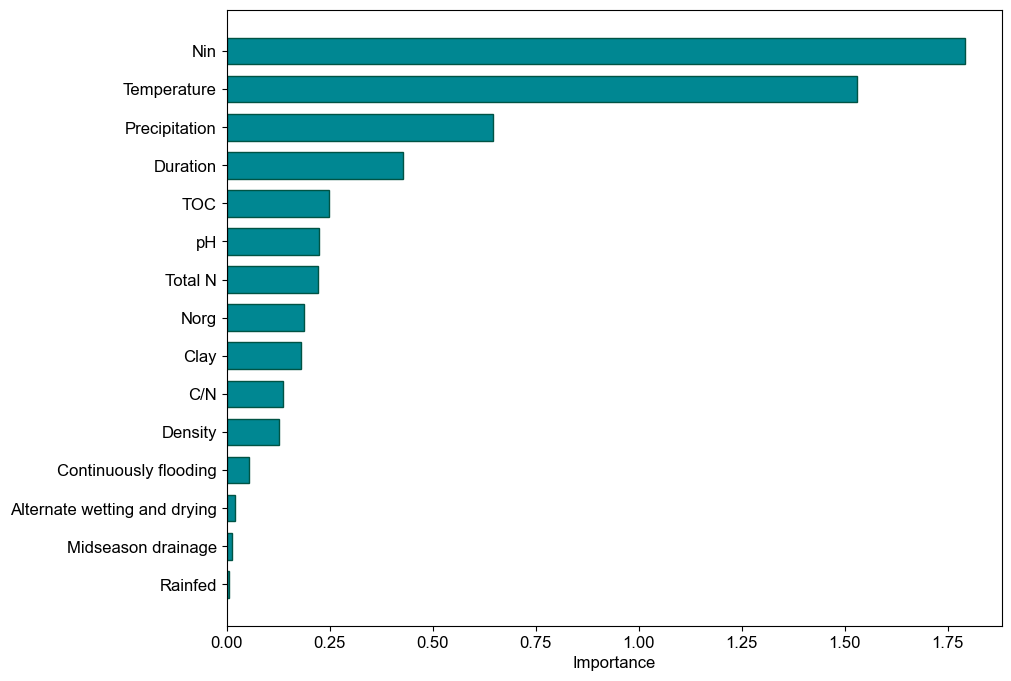

In [331]:
results = permutation_importance(rf, yields[attributes],yields.iloc[:,-1], scoring='neg_mean_squared_error',random_state=0)
# get importance
importance = results.importances_mean
features_import = df(names, columns=['feature'])
features_import['importance'] = importance
features_import.sort_values('importance', inplace=True)

fig=plt.figure(figsize=(10,8))
plt.barh(features_import['feature'], features_import['importance'], height=0.7, color='#008792', edgecolor='#005344')
plt.xlabel("Importance")

plt.savefig("yield_Importance_rf.jpg",dpi=600,bbox_inches='tight')
plt.show()

In [333]:
yield_R2_train=pd.DataFrame()
yield_R2_test=pd.DataFrame()
yield_RMSE_train=pd.DataFrame()
yield_RMSE_test=pd.DataFrame()
# test_results=pd.DataFrame()
def results_10folds(model,model_name):#cross_validate是sklearn模块的函数，keras模型直接调用时出错了
    cv=KFold(n_splits=10,shuffle=True,random_state=42)
    r2=cross_validate(model,yields[attributes],yields['yield'],cv=cv,scoring="r2",return_train_score=True,
                        verbose=True,n_jobs=-1)
    rmse=cross_validate(model,yields[attributes],yields['yield'],cv=cv,scoring="neg_root_mean_squared_error",return_train_score=True,
                        verbose=True,n_jobs=-1)
    
#     test_rmse,test_r2=evaluate_model(model,x_test,y_test)
    yield_R2_train[model_name]=r2["train_score"]
    yield_RMSE_train[model_name]=-rmse["train_score"]
    yield_R2_test[model_name]=r2["test_score"]
    yield_RMSE_test[model_name]=-rmse["test_score"]


In [334]:
results_10folds(rf,"rf")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    7.7s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished


In [343]:
yield_R2_test.mean()

rf      0.799322
xgbr    0.813856
dtype: float64

In [337]:
start =time.time()
x=XGBRegressor(random_state=42)
xgbr_param_grid=[
    {'n_estimators':[50,100,200,300,400,500],
     'learning_rate':[0.1,0.2,0.3,0.4],
     'max_depth':[2,4,6,8,10]}]
xgbr_grid_search=GridSearchCV(x,xgbr_param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True,verbose=1,n_jobs=-1,refit=True)
#记得refit=True
xgbr_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [338]:
xgbr_grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [339]:
xgbr=xgbr_grid_search.best_estimator_
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [340]:
evaluate_model(xgbr,x_test,y_test)

(1.0084159138223563, 0.7597334632906436)

In [341]:
evaluate_model(xgbr,x_train,y_train)

(0.4171515633150894, 0.956728695714981)

In [342]:
results_10folds(xgbr,"xgbr")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished


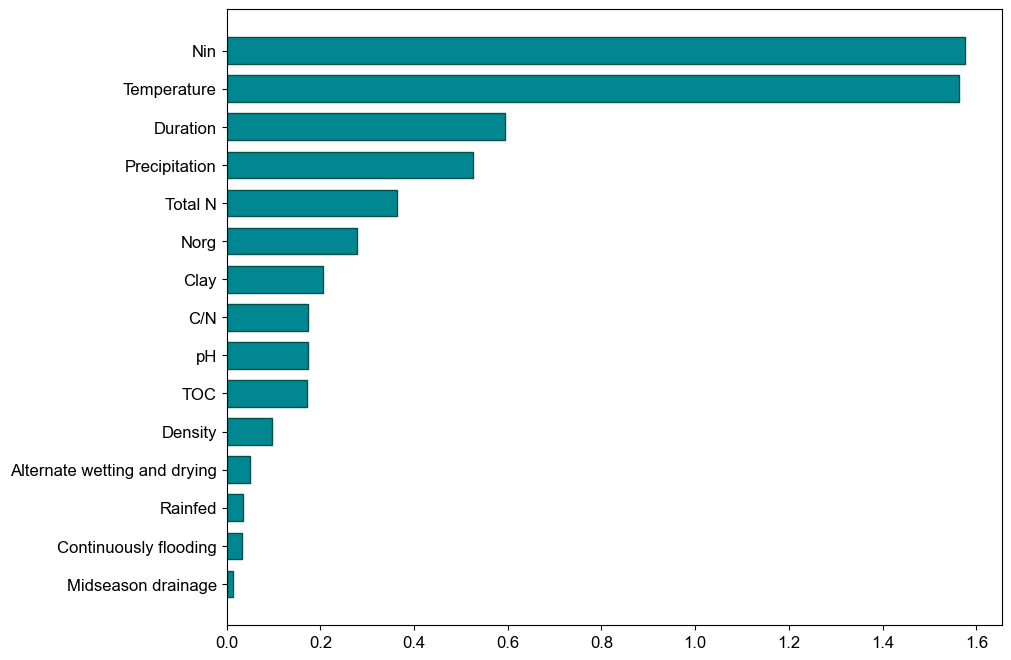

In [344]:
results = permutation_importance(xgbr, yields[attributes],yields.iloc[:,-1], scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
features_import = df(names, columns=['feature'])
features_import['importance'] = importance
features_import.sort_values('importance', inplace=True)

# summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig=plt.figure(figsize=(10,8))
plt.barh(features_import['feature'], features_import['importance'], height=0.7, color='#008792', edgecolor='#005344')
plt.savefig("yield_Importance_xgb.jpg",dpi=600,bbox_inches='tight')
plt.show()

# svr

In [345]:
from sklearn.svm import SVR

In [346]:
svr=SVR(gamma=0.1)
svr.fit(x_train,y_train)

SVR(gamma=0.1)

In [354]:
evaluate_model(svr,x_test,y_test)

(1.4464498982684708, 0.5056657546428338)

In [355]:
evaluate_model(svr,x_train,y_train)

(0.42821230065529386, 0.9544036045084079)

In [349]:
s=SVR(kernel="rbf") #C=10000也是网格搜索得到的
param_grid=[
    {'C':[10,100,1000,1500,2000],
     "gamma":[0.1,0.2,0.3,0.4,0.5],
     #'kernel':["rbf","sigmoid","poly"],
    # 'epsilon':[40,45,50]
    }
]
#epsilon，预测值与实际值的距离在epsilon内，损失函数值为0，默认0.1
#C，误差项的惩罚函数，一般为10的n次幂，C越大，希望松弛变量接近0，即对误分类的惩罚越大，容易过拟合；减小C正则化，默认值1
#kernel：参数选择有RBF（高斯核）, Linear（线性核函数）, Poly（多项式核函数）, Sigmoid（sigmoid核函数）, 默认的是"RBF";
grid_search=GridSearchCV(s,param_grid,cv=3,scoring='neg_mean_squared_error',return_train_score=True, verbose=True,n_jobs=-1,refit=True)

In [350]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [10, 100, 1000, 1500, 2000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [351]:
svr=grid_search.best_estimator_

In [356]:
results_10folds(svr,"svr")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


# MLP

In [368]:
mlp=MLPRegressor(early_stopping=True, hidden_layer_sizes=(1000),
             max_iter=500, random_state=42,verbose=True)
mlp.fit(x_train,y_train)

Iteration 1, loss = 409.09772126
Validation score: -38.186290
Iteration 2, loss = 151.37884419
Validation score: -90.291986
Iteration 3, loss = 84.90300646
Validation score: -0.620211
Iteration 4, loss = 32.18344023
Validation score: -19.971933
Iteration 5, loss = 24.96553075
Validation score: -3.734185
Iteration 6, loss = 8.64011829
Validation score: -3.144688
Iteration 7, loss = 6.83215369
Validation score: -0.262779


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 8, loss = 3.05966575
Validation score: -0.773234
Iteration 9, loss = 2.65761266
Validation score: 0.274251
Iteration 10, loss = 2.08948083
Validation score: 0.158267
Iteration 11, loss = 1.80600732
Validation score: 0.142261
Iteration 12, loss = 1.72925856
Validation score: 0.214040
Iteration 13, loss = 1.73989973
Validation score: 0.276409
Iteration 14, loss = 1.74408565
Validation score: 0.362663


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 15, loss = 1.56069608
Validation score: 0.370697
Iteration 16, loss = 1.49792601
Validation score: 0.376135
Iteration 17, loss = 1.46839315
Validation score: 0.387469
Iteration 18, loss = 1.45385884
Validation score: 0.375131
Iteration 19, loss = 1.45699161
Validation score: 0.366452
Iteration 20, loss = 1.46738387
Validation score: 0.401460
Iteration 21, loss = 1.42457927
Validation score: 0.414974


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 22, loss = 1.39441978
Validation score: 0.422478
Iteration 23, loss = 1.40225121
Validation score: 0.418209
Iteration 24, loss = 1.38142540
Validation score: 0.415874
Iteration 25, loss = 1.41219185
Validation score: 0.438295
Iteration 26, loss = 1.37110155
Validation score: 0.440165
Iteration 27, loss = 1.36610140
Validation score: 0.453028
Iteration 28, loss = 1.38251371
Validation score: 0.459413


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 29, loss = 1.36733681
Validation score: 0.461570
Iteration 30, loss = 1.32529698
Validation score: 0.351850
Iteration 31, loss = 1.38647968
Validation score: 0.466517
Iteration 32, loss = 1.28166781
Validation score: 0.478346
Iteration 33, loss = 1.28505102
Validation score: 0.470096
Iteration 34, loss = 1.26954351
Validation score: 0.480116
Iteration 35, loss = 1.25433739
Validation score: 0.474792


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 36, loss = 1.24240314
Validation score: 0.492332
Iteration 37, loss = 1.23755604
Validation score: 0.469957
Iteration 38, loss = 1.27845570
Validation score: 0.489701
Iteration 39, loss = 1.21437606
Validation score: 0.466477
Iteration 40, loss = 1.30245083
Validation score: 0.464849
Iteration 41, loss = 1.36333729
Validation score: 0.506997
Iteration 42, loss = 1.23100067
Validation score: 0.500878


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 43, loss = 1.22069482
Validation score: 0.512014
Iteration 44, loss = 1.19894704
Validation score: 0.511257
Iteration 45, loss = 1.17016850
Validation score: 0.480881
Iteration 46, loss = 1.17379741
Validation score: 0.506214
Iteration 47, loss = 1.21940334
Validation score: 0.453402
Iteration 48, loss = 1.20511629
Validation score: 0.513042
Iteration 49, loss = 1.17455027
Validation score: 0.513872


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 50, loss = 1.14708009
Validation score: 0.524191
Iteration 51, loss = 1.13354022
Validation score: 0.524438
Iteration 52, loss = 1.12136771
Validation score: 0.518228
Iteration 53, loss = 1.11012507
Validation score: 0.512511
Iteration 54, loss = 1.14270090
Validation score: 0.523045
Iteration 55, loss = 1.13293945
Validation score: 0.533196
Iteration 56, loss = 1.10218165
Validation score: 0.501910


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 57, loss = 1.16671863
Validation score: 0.370968
Iteration 58, loss = 1.23721547
Validation score: 0.361522
Iteration 59, loss = 1.17856764
Validation score: 0.538051
Iteration 60, loss = 1.07830942
Validation score: 0.541298
Iteration 61, loss = 1.07811576
Validation score: 0.460603
Iteration 62, loss = 1.14572811
Validation score: 0.465988
Iteration 63, loss = 1.10236951
Validation score: 0.463631


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 64, loss = 1.08023267
Validation score: 0.530753
Iteration 65, loss = 1.07888641
Validation score: 0.547577
Iteration 66, loss = 1.04687827
Validation score: 0.527168
Iteration 67, loss = 1.03002713
Validation score: 0.540850
Iteration 68, loss = 1.07934487
Validation score: 0.513526
Iteration 69, loss = 1.07765431
Validation score: 0.525220
Iteration 70, loss = 1.11509406
Validation score: 0.529129


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 71, loss = 1.06335770
Validation score: 0.534940
Iteration 72, loss = 1.08581623
Validation score: 0.542443
Iteration 73, loss = 1.01496956
Validation score: 0.489730
Iteration 74, loss = 1.03941651
Validation score: 0.519794
Iteration 75, loss = 1.03502225
Validation score: 0.548289
Iteration 76, loss = 1.02146137
Validation score: 0.544974
Iteration 77, loss = 1.05295112
Validation score: 0.456651


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 78, loss = 1.11538235
Validation score: 0.542095
Iteration 79, loss = 1.05885134
Validation score: 0.503517
Iteration 80, loss = 1.11646551
Validation score: 0.552983
Iteration 81, loss = 1.02961524
Validation score: 0.441350
Iteration 82, loss = 1.04985478
Validation score: 0.546106
Iteration 83, loss = 0.99598851
Validation score: 0.560197
Iteration 84, loss = 1.13478514
Validation score: 0.355763


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 85, loss = 1.30682226
Validation score: 0.437285
Iteration 86, loss = 1.22603731
Validation score: 0.501701
Iteration 87, loss = 1.06161354
Validation score: 0.552607
Iteration 88, loss = 1.02934946
Validation score: 0.559600
Iteration 89, loss = 1.03000940
Validation score: 0.565908
Iteration 90, loss = 0.96401081
Validation score: 0.548221
Iteration 91, loss = 0.97533881
Validation score: 0.463771


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 92, loss = 1.19004950
Validation score: 0.544602
Iteration 93, loss = 1.07478893
Validation score: 0.554149
Iteration 94, loss = 1.22450228
Validation score: 0.499420
Iteration 95, loss = 1.36262025
Validation score: 0.112263
Iteration 96, loss = 1.52312068
Validation score: -0.099878
Iteration 97, loss = 1.64034528
Validation score: 0.520067
Iteration 98, loss = 1.30118978
Validation score: 0.543822


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

Iteration 99, loss = 1.16856037
Validation score: 0.227693
Iteration 100, loss = 1.20180838
Validation score: 0.558450
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=1000, max_iter=500,
             random_state=42, verbose=True)

In [369]:
evaluate_model(mlp,x_train,y_train)

(1.3787309474804101, 0.5273155853301258)

In [7]:
import joblib
mlp_CH4=joblib.load('mlp_CH4.pkl')

D:\software\anaconda\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
mlp_N2O=joblib.load('mlp_N2O.pkl')
mlp_yield=joblib.load('mlp_yield.pkl')

D:\software\anaconda\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
MLPRegressor?

In [8]:
mlp_CH4

MLPRegressor(early_stopping=True, hidden_layer_sizes=1000,
             learning_rate_init=0.002, max_iter=500, random_state=42,
             verbose=True)

In [10]:
mlp_N2O

MLPRegressor(activation='tanh', early_stopping=True,
             hidden_layer_sizes=(1000, 500), max_iter=500, random_state=42,
             verbose=True)

In [11]:
mlp_yield

MLPRegressor(early_stopping=True, hidden_layer_sizes=1000, max_iter=500,
             random_state=42, verbose=True)

In [370]:
evaluate_model(mlp,x_test,y_test)

(1.5870205749135295, 0.4049149752700453)

In [371]:
results_10folds(mlp,"mlp")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   12.3s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   11.4s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.6s finished


In [373]:
yield_R2_test.mean()

rf      0.799322
xgbr    0.813856
svr     0.515584
mlp     0.401185
dtype: float64

In [374]:
with pd.ExcelWriter('yield_results.xlsx') as writer:
    yield_R2_test.to_excel(writer, sheet_name='r2_test')
    yield_R2_train.to_excel(writer,sheet_name="r2_train")
    yield_RMSE_test.to_excel(writer,sheet_name="rmse_test")
    yield_RMSE_train.to_excel(writer,sheet_name="rmse_train")
#     test_results.to_excel(writer,sheet_name="test_results")
joblib.dump(value=svr,filename="svr_yield.pkl")
joblib.dump(value=mlp,filename="mlp_yield.pkl")
joblib.dump(value=rf,filename="rf_yield.pkl")
joblib.dump(value=xgbr,filename="xgbr_yield.pkl")

['xgbr_yield.pkl']